# Pràctica 9: Reinforment learning

#### NOM:
#### NIU: 

## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, degut a la evaluació de dimecres tarda, es realitzarà abans de <span style="color:blue; font-size:20px">**dimecres 9 desembre a les 09:59**</span>, és a dir, quasibé tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. [Multi-armed-bandits](#A.-Multi-Armed-Bandits) **(50%)**
* B. [OpenAI Gym](#OpenAI-Gym) **(50%)**


## Introducció

En aquesta pràctica serà diferent a les anteriors. Com que no teniu massa temps, hem decidit que no haureu d'implementar algorismes, sinò entendre els conceptes bàsics i explicar-los.

Per aquest motiu, farem ús de 2 entorns que ens ajudin a entendre com funciona un algorisme d'aprenentatge per reforç (Reinforcement Learning).


<img src="https://upload.wikimedia.org/wikipedia/commons/9/95/Markov_diagram_v1.svg" width="80%">



# A. Multi-Armed Bandits




## Multi-Armed Bandits and Reinforcement Learning

### A Gentle Introduction to the Classic Problem with Python Examples

Post extret de la següent web: https://towardsdatascience.com/multi-armed-bandits-and-reinforcement-learning-dc9001dcb8da

![Photo by [Carl Raw](https://unsplash.com/@carltraw?utm_source=medium&utm_medium=referral) on [Unsplash](https://unsplash.com?utm_source=medium&utm_medium=referral)](https://cdn-images-1.medium.com/max/10238/0*2orlZg7aPX5dhdBF)

Multi-armed bandit problems are some of **the simplest** reinforcement learning (RL) problems to solve. We have an agent which we allow to choose actions, and each action has a reward that is returned according to a given, underlying probability distribution. The game is played over many episodes (single actions in this case) and the goal is to maximize your reward.

**An easy picture is to think of choosing between *k*-many [*one-armed bandits*](https://en.wikipedia.org/wiki/Slot_machine) (i.e. slot machines) or one big slot machine with *k* arms. Each arm you pull has a different reward associated with it. You’re given 1,000 quarters, so you need to develop some kind of strategy to get the most bang for your buck.**

One way to approach this is to select each one in turn and keep track of how much you received, then keep going back to the one that paid out the most. This is possible, but, as stated before, each bandit has an underlying probability distribution associated with it, meaning that you may need more samples before finding the right one. But, each pull you spend trying to figure out the best bandit to play takes you away from maximizing your reward. This basic balancing act is known as the **explore-exploit dilemma**. Forms of this basic problem come up in areas outside of AI and RL, such as in [choosing a career](https://joshkaufman.net/explore-exploit/), [finance](https://www.aaai.org/ocs/index.php/IJCAI/IJCAI15/paper/viewFile/10972/10798), [human psychology](https://econ.arizona.edu/sites/econ/files/wilsonetal_jepgeneral2014_print.pdf), and even [medical ethics](http://www.pnas.org/content/106/52/22387) (although, I think my favorite proposed use case relates to the suggestion that, due to its richness, it be given to Nazi Germany during WWII, [“as the ultimate form of intellectual sabotage.”](https://people.eecs.berkeley.edu/~russell/classes/cs294/s11/readings/Gittins:1979.pdf)).



## TL;DR

We introduce multi-armed bandit problems following the framework of [Sutton and Barto’s book](https://amzn.to/2Q2mxxn) (affiliate link of the author of the post) and develop a framework for solving these problems as well as examples. 

We’ll focus on:
* [**ϵ−greedy**](#%CF%B5-Greedy-Methods)
* [**ϵ−decay**](#%CF%B5-Decay-Strategies)
* [**optimistic strategies**](#Optimistic-Initial-Value)



## Problem Setup

To get started, let’s describe the problem in a bit more technical detail. What we wish to do, is develop an estimate $Qt(a)$:

![](https://cdn-images-1.medium.com/max/2000/1*n6jigGk161weIu8xHYQT_A.png)

Where $Qt(a)$ is the estimated, expected reward ($Rn$), when action $An$ is taken at step $n$. 

We’re going to iteratively build a model that will converge towards the true value of each action. We’re going to use a Gaussian (normal) distribution for all of the underlying probability distributions that we’ll explore so that the mean corresponds to the true value (after all, given enough samples, we would expect our rewards to converge to the mean of the selected action).

The **simplest way to proceed** is to take the **greedy action** or take the action we think will maximize our reward at each time step. Another way of writing this is:

![](https://cdn-images-1.medium.com/max/2000/1*S3nJWVy8oQE0gTDnh2D0jw.png)

We can denote this maximum expectation or greedy action as $A^*n$. This is the *exploit* side of our aforementioned **explore-exploit dilemma**, and it makes lots of sense if the goal is to maximize our reward. Of course, doing this repeatedly only works well once we have a good sense of our expected rewards for each actions (unless we get rather lucky). So, we need to figure out an algorithm that explores enough of our search space so that we can exploit the best actions.

Before jumping into this, there’s one last concept to introduce. In typical RL applications, we may need hundreds of thousands of iterations, if not millions or more. It quickly becomes very computationally intensive to run simulations of these sorts and keep track of all that data just to calculate the average reward. To avoid this, we can use a handy formula so that all we need to track are two values: the mean and number of steps taken. If we need to calculate the mean at step $n$, $m_n$, we can do it with the previous mean, $m_{n−1}$ and $n$ as follows:

![](https://cdn-images-1.medium.com/max/2000/1*IGzEQ2Ze5N6ijgApE-Tynw.png)

With that, we can start to develop strategies for solving our *k-bandit* problems.



## ϵ-Greedy Methods

We briefly talked about a pure-greedy method, and I indicated that on its own it won’t work very well. Consider if you implement a pure-greedy method, you take one action, $A_n=a_1$, at $n=1$ and get a reward. Well, then this becomes your highest reward (assuming it is positive) and you simply repeat $a_1 ​∀ n$ (take action $a_1$ for all steps $n$). 

To encourage a bit of exploration, we can use ϵ-greedy which means that we explore another option with a probability of ϵ. This provides a bit of noise into the algorithm to ensure you keep trying other values, otherwise, you keep on exploiting your maximum reward.

Let’s turn to Python to implement our *k-*armed bandit.



## Building a greedy k-Armed Bandit

We’re going to define a class called `eps_bandit` to be able to run our experiment. This class takes number of arms, `k`, epsilon value `eps`, number of iterations `iter` as inputs. We'll also define a term `mu` that we can use to adjust the average rewards of each of the arms.


In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm

%matplotlib inline

In [3]:
# global parameters
k = 10           # number of bandits
iters = 1000     # iters (steps or pulls) inside an episode
episodes = 500   # number of episodes

In [4]:
class eps_bandit:
    '''
    epsilon-greedy k-bandit problem

    Inputs
    =====================================================
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from a normal distribution with mean = 0.
        Set to "sequence" for the means to be ordered from 0 to k-1.
        Pass a list or array of length = k for user-defined values.
    '''

    def __init__(self, k, eps, iters, mu='random'):
        # Number of arms
        self.k = k
        # Search probability
        self.eps = eps
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)

        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)

    def pull(self):
        # Generate random number
        p = np.random.rand()
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)

        reward = np.random.normal(self.mu[a], 1)

        # Update counts
        self.n += 1
        self.k_n[a] += 1

        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n

        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]

    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward

    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

There are plenty of different ways to define this class. I did it so that once we initialize our problem, we just call the run() method and can examine the outputs. By default, the average rewards for each arm are drawn from a normal distribution around 0. Setting mu="sequence" will cause the rewards to range from 0 to *k-1* to make it easy to know which actions provide the best rewards when evaluating the results and which actions were taken. Finally, you could also set your own average rewards by passing values to mu.

Let’s set up some comparisons using different values of ϵ\epsilonϵ. For each of these, we’ll set k=10, run 1,000 steps for each episode and run 500 episodes. After each episode, we will reset the bandits and copy the averages across the different bandits to keep things consistent.

100%|██████████| 500/500 [00:09<00:00, 50.81it/s]


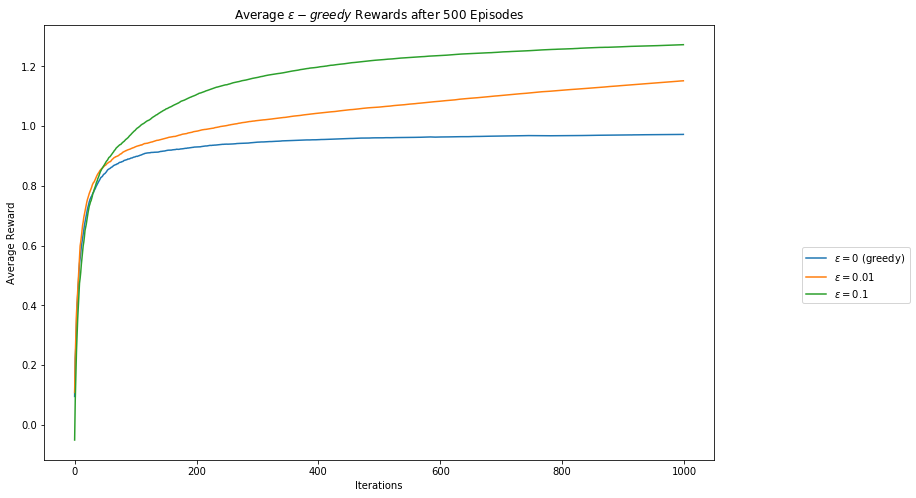

In [5]:
eps_000_rewards = np.zeros(iters)
eps_001_rewards = np.zeros(iters)
eps_010_rewards = np.zeros(iters)

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    eps_000 = eps_bandit(k, 0.00, iters)
    eps_001 = eps_bandit(k, 0.01, iters, eps_000.mu.copy())
    eps_010 = eps_bandit(k, 0.1, iters, eps_000.mu.copy())

    # Run experiments
    eps_000.run()
    eps_001.run()
    eps_010.run()

    # Update long-term averages
    eps_000_rewards = eps_000_rewards + (eps_000.reward - eps_000_rewards) / (i + 1)
    eps_001_rewards = eps_001_rewards + (eps_001.reward - eps_001_rewards) / (i + 1)
    eps_010_rewards = eps_010_rewards + (eps_010.reward - eps_010_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(eps_000_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_001_rewards, label="$\epsilon=0.01$")
plt.plot(eps_010_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes)  + " Episodes")
plt.show()

Looking at the results, the greedy function under performs the other two consistently, with ϵ=0.01 coming in between the two and ϵ=0.1 performing the best of the three here. Below, we can see the effect is clearer using the sequence argument, and can get a feel for how often the optimal action is taken per episode because the averages remain consistent across episodes.

100%|██████████| 500/500 [00:09<00:00, 50.91it/s]


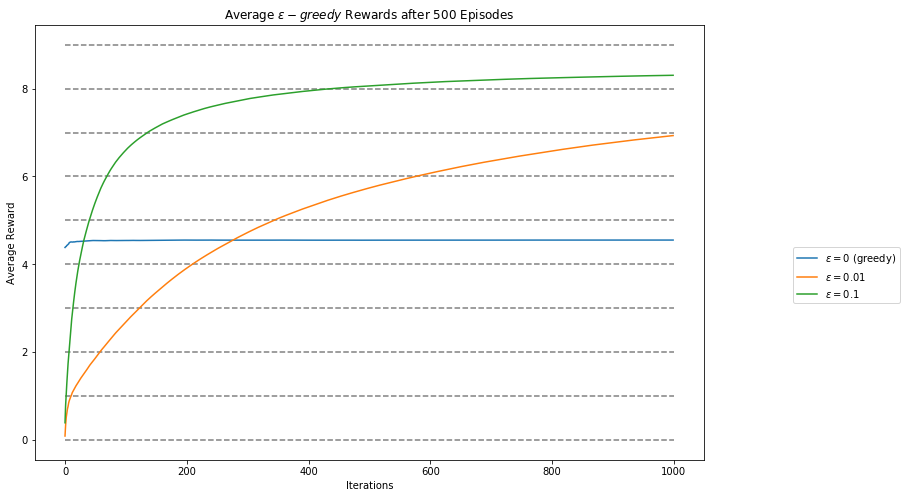

In [6]:
eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
eps_0_selection = np.zeros(k)
eps_01_selection = np.zeros(k)
eps_1_selection = np.zeros(k)

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters, mu='sequence')
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())

    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()

    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

    # Average actions per episode
    eps_0_selection = eps_0_selection + (eps_0.k_n - eps_0_selection) / (i + 1)
    eps_01_selection = eps_01_selection + (eps_01.k_n - eps_01_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (eps_1.k_n - eps_1_selection) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
for i in range(k):
    plt.hlines(eps_0.mu[i], xmin=0,
              xmax=iters, alpha=0.5,
              linestyle="--")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
plt.show()

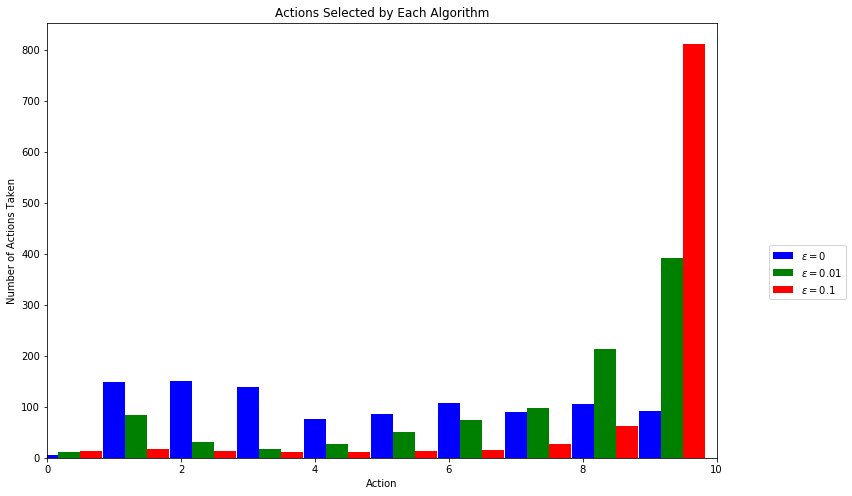

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.4776,14.9428,14.9796,13.8000,7.6000,8.6000,10.8000,9.0000,10.6000,9.2000
$\epsilon=0.01$,1.1942,8.3528,3.0924,1.7752,2.6422,5.0214,7.4496,9.8672,21.4298,39.1752
$\epsilon=0.1$,1.3066,1.6838,1.2790,1.2100,1.2334,1.4252,1.6076,2.6630,6.3292,81.2622


In [7]:
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(12,8))
plt.bar(bins, eps_0_selection, width = 0.33, color='b', label="$\epsilon=0$")
plt.bar(bins+0.33, eps_01_selection, width=0.33, color='g', label="$\epsilon=0.01$")
plt.bar(bins+0.66, eps_1_selection, width=0.33, color='r', label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()

opt_per = np.array([eps_0_selection, eps_01_selection, eps_1_selection]) / iters * 100
df = pd.DataFrame(opt_per, index=['$\epsilon=0$', '$\epsilon=0.01$', '$\epsilon=0.1$'],
                  columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

Viewing the average selection of the algorithms, we see why the larger ϵ value performs well, it takes the optimal selection 80% of the time.

Play around with the different values of both ϵ and *k* to see how these results change. For example, decreasing the search space would likely benefit smaller values of ϵ as exploration would be less beneficial and vice versa. Additionally, increasing the number of iterations will begin to benefit the lower value of ϵ because it will have less random noise.

## ϵ-Decay Strategies

The ϵ-greedy strategies have an obvious weakness in that they continue to include random noise no matter how many examples they see. It would be better for these to settle on an optimal solution and continue to exploit it. To this end, we can introduce ϵ-decay which reduces the probability of exploration with every step. This works by defining ϵ as a function of the number of steps, *n*.

![](https://cdn-images-1.medium.com/max/2000/1*OHcZPVCqG3dqIVFtpv7B-Q.png)

Where β<1 is introduced as a scaling factor to reduce the scaling rate so that the algorithm has sufficient opportunity to explore. In this case, we also include +1 in the denominator to prevent infinities from appearing. Given this, we can make a few small changes to our previous class of bandits to define an eps_decay_bandit class that works on the same principles.

In [25]:
from numba import jit
class eps_decay_bandit:
    '''
    epsilon-decay k-bandit problem

    Inputs
    =====================================================
    k: number of arms (int)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from a normal distribution with mean = 0.
        Set to "sequence" for the means to be ordered from 0 to k-1.
        Pass a list or array of length = k for user-defined values.
    '''

    def __init__(self, k, iters, mu='random'):
        # Number of arms
        self.k = k
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)

        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)

    def pull(self):
        # Generate random number
        p = np.random.rand()
        if p < 1 / (1 + self.n / self.k):
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)

        reward = np.random.normal(self.mu[a], 1)

        # Update counts
        self.n += 1
        self.k_n[a] += 1

        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n

        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]

    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward

    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

Now running the code:

100%|██████████| 1000/1000 [00:13<00:00, 73.22it/s]


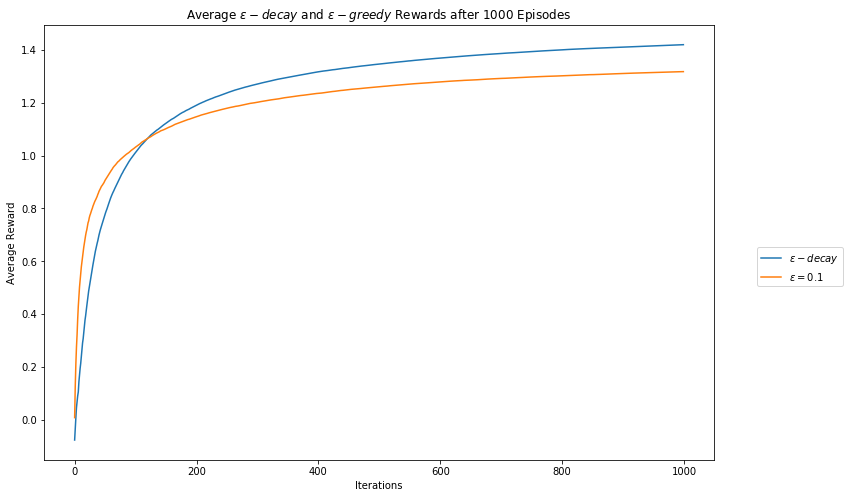

In [26]:
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    eps_decay = eps_decay_bandit(k, iters)
    eps_1 = eps_bandit(k, 0.1, iters, eps_decay.mu.copy())

    # Run experiments
    eps_decay.run()
    eps_1.run()

    # Update long-term averages
    eps_decay_rewards = eps_decay_rewards + (eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-decay$ and " + "$\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
plt.show()

The ϵ-decay strategy outperforms our previous best algorithm as it sticks to the optimal action once it is found.

There’s one last method to balance the explore-exploit dilemma in *k-bandit* problems, **optimistic initial values**.

## Optimistic Initial Value

This approach differs significantly from the previous examples we explored because it does not introduce random noise to find the best action, *A*_n*​. Instead, we over estimate the rewards of all the actions and continuously select the maximum. In this case, the algorithm explores early on as it seeks to maximize its returns while additional information allows the values to converge to their true means. This approach does require some additional background knowledge to be included in the set up because we need at least some idea of what the rewards are so that we can over estimate them.

For this implementation, we don’t need a new class. Instead, we can simply use our eps_bandit class and set ϵ=0 and provide high, initial values for the estimates. Also, I like to initialize the pull count for each arm as 1 instead of 0 to encourage slightly slower convergence and ensure good exploration.

100%|██████████| 500/500 [00:10<00:00, 48.91it/s]


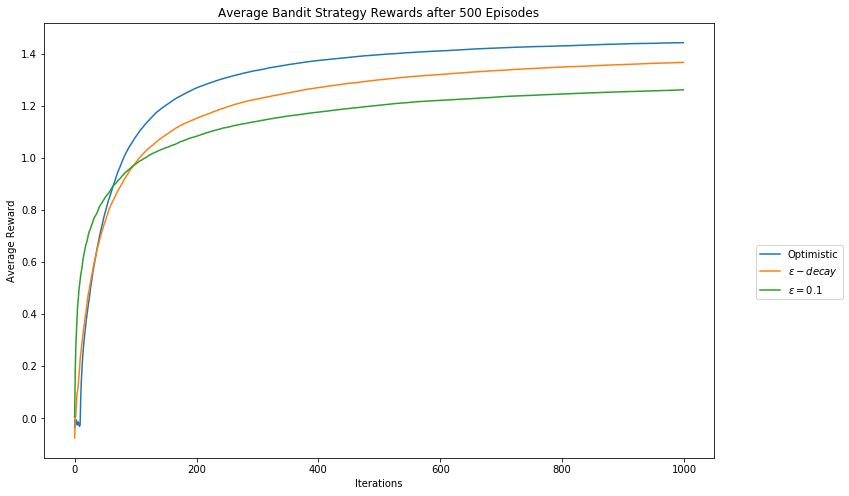

In [10]:
oiv_rewards = np.zeros(iters)
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

# Select initial values
oiv_init = np.repeat(5., k)

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    oiv_bandit = eps_bandit(k, 0, iters)
    oiv_bandit.k_reward = oiv_init.copy()
    oiv_bandit.k_n = np.ones(k)
    eps_decay = eps_decay_bandit(k, iters, oiv_bandit.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, oiv_bandit.mu.copy())

    # Run experiments
    oiv_bandit.run()
    eps_decay.run()
    eps_1.run()

    # Update long-term averages
    oiv_rewards = oiv_rewards + (oiv_bandit.reward - oiv_rewards) / (i + 1)
    eps_decay_rewards = eps_decay_rewards + (eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(oiv_rewards, label="Optimistic")
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Bandit Strategy Rewards after " + str(episodes) + " Episodes")
plt.show()

We can see that, in this case, the optimistic initial value approach outperformed both our ϵ−greedy and the ϵ−decay algorithms. We can see too, the estimates the algorithm has for each of arms in the last episode.

In [11]:
df = pd.DataFrame({"number of selections": oiv_bandit.k_n - 1,
                  "actual reward": oiv_bandit.mu,
                  "estimated reward": oiv_bandit.k_reward})
df = df.applymap(lambda x: np.round(x, 2))
df['number of selections'] = df['number of selections'].astype('int')
df

,number of selections,actual reward,estimated reward
0,16,-0.20,0.26
1,73,0.52,0.33
2,14,0.18,0.28
3,744,0.53,0.55
4,5,-1.16,0.14
5,124,0.11,0.33
6,3,-0.86,0.03
7,5,-1.04,-0.02
8,4,-0.66,0.15
9,12,0.15,0.28


The estimates are far off the actual rewards in all cases except the one with more than 900 pulls. This highlights a lot of what we’ll be doing in reinforcement learning more generally. We don’t necessarily care about acquiring accurate representations of the environment we are interacting with. Instead, we intend to **learn optimal behavior** in those situations and seek to behave accordingly. This can open up a whole discussion about model-free versus model-based learning that we’ll have to postpone for another time.

There are [other bandit methods](https://www.datahubbs.com/multi-armed-bandits-reinforcement-learning-2/) that we will explore such as the gradient bandits, upper confidence bound (UCB) methods, and nonstationary problems. Plus, many others like [dueling bandits](http://www.sciencedirect.com/science/article/pii/S0022000012000281?via%3Dihub), [cluster bandits](https://arxiv.org/abs/1401.8257), [collaborative filtering bandits](https://arxiv.org/abs/1502.03473), [spatially correlated bandits](http://www.biorxiv.org/content/biorxiv/early/2017/04/28/106286.full.pdf), [distributed bandtis](https://arxiv.org/abs/1604.07706), [adversarial bandits](http://mercurio.srv.dsi.unimi.it/~cesabian/Pubblicazioni/J18.pdf), and [contextual bandits](http://proceedings.mlr.press/v32/agarwalb14.pdf) which are open to exploration. Starting to wonder if we haven’t been hit with [intellectual sabotage…](https://mlwave.com/multi-armed-bandits-algorithms-made-easy/)


#### Preguntes

**1.** Executa el ϵ-greedy `eps_bandit` amb els mateixos valors de eps (0, 0.01, 0.1) amb diferents valors de `episodes`. Desde 1 fins a 1000. Explica el comportament què hi veus

**2.** Què passa amb el número de iteracions dins d'un episodi? Mostra què passa en aquest cas per valors petits (<100) i per valors més grans (>500)

**3.** Com associes les diferents parts del `eps_bandit` amb un problema de Reinforcement Learning. Explica amb què relaciones la `POLICY`, `ENVIRONMENT`, `OBSERVATION`, `REWARD` i `ACTION`. 

**4.** Creus que la greedy action del `pull` esta ben implementada? És igual de just per tots els braços de la màquina? Heu observat alguna desviació en els random? Com ho faries més just?

**5.** Què significa un valor de `eps` de 0? I si li posem un 1? Què passarà?

**6.** Què ha cambiat de codi entre `eps_bandit` i `eps_decay_bandit`?

**7.** Quin valor de $\beta$ a han escollit al codi de `eps_decay_bandit`? Mostra la gràfica que ensenyi el valor de decay pels 1000 primers steps.

**8.** Explica amb les teves paraules la gràfica de la comparativa entre `eps_bandit`, `eps_decay_bandit` i `optimistic`. Posa ènfasis en el comportament inicial dels 3 i en el comportament final després de 1.000 iteracions.

#### Respostes

# 1. Executa el ϵ-greedy eps_bandit amb els mateixos valors de eps (0, 0.01, 0.1) amb diferents valors de episodes. Desde 1 fins a 1000. Explica el comportament què hi veus

100%|██████████| 1000/1000 [00:19<00:00, 50.02it/s]


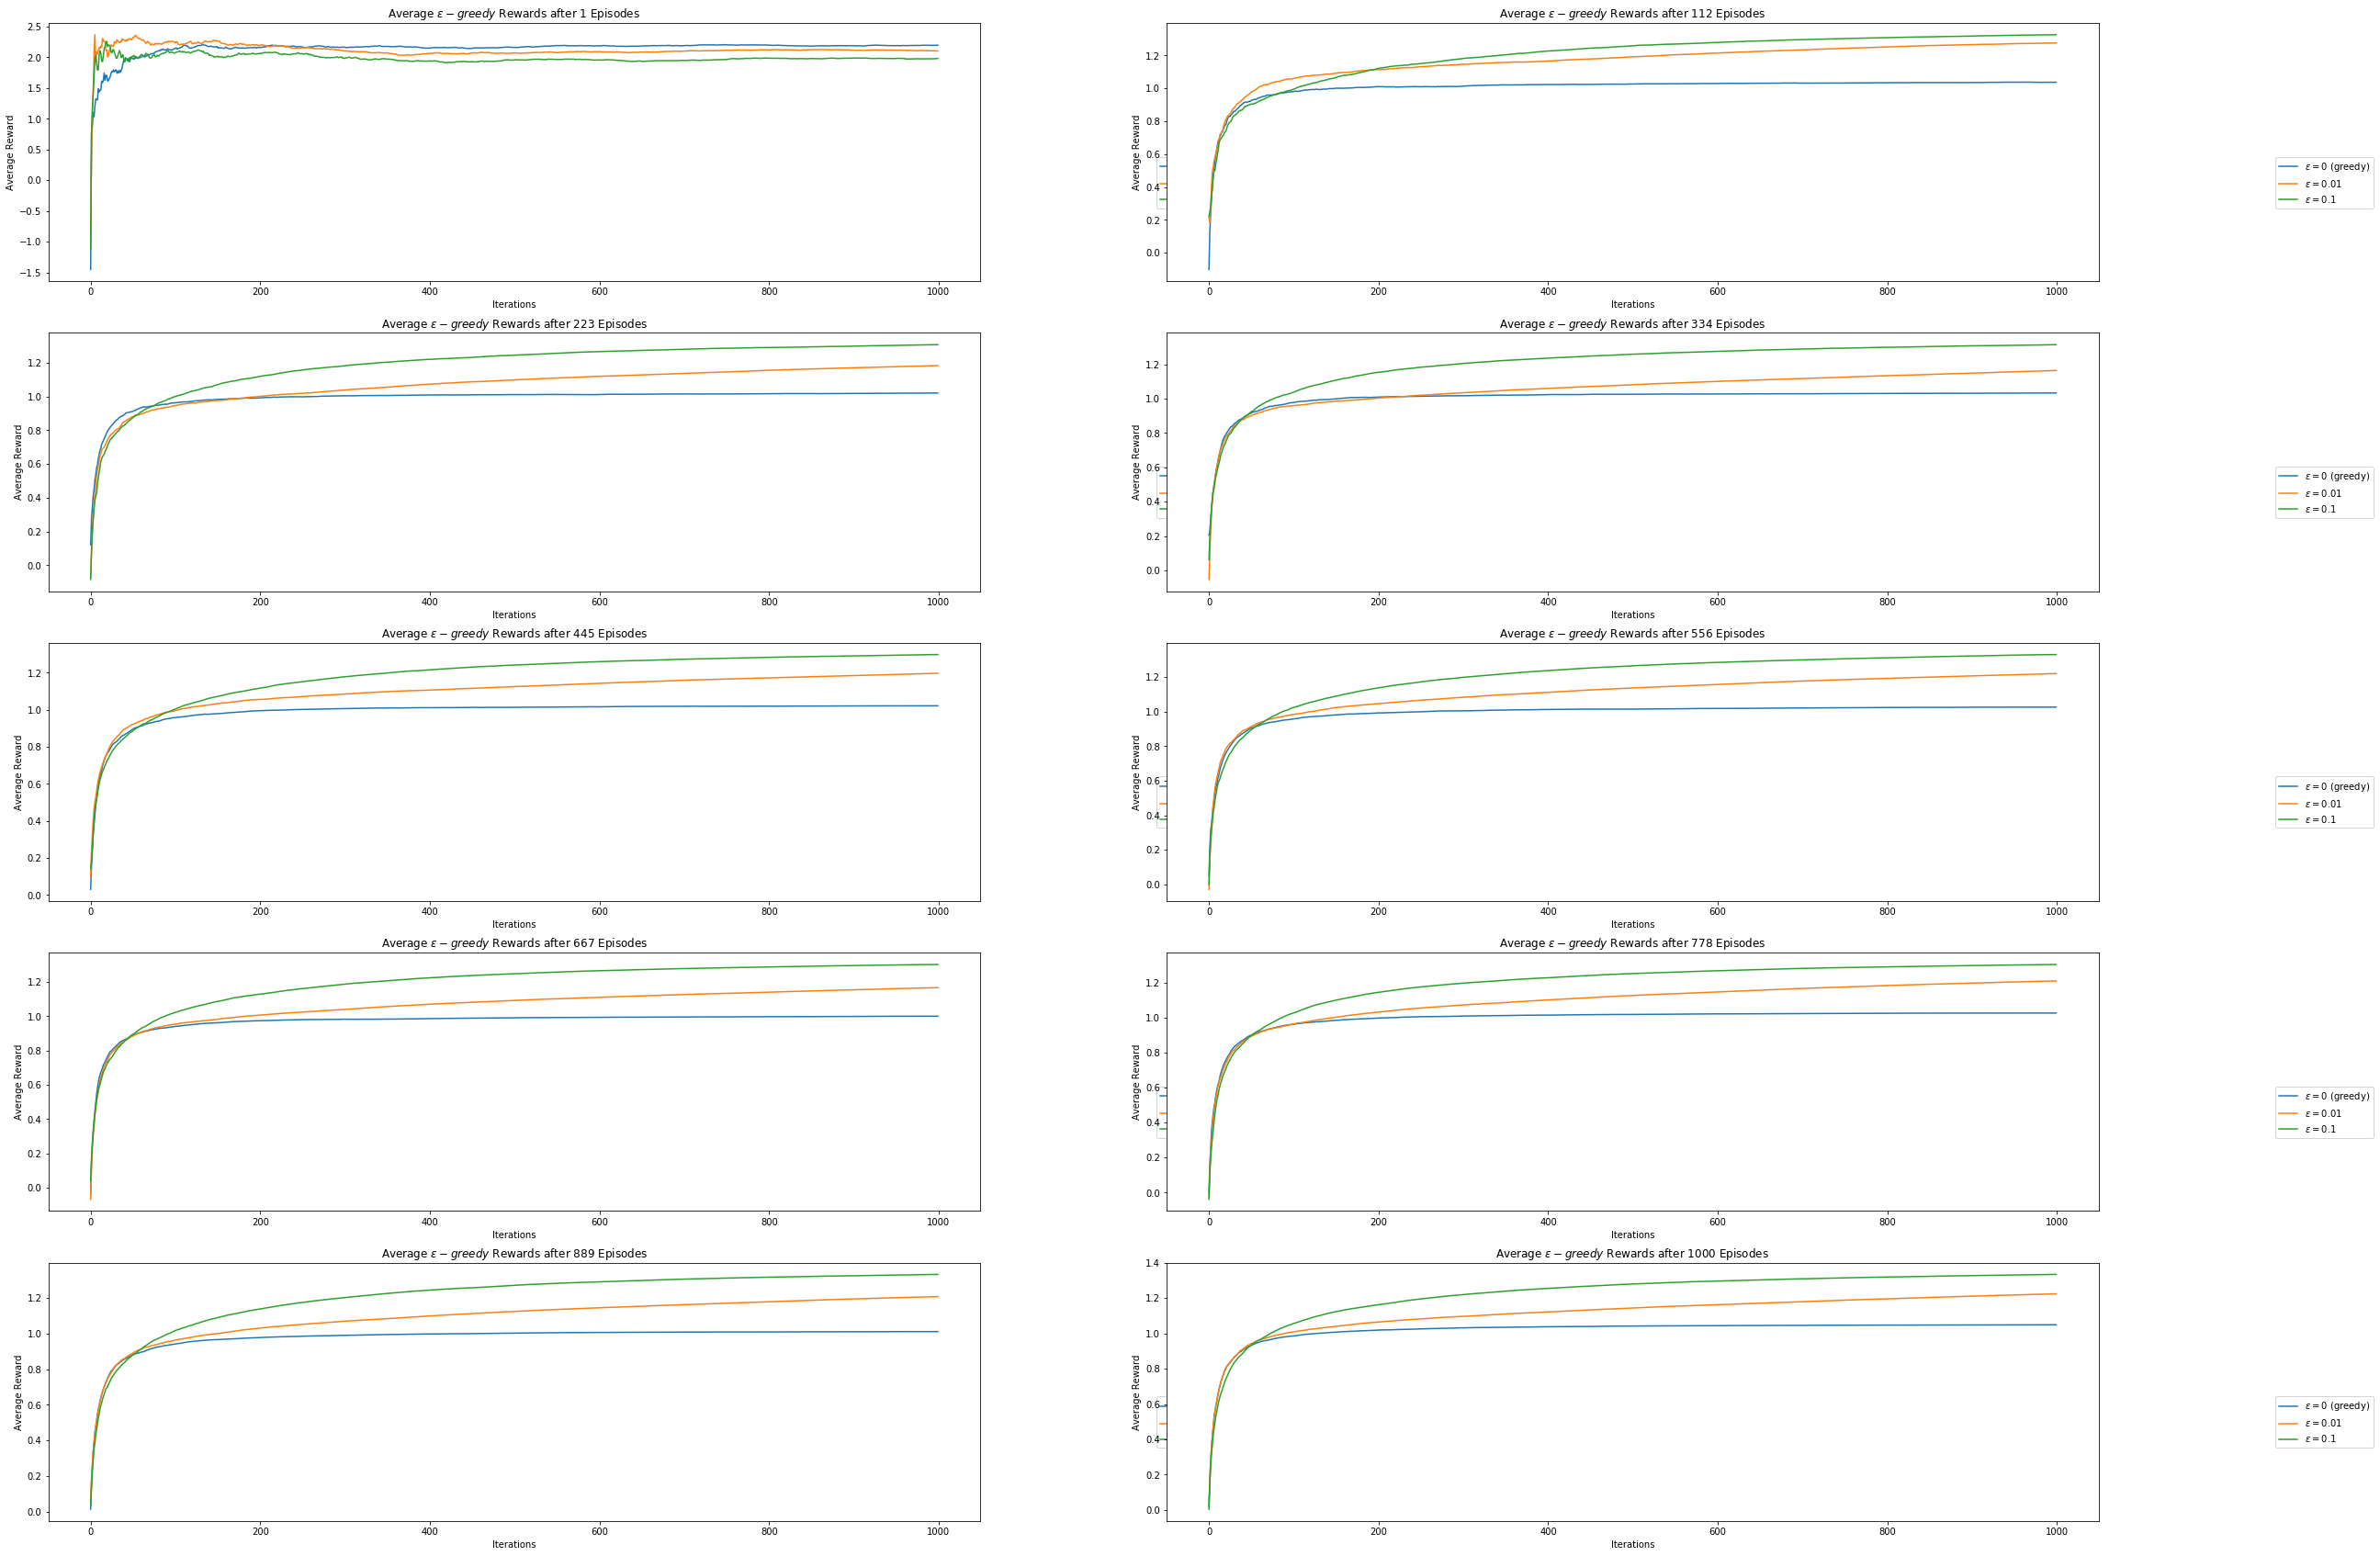

In [27]:
fig,axes = plt.subplots(5,2,figsize=(40,30))
axes = axes.flatten()
episodes_ = np.int64(np.round(np.linspace(1,1000,10)))
for episodes,axe in zip(episodes_,axes):
    eps_000_rewards = np.zeros(iters)
    eps_001_rewards = np.zeros(iters)
    eps_010_rewards = np.zeros(iters)

    # Run experiments
    for i in tqdm.tqdm(range(episodes)):
        # Initialize bandits
        eps_000 = eps_bandit(k, 0.00, iters)
        eps_001 = eps_bandit(k, 0.01, iters, eps_000.mu.copy())
        eps_010 = eps_bandit(k, 0.1, iters, eps_000.mu.copy())

        # Run experiments
        eps_000.run()
        eps_001.run()
        eps_010.run()

        # Update long-term averages
        eps_000_rewards = eps_000_rewards + (eps_000.reward - eps_000_rewards) / (i + 1)
        eps_001_rewards = eps_001_rewards + (eps_001.reward - eps_001_rewards) / (i + 1)
        eps_010_rewards = eps_010_rewards + (eps_010.reward - eps_010_rewards) / (i + 1)

    #plt.figure(figsize=(12,8))
    axe.plot(eps_000_rewards, label="$\epsilon=0$ (greedy)")
    axe.plot(eps_001_rewards, label="$\epsilon=0.01$")
    axe.plot(eps_010_rewards, label="$\epsilon=0.1$")
    axe.legend(bbox_to_anchor=(1.3, 0.5))
    axe.set_xlabel("Iterations")
    axe.set_ylabel("Average Reward")
    axe.set_title("Average $\epsilon-greedy$ Rewards after " + str(episodes)  + " Episodes")
    #plt.show()

El comportament s'explica facilment si es tenen clars els conceptes d'episodis i d'iteracions. Per a cada algoritme es fan diferents simulacions; cadascuna d'aquestes simulacions es el que en diem un episodi, la cosa es que dintre d'aquestes simulacions hi ha un nombre de tirades_(iteracions). Si volem detectar quina es la millor distribució no ens podem basar només en una simulació; ens hem de basar en un conjunt de simulacions per poder treure conclusions estadisticament significatives.

El que es pot apreciar a les grafiques es que amb una sola simulació els resultats que s'obtenen disten de la mitjana de resultats amb mes simulacions. De fet aquest canvi que es va produïnt en augmentar el nombre de simulacions es la convergencia del nostre algoritme.

# 2. Què passa amb el número de iteracions dins d'un episodi? Mostra què passa en aquest cas per valors petits (<100) i per valors més grans (>500)

100%|██████████| 500/500 [00:09<00:00, 50.99it/s]


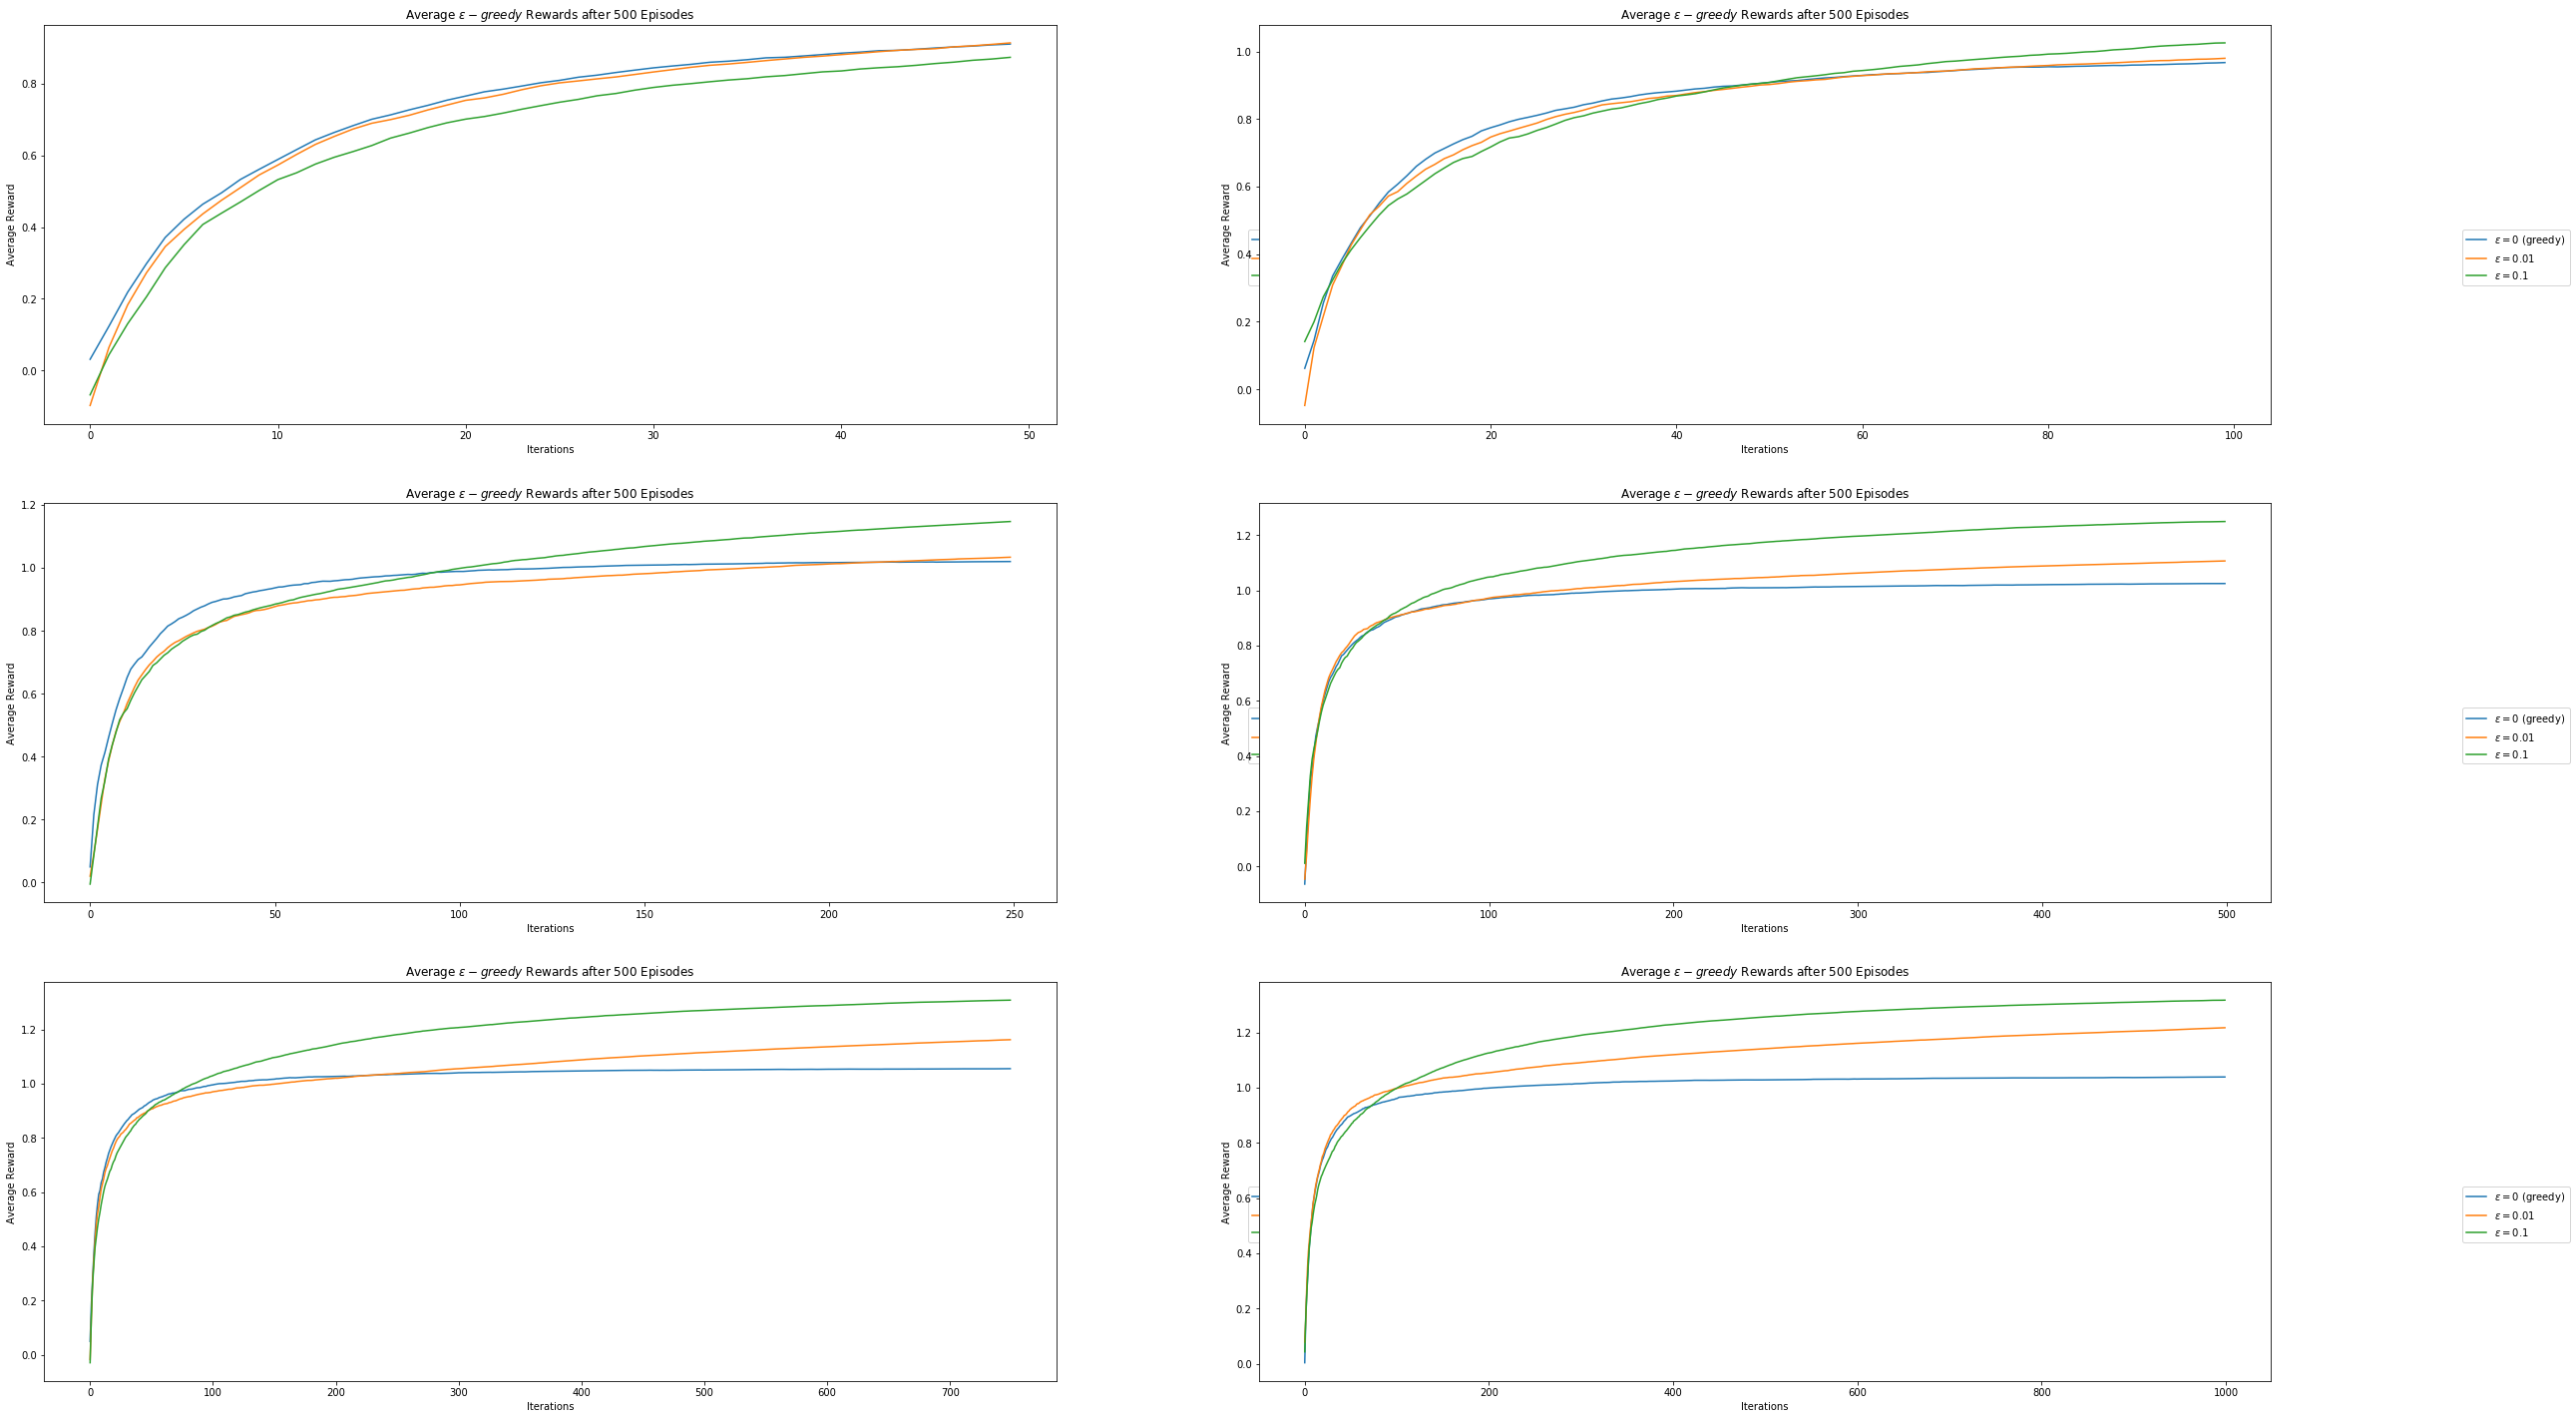

In [31]:
fig,axes = plt.subplots(3,2,figsize=(40,25))
axes = axes.flatten()
episodes = 500
iters = [50,100,250,500,750,1000]
for it,axe in zip(iters,axes):
    
    eps_000_rewards = np.zeros(it)
    eps_001_rewards = np.zeros(it)
    eps_010_rewards = np.zeros(it)

    # Run experiments
    for i in tqdm.tqdm(range(episodes)):
        # Initialize bandits
        eps_000 = eps_bandit(k, 0.00, it)
        eps_001 = eps_bandit(k, 0.01, it, eps_000.mu.copy())
        eps_010 = eps_bandit(k, 0.1, it, eps_000.mu.copy())

        # Run experiments
        eps_000.run()
        eps_001.run()
        eps_010.run()

        # Update long-term averages
        eps_000_rewards = eps_000_rewards + (eps_000.reward - eps_000_rewards) / (i + 1)
        eps_001_rewards = eps_001_rewards + (eps_001.reward - eps_001_rewards) / (i + 1)
        eps_010_rewards = eps_010_rewards + (eps_010.reward - eps_010_rewards) / (i + 1)

    #plt.figure(figsize=(12,8))
    axe.plot(eps_000_rewards, label="$\epsilon=0$ (greedy)")
    axe.plot(eps_001_rewards, label="$\epsilon=0.01$")
    axe.plot(eps_010_rewards, label="$\epsilon=0.1$")
    axe.legend(bbox_to_anchor=(1.3, 0.5))
    axe.set_xlabel("Iterations")
    axe.set_ylabel("Average Reward")
    axe.set_title("Average $\epsilon-greedy$ Rewards after " + str(episodes)  + " Episodes")
    #plt.show()

El problema amb el que ens trobem quan hi ha molt poques iteracions es que no dona temps a fer l'exploració de les màquines per despres seleccionar la millor. Es pot veure com a mesura que creixen les iteracions els algoritmes que tenen capacitat d'exploració aconsegueixen superar al greedy i obviament el algoritme amb la epsilon me gran aconsegueix trobar la millor màquina mes ràpid.

#  3. Com associes les diferents parts del eps_bandit amb un problema de Reinforcement Learning. Explica amb què relaciones la POLICY, ENVIRONMENT, OBSERVATION, REWARD i ACTION. 

La POLICY s'asocia amb la selecció de la màquina que donarà millor premi. L'ENVIROMENT s'associa amb els k arms(o màquines) amb els que es pot interactuar. Una observació es una simulació de l'algoritme amb un nombre fixat d'iteracions o interaccions que dona un reward total. El reward s'asocia a la puntuació que dona cada tirada de les màquines(o cada exploració d'un arm). La acció es el fet d'escollir una màquina(o arm) que generarà una puntuació(reward).

# 4.  Creus que la greedy action del pull esta ben implementada? És igual de just per tots els braços de la màquina? Heu observat alguna desviació en els random? Com ho faries més just?

No, no ho està. Això es deu a que tal i com està implementat si no es fica cap epsilon sempre agafarà el mateix braç(màquina). Està implementat inicialitzant el vector de rewards amb un vector de 0 i si s'aplica argmax retornarà el primer element sempre.

Entenent per desviació una tendencià d'elecció si; s'ha detectat i es que la opció greedy sempre està agafant el pitjor camí possible perque sempre es queda amb el que dona menys reward de la distribució normal. SI escrea una distribució normal per donar les mitjanes a les distribucions de cada màquina,aleshores en el array de distribucions el primer element serà el que tindrà la mitjana mes baixa i per tant es mes probable que el reward que obtingui sigui el pitjor. El algoritme greedy sempre serà el pitjor.

Per a solucionar això s'opta per invertir les k primeres iteracions en fer una tirada en cada màquina i deixar que la probabilitat de la selecció del element dintre d'una distribució sigui la que guii al algoritme greedy sense "mutacions" o intervencions de l'epsilon.

# 5.  Què significa un valor de eps de 0? I si li posem un 1? Què passarà?

Un valor de epsilon=0 implica que mai es farà una selecció aleatoria i per tant es farà servir un algoritme greedy pur, mentre que un algoritme de epsilon=1 serà un algoritme sense heuristica i  de selecció aleatoria pura.

# 6. Què ha cambiat de codi entre eps_bandit i eps_decay_bandit?

El canvi principal es el fet de que en el pull qua es fa la comparativa en comptes de fer servir epsilon es fa servir una funció estrictament decreixent que depén d'epsilon i del nombre d'iteracions. A mesura que les iteracions passen el valor de epsilon es va fent petit.

El comportament que s'obté d'això no es mes que dedicar les primeres iteracions a una búsqueda de la millor màquina i despres concentrar-se en la solució óptima.

# 7.  Quin valor de 𝛽 a han escollit al codi de eps_decay_bandit? Mostra la gràfica que ensenyi el valor de decay pels 1000 primers steps.

Beta es un paràmetre que surt d'una funcio que depen del nombre d'iteracions i del nombre de màquines(arms). Sent el ratio entre aquestes dues quantitats el paràmetre.

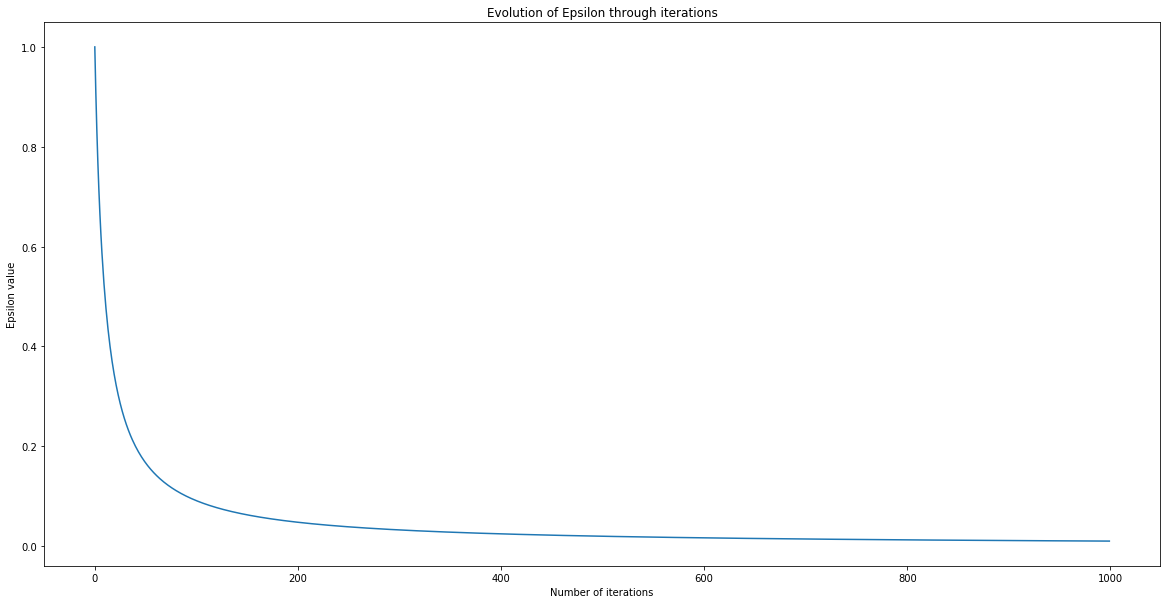

In [41]:
k=10
iters =1000
fig = plt.figure(figsize=(20,10))
plt.xlabel("Number of iterations")
plt.ylabel("Epsilon value")
plt.title("Evolution of Epsilon through iterations")
plto = plt.plot(range(iters),[1/(1+ (x/k)) for x in range(iters)])

#  8. Explica amb les teves paraules la gràfica de la comparativa entre eps_bandit, eps_decay_bandit i optimistic. Posa ènfasis en el comportament inicial dels 3 i en el comportament final després de 1.000 iteracions.

La grafica ens mostra que e comportament del epsilon = 0.1 al començament es una exploració molt gran però quan arribem a les mil iteracions, tot i agafar el 90% dels cops el bon camí, resulta que prefereix seguir explorant possibles camins tot i que ja ha trobat la màquina bona.

Pel que respecta a la grafica del epsilo-decay veiem com te la mateixa tendencia exploratoria (potser una mica menys) que la anterior però en aquest cas quan arriba a la iteració 1000 el epsilon es prou petit per escollir practicament sempre el camí que la heurística ha considerat millor


El que exagera més el comportament esperat d'aquest tipus de models es el model Optimistic. Al començament creix molt ràpid fent una gran exploració(inferiror a la funció epsilon=0.1 i igual però mes llarga respecte a la funció epsilon decay). Aquesta funció es a més a més la que un cop ha trobat la solució la seleccionarà continuament, per tant tindrà el millor reward.


# OpenAI Gym

[OpenAI Gym](https://gym.openai.com/) is a toolkit for developing and comparing reinforcement learning algorithms. It makes no assumptions about the structure of your agent, and is compatible with any numerical computation library, such as TensorFlow or Pytorch or even with NumPy.

The gym library is a collection of test problems —[environments](https://gym.openai.com/envs/#classic_control)— that you can use to work out your reinforcement learning algorithms. These environments have a shared interface, allowing you to write general algorithms.

Podeu instal·lar-ho desde pip:

 `pip install gym`

You'll be able to run a few environments right away:

* algorithmic
* toy_text
* classic_control (you'll need `pyglet` to render though)

We recommend playing with those environments at first, and then later installing the dependencies for the remaining environments.







## Environments

Here’s a bare minimum example of getting something running. This will run an instance of the CartPole-v0 environment for 1000 timesteps, rendering the environment at each step. You should see a window pop up rendering the classic cart-pole problem:


In [44]:
!pip install gym

     |████████████████████████████████| 1.6 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 20.3 MB/s eta 0:00:01
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654654 sha256=226d8d6cb03538058383ebabd4c959c1e0beef0ac231a8cbb60f82c280c23cda
  Stored in directory: /home/user/.cache/pip/wheels/d1/81/4b/dd9c029691022cb957398d1f015e66b75e37637dda61abdf58
Successfully built gym


In [4]:
import gym
import tqdm

env = gym.make('CartPole-v0')
env.reset()
for _ in tqdm.tqdm(range(200)):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

100%|██████████| 200/200 [00:02<00:00, 73.42it/s]


Normally, we’ll end the simulation before the cart-pole is allowed to go off-screen. More on that later. For now, please ignore the warning about calling step() even though this environment has already returned `done` = True.



## Observations
If we ever want to do better than take random actions at each step, it’d probably be good to actually know what our actions are doing to the environment.

The environment’s `step` function returns exactly what we need. In fact, `step` returns four values. These are:

* `observation` (object): an environment-specific object representing your observation of the environment. For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.
* `reward` (float): amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.
* `done` (boolean): whether it’s time to `reset` the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. (For example, perhaps the pole tipped too far, or you lost your last life.)
* `info` (dict): diagnostic information useful for debugging. It can sometimes be useful for learning (for example, it might contain the raw probabilities behind the environment’s last state change). However, official evaluations of your agent are not allowed to use this for learning.

This is just an implementation of the classic “agent-environment loop”. Each timestep, the agent chooses an `action`, and the environment returns an `observation` and a `reward`.

<img src="https://www.mathworks.com/help/reinforcement-learning/ug/agent_diagram.png" width="50%">



The process gets started by calling `reset()`, which returns an initial `observation`. So a more proper way of writing the previous code would be to respect the `done` flag:


In [7]:
import gym
env = gym.make('CartPole-v0')
for i_episode in range(2):
    observation = env.reset()
    for t in range(100):
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

Episode finished after 8 timesteps
Episode finished after 12 timesteps


## Spaces

In the examples above, we’ve been sampling random actions from the environment’s action space. But what actually are those actions? Every environment comes with an `action_space` and an `observation_space`. These attributes are of type `Space`, and they describe the format of valid actions and observations:

In [8]:
import gym
env = gym.make('CartPole-v0')
print(env.action_space)
#> Discrete(2)
print(env.observation_space)
#> Box(4,)

Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


The `Discrete` space allows a fixed range of non-negative numbers, so in this case valid `actions` are either 0 or 1. The `Box` space represents an n-dimensional box, so valid `observations` will be an array of 4 numbers. We can also check the `Box`’s bounds:

In [9]:
print(list(env.observation_space.high))
print(list(env.observation_space.low))

[4.8, 3.4028235e+38, 0.41887903, 3.4028235e+38]
[-4.8, -3.4028235e+38, -0.41887903, -3.4028235e+38]


This introspection can be helpful to write generic code that works for many different environments. `Box` and `Discrete` are the most common `Spaces`. You can sample from a Space or check that something belongs to it:



In [10]:
from gym import spaces
space = spaces.Discrete(8) # Set with 8 elements {0, 1, 2, ..., 7}
x = space.sample()
assert space.contains(x)
assert space.n == 8


For `CartPole-v0` one of the actions applies force to the left, and one of them applies force to the right. (Can you figure out which is which?)

Fortunately, the better your learning algorithm, the less you’ll have to try to interpret these numbers yourself.



<img src="http://bytepawn.com/images/classic_control.png">

<table>
    <tbody>
    <tr>
        <th><b>env</b></th>
        <th><b>CartPole-v1</b></th>
        <th><b>Acrobot-v1</b></th>
        <th><b>Pendulum-v0</b></th>
        <th><b>MountainCar-v0</b></th>
        <th><b>MountainCarContinuous-v0</b></th>
    </tr>
    <tr>
        <td><b>description</b></td>
        <td>balance a pole on a cart</td>
        <td>swing up a two-link robot</td>
        <td>swing up a pendulum</td>
        <td>drive up a big hill</td>
        <td>drive up a big hill</td>
    </tr>
    <tr>
        <td><b>code</b></td>
        <td><a href="https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py">cartpole.py</a></td>
        <td><a nref="https://github.com/openai/gym/blob/master/gym/envs/classic_control/acrobot.py">acrobot.py</a></td>
        <td><a href="https://github.com/openai/gym/blob/master/gym/envs/classic_control/pendulum.py">pendulum.py</a></td>
        <td><a href="https://github.com/openai/gym/blob/master/gym/envs/classic_control/mountain_car.py">mountain_car.py</a></td>
        <td><a href="https://github.com/openai/gym/blob/master/gym/envs/classic_control/continuous_mountain_car.py">continuous_mountain_car.py</a></td>
    </tr>
    <tr>
        <td><b>state</b></td>
        <td>4 reals: cart position, velocity, pole angle, pole velocity</td>
        <td>6 reals: sine and cosine of the two rotational joint angles and the joint angular velocities</td>
        <td>3 reals: sine and cosine of the angle and angular velocity</td>
        <td>2 reals: position, velocity</td>
        <td>2 reals: position, velocity</td>
    </tr>
    <tr>
        <td><b>action</b></td>
        <td>discrete: left/right</td>
        <td>discrete: left/nothing/right, the torque on the second joint</td>
        <td>1 real between -2 and 2, the torque</td>
        <td>discrete: left/nothing/right, the force on the car</td>
        <td>1 real between -1 and 1, the force on the car</td>
    </tr>
    <tr>
        <td><b>episode length</b></td>
        <td>500</td>
        <td>500</td>
        <td>200</td>
        <td>200</td>
        <td>999</td>
    </tr>
    <tr>
        <td><b>reward</b></td>
        <td>+1 for each timestep the agent stays alive</td>
        <td>-1 for each timestep the agent takes to swing up</td>
        <td>negative reward as a function of the angle</td>
        <td>-1 for each timestep the agent doesn’t reach the top of the hill</td>
        <td>negative for applied action, +100 once solved</td>
    </tr>
    <tr>
        <td><b>reward threshold for solved</b></td>
        <td>475</td>
        <td>-100</td>
        <td>None (I used -150)</td>
        <td>-110</td>
        <td>90</td>
    </tr>
</tbody></table>

**CartPole-v1 is considered "solved" when the agent obtains an average reward of at least 475.0 over 100 consecutive episodes**

## MonteCarlo Implementation for CartPole





  0%|          | 0/2000 [00:00<?, ?it/s]



  0%|          | 0/2000 [00:00<?, ?it/s, last_100_avg_pole_upright=25, len(history)=9]



  0%|          | 1/2000 [00:00<13:16,  2.51it/s, last_100_avg_pole_upright=25, len(history)=9]



  0%|          | 1/2000 [00:00<13:16,  2.51it/s, last_100_avg_pole_upright=22, len(history)=13]



  0%|          | 1/2000 [00:00<13:16,  2.51it/s, last_100_avg_pole_upright=44, len(history)=18]



  0%|          | 1/2000 [00:00<13:16,  2.51it/s, last_100_avg_pole_upright=43.8, len(history)=18]



  0%|          | 1/2000 [00:00<13:16,  2.51it/s, last_100_avg_pole_upright=38.2, len(history)=19]



  0%|          | 1/2000 [00:00<13:16,  2.51it/s, last_100_avg_pole_upright=43.5, len(history)=23]



  0%|          | 1/2000 [00:00<13:16,  2.51it/s, last_100_avg_pole_upright=40.9, len(history)=25]



  0%|          | 1/2000 [00:00<13:16,  2.51it/s, last_100_avg_pole_upright=46.8, len(history)=27]



  0%|          | 1/2000 [00:00<13:16,  2.51it/s, last_100_avg

{'Episode 0. Iteration with pole upright: 25.0. History length: 9'}






  1%|▏         | 28/2000 [00:00<09:12,  3.57it/s, last_100_avg_pole_upright=84.1, len(history)=78]



  3%|▎         | 52/2000 [00:00<06:24,  5.07it/s, last_100_avg_pole_upright=84.1, len(history)=78]



  3%|▎         | 52/2000 [00:00<06:24,  5.07it/s, last_100_avg_pole_upright=84, len(history)=78]  



  3%|▎         | 52/2000 [00:00<06:24,  5.07it/s, last_100_avg_pole_upright=84.9, len(history)=79]



  3%|▎         | 52/2000 [00:00<06:24,  5.07it/s, last_100_avg_pole_upright=86.2, len(history)=82]



  3%|▎         | 52/2000 [00:00<06:24,  5.07it/s, last_100_avg_pole_upright=88.2, len(history)=82]



  3%|▎         | 52/2000 [00:00<06:24,  5.07it/s, last_100_avg_pole_upright=87.6, len(history)=82]



  3%|▎         | 52/2000 [00:00<06:24,  5.07it/s, last_100_avg_pole_upright=86.9, len(history)=82]



  3%|▎         | 52/2000 [00:00<06:24,  5.07it/s, last_100_avg_pole_upright=87.1, len(history)=82]



  3%|▎         | 52/2000 [00:00<06:24,  5.07it/s, last_100_avg_pole_upright=86

  5%|▌         | 105/2000 [00:00<03:06, 10.14it/s, last_100_avg_pole_upright=100, len(history)=121]



  5%|▌         | 105/2000 [00:00<03:06, 10.14it/s, last_100_avg_pole_upright=100, len(history)=121]



  5%|▌         | 105/2000 [00:00<03:06, 10.14it/s, last_100_avg_pole_upright=99.2, len(history)=121]



  5%|▌         | 105/2000 [00:00<03:06, 10.14it/s, last_100_avg_pole_upright=99.2, len(history)=122]



  5%|▌         | 105/2000 [00:00<03:06, 10.14it/s, last_100_avg_pole_upright=99.8, len(history)=124]



  5%|▌         | 105/2000 [00:00<03:06, 10.14it/s, last_100_avg_pole_upright=100, len(history)=125] 



  5%|▌         | 105/2000 [00:00<03:06, 10.14it/s, last_100_avg_pole_upright=101, len(history)=126]



  5%|▌         | 105/2000 [00:00<03:06, 10.14it/s, last_100_avg_pole_upright=102, len(history)=126]



  5%|▌         | 105/2000 [00:00<03:06, 10.14it/s, last_100_avg_pole_upright=102, len(history)=126]



  5%|▌         | 105/2000 [00:00<03:06, 10.14it/s, last_100_avg_pole_

  9%|▉         | 178/2000 [00:01<01:06, 27.36it/s, last_100_avg_pole_upright=117, len(history)=149]



  9%|▉         | 178/2000 [00:01<01:06, 27.36it/s, last_100_avg_pole_upright=117, len(history)=149]



  9%|▉         | 178/2000 [00:01<01:06, 27.36it/s, last_100_avg_pole_upright=116, len(history)=149]



  9%|▉         | 178/2000 [00:01<01:06, 27.36it/s, last_100_avg_pole_upright=118, len(history)=149]



  9%|▉         | 178/2000 [00:01<01:06, 27.36it/s, last_100_avg_pole_upright=117, len(history)=150]



  9%|▉         | 178/2000 [00:01<01:06, 27.36it/s, last_100_avg_pole_upright=118, len(history)=150]



  9%|▉         | 178/2000 [00:01<01:06, 27.36it/s, last_100_avg_pole_upright=118, len(history)=150]



  9%|▉         | 178/2000 [00:01<01:06, 27.36it/s, last_100_avg_pole_upright=119, len(history)=150]



  9%|▉         | 178/2000 [00:01<01:06, 27.36it/s, last_100_avg_pole_upright=119, len(history)=152]



  9%|▉         | 178/2000 [00:01<01:06, 27.36it/s, last_100_avg_pole_upri

 13%|█▎        | 252/2000 [00:01<00:27, 64.01it/s, last_100_avg_pole_upright=129, len(history)=163]



 13%|█▎        | 252/2000 [00:01<00:27, 64.01it/s, last_100_avg_pole_upright=128, len(history)=163]



 13%|█▎        | 252/2000 [00:01<00:27, 64.01it/s, last_100_avg_pole_upright=128, len(history)=163]



 13%|█▎        | 252/2000 [00:01<00:27, 64.01it/s, last_100_avg_pole_upright=128, len(history)=163]



 13%|█▎        | 252/2000 [00:01<00:27, 64.01it/s, last_100_avg_pole_upright=127, len(history)=163]



 13%|█▎        | 252/2000 [00:01<00:27, 64.01it/s, last_100_avg_pole_upright=128, len(history)=163]



 13%|█▎        | 252/2000 [00:01<00:27, 64.01it/s, last_100_avg_pole_upright=128, len(history)=163]



 13%|█▎        | 252/2000 [00:01<00:27, 64.01it/s, last_100_avg_pole_upright=128, len(history)=163]



 13%|█▎        | 252/2000 [00:01<00:27, 64.01it/s, last_100_avg_pole_upright=129, len(history)=163]



 13%|█▎        | 252/2000 [00:01<00:27, 64.01it/s, last_100_avg_pole_upri

 16%|█▌        | 319/2000 [00:01<00:14, 115.28it/s, last_100_avg_pole_upright=140, len(history)=165]



 16%|█▌        | 319/2000 [00:01<00:14, 115.28it/s, last_100_avg_pole_upright=140, len(history)=165]



 16%|█▌        | 319/2000 [00:01<00:14, 115.28it/s, last_100_avg_pole_upright=140, len(history)=165]



 16%|█▌        | 319/2000 [00:01<00:14, 115.28it/s, last_100_avg_pole_upright=140, len(history)=165]



 16%|█▌        | 319/2000 [00:01<00:14, 115.28it/s, last_100_avg_pole_upright=140, len(history)=165]



 16%|█▌        | 319/2000 [00:01<00:14, 115.28it/s, last_100_avg_pole_upright=141, len(history)=165]



 16%|█▌        | 319/2000 [00:01<00:14, 115.28it/s, last_100_avg_pole_upright=141, len(history)=165]



 16%|█▌        | 319/2000 [00:01<00:14, 115.28it/s, last_100_avg_pole_upright=141, len(history)=165]



 16%|█▌        | 319/2000 [00:01<00:14, 115.28it/s, last_100_avg_pole_upright=142, len(history)=165]



 16%|█▌        | 319/2000 [00:01<00:14, 115.28it/s, last_100_avg

 19%|█▉        | 381/2000 [00:02<00:10, 152.81it/s, last_100_avg_pole_upright=148, len(history)=167]



 19%|█▉        | 381/2000 [00:02<00:10, 152.81it/s, last_100_avg_pole_upright=148, len(history)=167]



 19%|█▉        | 381/2000 [00:02<00:10, 152.81it/s, last_100_avg_pole_upright=150, len(history)=167]



 19%|█▉        | 381/2000 [00:02<00:10, 152.81it/s, last_100_avg_pole_upright=150, len(history)=167]



 19%|█▉        | 381/2000 [00:02<00:10, 152.81it/s, last_100_avg_pole_upright=151, len(history)=167]



 19%|█▉        | 381/2000 [00:02<00:10, 152.81it/s, last_100_avg_pole_upright=150, len(history)=167]



 19%|█▉        | 381/2000 [00:02<00:10, 152.81it/s, last_100_avg_pole_upright=148, len(history)=167]



 19%|█▉        | 381/2000 [00:02<00:10, 152.81it/s, last_100_avg_pole_upright=149, len(history)=167]



 19%|█▉        | 381/2000 [00:02<00:10, 152.81it/s, last_100_avg_pole_upright=149, len(history)=167]



 19%|█▉        | 381/2000 [00:02<00:10, 152.81it/s, last_100_avg

{'Episode 400. Iteration with pole upright: 102.0. History length: 167'}


 21%|██        | 422/2000 [00:03<00:31, 50.51it/s, last_100_avg_pole_upright=155, len(history)=168]



 21%|██        | 422/2000 [00:03<00:31, 50.51it/s, last_100_avg_pole_upright=156, len(history)=168]



 22%|██▏       | 442/2000 [00:03<00:24, 64.89it/s, last_100_avg_pole_upright=156, len(history)=168]



 22%|██▏       | 442/2000 [00:03<00:24, 64.89it/s, last_100_avg_pole_upright=156, len(history)=168]



 22%|██▏       | 442/2000 [00:03<00:24, 64.89it/s, last_100_avg_pole_upright=155, len(history)=168]



 22%|██▏       | 442/2000 [00:03<00:24, 64.89it/s, last_100_avg_pole_upright=156, len(history)=168]



 22%|██▏       | 442/2000 [00:03<00:24, 64.89it/s, last_100_avg_pole_upright=157, len(history)=168]



 22%|██▏       | 442/2000 [00:03<00:24, 64.89it/s, last_100_avg_pole_upright=157, len(history)=168]



 22%|██▏       | 442/2000 [00:03<00:24, 64.89it/s, last_100_avg_pole_upright=156, len(history)=168]



 22%|██▏       | 442/2000 [00:03<00:24, 64.89it/s, last_100_avg_pole_upri

 25%|██▌       | 502/2000 [00:04<00:13, 115.01it/s, last_100_avg_pole_upright=159, len(history)=172]



 25%|██▌       | 502/2000 [00:04<00:13, 115.01it/s, last_100_avg_pole_upright=160, len(history)=172]



 25%|██▌       | 502/2000 [00:04<00:13, 115.01it/s, last_100_avg_pole_upright=159, len(history)=172]



 25%|██▌       | 502/2000 [00:04<00:13, 115.01it/s, last_100_avg_pole_upright=160, len(history)=172]



 25%|██▌       | 502/2000 [00:04<00:13, 115.01it/s, last_100_avg_pole_upright=160, len(history)=172]



 25%|██▌       | 502/2000 [00:04<00:13, 115.01it/s, last_100_avg_pole_upright=162, len(history)=172]



 25%|██▌       | 502/2000 [00:04<00:13, 115.01it/s, last_100_avg_pole_upright=162, len(history)=172]



 25%|██▌       | 502/2000 [00:04<00:13, 115.01it/s, last_100_avg_pole_upright=162, len(history)=172]



 25%|██▌       | 502/2000 [00:04<00:13, 115.01it/s, last_100_avg_pole_upright=163, len(history)=172]



 25%|██▌       | 502/2000 [00:04<00:13, 115.01it/s, last_100_avg

 28%|██▊       | 559/2000 [00:04<00:09, 149.05it/s, last_100_avg_pole_upright=166, len(history)=172]



 28%|██▊       | 559/2000 [00:04<00:09, 149.05it/s, last_100_avg_pole_upright=166, len(history)=172]



 28%|██▊       | 559/2000 [00:04<00:09, 149.05it/s, last_100_avg_pole_upright=166, len(history)=172]



 28%|██▊       | 559/2000 [00:04<00:09, 149.05it/s, last_100_avg_pole_upright=166, len(history)=172]



 29%|██▉       | 578/2000 [00:04<00:08, 158.09it/s, last_100_avg_pole_upright=166, len(history)=172]



 29%|██▉       | 578/2000 [00:04<00:08, 158.09it/s, last_100_avg_pole_upright=167, len(history)=172]



 29%|██▉       | 578/2000 [00:04<00:08, 158.09it/s, last_100_avg_pole_upright=167, len(history)=172]



 29%|██▉       | 578/2000 [00:04<00:08, 158.09it/s, last_100_avg_pole_upright=167, len(history)=172]



 29%|██▉       | 578/2000 [00:04<00:08, 158.09it/s, last_100_avg_pole_upright=167, len(history)=172]



 29%|██▉       | 578/2000 [00:04<00:08, 158.09it/s, last_100_avg

 32%|███▏      | 633/2000 [00:04<00:08, 166.10it/s, last_100_avg_pole_upright=174, len(history)=172]



 32%|███▏      | 633/2000 [00:04<00:08, 166.10it/s, last_100_avg_pole_upright=173, len(history)=172]



 32%|███▏      | 633/2000 [00:04<00:08, 166.10it/s, last_100_avg_pole_upright=173, len(history)=172]



 32%|███▏      | 633/2000 [00:04<00:08, 166.10it/s, last_100_avg_pole_upright=173, len(history)=172]



 32%|███▏      | 633/2000 [00:04<00:08, 166.10it/s, last_100_avg_pole_upright=173, len(history)=172]



 32%|███▏      | 633/2000 [00:04<00:08, 166.10it/s, last_100_avg_pole_upright=173, len(history)=172]



 32%|███▏      | 633/2000 [00:04<00:08, 166.10it/s, last_100_avg_pole_upright=174, len(history)=172]



 32%|███▏      | 633/2000 [00:04<00:08, 166.10it/s, last_100_avg_pole_upright=173, len(history)=172]



 32%|███▏      | 633/2000 [00:04<00:08, 166.10it/s, last_100_avg_pole_upright=173, len(history)=172]



 32%|███▏      | 633/2000 [00:04<00:08, 166.10it/s, last_100_avg

 35%|███▌      | 706/2000 [00:05<00:07, 164.49it/s, last_100_avg_pole_upright=178, len(history)=172]



 35%|███▌      | 706/2000 [00:05<00:07, 164.49it/s, last_100_avg_pole_upright=177, len(history)=172]



 35%|███▌      | 706/2000 [00:05<00:07, 164.49it/s, last_100_avg_pole_upright=177, len(history)=172]



 35%|███▌      | 706/2000 [00:05<00:07, 164.49it/s, last_100_avg_pole_upright=177, len(history)=172]



 35%|███▌      | 706/2000 [00:05<00:07, 164.49it/s, last_100_avg_pole_upright=177, len(history)=172]



 35%|███▌      | 706/2000 [00:05<00:07, 164.49it/s, last_100_avg_pole_upright=177, len(history)=172]



 35%|███▌      | 706/2000 [00:05<00:07, 164.49it/s, last_100_avg_pole_upright=177, len(history)=172]



 35%|███▌      | 706/2000 [00:05<00:07, 164.49it/s, last_100_avg_pole_upright=177, len(history)=172]



 35%|███▌      | 706/2000 [00:05<00:07, 164.49it/s, last_100_avg_pole_upright=177, len(history)=172]



 35%|███▌      | 706/2000 [00:05<00:07, 164.49it/s, last_100_avg

 38%|███▊      | 758/2000 [00:05<00:07, 167.40it/s, last_100_avg_pole_upright=180, len(history)=172]



 38%|███▊      | 758/2000 [00:05<00:07, 167.40it/s, last_100_avg_pole_upright=180, len(history)=172]



 38%|███▊      | 758/2000 [00:05<00:07, 167.40it/s, last_100_avg_pole_upright=180, len(history)=172]



 39%|███▉      | 776/2000 [00:05<00:07, 169.10it/s, last_100_avg_pole_upright=180, len(history)=172]



 39%|███▉      | 776/2000 [00:05<00:07, 169.10it/s, last_100_avg_pole_upright=181, len(history)=172]



 39%|███▉      | 776/2000 [00:05<00:07, 169.10it/s, last_100_avg_pole_upright=181, len(history)=172]



 39%|███▉      | 776/2000 [00:05<00:07, 169.10it/s, last_100_avg_pole_upright=181, len(history)=172]



 39%|███▉      | 776/2000 [00:05<00:07, 169.10it/s, last_100_avg_pole_upright=181, len(history)=172]



 39%|███▉      | 776/2000 [00:05<00:07, 169.10it/s, last_100_avg_pole_upright=181, len(history)=172]



 39%|███▉      | 776/2000 [00:05<00:07, 169.10it/s, last_100_avg

{'Episode 800. Iteration with pole upright: 171.0. History length: 172'}






 41%|████▏     | 827/2000 [00:08<00:39, 29.41it/s, last_100_avg_pole_upright=180, len(history)=172]



 41%|████▏     | 827/2000 [00:08<00:39, 29.41it/s, last_100_avg_pole_upright=181, len(history)=172]



 41%|████▏     | 827/2000 [00:08<00:39, 29.41it/s, last_100_avg_pole_upright=181, len(history)=172]



 41%|████▏     | 827/2000 [00:08<00:39, 29.41it/s, last_100_avg_pole_upright=181, len(history)=172]



 41%|████▏     | 827/2000 [00:08<00:39, 29.41it/s, last_100_avg_pole_upright=181, len(history)=172]



 41%|████▏     | 827/2000 [00:08<00:39, 29.41it/s, last_100_avg_pole_upright=181, len(history)=172]



 41%|████▏     | 827/2000 [00:08<00:39, 29.41it/s, last_100_avg_pole_upright=181, len(history)=172]



 41%|████▏     | 827/2000 [00:08<00:39, 29.41it/s, last_100_avg_pole_upright=181, len(history)=172]



 41%|████▏     | 827/2000 [00:08<00:39, 29.41it/s, last_100_avg_pole_upright=182, len(history)=172]



 41%|████▏     | 827/2000 [00:08<00:39, 29.41it/s, last_100_avg_pole_

 45%|████▍     | 891/2000 [00:08<00:14, 76.88it/s, last_100_avg_pole_upright=184, len(history)=172]



 45%|████▍     | 891/2000 [00:08<00:14, 76.88it/s, last_100_avg_pole_upright=184, len(history)=172]



 45%|████▍     | 891/2000 [00:08<00:14, 76.88it/s, last_100_avg_pole_upright=184, len(history)=172]



 45%|████▍     | 891/2000 [00:08<00:14, 76.88it/s, last_100_avg_pole_upright=184, len(history)=172]



 45%|████▍     | 891/2000 [00:08<00:14, 76.88it/s, last_100_avg_pole_upright=184, len(history)=172]



 45%|████▍     | 891/2000 [00:08<00:14, 76.88it/s, last_100_avg_pole_upright=184, len(history)=172]



 45%|████▍     | 891/2000 [00:08<00:14, 76.88it/s, last_100_avg_pole_upright=184, len(history)=172]



 45%|████▍     | 891/2000 [00:08<00:14, 76.88it/s, last_100_avg_pole_upright=185, len(history)=172]



 45%|████▍     | 891/2000 [00:08<00:14, 76.88it/s, last_100_avg_pole_upright=185, len(history)=172]



 45%|████▌     | 908/2000 [00:08<00:11, 91.90it/s, last_100_avg_pole_upri

 48%|████▊     | 959/2000 [00:09<00:08, 128.66it/s, last_100_avg_pole_upright=184, len(history)=172]



 48%|████▊     | 959/2000 [00:09<00:08, 128.66it/s, last_100_avg_pole_upright=184, len(history)=172]



 48%|████▊     | 959/2000 [00:09<00:08, 128.66it/s, last_100_avg_pole_upright=184, len(history)=172]



 48%|████▊     | 959/2000 [00:09<00:08, 128.66it/s, last_100_avg_pole_upright=184, len(history)=172]



 48%|████▊     | 959/2000 [00:09<00:08, 128.66it/s, last_100_avg_pole_upright=184, len(history)=172]



 48%|████▊     | 959/2000 [00:09<00:08, 128.66it/s, last_100_avg_pole_upright=184, len(history)=172]



 48%|████▊     | 959/2000 [00:09<00:08, 128.66it/s, last_100_avg_pole_upright=184, len(history)=172]



 48%|████▊     | 959/2000 [00:09<00:08, 128.66it/s, last_100_avg_pole_upright=184, len(history)=172]



 48%|████▊     | 959/2000 [00:09<00:08, 128.66it/s, last_100_avg_pole_upright=184, len(history)=172]



 48%|████▊     | 959/2000 [00:09<00:08, 128.66it/s, last_100_avg

 52%|█████▏    | 1032/2000 [00:09<00:06, 159.57it/s, last_100_avg_pole_upright=185, len(history)=172]



 52%|█████▏    | 1032/2000 [00:09<00:06, 159.57it/s, last_100_avg_pole_upright=185, len(history)=172]



 52%|█████▏    | 1032/2000 [00:09<00:06, 159.57it/s, last_100_avg_pole_upright=184, len(history)=172]



 52%|█████▏    | 1032/2000 [00:09<00:06, 159.57it/s, last_100_avg_pole_upright=184, len(history)=172]



 52%|█████▏    | 1032/2000 [00:09<00:06, 159.57it/s, last_100_avg_pole_upright=184, len(history)=172]



 52%|█████▏    | 1032/2000 [00:09<00:06, 159.57it/s, last_100_avg_pole_upright=184, len(history)=172]



 52%|█████▏    | 1032/2000 [00:09<00:06, 159.57it/s, last_100_avg_pole_upright=185, len(history)=172]



 52%|█████▏    | 1032/2000 [00:09<00:06, 159.57it/s, last_100_avg_pole_upright=185, len(history)=172]



 52%|█████▏    | 1032/2000 [00:09<00:06, 159.57it/s, last_100_avg_pole_upright=185, len(history)=172]



 52%|█████▏    | 1032/2000 [00:09<00:06, 159.57it/s, la

 54%|█████▍    | 1084/2000 [00:09<00:05, 162.48it/s, last_100_avg_pole_upright=190, len(history)=172]



 54%|█████▍    | 1084/2000 [00:09<00:05, 162.48it/s, last_100_avg_pole_upright=190, len(history)=172]



 54%|█████▍    | 1084/2000 [00:09<00:05, 162.48it/s, last_100_avg_pole_upright=190, len(history)=172]



 55%|█████▌    | 1101/2000 [00:09<00:05, 159.77it/s, last_100_avg_pole_upright=190, len(history)=172]



 55%|█████▌    | 1101/2000 [00:09<00:05, 159.77it/s, last_100_avg_pole_upright=190, len(history)=172]



 55%|█████▌    | 1101/2000 [00:09<00:05, 159.77it/s, last_100_avg_pole_upright=190, len(history)=172]



 55%|█████▌    | 1101/2000 [00:09<00:05, 159.77it/s, last_100_avg_pole_upright=190, len(history)=172]



 55%|█████▌    | 1101/2000 [00:09<00:05, 159.77it/s, last_100_avg_pole_upright=190, len(history)=172]



 55%|█████▌    | 1101/2000 [00:09<00:05, 159.77it/s, last_100_avg_pole_upright=190, len(history)=172]



 55%|█████▌    | 1101/2000 [00:09<00:05, 159.77it/s, la

 58%|█████▊    | 1156/2000 [00:10<00:04, 172.81it/s, last_100_avg_pole_upright=189, len(history)=172]



 58%|█████▊    | 1156/2000 [00:10<00:04, 172.81it/s, last_100_avg_pole_upright=189, len(history)=172]



 58%|█████▊    | 1156/2000 [00:10<00:04, 172.81it/s, last_100_avg_pole_upright=189, len(history)=172]



 58%|█████▊    | 1156/2000 [00:10<00:04, 172.81it/s, last_100_avg_pole_upright=189, len(history)=172]



 58%|█████▊    | 1156/2000 [00:10<00:04, 172.81it/s, last_100_avg_pole_upright=190, len(history)=172]



 58%|█████▊    | 1156/2000 [00:10<00:04, 172.81it/s, last_100_avg_pole_upright=190, len(history)=172]



 58%|█████▊    | 1156/2000 [00:10<00:04, 172.81it/s, last_100_avg_pole_upright=190, len(history)=172]



 58%|█████▊    | 1156/2000 [00:10<00:04, 172.81it/s, last_100_avg_pole_upright=189, len(history)=172]



 58%|█████▊    | 1156/2000 [00:10<00:04, 172.81it/s, last_100_avg_pole_upright=189, len(history)=172]



 58%|█████▊    | 1156/2000 [00:10<00:04, 172.81it/s, la

 61%|██████▏   | 1228/2000 [00:13<00:28, 27.21it/s, last_100_avg_pole_upright=187, len(history)=172]



 61%|██████▏   | 1228/2000 [00:13<00:28, 27.21it/s, last_100_avg_pole_upright=187, len(history)=172]



 61%|██████▏   | 1228/2000 [00:13<00:28, 27.21it/s, last_100_avg_pole_upright=187, len(history)=172]

{'Episode 1200. Iteration with pole upright: 200.0. History length: 172'}






 61%|██████▏   | 1228/2000 [00:13<00:28, 27.21it/s, last_100_avg_pole_upright=187, len(history)=172]



 61%|██████▏   | 1228/2000 [00:13<00:28, 27.21it/s, last_100_avg_pole_upright=187, len(history)=172]



 61%|██████▏   | 1228/2000 [00:13<00:28, 27.21it/s, last_100_avg_pole_upright=187, len(history)=172]



 61%|██████▏   | 1228/2000 [00:13<00:28, 27.21it/s, last_100_avg_pole_upright=187, len(history)=172]



 61%|██████▏   | 1228/2000 [00:13<00:28, 27.21it/s, last_100_avg_pole_upright=187, len(history)=172]



 61%|██████▏   | 1228/2000 [00:13<00:28, 27.21it/s, last_100_avg_pole_upright=188, len(history)=172]



 61%|██████▏   | 1228/2000 [00:13<00:28, 27.21it/s, last_100_avg_pole_upright=188, len(history)=172]



 61%|██████▏   | 1228/2000 [00:13<00:28, 27.21it/s, last_100_avg_pole_upright=188, len(history)=172]



 61%|██████▏   | 1228/2000 [00:13<00:28, 27.21it/s, last_100_avg_pole_upright=188, len(history)=172]



 61%|██████▏   | 1228/2000 [00:13<00:28, 27.21it/s, last_100

 64%|██████▍   | 1282/2000 [00:13<00:11, 61.29it/s, last_100_avg_pole_upright=187, len(history)=172]



 65%|██████▌   | 1301/2000 [00:13<00:09, 76.23it/s, last_100_avg_pole_upright=187, len(history)=172]



 65%|██████▌   | 1301/2000 [00:13<00:09, 76.23it/s, last_100_avg_pole_upright=187, len(history)=172]



 65%|██████▌   | 1301/2000 [00:13<00:09, 76.23it/s, last_100_avg_pole_upright=187, len(history)=172]



 65%|██████▌   | 1301/2000 [00:13<00:09, 76.23it/s, last_100_avg_pole_upright=187, len(history)=172]



 65%|██████▌   | 1301/2000 [00:13<00:09, 76.23it/s, last_100_avg_pole_upright=187, len(history)=172]



 65%|██████▌   | 1301/2000 [00:13<00:09, 76.23it/s, last_100_avg_pole_upright=187, len(history)=172]



 65%|██████▌   | 1301/2000 [00:13<00:09, 76.23it/s, last_100_avg_pole_upright=187, len(history)=172]



 65%|██████▌   | 1301/2000 [00:13<00:09, 76.23it/s, last_100_avg_pole_upright=187, len(history)=172]



 65%|██████▌   | 1301/2000 [00:13<00:09, 76.23it/s, last_100_avg

 68%|██████▊   | 1354/2000 [00:14<00:05, 120.62it/s, last_100_avg_pole_upright=184, len(history)=172]



 68%|██████▊   | 1354/2000 [00:14<00:05, 120.62it/s, last_100_avg_pole_upright=184, len(history)=172]



 68%|██████▊   | 1354/2000 [00:14<00:05, 120.62it/s, last_100_avg_pole_upright=184, len(history)=172]



 68%|██████▊   | 1354/2000 [00:14<00:05, 120.62it/s, last_100_avg_pole_upright=184, len(history)=172]



 68%|██████▊   | 1354/2000 [00:14<00:05, 120.62it/s, last_100_avg_pole_upright=185, len(history)=172]



 68%|██████▊   | 1354/2000 [00:14<00:05, 120.62it/s, last_100_avg_pole_upright=185, len(history)=172]



 69%|██████▊   | 1372/2000 [00:14<00:04, 132.33it/s, last_100_avg_pole_upright=185, len(history)=172]



 69%|██████▊   | 1372/2000 [00:14<00:04, 132.33it/s, last_100_avg_pole_upright=185, len(history)=172]



 69%|██████▊   | 1372/2000 [00:14<00:04, 132.33it/s, last_100_avg_pole_upright=186, len(history)=172]



 69%|██████▊   | 1372/2000 [00:14<00:04, 132.33it/s, la

 71%|███████▏  | 1427/2000 [00:14<00:03, 157.27it/s, last_100_avg_pole_upright=186, len(history)=172]



 71%|███████▏  | 1427/2000 [00:14<00:03, 157.27it/s, last_100_avg_pole_upright=186, len(history)=172]



 71%|███████▏  | 1427/2000 [00:14<00:03, 157.27it/s, last_100_avg_pole_upright=187, len(history)=172]



 71%|███████▏  | 1427/2000 [00:14<00:03, 157.27it/s, last_100_avg_pole_upright=186, len(history)=172]



 71%|███████▏  | 1427/2000 [00:14<00:03, 157.27it/s, last_100_avg_pole_upright=186, len(history)=172]



 71%|███████▏  | 1427/2000 [00:14<00:03, 157.27it/s, last_100_avg_pole_upright=186, len(history)=172]



 71%|███████▏  | 1427/2000 [00:14<00:03, 157.27it/s, last_100_avg_pole_upright=187, len(history)=172]



 71%|███████▏  | 1427/2000 [00:14<00:03, 157.27it/s, last_100_avg_pole_upright=187, len(history)=172]



 71%|███████▏  | 1427/2000 [00:14<00:03, 157.27it/s, last_100_avg_pole_upright=187, len(history)=172]



 71%|███████▏  | 1427/2000 [00:14<00:03, 157.27it/s, la

 75%|███████▍  | 1496/2000 [00:14<00:03, 164.66it/s, last_100_avg_pole_upright=187, len(history)=172]



 75%|███████▍  | 1496/2000 [00:14<00:03, 164.66it/s, last_100_avg_pole_upright=187, len(history)=172]



 75%|███████▍  | 1496/2000 [00:14<00:03, 164.66it/s, last_100_avg_pole_upright=187, len(history)=172]



 75%|███████▍  | 1496/2000 [00:14<00:03, 164.66it/s, last_100_avg_pole_upright=187, len(history)=172]



 75%|███████▍  | 1496/2000 [00:14<00:03, 164.66it/s, last_100_avg_pole_upright=187, len(history)=172]



 75%|███████▍  | 1496/2000 [00:14<00:03, 164.66it/s, last_100_avg_pole_upright=187, len(history)=172]



 75%|███████▍  | 1496/2000 [00:14<00:03, 164.66it/s, last_100_avg_pole_upright=188, len(history)=172]



 75%|███████▍  | 1496/2000 [00:14<00:03, 164.66it/s, last_100_avg_pole_upright=188, len(history)=172]



 75%|███████▍  | 1496/2000 [00:14<00:03, 164.66it/s, last_100_avg_pole_upright=188, len(history)=172]



 75%|███████▍  | 1496/2000 [00:14<00:03, 164.66it/s, la

 78%|███████▊  | 1565/2000 [00:15<00:02, 164.85it/s, last_100_avg_pole_upright=186, len(history)=172]



 78%|███████▊  | 1565/2000 [00:15<00:02, 164.85it/s, last_100_avg_pole_upright=186, len(history)=172]



 78%|███████▊  | 1565/2000 [00:15<00:02, 164.85it/s, last_100_avg_pole_upright=186, len(history)=172]



 78%|███████▊  | 1565/2000 [00:15<00:02, 164.85it/s, last_100_avg_pole_upright=186, len(history)=172]



 78%|███████▊  | 1565/2000 [00:15<00:02, 164.85it/s, last_100_avg_pole_upright=186, len(history)=172]



 78%|███████▊  | 1565/2000 [00:15<00:02, 164.85it/s, last_100_avg_pole_upright=186, len(history)=172]



 78%|███████▊  | 1565/2000 [00:15<00:02, 164.85it/s, last_100_avg_pole_upright=186, len(history)=172]



 78%|███████▊  | 1565/2000 [00:15<00:02, 164.85it/s, last_100_avg_pole_upright=187, len(history)=172]



 78%|███████▊  | 1565/2000 [00:15<00:02, 164.85it/s, last_100_avg_pole_upright=187, len(history)=172]



 78%|███████▊  | 1565/2000 [00:15<00:02, 164.85it/s, la

 81%|████████  | 1616/2000 [00:18<00:19, 19.95it/s, last_100_avg_pole_upright=184, len(history)=172]



 81%|████████  | 1616/2000 [00:18<00:19, 19.95it/s, last_100_avg_pole_upright=184, len(history)=172]



 81%|████████  | 1616/2000 [00:18<00:19, 19.95it/s, last_100_avg_pole_upright=184, len(history)=172]



 81%|████████  | 1616/2000 [00:18<00:19, 19.95it/s, last_100_avg_pole_upright=185, len(history)=172]



 82%|████████▏ | 1635/2000 [00:18<00:13, 27.22it/s, last_100_avg_pole_upright=185, len(history)=172]





{'Episode 1600. Iteration with pole upright: 188.0. History length: 172'}


 82%|████████▏ | 1635/2000 [00:18<00:13, 27.22it/s, last_100_avg_pole_upright=185, len(history)=172]



 82%|████████▏ | 1635/2000 [00:18<00:13, 27.22it/s, last_100_avg_pole_upright=185, len(history)=172]



 82%|████████▏ | 1635/2000 [00:18<00:13, 27.22it/s, last_100_avg_pole_upright=185, len(history)=172]



 82%|████████▏ | 1635/2000 [00:18<00:13, 27.22it/s, last_100_avg_pole_upright=185, len(history)=172]



 82%|████████▏ | 1635/2000 [00:18<00:13, 27.22it/s, last_100_avg_pole_upright=185, len(history)=172]



 82%|████████▏ | 1635/2000 [00:18<00:13, 27.22it/s, last_100_avg_pole_upright=185, len(history)=172]



 82%|████████▏ | 1635/2000 [00:18<00:13, 27.22it/s, last_100_avg_pole_upright=185, len(history)=172]



 82%|████████▏ | 1635/2000 [00:18<00:13, 27.22it/s, last_100_avg_pole_upright=185, len(history)=172]



 82%|████████▏ | 1635/2000 [00:18<00:13, 27.22it/s, last_100_avg_pole_upright=185, len(history)=172]



 82%|████████▏ | 1635/2000 [00:18<00:13, 27.22it/s, last_100_avg

 84%|████████▍ | 1689/2000 [00:18<00:05, 61.11it/s, last_100_avg_pole_upright=185, len(history)=172]



 84%|████████▍ | 1689/2000 [00:18<00:05, 61.11it/s, last_100_avg_pole_upright=185, len(history)=172]



 84%|████████▍ | 1689/2000 [00:18<00:05, 61.11it/s, last_100_avg_pole_upright=185, len(history)=172]



 84%|████████▍ | 1689/2000 [00:18<00:05, 61.11it/s, last_100_avg_pole_upright=185, len(history)=172]



 85%|████████▌ | 1706/2000 [00:18<00:03, 75.60it/s, last_100_avg_pole_upright=185, len(history)=172]



 85%|████████▌ | 1706/2000 [00:18<00:03, 75.60it/s, last_100_avg_pole_upright=185, len(history)=172]



 85%|████████▌ | 1706/2000 [00:18<00:03, 75.60it/s, last_100_avg_pole_upright=186, len(history)=172]



 85%|████████▌ | 1706/2000 [00:18<00:03, 75.60it/s, last_100_avg_pole_upright=185, len(history)=172]



 85%|████████▌ | 1706/2000 [00:18<00:03, 75.60it/s, last_100_avg_pole_upright=185, len(history)=172]



 85%|████████▌ | 1706/2000 [00:18<00:03, 75.60it/s, last_100_avg

 88%|████████▊ | 1757/2000 [00:18<00:02, 115.17it/s, last_100_avg_pole_upright=185, len(history)=172]



 88%|████████▊ | 1757/2000 [00:18<00:02, 115.17it/s, last_100_avg_pole_upright=185, len(history)=172]



 88%|████████▊ | 1757/2000 [00:19<00:02, 115.17it/s, last_100_avg_pole_upright=185, len(history)=172]



 88%|████████▊ | 1757/2000 [00:19<00:02, 115.17it/s, last_100_avg_pole_upright=185, len(history)=172]



 88%|████████▊ | 1757/2000 [00:19<00:02, 115.17it/s, last_100_avg_pole_upright=185, len(history)=172]



 88%|████████▊ | 1757/2000 [00:19<00:02, 115.17it/s, last_100_avg_pole_upright=185, len(history)=172]



 88%|████████▊ | 1757/2000 [00:19<00:02, 115.17it/s, last_100_avg_pole_upright=185, len(history)=172]



 89%|████████▉ | 1775/2000 [00:19<00:01, 128.44it/s, last_100_avg_pole_upright=185, len(history)=172]



 89%|████████▉ | 1775/2000 [00:19<00:01, 128.44it/s, last_100_avg_pole_upright=185, len(history)=172]



 89%|████████▉ | 1775/2000 [00:19<00:01, 128.44it/s, la

 91%|█████████▏| 1828/2000 [00:19<00:01, 155.08it/s, last_100_avg_pole_upright=184, len(history)=172]



 91%|█████████▏| 1828/2000 [00:19<00:01, 155.08it/s, last_100_avg_pole_upright=184, len(history)=172]



 91%|█████████▏| 1828/2000 [00:19<00:01, 155.08it/s, last_100_avg_pole_upright=184, len(history)=172]



 91%|█████████▏| 1828/2000 [00:19<00:01, 155.08it/s, last_100_avg_pole_upright=184, len(history)=172]



 91%|█████████▏| 1828/2000 [00:19<00:01, 155.08it/s, last_100_avg_pole_upright=184, len(history)=172]



 91%|█████████▏| 1828/2000 [00:19<00:01, 155.08it/s, last_100_avg_pole_upright=184, len(history)=172]



 91%|█████████▏| 1828/2000 [00:19<00:01, 155.08it/s, last_100_avg_pole_upright=184, len(history)=172]



 91%|█████████▏| 1828/2000 [00:19<00:01, 155.08it/s, last_100_avg_pole_upright=184, len(history)=172]



 91%|█████████▏| 1828/2000 [00:19<00:01, 155.08it/s, last_100_avg_pole_upright=184, len(history)=172]



 91%|█████████▏| 1828/2000 [00:19<00:01, 155.08it/s, la

 95%|█████████▌| 1901/2000 [00:19<00:00, 163.24it/s, last_100_avg_pole_upright=186, len(history)=172]



 95%|█████████▌| 1901/2000 [00:19<00:00, 163.24it/s, last_100_avg_pole_upright=186, len(history)=172]



 95%|█████████▌| 1901/2000 [00:19<00:00, 163.24it/s, last_100_avg_pole_upright=186, len(history)=172]



 95%|█████████▌| 1901/2000 [00:19<00:00, 163.24it/s, last_100_avg_pole_upright=186, len(history)=172]



 95%|█████████▌| 1901/2000 [00:19<00:00, 163.24it/s, last_100_avg_pole_upright=186, len(history)=172]



 95%|█████████▌| 1901/2000 [00:19<00:00, 163.24it/s, last_100_avg_pole_upright=185, len(history)=172]



 95%|█████████▌| 1901/2000 [00:19<00:00, 163.24it/s, last_100_avg_pole_upright=185, len(history)=172]



 95%|█████████▌| 1901/2000 [00:19<00:00, 163.24it/s, last_100_avg_pole_upright=185, len(history)=172]



 95%|█████████▌| 1901/2000 [00:19<00:00, 163.24it/s, last_100_avg_pole_upright=185, len(history)=172]



 95%|█████████▌| 1901/2000 [00:19<00:00, 163.24it/s, la

 98%|█████████▊| 1952/2000 [00:20<00:00, 163.61it/s, last_100_avg_pole_upright=188, len(history)=172]



 98%|█████████▊| 1952/2000 [00:20<00:00, 163.61it/s, last_100_avg_pole_upright=188, len(history)=172]



 98%|█████████▊| 1969/2000 [00:20<00:00, 163.32it/s, last_100_avg_pole_upright=188, len(history)=172]



 98%|█████████▊| 1969/2000 [00:20<00:00, 163.32it/s, last_100_avg_pole_upright=189, len(history)=172]



 98%|█████████▊| 1969/2000 [00:20<00:00, 163.32it/s, last_100_avg_pole_upright=189, len(history)=172]



 98%|█████████▊| 1969/2000 [00:20<00:00, 163.32it/s, last_100_avg_pole_upright=189, len(history)=172]



 98%|█████████▊| 1969/2000 [00:20<00:00, 163.32it/s, last_100_avg_pole_upright=188, len(history)=172]



 98%|█████████▊| 1969/2000 [00:20<00:00, 163.32it/s, last_100_avg_pole_upright=188, len(history)=172]



 98%|█████████▊| 1969/2000 [00:20<00:00, 163.32it/s, last_100_avg_pole_upright=188, len(history)=172]



 98%|█████████▊| 1969/2000 [00:20<00:00, 163.32it/s, la

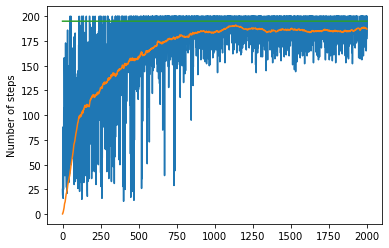

In [99]:
import gym
from random import randint
import math
import tqdm
import numpy as np
import matplotlib.pyplot as plt
decay_ = []
decay_1 = []
decay_2 = []

def learn(episodeCount, episodeVerbose=100):
    tqdm_episodes = tqdm.tqdm(range(episodeCount))
    for i_episode in tqdm_episodes:  # Start an episode
        obs = env.reset()
        
        # Compute the decay of the exploration
        decayX = 0.02
        decayY = 20
        decay = max(-i_episode*decayX+decayY, 10/(i_episode+1))

        iter_verbose = i_episode % episodeVerbose == 0 if episodeVerbose > -1 else 0
        doEpisodeMC(obs, decay, i_episode, verbose=iter_verbose)
        decay_.append(decay)
        decay_1.append(-i_episode*decayX+decayY)
        decay_2.append(10/(i_episode+1))
        i = max(i_episode-100, 0)
        tqdm_episodes.set_postfix({"last_100_avg_pole_upright": np.mean(rewardHistory[i:i_episode+1]),
                                  "len(history)": len(history)})


def doEpisodeMC(obs, decay, i_episode, verbose=False):
    # Reset reward count and states/actions for this episode
    episodeStatesActions = []
    totalRewards = 0

    for t in range(env.spec.max_episode_steps):
        
        if verbose:
            env.render()
            
        state = getState(obs)  # Get the state
        action = policy(state, decay)  # Get the action
        
        # Save state and action to episodeStatesActions
        episodeStatesActions.append({'state': state, 'action': action})  

        obs, reward, done, _ = env.step(action)  # Apply the action

        totalRewards += reward  # Update total reward for this episode
        
        if done:  # Episode is over
            rewardHistory[i_episode] = totalRewards
            for i, state_action in enumerate(episodeStatesActions):  # Update value for chosen actions
                updatePolicyMC(state_action['state'], 
                               state_action['action'], 
                               totalRewards-i)
            break

    if verbose:
        print({"Episode {}. Iteration with pole upright: {}. History length: {}".format(i_episode, 
                                                                                        totalRewards, 
                                                                                        len(history))})



# @param state <string> the state to update
# @param action <int> the action to update
# @param G <int> the reward
def updatePolicyMC(state, action, G):
    a = history[state][action]
    a['value'] = (a['value'] * a['count'] + G) / (a['count'] + 1)
    a['count'] += 1


# @param obs <[float]> the observation to convert into a state
# @return the state associated to the observation_space
# If the set of observations where never met, create the state
# The function reduces the number of possible states
def getState(obs):
    state = ''
    for o in obs:
        state += str(math.floor(o)) 
    return state

    
# @param state <string>
# @param decay <int>
# @return an action
# The policy progressivly stops exploration and gets greedy
def policy(state, decay):
    # Get the less explored action and the most valued action
    maxValueAction = env.action_space.sample()
    minCountAction = env.action_space.sample()
    if state not in history:  # If state does not exists, create it
        history[state] = []
        for _ in range(env.action_space.n):
            history[state].append({'count':0, 'value':0})
    stateValues = history[state]
    for action in range(env.action_space.n):
        if stateValues[maxValueAction]['value'] < stateValues[action]['value']:
            maxValueAction = action
        if stateValues[minCountAction]['count'] > stateValues[action]['count']:
            minCountAction = action
    # Computing the decay of the exploration
    if randint(0, 100) < decay:
        return minCountAction
    else:
        return maxValueAction


env = gym.make('CartPole-v0')
nbEpisodes = 2000
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()

(2099,)

#### Preguntes

**1.** Explica què és el `episodeCount` i el `env.spec.max_episode_steps`.

**2.** Com són les observacions de l'entorn? En quin estat s'inicialitza l'environment?

**3.** Explica el `decay` utilitzat. Mostra la gràfica del decay utilitzat per totes les epoques.

**4.** Explica la funció `action = policy(state, decay)`. 

**5.** Què passa en el `obs, reward, done, _ = env.step(action)`. Explica les variables retornades.

**6.** Com es premien els rewards en l'actualització de la policy `updatePolicyMC`? Què es guarda al diccionari `history`?

**7.** Explica la darrere gràfica retornada. Què s'hi representa?

**8.** Explica la relació entre la mida del `history`, i el que s'obté de la funció `getState(obs)`. Fés proves reduint o augmentant la dimensionalitat i el número de possibles estats del sistema per veure com afecta al aprenentatge.



#### Respostes

# 1.  Explica què és el episodeCount i el env.spec.max_episode_steps.

Episodi count es el nombre de simulacions(experiments que es realitzaràn). Dintre d'aquests experiments hi ha un nombre d'iteracions màxima encara que no es convergeixi; aquest nombre bé donat per env.spec-max_espisode_steps. 

#  2. Com són les observacions de l'entorn? En quin estat s'inicialitza l'environment?

De la següent web https://github.com/openai/gym/wiki/CartPole-v0; s'extreu la següent informació.
Les observacions de l'entorn representen [position of cart, velocity of cart, angle of pole, rotation rate of pole]. Mentre que l'estat inicial es pensaba que era centrat amb angle de 90*(del pal a mantenir recte) i velocitat aleatoria;m'equivocaba. Es veu que tots els valors segueixen una distribució normal tal i com diu a la web : "All observations are assigned a uniform random value between ±0.05."

# 3. Explica el decay utilitzat. Mostra la gràfica del decay utilitzat per totes les epoques.

El decay utilitzat preten tindre una gran exploració al començament de l'entrenament pero que després es centri en la solució optima minimitzant les probes. Per a fer-ho fa servir una recta que pren valors positius durant els 1000 primers episodis. (Amb pendents i bias definits per decayX i decayY). Un cop acaben els 1000 epsiodis l'altre funció que es té en compte es una funció racional que sembla pràcticament constant degut as que la variacoó màxima entre la iteració 1000 i la iteració 2000 es de 0.005.(inapreciable).


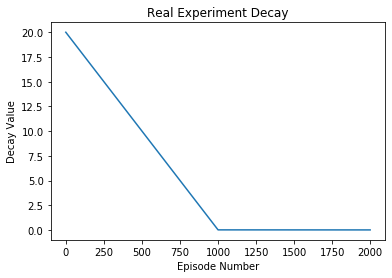

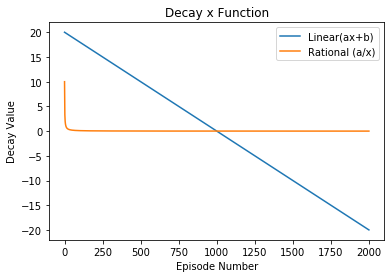

In [46]:
plt.title("Real Experiment Decay")
plt.xlabel("Episode Number")
plt.ylabel("Decay Value")
plt.plot(range(len(decay_)),decay_)
plt.show()
plt.title("Decay x Function")
plt.xlabel("Episode Number")
plt.ylabel("Decay Value")
plt.plot(range(len(decay_1)),decay_1,label="Linear(ax+b)")
plt.plot(range(len(decay_2)),decay_2,label="Rational (a/x)")
plt.legend()

Formalitzant una mica la nostra funció de decay queda definida per:

$ f(x) =  \begin{array}{lcc}
             -0.02*x + 20 &   si  & x \leq 1000 \\
             \\ 10/(x+1) &  si &  x\geq 1000 \\
             \end{array}$

# 4. Explica la funció action = policy(state, decay). 

El funcionament d'aquesta funció es basa en que es guarda un historial d'estats i de les accions( puntuacions obtingudes amb aquesta acció i cops escollida l'acció). Aleshores aquesta funció el que fa es crear instancies  de cada possible solució(amb valoració 0 i cops repetits l'estat 0).
La clau de l'algoritme està en que separa el element a mes puntuació i el element amb menys counts(escollit menys vegades); això vol dir que quan faci exploració anirà al element visitat menys vegades mentre que quan fagi selecció del millor buscarà al més valorat.

Mitjançant una cerca en un array de diccionaris troba els dos elements d'interes i realitza la decisió d'exploració o de búsqueda heurística mitjançant un valor aleatori(entre 0 i 100) i el decay (qeu va de 0 a 20). Es a dir que la màxima probabilitat de dedicar una decisió a l'exploració durant tot l'algoritme es 20% i decreix com s'ha explicat en l'exercici anterior.

Retorna la acció escollida.

# 5.  Què passa en el obs, reward, done, _ = env.step(action). Explica les variables retornades.

La variable **obs** represtna el concepte d'observació i com s'ha explicat previament defineix el estat de la simulació mitjançant 4 nombres([position of cart, velocity of cart, angle of pole, rotation rate of pole]).

**Reward** es la recompensa obtinguda en realitzar la acció assignada en el step.

**Done** conte un bolea sobre si l'algoritme ha convergit o no.

**_** Es fa servir a python(com a standrad no escrit) per guardar tot allò que no es farà servir; en el nostre cas es un diccionari buit en el que es suposa que poden anar altres metriques definides per l'usuari o informació que a l'usuari li pugi interessar(s'enten que per fer-se servir s'haurà d'explicitar d'alguna manera fent servir instancies del modul gym)


# 6.  Com es premien els rewards en l'actualització de la policy updatePolicyMC? Què es guarda al diccionari history?

Es premia mantenint una mitjana del valor en funció del nombre de cops escollits. Es a dir si es premia una acció ja valorada el que es farà es multiplicar el valor actual pels cops que s'ha escollit, sumar-li el nou valor i dividir-ho tot per el nombre total de counts de l'ecció(contant la actual); mantenint així una mtijana.

Es mante una mitjana degut a que:
$$ mitj = \sum_{i=0}^{i=n}\frac{x_{i}}{n} $$
$$ mitj = \frac{1}{n} * \sum_{i=0}^{i=1}x_{i} $$
$$ mitj*n =  \sum_{i=0}^{i=n}x_{i} $$

Es a ir que en multiplicar la mitjana anterior amb el count s'aconsegueix recuperar el resultat del sumatori de la mitjana; a aquest sumatori se li afegeix un nou valor i es divideix la suma per n+1 i es té la mitjana aritmética de totes les puntuacions per aquesta acció.

El diccionari hystory està estructurat de la següent manera:

{state: {accio : {value: "REWARD" , count : "Num_times"} } } 

La cosa es que encara que el nostre espai de cerca té un boundary(-1e38,1e38) al estar definit sobre els nombres reals resulta ser infinit. Per poder guardar un recompte d'estats factible el que es fa es reduïr el espai de possibles estats als nombres naturals fent un mapeig basat en la funció math.floor (tot nombre entre dos naturals se li assignara el natural mes petit). Aquesta solució fa factible la realització del experiment(donat que fem greedy perque en força bruta tampoc es podria).

Les accions possibles son 0 i 1; per tant podem dir que tenim valor i recompte per les dues possibles opcions dels estats visitats.

#  7. Explica la darrere gràfica retornada. Què s'hi representa?

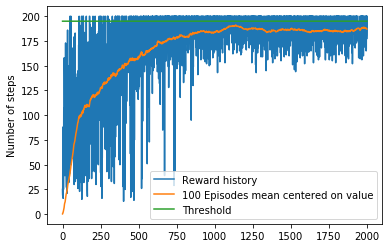

In [100]:
plt.plot(range(nbEpisodes), rewardHistory, label="Reward history")
plt.plot(range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes],label="100 Episodes mean centered on value") 
plt.plot(range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes,label="Threshold")
plt.ylabel('Number of steps')
plt.legend()
plt.show()

Per explicar la grafica s'ha de tenir en compte que el algoritme fa servir un theshold que determina quan el algoritme ha convergit(convergeix quan donat un nombre d'episodis els rewards siguin superiors al threshold).
Aquest threshold ve representat en la línea verda de la gràfica($y=threshold$)

Per altra banda tenim el Reward history, aquesta funció es tan irregular perque nosaltres li donem una aproximació probabilistica al algoritme fent que de tant en tant explori en comptes d'anar sempre a la millor direcció que coneix això fa que el reward dacigui i la funció tingui aquesta forma.

Per que sigui mol ilustratiu el que es fa es donat un valor agafar els 50 previs i els 50 següents i calcular la mitjana(la grafica en taronja). Una forma molt ingeniosa de fer aquest càlcul es realitzar una convolució amb un array de lognitud 100 ple d'uns i despres dividir per 100. (Com a detall afegir que en el cas de que el centre de la convolució estigui entre 0 i 50 o entre 1950 i 2000 la convolució es donarà tot i no haver-hi 50 valors en una de les bandes; s'agafen tants com n'hi ha fins a 50. Degut a l'argument full)

# 8. Explica la relació entre la mida del history, i el que s'obté de la funció getState(obs). Fés proves reduint o augmentant la dimensionalitat i el número de possibles estats del sistema per veure com afecta al aprenentatge.

S'ha fet un petit comentari sobre això en la pregunta 6 degut a que no es sabia que es demanaria després de manera explicita.

El problema està en que tots els nostres possibles estats venen representats en un vector de 4 nombres reals(floats32). Per tant totes les possibles solucions que podem expressar de manera fisica venen donades per (2^38)^4 possibilitats. Recordant que cadascuna d'aquestes possibilitats hauria de ser una clau del diccionari history podem dir clarament que aquesta no es una representació factible dels estats.Afegir que encara que el nostre algoritme redueixi el espai de cerca entre -20. i +20.0(per exemple) la quantitat de nombres que hi ha es ininit; seguim limitats pel mateix nombre de possibilitats que abans(per la quanittat de nombres que es pot representar entre -20 i 20 amb cuatre float32)

Per a solucionar això el que es fà es guardar aproximacions dels estats. Aquestes aproximacions son resultats del truncament dels nombres racionals; cualsevol nombre natural entre a i b se li assignarà el minim entre a i b.(math.floor es la funció que es fa servir).

Ara tenint en compte que fem servir representació d'string per a cada estat técnicament no hi ha un límit establert tampoc però sabem que els valors del nostre algoritme no tendeixen cap a infinit ni menys infinit. Per tan fem la mateixa suposició que abans (tots els valors entre -20 i 20) tindriem 40^4 possibles valors; que es gran però factible de fer funcionar( a diferencia del exemple amb nombres reals on estabem limitats per hardware).

**Es considera que la funció getState no està ben programada degut a que un estat en el que el primer valor sigui 21 i el segon sigui 1 es sobrescriuria amb un estat en el que el primer valor sigui 2 i el segon sigui 11; podent perdre valors molt importants**

**Nou metode 1**

Arreglem el problema anteriror canvial el format de concatenació directa a concatencaió amb '_' entre cada valor i veiem que els resultats milloren.





  0%|          | 0/2500 [00:00<?, ?it/s]



  0%|          | 0/2500 [00:00<?, ?it/s, last_100_avg_pole_upright=34, len(history)=7]



  0%|          | 1/2500 [00:00<21:10,  1.97it/s, last_100_avg_pole_upright=34, len(history)=7]



  0%|          | 1/2500 [00:00<21:10,  1.97it/s, last_100_avg_pole_upright=25, len(history)=11]



  0%|          | 1/2500 [00:00<21:10,  1.97it/s, last_100_avg_pole_upright=23.3, len(history)=16]



  0%|          | 1/2500 [00:00<21:10,  1.97it/s, last_100_avg_pole_upright=24.5, len(history)=17]



  0%|          | 1/2500 [00:00<21:10,  1.97it/s, last_100_avg_pole_upright=28.8, len(history)=18]



  0%|          | 1/2500 [00:00<21:10,  1.97it/s, last_100_avg_pole_upright=41.5, len(history)=20]



  0%|          | 1/2500 [00:00<21:10,  1.97it/s, last_100_avg_pole_upright=37.4, len(history)=20]



  0%|          | 1/2500 [00:00<21:10,  1.97it/s, last_100_avg_pole_upright=40.9, len(history)=24]



  0%|          | 1/2500 [00:00<21:10,  1.97it/s, last_100_a

{'Episode 0. Iteration with pole upright: 34.0. History length: 7'}


  1%|▏         | 33/2500 [00:00<14:40,  2.80it/s, last_100_avg_pole_upright=66.4, len(history)=57]



  1%|▏         | 33/2500 [00:00<14:40,  2.80it/s, last_100_avg_pole_upright=66.2, len(history)=58]



  2%|▏         | 59/2500 [00:00<10:12,  3.98it/s, last_100_avg_pole_upright=66.2, len(history)=58]



  2%|▏         | 59/2500 [00:00<10:12,  3.98it/s, last_100_avg_pole_upright=68.4, len(history)=58]



  2%|▏         | 59/2500 [00:00<10:12,  3.98it/s, last_100_avg_pole_upright=68.4, len(history)=59]



  2%|▏         | 59/2500 [00:00<10:12,  3.98it/s, last_100_avg_pole_upright=68.4, len(history)=59]



  2%|▏         | 59/2500 [00:00<10:12,  3.98it/s, last_100_avg_pole_upright=69.6, len(history)=59]



  2%|▏         | 59/2500 [00:00<10:12,  3.98it/s, last_100_avg_pole_upright=69.6, len(history)=59]



  2%|▏         | 59/2500 [00:00<10:12,  3.98it/s, last_100_avg_pole_upright=70, len(history)=59]  



  2%|▏         | 59/2500 [00:00<10:12,  3.98it/s, last_100_avg_pole_upright=70.6, 

  4%|▍         | 112/2500 [00:00<04:58,  8.00it/s, last_100_avg_pole_upright=102, len(history)=106]



  4%|▍         | 112/2500 [00:00<04:58,  8.00it/s, last_100_avg_pole_upright=103, len(history)=109]



  4%|▍         | 112/2500 [00:00<04:58,  8.00it/s, last_100_avg_pole_upright=105, len(history)=109]



  4%|▍         | 112/2500 [00:00<04:58,  8.00it/s, last_100_avg_pole_upright=106, len(history)=109]



  4%|▍         | 112/2500 [00:00<04:58,  8.00it/s, last_100_avg_pole_upright=106, len(history)=109]



  4%|▍         | 112/2500 [00:00<04:58,  8.00it/s, last_100_avg_pole_upright=105, len(history)=110]



  4%|▍         | 112/2500 [00:01<04:58,  8.00it/s, last_100_avg_pole_upright=106, len(history)=116]



  4%|▍         | 112/2500 [00:01<04:58,  8.00it/s, last_100_avg_pole_upright=107, len(history)=117]



  4%|▍         | 112/2500 [00:01<04:58,  8.00it/s, last_100_avg_pole_upright=108, len(history)=118]



  4%|▍         | 112/2500 [00:01<04:58,  8.00it/s, last_100_avg_pole_upri

  7%|▋         | 184/2500 [00:01<01:45, 21.86it/s, last_100_avg_pole_upright=127, len(history)=146]



  7%|▋         | 184/2500 [00:01<01:45, 21.86it/s, last_100_avg_pole_upright=126, len(history)=146]



  7%|▋         | 184/2500 [00:01<01:45, 21.86it/s, last_100_avg_pole_upright=127, len(history)=146]



  7%|▋         | 184/2500 [00:01<01:45, 21.86it/s, last_100_avg_pole_upright=127, len(history)=148]



  7%|▋         | 184/2500 [00:01<01:45, 21.86it/s, last_100_avg_pole_upright=126, len(history)=148]



  7%|▋         | 184/2500 [00:01<01:45, 21.86it/s, last_100_avg_pole_upright=127, len(history)=148]



  7%|▋         | 184/2500 [00:01<01:45, 21.86it/s, last_100_avg_pole_upright=127, len(history)=148]



  7%|▋         | 184/2500 [00:01<01:45, 21.86it/s, last_100_avg_pole_upright=127, len(history)=148]



  7%|▋         | 184/2500 [00:01<01:45, 21.86it/s, last_100_avg_pole_upright=126, len(history)=148]



  7%|▋         | 184/2500 [00:01<01:45, 21.86it/s, last_100_avg_pole_upri

 10%|█         | 254/2500 [00:01<00:42, 52.96it/s, last_100_avg_pole_upright=136, len(history)=153]



 10%|█         | 254/2500 [00:01<00:42, 52.96it/s, last_100_avg_pole_upright=137, len(history)=153]



 10%|█         | 254/2500 [00:01<00:42, 52.96it/s, last_100_avg_pole_upright=136, len(history)=154]



 10%|█         | 254/2500 [00:01<00:42, 52.96it/s, last_100_avg_pole_upright=137, len(history)=154]



 10%|█         | 254/2500 [00:01<00:42, 52.96it/s, last_100_avg_pole_upright=137, len(history)=154]



 10%|█         | 254/2500 [00:01<00:42, 52.96it/s, last_100_avg_pole_upright=137, len(history)=154]



 10%|█         | 254/2500 [00:01<00:42, 52.96it/s, last_100_avg_pole_upright=136, len(history)=154]



 10%|█         | 254/2500 [00:01<00:42, 52.96it/s, last_100_avg_pole_upright=137, len(history)=154]



 10%|█         | 254/2500 [00:01<00:42, 52.96it/s, last_100_avg_pole_upright=136, len(history)=154]



 10%|█         | 254/2500 [00:01<00:42, 52.96it/s, last_100_avg_pole_upri

 13%|█▎        | 318/2500 [00:01<00:22, 98.52it/s, last_100_avg_pole_upright=149, len(history)=158]



 13%|█▎        | 318/2500 [00:01<00:22, 98.52it/s, last_100_avg_pole_upright=149, len(history)=158]



 13%|█▎        | 318/2500 [00:01<00:22, 98.52it/s, last_100_avg_pole_upright=149, len(history)=159]



 13%|█▎        | 318/2500 [00:01<00:22, 98.52it/s, last_100_avg_pole_upright=149, len(history)=159]



 13%|█▎        | 318/2500 [00:01<00:22, 98.52it/s, last_100_avg_pole_upright=149, len(history)=159]



 13%|█▎        | 318/2500 [00:01<00:22, 98.52it/s, last_100_avg_pole_upright=147, len(history)=159]



 13%|█▎        | 318/2500 [00:01<00:22, 98.52it/s, last_100_avg_pole_upright=147, len(history)=159]



 13%|█▎        | 318/2500 [00:01<00:22, 98.52it/s, last_100_avg_pole_upright=147, len(history)=159]



 13%|█▎        | 318/2500 [00:02<00:22, 98.52it/s, last_100_avg_pole_upright=147, len(history)=159]



 13%|█▎        | 318/2500 [00:02<00:22, 98.52it/s, last_100_avg_pole_upri

 15%|█▌        | 382/2500 [00:02<00:14, 150.24it/s, last_100_avg_pole_upright=151, len(history)=161]



 15%|█▌        | 382/2500 [00:02<00:14, 150.24it/s, last_100_avg_pole_upright=151, len(history)=161]



 15%|█▌        | 382/2500 [00:02<00:14, 150.24it/s, last_100_avg_pole_upright=150, len(history)=161]



 15%|█▌        | 382/2500 [00:02<00:14, 150.24it/s, last_100_avg_pole_upright=151, len(history)=161]



 15%|█▌        | 382/2500 [00:04<00:14, 150.24it/s, last_100_avg_pole_upright=151, len(history)=161]



 15%|█▌        | 382/2500 [00:04<00:14, 150.24it/s, last_100_avg_pole_upright=150, len(history)=161]



 15%|█▌        | 382/2500 [00:04<00:14, 150.24it/s, last_100_avg_pole_upright=150, len(history)=161]



 16%|█▌        | 403/2500 [00:04<01:32, 22.71it/s, last_100_avg_pole_upright=150, len(history)=161] 



 16%|█▌        | 403/2500 [00:04<01:32, 22.71it/s, last_100_avg_pole_upright=151, len(history)=161]



 16%|█▌        | 403/2500 [00:04<01:32, 22.71it/s, last_100_avg_p

{'Episode 400. Iteration with pole upright: 200.0. History length: 161'}


 17%|█▋        | 424/2500 [00:05<01:07, 30.93it/s, last_100_avg_pole_upright=161, len(history)=161]



 17%|█▋        | 424/2500 [00:05<01:07, 30.93it/s, last_100_avg_pole_upright=161, len(history)=161]



 17%|█▋        | 424/2500 [00:05<01:07, 30.93it/s, last_100_avg_pole_upright=161, len(history)=161]



 17%|█▋        | 424/2500 [00:05<01:07, 30.93it/s, last_100_avg_pole_upright=162, len(history)=161]



 18%|█▊        | 443/2500 [00:05<00:49, 41.30it/s, last_100_avg_pole_upright=162, len(history)=161]



 18%|█▊        | 443/2500 [00:05<00:49, 41.30it/s, last_100_avg_pole_upright=163, len(history)=161]



 18%|█▊        | 443/2500 [00:05<00:49, 41.30it/s, last_100_avg_pole_upright=164, len(history)=163]



 18%|█▊        | 443/2500 [00:05<00:49, 41.30it/s, last_100_avg_pole_upright=165, len(history)=163]



 18%|█▊        | 443/2500 [00:05<00:49, 41.30it/s, last_100_avg_pole_upright=164, len(history)=163]



 18%|█▊        | 443/2500 [00:05<00:49, 41.30it/s, last_100_avg_pole_upri

 20%|██        | 504/2500 [00:05<00:23, 86.39it/s, last_100_avg_pole_upright=172, len(history)=163]



 20%|██        | 504/2500 [00:05<00:23, 86.39it/s, last_100_avg_pole_upright=172, len(history)=163]



 20%|██        | 504/2500 [00:05<00:23, 86.39it/s, last_100_avg_pole_upright=172, len(history)=163]



 20%|██        | 504/2500 [00:05<00:23, 86.39it/s, last_100_avg_pole_upright=171, len(history)=163]



 20%|██        | 504/2500 [00:05<00:23, 86.39it/s, last_100_avg_pole_upright=171, len(history)=163]



 20%|██        | 504/2500 [00:05<00:23, 86.39it/s, last_100_avg_pole_upright=172, len(history)=163]



 20%|██        | 504/2500 [00:05<00:23, 86.39it/s, last_100_avg_pole_upright=173, len(history)=163]



 20%|██        | 504/2500 [00:05<00:23, 86.39it/s, last_100_avg_pole_upright=172, len(history)=163]



 20%|██        | 504/2500 [00:05<00:23, 86.39it/s, last_100_avg_pole_upright=172, len(history)=163]



 20%|██        | 504/2500 [00:05<00:23, 86.39it/s, last_100_avg_pole_upri

 22%|██▏       | 560/2500 [00:05<00:15, 127.40it/s, last_100_avg_pole_upright=181, len(history)=166]



 22%|██▏       | 560/2500 [00:05<00:15, 127.40it/s, last_100_avg_pole_upright=182, len(history)=166]



 22%|██▏       | 560/2500 [00:05<00:15, 127.40it/s, last_100_avg_pole_upright=182, len(history)=166]



 22%|██▏       | 560/2500 [00:05<00:15, 127.40it/s, last_100_avg_pole_upright=183, len(history)=166]



 22%|██▏       | 560/2500 [00:05<00:15, 127.40it/s, last_100_avg_pole_upright=183, len(history)=166]



 23%|██▎       | 578/2500 [00:05<00:14, 135.31it/s, last_100_avg_pole_upright=183, len(history)=166]



 23%|██▎       | 578/2500 [00:05<00:14, 135.31it/s, last_100_avg_pole_upright=184, len(history)=166]



 23%|██▎       | 578/2500 [00:05<00:14, 135.31it/s, last_100_avg_pole_upright=184, len(history)=166]



 23%|██▎       | 578/2500 [00:05<00:14, 135.31it/s, last_100_avg_pole_upright=184, len(history)=166]



 23%|██▎       | 578/2500 [00:05<00:14, 135.31it/s, last_100_avg

 25%|██▌       | 631/2500 [00:06<00:12, 153.65it/s, last_100_avg_pole_upright=183, len(history)=168]



 25%|██▌       | 631/2500 [00:06<00:12, 153.65it/s, last_100_avg_pole_upright=183, len(history)=168]



 25%|██▌       | 631/2500 [00:06<00:12, 153.65it/s, last_100_avg_pole_upright=183, len(history)=168]



 25%|██▌       | 631/2500 [00:06<00:12, 153.65it/s, last_100_avg_pole_upright=183, len(history)=168]



 25%|██▌       | 631/2500 [00:06<00:12, 153.65it/s, last_100_avg_pole_upright=183, len(history)=168]



 25%|██▌       | 631/2500 [00:06<00:12, 153.65it/s, last_100_avg_pole_upright=182, len(history)=168]



 25%|██▌       | 631/2500 [00:06<00:12, 153.65it/s, last_100_avg_pole_upright=183, len(history)=168]



 25%|██▌       | 631/2500 [00:06<00:12, 153.65it/s, last_100_avg_pole_upright=182, len(history)=168]



 25%|██▌       | 631/2500 [00:06<00:12, 153.65it/s, last_100_avg_pole_upright=183, len(history)=168]



 26%|██▌       | 648/2500 [00:06<00:11, 155.41it/s, last_100_avg

 28%|██▊       | 701/2500 [00:06<00:11, 159.68it/s, last_100_avg_pole_upright=185, len(history)=171]



 28%|██▊       | 701/2500 [00:06<00:11, 159.68it/s, last_100_avg_pole_upright=185, len(history)=171]



 28%|██▊       | 701/2500 [00:06<00:11, 159.68it/s, last_100_avg_pole_upright=183, len(history)=171]



 28%|██▊       | 701/2500 [00:06<00:11, 159.68it/s, last_100_avg_pole_upright=184, len(history)=171]



 28%|██▊       | 701/2500 [00:06<00:11, 159.68it/s, last_100_avg_pole_upright=184, len(history)=171]



 28%|██▊       | 701/2500 [00:06<00:11, 159.68it/s, last_100_avg_pole_upright=184, len(history)=171]



 28%|██▊       | 701/2500 [00:06<00:11, 159.68it/s, last_100_avg_pole_upright=184, len(history)=171]



 28%|██▊       | 701/2500 [00:06<00:11, 159.68it/s, last_100_avg_pole_upright=184, len(history)=171]



 28%|██▊       | 701/2500 [00:06<00:11, 159.68it/s, last_100_avg_pole_upright=183, len(history)=171]



 28%|██▊       | 701/2500 [00:06<00:11, 159.68it/s, last_100_avg

 30%|███       | 758/2500 [00:07<00:10, 169.58it/s, last_100_avg_pole_upright=191, len(history)=173]



 30%|███       | 758/2500 [00:07<00:10, 169.58it/s, last_100_avg_pole_upright=191, len(history)=173]



 30%|███       | 758/2500 [00:07<00:10, 169.58it/s, last_100_avg_pole_upright=191, len(history)=173]



 30%|███       | 758/2500 [00:07<00:10, 169.58it/s, last_100_avg_pole_upright=190, len(history)=173]



 30%|███       | 758/2500 [00:07<00:10, 169.58it/s, last_100_avg_pole_upright=190, len(history)=173]



 31%|███       | 777/2500 [00:07<00:09, 172.81it/s, last_100_avg_pole_upright=190, len(history)=173]



 31%|███       | 777/2500 [00:07<00:09, 172.81it/s, last_100_avg_pole_upright=190, len(history)=173]



 31%|███       | 777/2500 [00:07<00:09, 172.81it/s, last_100_avg_pole_upright=190, len(history)=173]



 31%|███       | 777/2500 [00:07<00:09, 172.81it/s, last_100_avg_pole_upright=190, len(history)=173]



 31%|███       | 777/2500 [00:07<00:09, 172.81it/s, last_100_avg

{'Episode 800. Iteration with pole upright: 200.0. History length: 173'}


 33%|███▎      | 831/2500 [00:10<01:01, 27.19it/s, last_100_avg_pole_upright=195, len(history)=173]



 33%|███▎      | 831/2500 [00:10<01:01, 27.19it/s, last_100_avg_pole_upright=195, len(history)=173]



 33%|███▎      | 831/2500 [00:10<01:01, 27.19it/s, last_100_avg_pole_upright=195, len(history)=173]



 33%|███▎      | 831/2500 [00:10<01:01, 27.19it/s, last_100_avg_pole_upright=195, len(history)=173]



 33%|███▎      | 831/2500 [00:10<01:01, 27.19it/s, last_100_avg_pole_upright=195, len(history)=173]



 33%|███▎      | 831/2500 [00:10<01:01, 27.19it/s, last_100_avg_pole_upright=195, len(history)=173]



 33%|███▎      | 831/2500 [00:10<01:01, 27.19it/s, last_100_avg_pole_upright=195, len(history)=173]



 33%|███▎      | 831/2500 [00:10<01:01, 27.19it/s, last_100_avg_pole_upright=195, len(history)=173]



 33%|███▎      | 831/2500 [00:10<01:01, 27.19it/s, last_100_avg_pole_upright=195, len(history)=173]



 33%|███▎      | 831/2500 [00:10<01:01, 27.19it/s, last_100_avg_pole_upri

 36%|███▌      | 902/2500 [00:10<00:21, 75.06it/s, last_100_avg_pole_upright=194, len(history)=173]



 36%|███▌      | 902/2500 [00:10<00:21, 75.06it/s, last_100_avg_pole_upright=194, len(history)=173]



 36%|███▌      | 902/2500 [00:10<00:21, 75.06it/s, last_100_avg_pole_upright=194, len(history)=173]



 36%|███▌      | 902/2500 [00:10<00:21, 75.06it/s, last_100_avg_pole_upright=194, len(history)=173]



 36%|███▌      | 902/2500 [00:10<00:21, 75.06it/s, last_100_avg_pole_upright=194, len(history)=173]



 36%|███▌      | 902/2500 [00:10<00:21, 75.06it/s, last_100_avg_pole_upright=194, len(history)=173]



 36%|███▌      | 902/2500 [00:10<00:21, 75.06it/s, last_100_avg_pole_upright=194, len(history)=173]



 36%|███▌      | 902/2500 [00:10<00:21, 75.06it/s, last_100_avg_pole_upright=194, len(history)=173]



 36%|███▌      | 902/2500 [00:10<00:21, 75.06it/s, last_100_avg_pole_upright=194, len(history)=173]



 36%|███▌      | 902/2500 [00:10<00:21, 75.06it/s, last_100_avg_pole_upri

 38%|███▊      | 958/2500 [00:10<00:12, 119.27it/s, last_100_avg_pole_upright=196, len(history)=174]



 38%|███▊      | 958/2500 [00:10<00:12, 119.27it/s, last_100_avg_pole_upright=196, len(history)=174]



 38%|███▊      | 958/2500 [00:10<00:12, 119.27it/s, last_100_avg_pole_upright=196, len(history)=174]



 38%|███▊      | 958/2500 [00:10<00:12, 119.27it/s, last_100_avg_pole_upright=196, len(history)=174]



 38%|███▊      | 958/2500 [00:10<00:12, 119.27it/s, last_100_avg_pole_upright=196, len(history)=174]



 38%|███▊      | 958/2500 [00:10<00:12, 119.27it/s, last_100_avg_pole_upright=196, len(history)=174]



 38%|███▊      | 958/2500 [00:10<00:12, 119.27it/s, last_100_avg_pole_upright=196, len(history)=174]



 38%|███▊      | 958/2500 [00:10<00:12, 119.27it/s, last_100_avg_pole_upright=196, len(history)=174]



 39%|███▉      | 977/2500 [00:10<00:11, 134.00it/s, last_100_avg_pole_upright=196, len(history)=174]



 39%|███▉      | 977/2500 [00:10<00:11, 134.00it/s, last_100_avg

 41%|████      | 1030/2500 [00:11<00:09, 149.97it/s, last_100_avg_pole_upright=197, len(history)=174]



 41%|████      | 1030/2500 [00:11<00:09, 149.97it/s, last_100_avg_pole_upright=196, len(history)=174]



 41%|████      | 1030/2500 [00:11<00:09, 149.97it/s, last_100_avg_pole_upright=196, len(history)=174]



 41%|████      | 1030/2500 [00:11<00:09, 149.97it/s, last_100_avg_pole_upright=196, len(history)=174]



 41%|████      | 1030/2500 [00:11<00:09, 149.97it/s, last_100_avg_pole_upright=196, len(history)=174]



 41%|████      | 1030/2500 [00:11<00:09, 149.97it/s, last_100_avg_pole_upright=196, len(history)=174]



 41%|████      | 1030/2500 [00:11<00:09, 149.97it/s, last_100_avg_pole_upright=196, len(history)=174]



 41%|████      | 1030/2500 [00:11<00:09, 149.97it/s, last_100_avg_pole_upright=196, len(history)=174]



 41%|████      | 1030/2500 [00:11<00:09, 149.97it/s, last_100_avg_pole_upright=196, len(history)=174]



 41%|████      | 1030/2500 [00:11<00:09, 149.97it/s, la

 44%|████▍     | 1098/2500 [00:11<00:08, 157.34it/s, last_100_avg_pole_upright=198, len(history)=174]



 44%|████▍     | 1098/2500 [00:11<00:08, 157.34it/s, last_100_avg_pole_upright=198, len(history)=174]



 44%|████▍     | 1098/2500 [00:11<00:08, 157.34it/s, last_100_avg_pole_upright=198, len(history)=174]



 44%|████▍     | 1098/2500 [00:11<00:08, 157.34it/s, last_100_avg_pole_upright=198, len(history)=174]



 44%|████▍     | 1098/2500 [00:11<00:08, 157.34it/s, last_100_avg_pole_upright=198, len(history)=174]



 44%|████▍     | 1098/2500 [00:11<00:08, 157.34it/s, last_100_avg_pole_upright=198, len(history)=174]



 44%|████▍     | 1098/2500 [00:11<00:08, 157.34it/s, last_100_avg_pole_upright=198, len(history)=174]



 44%|████▍     | 1098/2500 [00:11<00:08, 157.34it/s, last_100_avg_pole_upright=198, len(history)=174]



 44%|████▍     | 1098/2500 [00:11<00:08, 157.34it/s, last_100_avg_pole_upright=198, len(history)=174]



 44%|████▍     | 1098/2500 [00:11<00:08, 157.34it/s, la

 47%|████▋     | 1167/2500 [00:12<00:08, 164.22it/s, last_100_avg_pole_upright=197, len(history)=174]



 47%|████▋     | 1167/2500 [00:12<00:08, 164.22it/s, last_100_avg_pole_upright=197, len(history)=174]



 47%|████▋     | 1167/2500 [00:12<00:08, 164.22it/s, last_100_avg_pole_upright=197, len(history)=174]



 47%|████▋     | 1167/2500 [00:12<00:08, 164.22it/s, last_100_avg_pole_upright=197, len(history)=174]



 47%|████▋     | 1167/2500 [00:12<00:08, 164.22it/s, last_100_avg_pole_upright=197, len(history)=174]



 47%|████▋     | 1167/2500 [00:12<00:08, 164.22it/s, last_100_avg_pole_upright=197, len(history)=174]



 47%|████▋     | 1167/2500 [00:12<00:08, 164.22it/s, last_100_avg_pole_upright=197, len(history)=174]



 47%|████▋     | 1167/2500 [00:12<00:08, 164.22it/s, last_100_avg_pole_upright=197, len(history)=174]



 47%|████▋     | 1167/2500 [00:12<00:08, 164.22it/s, last_100_avg_pole_upright=197, len(history)=174]



 47%|████▋     | 1167/2500 [00:12<00:08, 164.22it/s, la

{'Episode 1200. Iteration with pole upright: 200.0. History length: 174'}


 49%|████▊     | 1218/2500 [00:15<00:49, 25.74it/s, last_100_avg_pole_upright=198, len(history)=174]



 49%|████▉     | 1234/2500 [00:15<00:36, 34.39it/s, last_100_avg_pole_upright=198, len(history)=174]



 49%|████▉     | 1234/2500 [00:15<00:36, 34.39it/s, last_100_avg_pole_upright=198, len(history)=174]



 49%|████▉     | 1234/2500 [00:15<00:36, 34.39it/s, last_100_avg_pole_upright=198, len(history)=174]



 49%|████▉     | 1234/2500 [00:15<00:36, 34.39it/s, last_100_avg_pole_upright=198, len(history)=174]



 49%|████▉     | 1234/2500 [00:15<00:36, 34.39it/s, last_100_avg_pole_upright=198, len(history)=174]



 49%|████▉     | 1234/2500 [00:15<00:36, 34.39it/s, last_100_avg_pole_upright=198, len(history)=174]



 49%|████▉     | 1234/2500 [00:15<00:36, 34.39it/s, last_100_avg_pole_upright=198, len(history)=174]



 49%|████▉     | 1234/2500 [00:15<00:36, 34.39it/s, last_100_avg_pole_upright=198, len(history)=174]



 49%|████▉     | 1234/2500 [00:15<00:36, 34.39it/s, last_100_avg

 51%|█████▏    | 1285/2500 [00:15<00:17, 71.19it/s, last_100_avg_pole_upright=197, len(history)=175]



 51%|█████▏    | 1285/2500 [00:15<00:17, 71.19it/s, last_100_avg_pole_upright=197, len(history)=175]



 52%|█████▏    | 1301/2500 [00:15<00:14, 84.97it/s, last_100_avg_pole_upright=197, len(history)=175]



 52%|█████▏    | 1301/2500 [00:15<00:14, 84.97it/s, last_100_avg_pole_upright=196, len(history)=175]



 52%|█████▏    | 1301/2500 [00:15<00:14, 84.97it/s, last_100_avg_pole_upright=196, len(history)=175]



 52%|█████▏    | 1301/2500 [00:15<00:14, 84.97it/s, last_100_avg_pole_upright=196, len(history)=175]



 52%|█████▏    | 1301/2500 [00:15<00:14, 84.97it/s, last_100_avg_pole_upright=197, len(history)=175]



 52%|█████▏    | 1301/2500 [00:15<00:14, 84.97it/s, last_100_avg_pole_upright=197, len(history)=175]



 52%|█████▏    | 1301/2500 [00:15<00:14, 84.97it/s, last_100_avg_pole_upright=197, len(history)=175]



 52%|█████▏    | 1301/2500 [00:15<00:14, 84.97it/s, last_100_avg

 54%|█████▍    | 1351/2500 [00:15<00:09, 123.46it/s, last_100_avg_pole_upright=197, len(history)=175]



 54%|█████▍    | 1351/2500 [00:15<00:09, 123.46it/s, last_100_avg_pole_upright=197, len(history)=175]



 54%|█████▍    | 1351/2500 [00:15<00:09, 123.46it/s, last_100_avg_pole_upright=197, len(history)=175]



 55%|█████▍    | 1368/2500 [00:15<00:08, 133.75it/s, last_100_avg_pole_upright=197, len(history)=175]



 55%|█████▍    | 1368/2500 [00:15<00:08, 133.75it/s, last_100_avg_pole_upright=197, len(history)=175]



 55%|█████▍    | 1368/2500 [00:15<00:08, 133.75it/s, last_100_avg_pole_upright=197, len(history)=175]



 55%|█████▍    | 1368/2500 [00:15<00:08, 133.75it/s, last_100_avg_pole_upright=197, len(history)=175]



 55%|█████▍    | 1368/2500 [00:16<00:08, 133.75it/s, last_100_avg_pole_upright=197, len(history)=175]



 55%|█████▍    | 1368/2500 [00:16<00:08, 133.75it/s, last_100_avg_pole_upright=197, len(history)=175]



 55%|█████▍    | 1368/2500 [00:16<00:08, 133.75it/s, la

 57%|█████▋    | 1422/2500 [00:16<00:06, 160.32it/s, last_100_avg_pole_upright=195, len(history)=175]



 57%|█████▋    | 1422/2500 [00:16<00:06, 160.32it/s, last_100_avg_pole_upright=195, len(history)=175]



 57%|█████▋    | 1422/2500 [00:16<00:06, 160.32it/s, last_100_avg_pole_upright=195, len(history)=175]



 57%|█████▋    | 1422/2500 [00:16<00:06, 160.32it/s, last_100_avg_pole_upright=195, len(history)=175]



 57%|█████▋    | 1422/2500 [00:16<00:06, 160.32it/s, last_100_avg_pole_upright=195, len(history)=175]



 57%|█████▋    | 1422/2500 [00:16<00:06, 160.32it/s, last_100_avg_pole_upright=195, len(history)=175]



 57%|█████▋    | 1422/2500 [00:16<00:06, 160.32it/s, last_100_avg_pole_upright=195, len(history)=175]



 57%|█████▋    | 1422/2500 [00:16<00:06, 160.32it/s, last_100_avg_pole_upright=195, len(history)=175]



 57%|█████▋    | 1422/2500 [00:16<00:06, 160.32it/s, last_100_avg_pole_upright=195, len(history)=175]



 58%|█████▊    | 1440/2500 [00:16<00:06, 161.45it/s, la

 60%|█████▉    | 1496/2500 [00:16<00:05, 171.18it/s, last_100_avg_pole_upright=194, len(history)=175]



 60%|█████▉    | 1496/2500 [00:16<00:05, 171.18it/s, last_100_avg_pole_upright=194, len(history)=175]



 60%|█████▉    | 1496/2500 [00:16<00:05, 171.18it/s, last_100_avg_pole_upright=194, len(history)=175]



 60%|█████▉    | 1496/2500 [00:16<00:05, 171.18it/s, last_100_avg_pole_upright=194, len(history)=175]



 60%|█████▉    | 1496/2500 [00:16<00:05, 171.18it/s, last_100_avg_pole_upright=194, len(history)=175]



 60%|█████▉    | 1496/2500 [00:16<00:05, 171.18it/s, last_100_avg_pole_upright=194, len(history)=175]



 60%|█████▉    | 1496/2500 [00:16<00:05, 171.18it/s, last_100_avg_pole_upright=194, len(history)=175]



 60%|█████▉    | 1496/2500 [00:16<00:05, 171.18it/s, last_100_avg_pole_upright=194, len(history)=175]



 60%|█████▉    | 1496/2500 [00:16<00:05, 171.18it/s, last_100_avg_pole_upright=194, len(history)=175]



 60%|█████▉    | 1496/2500 [00:16<00:05, 171.18it/s, la

 62%|██████▏   | 1551/2500 [00:17<00:05, 176.19it/s, last_100_avg_pole_upright=195, len(history)=175]



 62%|██████▏   | 1551/2500 [00:17<00:05, 176.19it/s, last_100_avg_pole_upright=195, len(history)=175]



 62%|██████▏   | 1551/2500 [00:17<00:05, 176.19it/s, last_100_avg_pole_upright=195, len(history)=175]



 62%|██████▏   | 1551/2500 [00:17<00:05, 176.19it/s, last_100_avg_pole_upright=195, len(history)=175]



 62%|██████▏   | 1551/2500 [00:17<00:05, 176.19it/s, last_100_avg_pole_upright=195, len(history)=175]



 63%|██████▎   | 1569/2500 [00:17<00:05, 176.00it/s, last_100_avg_pole_upright=195, len(history)=175]



 63%|██████▎   | 1569/2500 [00:17<00:05, 176.00it/s, last_100_avg_pole_upright=195, len(history)=175]



 63%|██████▎   | 1569/2500 [00:17<00:05, 176.00it/s, last_100_avg_pole_upright=195, len(history)=175]



 63%|██████▎   | 1569/2500 [00:17<00:05, 176.00it/s, last_100_avg_pole_upright=195, len(history)=175]



 63%|██████▎   | 1569/2500 [00:17<00:05, 176.00it/s, la

 65%|██████▍   | 1623/2500 [00:20<00:32, 27.27it/s, last_100_avg_pole_upright=197, len(history)=175]



 65%|██████▍   | 1623/2500 [00:20<00:32, 27.27it/s, last_100_avg_pole_upright=197, len(history)=175]



 65%|██████▍   | 1623/2500 [00:20<00:32, 27.27it/s, last_100_avg_pole_upright=197, len(history)=175]



 65%|██████▍   | 1623/2500 [00:20<00:32, 27.27it/s, last_100_avg_pole_upright=197, len(history)=175]





{'Episode 1600. Iteration with pole upright: 200.0. History length: 175'}


 65%|██████▍   | 1623/2500 [00:20<00:32, 27.27it/s, last_100_avg_pole_upright=197, len(history)=175]



 65%|██████▍   | 1623/2500 [00:20<00:32, 27.27it/s, last_100_avg_pole_upright=197, len(history)=175]



 65%|██████▍   | 1623/2500 [00:20<00:32, 27.27it/s, last_100_avg_pole_upright=197, len(history)=175]



 65%|██████▍   | 1623/2500 [00:20<00:32, 27.27it/s, last_100_avg_pole_upright=197, len(history)=175]



 65%|██████▍   | 1623/2500 [00:20<00:32, 27.27it/s, last_100_avg_pole_upright=197, len(history)=175]



 65%|██████▍   | 1623/2500 [00:20<00:32, 27.27it/s, last_100_avg_pole_upright=197, len(history)=175]



 65%|██████▍   | 1623/2500 [00:20<00:32, 27.27it/s, last_100_avg_pole_upright=197, len(history)=175]



 66%|██████▌   | 1641/2500 [00:20<00:23, 36.54it/s, last_100_avg_pole_upright=197, len(history)=175]



 66%|██████▌   | 1641/2500 [00:20<00:23, 36.54it/s, last_100_avg_pole_upright=197, len(history)=175]



 66%|██████▌   | 1641/2500 [00:20<00:23, 36.54it/s, last_100_avg

 68%|██████▊   | 1690/2500 [00:20<00:11, 73.47it/s, last_100_avg_pole_upright=196, len(history)=175]



 68%|██████▊   | 1690/2500 [00:20<00:11, 73.47it/s, last_100_avg_pole_upright=196, len(history)=175]



 68%|██████▊   | 1690/2500 [00:20<00:11, 73.47it/s, last_100_avg_pole_upright=196, len(history)=175]



 68%|██████▊   | 1690/2500 [00:20<00:11, 73.47it/s, last_100_avg_pole_upright=196, len(history)=175]



 68%|██████▊   | 1690/2500 [00:20<00:11, 73.47it/s, last_100_avg_pole_upright=196, len(history)=175]



 68%|██████▊   | 1690/2500 [00:20<00:11, 73.47it/s, last_100_avg_pole_upright=196, len(history)=175]



 68%|██████▊   | 1690/2500 [00:20<00:11, 73.47it/s, last_100_avg_pole_upright=196, len(history)=175]



 68%|██████▊   | 1690/2500 [00:20<00:11, 73.47it/s, last_100_avg_pole_upright=196, len(history)=175]



 68%|██████▊   | 1708/2500 [00:20<00:08, 88.66it/s, last_100_avg_pole_upright=196, len(history)=175]



 68%|██████▊   | 1708/2500 [00:20<00:08, 88.66it/s, last_100_avg

 70%|███████   | 1760/2500 [00:20<00:05, 125.45it/s, last_100_avg_pole_upright=194, len(history)=175]



 70%|███████   | 1760/2500 [00:20<00:05, 125.45it/s, last_100_avg_pole_upright=194, len(history)=175]



 70%|███████   | 1760/2500 [00:20<00:05, 125.45it/s, last_100_avg_pole_upright=194, len(history)=175]



 70%|███████   | 1760/2500 [00:20<00:05, 125.45it/s, last_100_avg_pole_upright=194, len(history)=175]



 70%|███████   | 1760/2500 [00:20<00:05, 125.45it/s, last_100_avg_pole_upright=194, len(history)=175]



 70%|███████   | 1760/2500 [00:20<00:05, 125.45it/s, last_100_avg_pole_upright=194, len(history)=175]



 70%|███████   | 1760/2500 [00:21<00:05, 125.45it/s, last_100_avg_pole_upright=194, len(history)=175]



 70%|███████   | 1760/2500 [00:21<00:05, 125.45it/s, last_100_avg_pole_upright=193, len(history)=175]



 70%|███████   | 1760/2500 [00:21<00:05, 125.45it/s, last_100_avg_pole_upright=193, len(history)=175]



 70%|███████   | 1760/2500 [00:21<00:05, 125.45it/s, la

 73%|███████▎  | 1827/2500 [00:21<00:04, 146.84it/s, last_100_avg_pole_upright=192, len(history)=175]



 73%|███████▎  | 1827/2500 [00:21<00:04, 146.84it/s, last_100_avg_pole_upright=192, len(history)=175]



 73%|███████▎  | 1827/2500 [00:21<00:04, 146.84it/s, last_100_avg_pole_upright=193, len(history)=175]



 73%|███████▎  | 1827/2500 [00:21<00:04, 146.84it/s, last_100_avg_pole_upright=193, len(history)=175]



 73%|███████▎  | 1827/2500 [00:21<00:04, 146.84it/s, last_100_avg_pole_upright=192, len(history)=175]



 73%|███████▎  | 1827/2500 [00:21<00:04, 146.84it/s, last_100_avg_pole_upright=192, len(history)=175]



 73%|███████▎  | 1827/2500 [00:21<00:04, 146.84it/s, last_100_avg_pole_upright=192, len(history)=175]



 73%|███████▎  | 1827/2500 [00:21<00:04, 146.84it/s, last_100_avg_pole_upright=192, len(history)=175]



 73%|███████▎  | 1827/2500 [00:21<00:04, 146.84it/s, last_100_avg_pole_upright=193, len(history)=175]



 73%|███████▎  | 1827/2500 [00:21<00:04, 146.84it/s, la

 76%|███████▌  | 1895/2500 [00:21<00:03, 157.01it/s, last_100_avg_pole_upright=196, len(history)=175]



 76%|███████▌  | 1895/2500 [00:21<00:03, 157.01it/s, last_100_avg_pole_upright=196, len(history)=175]



 76%|███████▌  | 1895/2500 [00:21<00:03, 157.01it/s, last_100_avg_pole_upright=196, len(history)=175]



 76%|███████▌  | 1895/2500 [00:21<00:03, 157.01it/s, last_100_avg_pole_upright=196, len(history)=175]



 76%|███████▌  | 1895/2500 [00:21<00:03, 157.01it/s, last_100_avg_pole_upright=197, len(history)=175]



 76%|███████▌  | 1895/2500 [00:21<00:03, 157.01it/s, last_100_avg_pole_upright=197, len(history)=175]



 76%|███████▌  | 1895/2500 [00:21<00:03, 157.01it/s, last_100_avg_pole_upright=197, len(history)=175]



 76%|███████▌  | 1895/2500 [00:21<00:03, 157.01it/s, last_100_avg_pole_upright=197, len(history)=175]



 76%|███████▌  | 1895/2500 [00:21<00:03, 157.01it/s, last_100_avg_pole_upright=197, len(history)=175]



 76%|███████▌  | 1895/2500 [00:21<00:03, 157.01it/s, la

 79%|███████▊  | 1963/2500 [00:22<00:03, 165.97it/s, last_100_avg_pole_upright=198, len(history)=175]



 79%|███████▊  | 1963/2500 [00:22<00:03, 165.97it/s, last_100_avg_pole_upright=198, len(history)=175]



 79%|███████▊  | 1963/2500 [00:22<00:03, 165.97it/s, last_100_avg_pole_upright=198, len(history)=175]



 79%|███████▊  | 1963/2500 [00:22<00:03, 165.97it/s, last_100_avg_pole_upright=198, len(history)=175]



 79%|███████▊  | 1963/2500 [00:22<00:03, 165.97it/s, last_100_avg_pole_upright=198, len(history)=175]



 79%|███████▊  | 1963/2500 [00:22<00:03, 165.97it/s, last_100_avg_pole_upright=198, len(history)=175]



 79%|███████▊  | 1963/2500 [00:22<00:03, 165.97it/s, last_100_avg_pole_upright=198, len(history)=175]



 79%|███████▊  | 1963/2500 [00:22<00:03, 165.97it/s, last_100_avg_pole_upright=198, len(history)=175]



 79%|███████▊  | 1963/2500 [00:22<00:03, 165.97it/s, last_100_avg_pole_upright=198, len(history)=175]



 79%|███████▊  | 1963/2500 [00:22<00:03, 165.97it/s, la

 81%|████████  | 2029/2500 [00:25<00:17, 27.69it/s, last_100_avg_pole_upright=198, len(history)=175]



 81%|████████  | 2029/2500 [00:25<00:17, 27.69it/s, last_100_avg_pole_upright=198, len(history)=175]





{'Episode 2000. Iteration with pole upright: 182.0. History length: 175'}


 81%|████████  | 2029/2500 [00:25<00:17, 27.69it/s, last_100_avg_pole_upright=198, len(history)=175]



 81%|████████  | 2029/2500 [00:25<00:17, 27.69it/s, last_100_avg_pole_upright=198, len(history)=175]



 81%|████████  | 2029/2500 [00:25<00:17, 27.69it/s, last_100_avg_pole_upright=198, len(history)=175]



 81%|████████  | 2029/2500 [00:25<00:17, 27.69it/s, last_100_avg_pole_upright=198, len(history)=175]



 81%|████████  | 2029/2500 [00:25<00:17, 27.69it/s, last_100_avg_pole_upright=198, len(history)=175]



 81%|████████  | 2029/2500 [00:25<00:17, 27.69it/s, last_100_avg_pole_upright=198, len(history)=175]



 81%|████████  | 2029/2500 [00:25<00:17, 27.69it/s, last_100_avg_pole_upright=198, len(history)=175]



 81%|████████  | 2029/2500 [00:25<00:17, 27.69it/s, last_100_avg_pole_upright=198, len(history)=175]



 81%|████████  | 2029/2500 [00:25<00:17, 27.69it/s, last_100_avg_pole_upright=198, len(history)=175]



 81%|████████  | 2029/2500 [00:25<00:17, 27.69it/s, last_100_avg

 83%|████████▎ | 2082/2500 [00:25<00:06, 61.75it/s, last_100_avg_pole_upright=196, len(history)=175]



 84%|████████▍ | 2100/2500 [00:25<00:05, 76.39it/s, last_100_avg_pole_upright=196, len(history)=175]



 84%|████████▍ | 2100/2500 [00:25<00:05, 76.39it/s, last_100_avg_pole_upright=196, len(history)=175]



 84%|████████▍ | 2100/2500 [00:25<00:05, 76.39it/s, last_100_avg_pole_upright=196, len(history)=175]



 84%|████████▍ | 2100/2500 [00:25<00:05, 76.39it/s, last_100_avg_pole_upright=196, len(history)=175]



 84%|████████▍ | 2100/2500 [00:25<00:05, 76.39it/s, last_100_avg_pole_upright=196, len(history)=175]



 84%|████████▍ | 2100/2500 [00:25<00:05, 76.39it/s, last_100_avg_pole_upright=196, len(history)=175]



 84%|████████▍ | 2100/2500 [00:25<00:05, 76.39it/s, last_100_avg_pole_upright=196, len(history)=175]



 84%|████████▍ | 2100/2500 [00:25<00:05, 76.39it/s, last_100_avg_pole_upright=196, len(history)=175]



 84%|████████▍ | 2100/2500 [00:25<00:05, 76.39it/s, last_100_avg

 86%|████████▋ | 2159/2500 [00:25<00:02, 126.38it/s, last_100_avg_pole_upright=194, len(history)=175]



 86%|████████▋ | 2159/2500 [00:25<00:02, 126.38it/s, last_100_avg_pole_upright=194, len(history)=175]



 86%|████████▋ | 2159/2500 [00:25<00:02, 126.38it/s, last_100_avg_pole_upright=194, len(history)=175]



 86%|████████▋ | 2159/2500 [00:25<00:02, 126.38it/s, last_100_avg_pole_upright=194, len(history)=175]



 86%|████████▋ | 2159/2500 [00:25<00:02, 126.38it/s, last_100_avg_pole_upright=194, len(history)=175]



 86%|████████▋ | 2159/2500 [00:25<00:02, 126.38it/s, last_100_avg_pole_upright=194, len(history)=175]



 86%|████████▋ | 2159/2500 [00:25<00:02, 126.38it/s, last_100_avg_pole_upright=194, len(history)=175]



 86%|████████▋ | 2159/2500 [00:25<00:02, 126.38it/s, last_100_avg_pole_upright=194, len(history)=175]



 86%|████████▋ | 2159/2500 [00:25<00:02, 126.38it/s, last_100_avg_pole_upright=193, len(history)=175]



 86%|████████▋ | 2159/2500 [00:25<00:02, 126.38it/s, la

 89%|████████▊ | 2216/2500 [00:26<00:01, 155.37it/s, last_100_avg_pole_upright=197, len(history)=175]



 89%|████████▊ | 2216/2500 [00:26<00:01, 155.37it/s, last_100_avg_pole_upright=197, len(history)=175]



 89%|████████▉ | 2234/2500 [00:26<00:01, 159.49it/s, last_100_avg_pole_upright=197, len(history)=175]



 89%|████████▉ | 2234/2500 [00:26<00:01, 159.49it/s, last_100_avg_pole_upright=197, len(history)=175]



 89%|████████▉ | 2234/2500 [00:26<00:01, 159.49it/s, last_100_avg_pole_upright=197, len(history)=175]



 89%|████████▉ | 2234/2500 [00:26<00:01, 159.49it/s, last_100_avg_pole_upright=197, len(history)=175]



 89%|████████▉ | 2234/2500 [00:26<00:01, 159.49it/s, last_100_avg_pole_upright=197, len(history)=175]



 89%|████████▉ | 2234/2500 [00:26<00:01, 159.49it/s, last_100_avg_pole_upright=197, len(history)=175]



 89%|████████▉ | 2234/2500 [00:26<00:01, 159.49it/s, last_100_avg_pole_upright=197, len(history)=175]



 89%|████████▉ | 2234/2500 [00:26<00:01, 159.49it/s, la

 92%|█████████▏| 2288/2500 [00:26<00:01, 165.65it/s, last_100_avg_pole_upright=197, len(history)=175]



 92%|█████████▏| 2288/2500 [00:26<00:01, 165.65it/s, last_100_avg_pole_upright=196, len(history)=175]



 92%|█████████▏| 2288/2500 [00:26<00:01, 165.65it/s, last_100_avg_pole_upright=196, len(history)=175]



 92%|█████████▏| 2288/2500 [00:26<00:01, 165.65it/s, last_100_avg_pole_upright=197, len(history)=175]



 92%|█████████▏| 2288/2500 [00:26<00:01, 165.65it/s, last_100_avg_pole_upright=197, len(history)=175]



 92%|█████████▏| 2288/2500 [00:26<00:01, 165.65it/s, last_100_avg_pole_upright=197, len(history)=175]



 92%|█████████▏| 2288/2500 [00:26<00:01, 165.65it/s, last_100_avg_pole_upright=197, len(history)=175]



 92%|█████████▏| 2288/2500 [00:26<00:01, 165.65it/s, last_100_avg_pole_upright=197, len(history)=175]



 92%|█████████▏| 2306/2500 [00:26<00:01, 154.29it/s, last_100_avg_pole_upright=197, len(history)=175]



 92%|█████████▏| 2306/2500 [00:26<00:01, 154.29it/s, la

 94%|█████████▍| 2355/2500 [00:26<00:00, 153.58it/s, last_100_avg_pole_upright=197, len(history)=175]



 94%|█████████▍| 2355/2500 [00:26<00:00, 153.58it/s, last_100_avg_pole_upright=197, len(history)=175]



 94%|█████████▍| 2355/2500 [00:27<00:00, 153.58it/s, last_100_avg_pole_upright=197, len(history)=175]



 94%|█████████▍| 2355/2500 [00:27<00:00, 153.58it/s, last_100_avg_pole_upright=197, len(history)=175]



 94%|█████████▍| 2355/2500 [00:27<00:00, 153.58it/s, last_100_avg_pole_upright=196, len(history)=175]



 94%|█████████▍| 2355/2500 [00:27<00:00, 153.58it/s, last_100_avg_pole_upright=196, len(history)=175]



 94%|█████████▍| 2355/2500 [00:27<00:00, 153.58it/s, last_100_avg_pole_upright=196, len(history)=175]



 94%|█████████▍| 2355/2500 [00:27<00:00, 153.58it/s, last_100_avg_pole_upright=196, len(history)=175]



 94%|█████████▍| 2355/2500 [00:27<00:00, 153.58it/s, last_100_avg_pole_upright=196, len(history)=175]



 95%|█████████▍| 2373/2500 [00:27<00:00, 158.26it/s, la

 97%|█████████▋| 2424/2500 [00:30<00:03, 24.48it/s, last_100_avg_pole_upright=195, len(history)=175]



 97%|█████████▋| 2424/2500 [00:30<00:03, 24.48it/s, last_100_avg_pole_upright=195, len(history)=175]



 97%|█████████▋| 2424/2500 [00:30<00:03, 24.48it/s, last_100_avg_pole_upright=195, len(history)=175]



 97%|█████████▋| 2424/2500 [00:30<00:03, 24.48it/s, last_100_avg_pole_upright=195, len(history)=175]

{'Episode 2400. Iteration with pole upright: 200.0. History length: 175'}






 97%|█████████▋| 2424/2500 [00:30<00:03, 24.48it/s, last_100_avg_pole_upright=195, len(history)=175]



 97%|█████████▋| 2424/2500 [00:30<00:03, 24.48it/s, last_100_avg_pole_upright=194, len(history)=175]



 97%|█████████▋| 2424/2500 [00:30<00:03, 24.48it/s, last_100_avg_pole_upright=194, len(history)=175]



 97%|█████████▋| 2424/2500 [00:30<00:03, 24.48it/s, last_100_avg_pole_upright=194, len(history)=175]



 97%|█████████▋| 2424/2500 [00:30<00:03, 24.48it/s, last_100_avg_pole_upright=194, len(history)=175]



 97%|█████████▋| 2424/2500 [00:30<00:03, 24.48it/s, last_100_avg_pole_upright=194, len(history)=175]



 97%|█████████▋| 2424/2500 [00:30<00:03, 24.48it/s, last_100_avg_pole_upright=194, len(history)=175]



 98%|█████████▊| 2441/2500 [00:30<00:01, 32.89it/s, last_100_avg_pole_upright=194, len(history)=175]



 98%|█████████▊| 2441/2500 [00:30<00:01, 32.89it/s, last_100_avg_pole_upright=194, len(history)=175]



 98%|█████████▊| 2441/2500 [00:30<00:01, 32.89it/s, last_100

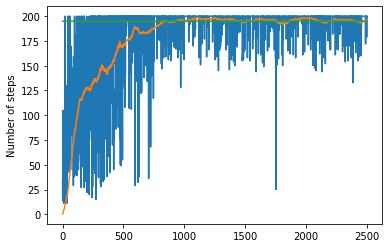

In [97]:
import copy
history_1 =  copy.deepcopy(history)
decay_ = []
decay_1 = []
decay_2 = []


def getState(obs):
    state = ''
    for o in obs:
        state += str(math.floor(o)) +'_'
    return state

env = gym.make('CartPole-v0')
nbEpisodes = 2500
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()
history_2 = copy.deepcopy(history)

**Antic comportament**

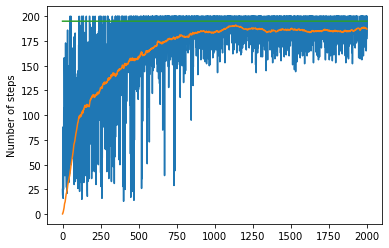

In [101]:
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()

**Nou metode 2**

El nou metode no es altament precis pero si que te molt bona performance, el que es fa es tenint en compte que els nombres oscilen la majoria de cops entre 0 i 9 s'hagafa el string del nombre decimal i els dos primers decimals (en cas de tindre un valor de dos digits s'agafarà el primer decimal, pero com no son molt frequüents no hi a problema)





  0%|          | 0/2500 [00:00<?, ?it/s]



  0%|          | 0/2500 [00:00<?, ?it/s, last_100_avg_pole_upright=14, len(history)=10]



  0%|          | 1/2500 [00:00<10:14,  4.06it/s, last_100_avg_pole_upright=14, len(history)=10]



  0%|          | 1/2500 [00:00<10:14,  4.06it/s, last_100_avg_pole_upright=26.5, len(history)=33]



  0%|          | 1/2500 [00:00<10:14,  4.06it/s, last_100_avg_pole_upright=25, len(history)=50]  



  0%|          | 1/2500 [00:00<10:14,  4.06it/s, last_100_avg_pole_upright=31.5, len(history)=87]



  0%|          | 1/2500 [00:00<10:14,  4.06it/s, last_100_avg_pole_upright=35.4, len(history)=111]



  0%|          | 1/2500 [00:00<10:14,  4.06it/s, last_100_avg_pole_upright=33, len(history)=112]  



  0%|          | 1/2500 [00:00<10:14,  4.06it/s, last_100_avg_pole_upright=32, len(history)=121]



  0%|          | 1/2500 [00:00<10:14,  4.06it/s, last_100_avg_pole_upright=31.4, len(history)=123]



  0%|          | 1/2500 [00:00<10:14,  4.06it/s, last

{'Episode 0. Iteration with pole upright: 14.0. History length: 10'}






  2%|▏         | 38/2500 [00:00<07:06,  5.78it/s, last_100_avg_pole_upright=49.6, len(history)=467]



  2%|▏         | 38/2500 [00:00<07:06,  5.78it/s, last_100_avg_pole_upright=49.1, len(history)=471]



  2%|▏         | 38/2500 [00:00<07:06,  5.78it/s, last_100_avg_pole_upright=48.7, len(history)=471]



  3%|▎         | 71/2500 [00:00<04:56,  8.19it/s, last_100_avg_pole_upright=48.7, len(history)=471]



  3%|▎         | 71/2500 [00:00<04:56,  8.19it/s, last_100_avg_pole_upright=49, len(history)=474]  



  3%|▎         | 71/2500 [00:00<04:56,  8.19it/s, last_100_avg_pole_upright=49.5, len(history)=474]



  3%|▎         | 71/2500 [00:00<04:56,  8.19it/s, last_100_avg_pole_upright=49.2, len(history)=476]



  3%|▎         | 71/2500 [00:00<04:56,  8.19it/s, last_100_avg_pole_upright=50.5, len(history)=480]



  3%|▎         | 71/2500 [00:00<04:56,  8.19it/s, last_100_avg_pole_upright=50.7, len(history)=482]



  3%|▎         | 71/2500 [00:00<04:56,  8.19it/s, last_100_avg_pole_u

  5%|▌         | 131/2500 [00:00<02:25, 16.25it/s, last_100_avg_pole_upright=71.2, len(history)=698]



  5%|▌         | 131/2500 [00:00<02:25, 16.25it/s, last_100_avg_pole_upright=72, len(history)=700]  



  5%|▌         | 131/2500 [00:00<02:25, 16.25it/s, last_100_avg_pole_upright=72.3, len(history)=700]



  5%|▌         | 131/2500 [00:00<02:25, 16.25it/s, last_100_avg_pole_upright=73.8, len(history)=700]



  5%|▌         | 131/2500 [00:00<02:25, 16.25it/s, last_100_avg_pole_upright=74.3, len(history)=705]



  5%|▌         | 131/2500 [00:00<02:25, 16.25it/s, last_100_avg_pole_upright=74.5, len(history)=705]



  5%|▌         | 131/2500 [00:00<02:25, 16.25it/s, last_100_avg_pole_upright=74.8, len(history)=708]



  5%|▌         | 131/2500 [00:00<02:25, 16.25it/s, last_100_avg_pole_upright=74.6, len(history)=710]



  5%|▌         | 131/2500 [00:00<02:25, 16.25it/s, last_100_avg_pole_upright=74.3, len(history)=715]



  5%|▌         | 131/2500 [00:00<02:25, 16.25it/s, last_100_avg_

  8%|▊         | 203/2500 [00:00<00:55, 41.69it/s, last_100_avg_pole_upright=96, len(history)=892]  



  8%|▊         | 203/2500 [00:00<00:55, 41.69it/s, last_100_avg_pole_upright=96.4, len(history)=893]



  8%|▊         | 203/2500 [00:00<00:55, 41.69it/s, last_100_avg_pole_upright=96.4, len(history)=895]



  8%|▊         | 203/2500 [00:00<00:55, 41.69it/s, last_100_avg_pole_upright=98, len(history)=896]  



  8%|▊         | 203/2500 [00:00<00:55, 41.69it/s, last_100_avg_pole_upright=99.2, len(history)=896]



  8%|▊         | 203/2500 [00:01<00:55, 41.69it/s, last_100_avg_pole_upright=100, len(history)=896] 



  8%|▊         | 203/2500 [00:01<00:55, 41.69it/s, last_100_avg_pole_upright=99.8, len(history)=896]



  8%|▊         | 203/2500 [00:01<00:55, 41.69it/s, last_100_avg_pole_upright=101, len(history)=897] 



  8%|▊         | 203/2500 [00:01<00:55, 41.69it/s, last_100_avg_pole_upright=101, len(history)=897]



  8%|▊         | 203/2500 [00:01<00:55, 41.69it/s, last_100_avg_p

 10%|█         | 250/2500 [00:01<00:31, 70.42it/s, last_100_avg_pole_upright=129, len(history)=1078]



 11%|█         | 273/2500 [00:01<00:25, 86.76it/s, last_100_avg_pole_upright=129, len(history)=1078]



 11%|█         | 273/2500 [00:01<00:25, 86.76it/s, last_100_avg_pole_upright=127, len(history)=1079]



 11%|█         | 273/2500 [00:01<00:25, 86.76it/s, last_100_avg_pole_upright=129, len(history)=1080]



 11%|█         | 273/2500 [00:01<00:25, 86.76it/s, last_100_avg_pole_upright=129, len(history)=1080]



 11%|█         | 273/2500 [00:01<00:25, 86.76it/s, last_100_avg_pole_upright=129, len(history)=1080]



 11%|█         | 273/2500 [00:01<00:25, 86.76it/s, last_100_avg_pole_upright=129, len(history)=1081]



 11%|█         | 273/2500 [00:01<00:25, 86.76it/s, last_100_avg_pole_upright=130, len(history)=1082]



 11%|█         | 273/2500 [00:01<00:25, 86.76it/s, last_100_avg_pole_upright=130, len(history)=1083]



 11%|█         | 273/2500 [00:01<00:25, 86.76it/s, last_100_avg_

 13%|█▎        | 336/2500 [00:01<00:16, 132.42it/s, last_100_avg_pole_upright=142, len(history)=1146]



 13%|█▎        | 336/2500 [00:01<00:16, 132.42it/s, last_100_avg_pole_upright=142, len(history)=1147]



 13%|█▎        | 336/2500 [00:01<00:16, 132.42it/s, last_100_avg_pole_upright=143, len(history)=1147]



 13%|█▎        | 336/2500 [00:01<00:16, 132.42it/s, last_100_avg_pole_upright=144, len(history)=1148]



 13%|█▎        | 336/2500 [00:01<00:16, 132.42it/s, last_100_avg_pole_upright=143, len(history)=1155]



 13%|█▎        | 336/2500 [00:01<00:16, 132.42it/s, last_100_avg_pole_upright=143, len(history)=1160]



 13%|█▎        | 336/2500 [00:01<00:16, 132.42it/s, last_100_avg_pole_upright=144, len(history)=1161]



 13%|█▎        | 336/2500 [00:01<00:16, 132.42it/s, last_100_avg_pole_upright=143, len(history)=1166]



 13%|█▎        | 336/2500 [00:01<00:16, 132.42it/s, last_100_avg_pole_upright=145, len(history)=1166]



 13%|█▎        | 336/2500 [00:01<00:16, 132.42it/s, las

 16%|█▌        | 394/2500 [00:04<00:13, 156.52it/s, last_100_avg_pole_upright=153, len(history)=1250]



 16%|█▌        | 394/2500 [00:04<00:13, 156.52it/s, last_100_avg_pole_upright=153, len(history)=1250]



 16%|█▌        | 394/2500 [00:04<00:13, 156.52it/s, last_100_avg_pole_upright=153, len(history)=1250]



 16%|█▌        | 394/2500 [00:04<00:13, 156.52it/s, last_100_avg_pole_upright=154, len(history)=1250]



 16%|█▌        | 394/2500 [00:04<00:13, 156.52it/s, last_100_avg_pole_upright=153, len(history)=1251]



 16%|█▌        | 394/2500 [00:04<00:13, 156.52it/s, last_100_avg_pole_upright=153, len(history)=1251]



 16%|█▌        | 394/2500 [00:04<00:13, 156.52it/s, last_100_avg_pole_upright=152, len(history)=1253]



 16%|█▋        | 412/2500 [00:04<01:21, 25.71it/s, last_100_avg_pole_upright=152, len(history)=1253] 



 16%|█▋        | 412/2500 [00:04<01:21, 25.71it/s, last_100_avg_pole_upright=153, len(history)=1254]



 16%|█▋        | 412/2500 [00:04<01:21, 25.71it/s, last_

{'Episode 400. Iteration with pole upright: 149.0. History length: 1240'}






 17%|█▋        | 430/2500 [00:04<00:59, 34.58it/s, last_100_avg_pole_upright=160, len(history)=1270]



 17%|█▋        | 430/2500 [00:04<00:59, 34.58it/s, last_100_avg_pole_upright=160, len(history)=1270]



 17%|█▋        | 430/2500 [00:04<00:59, 34.58it/s, last_100_avg_pole_upright=160, len(history)=1273]



 17%|█▋        | 430/2500 [00:04<00:59, 34.58it/s, last_100_avg_pole_upright=162, len(history)=1273]



 17%|█▋        | 430/2500 [00:04<00:59, 34.58it/s, last_100_avg_pole_upright=162, len(history)=1274]



 17%|█▋        | 430/2500 [00:04<00:59, 34.58it/s, last_100_avg_pole_upright=161, len(history)=1274]



 17%|█▋        | 430/2500 [00:04<00:59, 34.58it/s, last_100_avg_pole_upright=161, len(history)=1276]



 17%|█▋        | 430/2500 [00:04<00:59, 34.58it/s, last_100_avg_pole_upright=161, len(history)=1277]



 17%|█▋        | 430/2500 [00:04<00:59, 34.58it/s, last_100_avg_pole_upright=161, len(history)=1277]



 17%|█▋        | 430/2500 [00:04<00:59, 34.58it/s, last_100_

 20%|██        | 500/2500 [00:04<00:22, 87.09it/s, last_100_avg_pole_upright=173, len(history)=1326]



 20%|██        | 500/2500 [00:04<00:22, 87.09it/s, last_100_avg_pole_upright=174, len(history)=1328]



 20%|██        | 500/2500 [00:04<00:22, 87.09it/s, last_100_avg_pole_upright=173, len(history)=1329]



 20%|██        | 500/2500 [00:04<00:22, 87.09it/s, last_100_avg_pole_upright=173, len(history)=1331]



 20%|██        | 500/2500 [00:04<00:22, 87.09it/s, last_100_avg_pole_upright=173, len(history)=1332]



 20%|██        | 500/2500 [00:04<00:22, 87.09it/s, last_100_avg_pole_upright=173, len(history)=1332]



 20%|██        | 500/2500 [00:04<00:22, 87.09it/s, last_100_avg_pole_upright=173, len(history)=1333]



 20%|██        | 500/2500 [00:04<00:22, 87.09it/s, last_100_avg_pole_upright=173, len(history)=1334]



 20%|██        | 500/2500 [00:04<00:22, 87.09it/s, last_100_avg_pole_upright=175, len(history)=1335]



 20%|██        | 500/2500 [00:04<00:22, 87.09it/s, last_100_avg_

 23%|██▎       | 567/2500 [00:05<00:14, 130.71it/s, last_100_avg_pole_upright=185, len(history)=1388]



 23%|██▎       | 567/2500 [00:05<00:14, 130.71it/s, last_100_avg_pole_upright=185, len(history)=1389]



 23%|██▎       | 567/2500 [00:05<00:14, 130.71it/s, last_100_avg_pole_upright=185, len(history)=1391]



 23%|██▎       | 567/2500 [00:05<00:14, 130.71it/s, last_100_avg_pole_upright=185, len(history)=1391]



 23%|██▎       | 567/2500 [00:05<00:14, 130.71it/s, last_100_avg_pole_upright=184, len(history)=1391]



 23%|██▎       | 567/2500 [00:05<00:14, 130.71it/s, last_100_avg_pole_upright=184, len(history)=1392]



 23%|██▎       | 567/2500 [00:05<00:14, 130.71it/s, last_100_avg_pole_upright=184, len(history)=1393]



 23%|██▎       | 567/2500 [00:05<00:14, 130.71it/s, last_100_avg_pole_upright=185, len(history)=1396]



 23%|██▎       | 567/2500 [00:05<00:14, 130.71it/s, last_100_avg_pole_upright=185, len(history)=1396]



 23%|██▎       | 567/2500 [00:05<00:14, 130.71it/s, las

 25%|██▍       | 618/2500 [00:05<00:13, 143.56it/s, last_100_avg_pole_upright=184, len(history)=1449]



 25%|██▌       | 636/2500 [00:05<00:12, 152.23it/s, last_100_avg_pole_upright=184, len(history)=1449]



 25%|██▌       | 636/2500 [00:05<00:12, 152.23it/s, last_100_avg_pole_upright=184, len(history)=1450]



 25%|██▌       | 636/2500 [00:05<00:12, 152.23it/s, last_100_avg_pole_upright=184, len(history)=1451]



 25%|██▌       | 636/2500 [00:05<00:12, 152.23it/s, last_100_avg_pole_upright=184, len(history)=1451]



 25%|██▌       | 636/2500 [00:05<00:12, 152.23it/s, last_100_avg_pole_upright=184, len(history)=1452]



 25%|██▌       | 636/2500 [00:05<00:12, 152.23it/s, last_100_avg_pole_upright=183, len(history)=1453]



 25%|██▌       | 636/2500 [00:05<00:12, 152.23it/s, last_100_avg_pole_upright=183, len(history)=1454]



 25%|██▌       | 636/2500 [00:05<00:12, 152.23it/s, last_100_avg_pole_upright=183, len(history)=1454]



 25%|██▌       | 636/2500 [00:05<00:12, 152.23it/s, las

 28%|██▊       | 689/2500 [00:05<00:11, 159.51it/s, last_100_avg_pole_upright=191, len(history)=1500]



 28%|██▊       | 689/2500 [00:05<00:11, 159.51it/s, last_100_avg_pole_upright=192, len(history)=1501]



 28%|██▊       | 689/2500 [00:05<00:11, 159.51it/s, last_100_avg_pole_upright=193, len(history)=1505]



 28%|██▊       | 689/2500 [00:05<00:11, 159.51it/s, last_100_avg_pole_upright=193, len(history)=1506]



 28%|██▊       | 689/2500 [00:05<00:11, 159.51it/s, last_100_avg_pole_upright=193, len(history)=1506]



 28%|██▊       | 706/2500 [00:05<00:11, 152.95it/s, last_100_avg_pole_upright=193, len(history)=1506]



 28%|██▊       | 706/2500 [00:05<00:11, 152.95it/s, last_100_avg_pole_upright=193, len(history)=1507]



 28%|██▊       | 706/2500 [00:05<00:11, 152.95it/s, last_100_avg_pole_upright=193, len(history)=1509]



 28%|██▊       | 706/2500 [00:05<00:11, 152.95it/s, last_100_avg_pole_upright=193, len(history)=1510]



 28%|██▊       | 706/2500 [00:05<00:11, 152.95it/s, las

 30%|███       | 757/2500 [00:06<00:10, 161.35it/s, last_100_avg_pole_upright=196, len(history)=1551]



 30%|███       | 757/2500 [00:06<00:10, 161.35it/s, last_100_avg_pole_upright=196, len(history)=1552]



 30%|███       | 757/2500 [00:06<00:10, 161.35it/s, last_100_avg_pole_upright=196, len(history)=1554]



 30%|███       | 757/2500 [00:06<00:10, 161.35it/s, last_100_avg_pole_upright=196, len(history)=1554]



 30%|███       | 757/2500 [00:06<00:10, 161.35it/s, last_100_avg_pole_upright=196, len(history)=1554]



 30%|███       | 757/2500 [00:06<00:10, 161.35it/s, last_100_avg_pole_upright=196, len(history)=1554]



 30%|███       | 757/2500 [00:06<00:10, 161.35it/s, last_100_avg_pole_upright=195, len(history)=1554]



 30%|███       | 757/2500 [00:06<00:10, 161.35it/s, last_100_avg_pole_upright=195, len(history)=1556]



 31%|███       | 775/2500 [00:06<00:10, 164.54it/s, last_100_avg_pole_upright=195, len(history)=1556]



 31%|███       | 775/2500 [00:06<00:10, 164.54it/s, las

 33%|███▎      | 827/2500 [00:09<01:04, 25.76it/s, last_100_avg_pole_upright=197, len(history)=1598]





{'Episode 800. Iteration with pole upright: 200.0. History length: 1570'}


 33%|███▎      | 827/2500 [00:09<01:04, 25.76it/s, last_100_avg_pole_upright=197, len(history)=1599]



 33%|███▎      | 827/2500 [00:09<01:04, 25.76it/s, last_100_avg_pole_upright=197, len(history)=1601]



 33%|███▎      | 827/2500 [00:09<01:04, 25.76it/s, last_100_avg_pole_upright=197, len(history)=1601]



 33%|███▎      | 827/2500 [00:09<01:04, 25.76it/s, last_100_avg_pole_upright=197, len(history)=1601]



 33%|███▎      | 827/2500 [00:09<01:04, 25.76it/s, last_100_avg_pole_upright=197, len(history)=1602]



 33%|███▎      | 827/2500 [00:09<01:04, 25.76it/s, last_100_avg_pole_upright=197, len(history)=1603]



 33%|███▎      | 827/2500 [00:09<01:04, 25.76it/s, last_100_avg_pole_upright=197, len(history)=1604]



 33%|███▎      | 827/2500 [00:09<01:04, 25.76it/s, last_100_avg_pole_upright=197, len(history)=1604]



 33%|███▎      | 827/2500 [00:09<01:04, 25.76it/s, last_100_avg_pole_upright=195, len(history)=1608]



 33%|███▎      | 827/2500 [00:09<01:04, 25.76it/s, last_100_avg_

 36%|███▌      | 892/2500 [00:09<00:23, 69.22it/s, last_100_avg_pole_upright=198, len(history)=1640]



 36%|███▌      | 892/2500 [00:09<00:23, 69.22it/s, last_100_avg_pole_upright=198, len(history)=1643]



 36%|███▌      | 892/2500 [00:09<00:23, 69.22it/s, last_100_avg_pole_upright=198, len(history)=1644]



 36%|███▌      | 892/2500 [00:09<00:23, 69.22it/s, last_100_avg_pole_upright=197, len(history)=1654]



 36%|███▌      | 892/2500 [00:09<00:23, 69.22it/s, last_100_avg_pole_upright=197, len(history)=1654]



 36%|███▌      | 892/2500 [00:09<00:23, 69.22it/s, last_100_avg_pole_upright=197, len(history)=1654]



 36%|███▌      | 892/2500 [00:09<00:23, 69.22it/s, last_100_avg_pole_upright=197, len(history)=1655]



 36%|███▋      | 907/2500 [00:09<00:19, 82.44it/s, last_100_avg_pole_upright=197, len(history)=1655]



 36%|███▋      | 907/2500 [00:09<00:19, 82.44it/s, last_100_avg_pole_upright=197, len(history)=1656]



 36%|███▋      | 907/2500 [00:09<00:19, 82.44it/s, last_100_avg_

 38%|███▊      | 959/2500 [00:10<00:12, 124.43it/s, last_100_avg_pole_upright=198, len(history)=1693]



 38%|███▊      | 959/2500 [00:10<00:12, 124.43it/s, last_100_avg_pole_upright=198, len(history)=1695]



 38%|███▊      | 959/2500 [00:10<00:12, 124.43it/s, last_100_avg_pole_upright=198, len(history)=1696]



 38%|███▊      | 959/2500 [00:10<00:12, 124.43it/s, last_100_avg_pole_upright=198, len(history)=1696]



 38%|███▊      | 959/2500 [00:10<00:12, 124.43it/s, last_100_avg_pole_upright=198, len(history)=1698]



 38%|███▊      | 959/2500 [00:10<00:12, 124.43it/s, last_100_avg_pole_upright=198, len(history)=1698]



 38%|███▊      | 959/2500 [00:10<00:12, 124.43it/s, last_100_avg_pole_upright=198, len(history)=1699]



 38%|███▊      | 959/2500 [00:10<00:12, 124.43it/s, last_100_avg_pole_upright=198, len(history)=1700]



 38%|███▊      | 959/2500 [00:10<00:12, 124.43it/s, last_100_avg_pole_upright=198, len(history)=1701]



 38%|███▊      | 959/2500 [00:10<00:12, 124.43it/s, las

 41%|████      | 1026/2500 [00:10<00:09, 147.51it/s, last_100_avg_pole_upright=199, len(history)=1747]



 41%|████      | 1026/2500 [00:10<00:09, 147.51it/s, last_100_avg_pole_upright=199, len(history)=1748]



 41%|████      | 1026/2500 [00:10<00:09, 147.51it/s, last_100_avg_pole_upright=199, len(history)=1750]



 41%|████      | 1026/2500 [00:10<00:09, 147.51it/s, last_100_avg_pole_upright=199, len(history)=1752]



 41%|████      | 1026/2500 [00:10<00:09, 147.51it/s, last_100_avg_pole_upright=199, len(history)=1753]



 41%|████      | 1026/2500 [00:10<00:09, 147.51it/s, last_100_avg_pole_upright=199, len(history)=1753]



 41%|████      | 1026/2500 [00:10<00:09, 147.51it/s, last_100_avg_pole_upright=199, len(history)=1753]



 41%|████      | 1026/2500 [00:10<00:09, 147.51it/s, last_100_avg_pole_upright=199, len(history)=1753]



 41%|████      | 1026/2500 [00:10<00:09, 147.51it/s, last_100_avg_pole_upright=199, len(history)=1755]



 41%|████      | 1026/2500 [00:10<00:09, 147.5

 44%|████▎     | 1092/2500 [00:10<00:09, 154.23it/s, last_100_avg_pole_upright=198, len(history)=1780]



 44%|████▎     | 1092/2500 [00:10<00:09, 154.23it/s, last_100_avg_pole_upright=198, len(history)=1780]



 44%|████▎     | 1092/2500 [00:10<00:09, 154.23it/s, last_100_avg_pole_upright=198, len(history)=1781]



 44%|████▎     | 1092/2500 [00:11<00:09, 154.23it/s, last_100_avg_pole_upright=198, len(history)=1782]



 44%|████▎     | 1092/2500 [00:11<00:09, 154.23it/s, last_100_avg_pole_upright=198, len(history)=1783]



 44%|████▎     | 1092/2500 [00:11<00:09, 154.23it/s, last_100_avg_pole_upright=198, len(history)=1783]



 44%|████▎     | 1092/2500 [00:11<00:09, 154.23it/s, last_100_avg_pole_upright=199, len(history)=1783]



 44%|████▎     | 1092/2500 [00:11<00:09, 154.23it/s, last_100_avg_pole_upright=199, len(history)=1783]



 44%|████▎     | 1092/2500 [00:11<00:09, 154.23it/s, last_100_avg_pole_upright=199, len(history)=1784]



 44%|████▎     | 1092/2500 [00:11<00:09, 154.2

 46%|████▋     | 1159/2500 [00:11<00:08, 157.09it/s, last_100_avg_pole_upright=199, len(history)=1809]



 46%|████▋     | 1159/2500 [00:11<00:08, 157.09it/s, last_100_avg_pole_upright=199, len(history)=1810]



 46%|████▋     | 1159/2500 [00:11<00:08, 157.09it/s, last_100_avg_pole_upright=199, len(history)=1810]



 46%|████▋     | 1159/2500 [00:11<00:08, 157.09it/s, last_100_avg_pole_upright=199, len(history)=1810]



 46%|████▋     | 1159/2500 [00:11<00:08, 157.09it/s, last_100_avg_pole_upright=199, len(history)=1811]



 46%|████▋     | 1159/2500 [00:11<00:08, 157.09it/s, last_100_avg_pole_upright=199, len(history)=1811]



 46%|████▋     | 1159/2500 [00:11<00:08, 157.09it/s, last_100_avg_pole_upright=199, len(history)=1811]



 46%|████▋     | 1159/2500 [00:11<00:08, 157.09it/s, last_100_avg_pole_upright=199, len(history)=1811]



 46%|████▋     | 1159/2500 [00:11<00:08, 157.09it/s, last_100_avg_pole_upright=199, len(history)=1813]



 46%|████▋     | 1159/2500 [00:11<00:08, 157.0

 49%|████▉     | 1223/2500 [00:14<00:52, 24.27it/s, last_100_avg_pole_upright=199, len(history)=1843]



 49%|████▉     | 1223/2500 [00:14<00:52, 24.27it/s, last_100_avg_pole_upright=199, len(history)=1844]



 49%|████▉     | 1223/2500 [00:14<00:52, 24.27it/s, last_100_avg_pole_upright=199, len(history)=1844]



 49%|████▉     | 1223/2500 [00:14<00:52, 24.27it/s, last_100_avg_pole_upright=199, len(history)=1845]





{'Episode 1200. Iteration with pole upright: 200.0. History length: 1828'}


 49%|████▉     | 1223/2500 [00:14<00:52, 24.27it/s, last_100_avg_pole_upright=199, len(history)=1845]



 49%|████▉     | 1223/2500 [00:14<00:52, 24.27it/s, last_100_avg_pole_upright=199, len(history)=1846]



 49%|████▉     | 1223/2500 [00:14<00:52, 24.27it/s, last_100_avg_pole_upright=199, len(history)=1846]



 49%|████▉     | 1223/2500 [00:14<00:52, 24.27it/s, last_100_avg_pole_upright=199, len(history)=1846]



 49%|████▉     | 1223/2500 [00:14<00:52, 24.27it/s, last_100_avg_pole_upright=199, len(history)=1846]



 49%|████▉     | 1223/2500 [00:14<00:52, 24.27it/s, last_100_avg_pole_upright=199, len(history)=1846]



 49%|████▉     | 1223/2500 [00:14<00:52, 24.27it/s, last_100_avg_pole_upright=199, len(history)=1846]



 49%|████▉     | 1223/2500 [00:14<00:52, 24.27it/s, last_100_avg_pole_upright=199, len(history)=1846]



 50%|████▉     | 1238/2500 [00:14<00:38, 32.41it/s, last_100_avg_pole_upright=199, len(history)=1846]



 50%|████▉     | 1238/2500 [00:14<00:38, 32.41it/s, las

 51%|█████▏    | 1282/2500 [00:14<00:18, 65.17it/s, last_100_avg_pole_upright=198, len(history)=1883]



 51%|█████▏    | 1282/2500 [00:14<00:18, 65.17it/s, last_100_avg_pole_upright=198, len(history)=1884]



 52%|█████▏    | 1298/2500 [00:14<00:15, 78.78it/s, last_100_avg_pole_upright=198, len(history)=1884]



 52%|█████▏    | 1298/2500 [00:14<00:15, 78.78it/s, last_100_avg_pole_upright=198, len(history)=1885]



 52%|█████▏    | 1298/2500 [00:14<00:15, 78.78it/s, last_100_avg_pole_upright=198, len(history)=1886]



 52%|█████▏    | 1298/2500 [00:14<00:15, 78.78it/s, last_100_avg_pole_upright=198, len(history)=1887]



 52%|█████▏    | 1298/2500 [00:14<00:15, 78.78it/s, last_100_avg_pole_upright=198, len(history)=1888]



 52%|█████▏    | 1298/2500 [00:14<00:15, 78.78it/s, last_100_avg_pole_upright=198, len(history)=1889]



 52%|█████▏    | 1298/2500 [00:14<00:15, 78.78it/s, last_100_avg_pole_upright=198, len(history)=1889]



 52%|█████▏    | 1298/2500 [00:15<00:15, 78.78it/s, las

 54%|█████▍    | 1360/2500 [00:15<00:09, 120.86it/s, last_100_avg_pole_upright=199, len(history)=1923]



 54%|█████▍    | 1360/2500 [00:15<00:09, 120.86it/s, last_100_avg_pole_upright=199, len(history)=1924]



 54%|█████▍    | 1360/2500 [00:15<00:09, 120.86it/s, last_100_avg_pole_upright=199, len(history)=1926]



 54%|█████▍    | 1360/2500 [00:15<00:09, 120.86it/s, last_100_avg_pole_upright=199, len(history)=1927]



 54%|█████▍    | 1360/2500 [00:15<00:09, 120.86it/s, last_100_avg_pole_upright=199, len(history)=1927]



 54%|█████▍    | 1360/2500 [00:15<00:09, 120.86it/s, last_100_avg_pole_upright=199, len(history)=1928]



 54%|█████▍    | 1360/2500 [00:15<00:09, 120.86it/s, last_100_avg_pole_upright=199, len(history)=1928]



 54%|█████▍    | 1360/2500 [00:15<00:09, 120.86it/s, last_100_avg_pole_upright=199, len(history)=1930]



 54%|█████▍    | 1360/2500 [00:15<00:09, 120.86it/s, last_100_avg_pole_upright=199, len(history)=1930]



 54%|█████▍    | 1360/2500 [00:15<00:09, 120.8

 57%|█████▋    | 1425/2500 [00:15<00:07, 144.13it/s, last_100_avg_pole_upright=199, len(history)=1965]



 57%|█████▋    | 1425/2500 [00:15<00:07, 144.13it/s, last_100_avg_pole_upright=199, len(history)=1965]



 57%|█████▋    | 1425/2500 [00:15<00:07, 144.13it/s, last_100_avg_pole_upright=199, len(history)=1967]



 57%|█████▋    | 1425/2500 [00:15<00:07, 144.13it/s, last_100_avg_pole_upright=199, len(history)=1967]



 57%|█████▋    | 1425/2500 [00:15<00:07, 144.13it/s, last_100_avg_pole_upright=199, len(history)=1969]



 57%|█████▋    | 1425/2500 [00:15<00:07, 144.13it/s, last_100_avg_pole_upright=199, len(history)=1970]



 57%|█████▋    | 1425/2500 [00:15<00:07, 144.13it/s, last_100_avg_pole_upright=199, len(history)=1971]



 57%|█████▋    | 1425/2500 [00:15<00:07, 144.13it/s, last_100_avg_pole_upright=199, len(history)=1973]



 57%|█████▋    | 1425/2500 [00:15<00:07, 144.13it/s, last_100_avg_pole_upright=199, len(history)=1973]



 57%|█████▋    | 1425/2500 [00:15<00:07, 144.1

 59%|█████▉    | 1487/2500 [00:16<00:07, 144.22it/s, last_100_avg_pole_upright=199, len(history)=2002]



 59%|█████▉    | 1487/2500 [00:16<00:07, 144.22it/s, last_100_avg_pole_upright=199, len(history)=2002]



 59%|█████▉    | 1487/2500 [00:16<00:07, 144.22it/s, last_100_avg_pole_upright=199, len(history)=2002]



 59%|█████▉    | 1487/2500 [00:16<00:07, 144.22it/s, last_100_avg_pole_upright=199, len(history)=2002]



 59%|█████▉    | 1487/2500 [00:16<00:07, 144.22it/s, last_100_avg_pole_upright=199, len(history)=2002]



 59%|█████▉    | 1487/2500 [00:16<00:07, 144.22it/s, last_100_avg_pole_upright=199, len(history)=2003]



 59%|█████▉    | 1487/2500 [00:16<00:07, 144.22it/s, last_100_avg_pole_upright=199, len(history)=2004]



 59%|█████▉    | 1487/2500 [00:16<00:07, 144.22it/s, last_100_avg_pole_upright=199, len(history)=2004]



 59%|█████▉    | 1487/2500 [00:16<00:07, 144.22it/s, last_100_avg_pole_upright=199, len(history)=2004]



 59%|█████▉    | 1487/2500 [00:16<00:07, 144.2

 62%|██████▏   | 1552/2500 [00:16<00:06, 149.61it/s, last_100_avg_pole_upright=199, len(history)=2025]



 62%|██████▏   | 1552/2500 [00:16<00:06, 149.61it/s, last_100_avg_pole_upright=199, len(history)=2026]



 62%|██████▏   | 1552/2500 [00:16<00:06, 149.61it/s, last_100_avg_pole_upright=199, len(history)=2026]



 62%|██████▏   | 1552/2500 [00:16<00:06, 149.61it/s, last_100_avg_pole_upright=199, len(history)=2027]



 62%|██████▏   | 1552/2500 [00:16<00:06, 149.61it/s, last_100_avg_pole_upright=199, len(history)=2027]



 62%|██████▏   | 1552/2500 [00:16<00:06, 149.61it/s, last_100_avg_pole_upright=199, len(history)=2028]



 62%|██████▏   | 1552/2500 [00:16<00:06, 149.61it/s, last_100_avg_pole_upright=199, len(history)=2028]



 62%|██████▏   | 1552/2500 [00:16<00:06, 149.61it/s, last_100_avg_pole_upright=199, len(history)=2028]



 62%|██████▏   | 1552/2500 [00:16<00:06, 149.61it/s, last_100_avg_pole_upright=199, len(history)=2029]



 62%|██████▏   | 1552/2500 [00:16<00:06, 149.6

 65%|██████▍   | 1617/2500 [00:19<00:36, 24.27it/s, last_100_avg_pole_upright=199, len(history)=2048]



 65%|██████▍   | 1617/2500 [00:19<00:36, 24.27it/s, last_100_avg_pole_upright=199, len(history)=2048]



 65%|██████▍   | 1617/2500 [00:19<00:36, 24.27it/s, last_100_avg_pole_upright=199, len(history)=2048]



 65%|██████▍   | 1617/2500 [00:19<00:36, 24.27it/s, last_100_avg_pole_upright=199, len(history)=2050]



 65%|██████▍   | 1617/2500 [00:19<00:36, 24.27it/s, last_100_avg_pole_upright=199, len(history)=2052]



 65%|██████▍   | 1617/2500 [00:19<00:36, 24.27it/s, last_100_avg_pole_upright=199, len(history)=2052]



 65%|██████▍   | 1617/2500 [00:19<00:36, 24.27it/s, last_100_avg_pole_upright=199, len(history)=2053]



 65%|██████▍   | 1617/2500 [00:19<00:36, 24.27it/s, last_100_avg_pole_upright=199, len(history)=2053]



 65%|██████▍   | 1617/2500 [00:19<00:36, 24.27it/s, last_100_avg_pole_upright=199, len(history)=2054]



 65%|██████▍   | 1617/2500 [00:19<00:36, 24.27it/s, las

{'Episode 1600. Iteration with pole upright: 200.0. History length: 2041'}


 65%|██████▍   | 1617/2500 [00:19<00:36, 24.27it/s, last_100_avg_pole_upright=199, len(history)=2054]



 65%|██████▍   | 1617/2500 [00:19<00:36, 24.27it/s, last_100_avg_pole_upright=199, len(history)=2054]



 65%|██████▌   | 1634/2500 [00:19<00:26, 32.58it/s, last_100_avg_pole_upright=199, len(history)=2054]



 65%|██████▌   | 1634/2500 [00:19<00:26, 32.58it/s, last_100_avg_pole_upright=199, len(history)=2054]



 65%|██████▌   | 1634/2500 [00:19<00:26, 32.58it/s, last_100_avg_pole_upright=199, len(history)=2054]



 65%|██████▌   | 1634/2500 [00:19<00:26, 32.58it/s, last_100_avg_pole_upright=199, len(history)=2054]



 65%|██████▌   | 1634/2500 [00:19<00:26, 32.58it/s, last_100_avg_pole_upright=199, len(history)=2054]



 65%|██████▌   | 1634/2500 [00:19<00:26, 32.58it/s, last_100_avg_pole_upright=199, len(history)=2054]



 65%|██████▌   | 1634/2500 [00:19<00:26, 32.58it/s, last_100_avg_pole_upright=199, len(history)=2054]



 65%|██████▌   | 1634/2500 [00:19<00:26, 32.58it/s, las

 68%|██████▊   | 1696/2500 [00:20<00:09, 80.45it/s, last_100_avg_pole_upright=199, len(history)=2080]



 68%|██████▊   | 1696/2500 [00:20<00:09, 80.45it/s, last_100_avg_pole_upright=199, len(history)=2080]



 68%|██████▊   | 1696/2500 [00:20<00:09, 80.45it/s, last_100_avg_pole_upright=199, len(history)=2080]



 68%|██████▊   | 1696/2500 [00:20<00:09, 80.45it/s, last_100_avg_pole_upright=199, len(history)=2080]



 68%|██████▊   | 1696/2500 [00:20<00:09, 80.45it/s, last_100_avg_pole_upright=199, len(history)=2080]



 68%|██████▊   | 1696/2500 [00:20<00:09, 80.45it/s, last_100_avg_pole_upright=199, len(history)=2080]



 68%|██████▊   | 1696/2500 [00:20<00:09, 80.45it/s, last_100_avg_pole_upright=199, len(history)=2081]



 68%|██████▊   | 1696/2500 [00:20<00:09, 80.45it/s, last_100_avg_pole_upright=199, len(history)=2081]



 68%|██████▊   | 1696/2500 [00:20<00:09, 80.45it/s, last_100_avg_pole_upright=199, len(history)=2081]



 68%|██████▊   | 1696/2500 [00:20<00:09, 80.45it/s, las

 70%|███████   | 1756/2500 [00:20<00:06, 122.84it/s, last_100_avg_pole_upright=199, len(history)=2096]



 70%|███████   | 1756/2500 [00:20<00:06, 122.84it/s, last_100_avg_pole_upright=199, len(history)=2096]



 70%|███████   | 1756/2500 [00:20<00:06, 122.84it/s, last_100_avg_pole_upright=199, len(history)=2096]



 70%|███████   | 1756/2500 [00:20<00:06, 122.84it/s, last_100_avg_pole_upright=198, len(history)=2096]



 70%|███████   | 1756/2500 [00:20<00:06, 122.84it/s, last_100_avg_pole_upright=198, len(history)=2096]



 70%|███████   | 1756/2500 [00:20<00:06, 122.84it/s, last_100_avg_pole_upright=198, len(history)=2097]



 70%|███████   | 1756/2500 [00:20<00:06, 122.84it/s, last_100_avg_pole_upright=198, len(history)=2097]



 70%|███████   | 1756/2500 [00:20<00:06, 122.84it/s, last_100_avg_pole_upright=198, len(history)=2097]



 70%|███████   | 1756/2500 [00:20<00:06, 122.84it/s, last_100_avg_pole_upright=198, len(history)=2097]



 71%|███████   | 1771/2500 [00:20<00:05, 128.1

 73%|███████▎  | 1821/2500 [00:21<00:04, 146.63it/s, last_100_avg_pole_upright=198, len(history)=2123]



 73%|███████▎  | 1821/2500 [00:21<00:04, 146.63it/s, last_100_avg_pole_upright=198, len(history)=2123]



 73%|███████▎  | 1821/2500 [00:21<00:04, 146.63it/s, last_100_avg_pole_upright=198, len(history)=2123]



 73%|███████▎  | 1821/2500 [00:21<00:04, 146.63it/s, last_100_avg_pole_upright=198, len(history)=2124]



 73%|███████▎  | 1821/2500 [00:21<00:04, 146.63it/s, last_100_avg_pole_upright=198, len(history)=2125]



 73%|███████▎  | 1821/2500 [00:21<00:04, 146.63it/s, last_100_avg_pole_upright=198, len(history)=2125]



 73%|███████▎  | 1821/2500 [00:21<00:04, 146.63it/s, last_100_avg_pole_upright=198, len(history)=2125]



 73%|███████▎  | 1821/2500 [00:21<00:04, 146.63it/s, last_100_avg_pole_upright=198, len(history)=2126]



 73%|███████▎  | 1821/2500 [00:21<00:04, 146.63it/s, last_100_avg_pole_upright=198, len(history)=2128]



 73%|███████▎  | 1821/2500 [00:21<00:04, 146.6

 75%|███████▌  | 1885/2500 [00:21<00:04, 149.47it/s, last_100_avg_pole_upright=198, len(history)=2144]



 75%|███████▌  | 1885/2500 [00:21<00:04, 149.47it/s, last_100_avg_pole_upright=198, len(history)=2145]



 75%|███████▌  | 1885/2500 [00:21<00:04, 149.47it/s, last_100_avg_pole_upright=198, len(history)=2146]



 75%|███████▌  | 1885/2500 [00:21<00:04, 149.47it/s, last_100_avg_pole_upright=198, len(history)=2147]



 75%|███████▌  | 1885/2500 [00:21<00:04, 149.47it/s, last_100_avg_pole_upright=199, len(history)=2147]



 75%|███████▌  | 1885/2500 [00:21<00:04, 149.47it/s, last_100_avg_pole_upright=199, len(history)=2147]



 75%|███████▌  | 1885/2500 [00:21<00:04, 149.47it/s, last_100_avg_pole_upright=199, len(history)=2147]



 75%|███████▌  | 1885/2500 [00:21<00:04, 149.47it/s, last_100_avg_pole_upright=199, len(history)=2148]



 75%|███████▌  | 1885/2500 [00:21<00:04, 149.47it/s, last_100_avg_pole_upright=199, len(history)=2150]



 76%|███████▌  | 1901/2500 [00:21<00:03, 150.3

 78%|███████▊  | 1951/2500 [00:21<00:03, 158.32it/s, last_100_avg_pole_upright=199, len(history)=2180]



 78%|███████▊  | 1951/2500 [00:21<00:03, 158.32it/s, last_100_avg_pole_upright=199, len(history)=2182]



 78%|███████▊  | 1951/2500 [00:21<00:03, 158.32it/s, last_100_avg_pole_upright=199, len(history)=2182]



 78%|███████▊  | 1951/2500 [00:21<00:03, 158.32it/s, last_100_avg_pole_upright=199, len(history)=2182]



 78%|███████▊  | 1951/2500 [00:21<00:03, 158.32it/s, last_100_avg_pole_upright=199, len(history)=2182]



 78%|███████▊  | 1951/2500 [00:21<00:03, 158.32it/s, last_100_avg_pole_upright=199, len(history)=2182]



 78%|███████▊  | 1951/2500 [00:21<00:03, 158.32it/s, last_100_avg_pole_upright=198, len(history)=2183]



 78%|███████▊  | 1951/2500 [00:21<00:03, 158.32it/s, last_100_avg_pole_upright=198, len(history)=2185]



 78%|███████▊  | 1951/2500 [00:21<00:03, 158.32it/s, last_100_avg_pole_upright=198, len(history)=2188]



 78%|███████▊  | 1951/2500 [00:21<00:03, 158.3

 81%|████████  | 2016/2500 [00:24<00:27, 17.84it/s, last_100_avg_pole_upright=199, len(history)=2211]



 81%|████████  | 2016/2500 [00:25<00:27, 17.84it/s, last_100_avg_pole_upright=199, len(history)=2211]



 81%|████████  | 2016/2500 [00:25<00:27, 17.84it/s, last_100_avg_pole_upright=199, len(history)=2211]



 81%|████████  | 2016/2500 [00:25<00:27, 17.84it/s, last_100_avg_pole_upright=199, len(history)=2211]



 81%|████████  | 2016/2500 [00:25<00:27, 17.84it/s, last_100_avg_pole_upright=199, len(history)=2211]



 81%|████████  | 2016/2500 [00:25<00:27, 17.84it/s, last_100_avg_pole_upright=199, len(history)=2211]



 81%|████████  | 2016/2500 [00:25<00:27, 17.84it/s, last_100_avg_pole_upright=199, len(history)=2211]



 81%|████████  | 2016/2500 [00:25<00:27, 17.84it/s, last_100_avg_pole_upright=199, len(history)=2211]



 81%|████████  | 2016/2500 [00:25<00:27, 17.84it/s, last_100_avg_pole_upright=199, len(history)=2213]



 81%|████████  | 2016/2500 [00:25<00:27, 17.84it/s, las

{'Episode 2000. Iteration with pole upright: 200.0. History length: 2198'}






 81%|████████▏ | 2033/2500 [00:25<00:19, 24.35it/s, last_100_avg_pole_upright=199, len(history)=2216]



 81%|████████▏ | 2033/2500 [00:25<00:19, 24.35it/s, last_100_avg_pole_upright=199, len(history)=2217]



 81%|████████▏ | 2033/2500 [00:25<00:19, 24.35it/s, last_100_avg_pole_upright=199, len(history)=2217]



 81%|████████▏ | 2033/2500 [00:25<00:19, 24.35it/s, last_100_avg_pole_upright=199, len(history)=2217]



 81%|████████▏ | 2033/2500 [00:25<00:19, 24.35it/s, last_100_avg_pole_upright=199, len(history)=2217]



 81%|████████▏ | 2033/2500 [00:25<00:19, 24.35it/s, last_100_avg_pole_upright=199, len(history)=2217]



 81%|████████▏ | 2033/2500 [00:25<00:19, 24.35it/s, last_100_avg_pole_upright=199, len(history)=2217]



 81%|████████▏ | 2033/2500 [00:25<00:19, 24.35it/s, last_100_avg_pole_upright=199, len(history)=2217]



 81%|████████▏ | 2033/2500 [00:25<00:19, 24.35it/s, last_100_avg_pole_upright=199, len(history)=2217]



 81%|████████▏ | 2033/2500 [00:25<00:19, 24.35it/s,

 84%|████████▍ | 2098/2500 [00:25<00:05, 68.69it/s, last_100_avg_pole_upright=198, len(history)=2252]



 84%|████████▍ | 2098/2500 [00:25<00:05, 68.69it/s, last_100_avg_pole_upright=198, len(history)=2252]



 84%|████████▍ | 2098/2500 [00:25<00:05, 68.69it/s, last_100_avg_pole_upright=198, len(history)=2253]



 84%|████████▍ | 2098/2500 [00:25<00:05, 68.69it/s, last_100_avg_pole_upright=198, len(history)=2254]



 84%|████████▍ | 2098/2500 [00:25<00:05, 68.69it/s, last_100_avg_pole_upright=198, len(history)=2254]



 84%|████████▍ | 2098/2500 [00:25<00:05, 68.69it/s, last_100_avg_pole_upright=198, len(history)=2254]



 84%|████████▍ | 2098/2500 [00:25<00:05, 68.69it/s, last_100_avg_pole_upright=198, len(history)=2254]



 84%|████████▍ | 2098/2500 [00:25<00:05, 68.69it/s, last_100_avg_pole_upright=198, len(history)=2255]



 84%|████████▍ | 2098/2500 [00:25<00:05, 68.69it/s, last_100_avg_pole_upright=198, len(history)=2255]



 84%|████████▍ | 2098/2500 [00:25<00:05, 68.69it/s, las

 87%|████████▋ | 2163/2500 [00:25<00:02, 116.35it/s, last_100_avg_pole_upright=198, len(history)=2269]



 87%|████████▋ | 2163/2500 [00:25<00:02, 116.35it/s, last_100_avg_pole_upright=198, len(history)=2269]



 87%|████████▋ | 2163/2500 [00:25<00:02, 116.35it/s, last_100_avg_pole_upright=198, len(history)=2272]



 87%|████████▋ | 2163/2500 [00:25<00:02, 116.35it/s, last_100_avg_pole_upright=198, len(history)=2272]



 87%|████████▋ | 2163/2500 [00:25<00:02, 116.35it/s, last_100_avg_pole_upright=198, len(history)=2272]



 87%|████████▋ | 2163/2500 [00:25<00:02, 116.35it/s, last_100_avg_pole_upright=198, len(history)=2272]



 87%|████████▋ | 2163/2500 [00:25<00:02, 116.35it/s, last_100_avg_pole_upright=198, len(history)=2272]



 87%|████████▋ | 2163/2500 [00:25<00:02, 116.35it/s, last_100_avg_pole_upright=198, len(history)=2272]



 87%|████████▋ | 2163/2500 [00:25<00:02, 116.35it/s, last_100_avg_pole_upright=198, len(history)=2272]



 87%|████████▋ | 2163/2500 [00:25<00:02, 116.3

 89%|████████▉ | 2229/2500 [00:26<00:01, 141.83it/s, last_100_avg_pole_upright=199, len(history)=2283]



 89%|████████▉ | 2229/2500 [00:26<00:01, 141.83it/s, last_100_avg_pole_upright=199, len(history)=2283]



 89%|████████▉ | 2229/2500 [00:26<00:01, 141.83it/s, last_100_avg_pole_upright=199, len(history)=2284]



 89%|████████▉ | 2229/2500 [00:26<00:01, 141.83it/s, last_100_avg_pole_upright=199, len(history)=2284]



 89%|████████▉ | 2229/2500 [00:26<00:01, 141.83it/s, last_100_avg_pole_upright=199, len(history)=2285]



 89%|████████▉ | 2229/2500 [00:26<00:01, 141.83it/s, last_100_avg_pole_upright=199, len(history)=2285]



 89%|████████▉ | 2229/2500 [00:26<00:01, 141.83it/s, last_100_avg_pole_upright=199, len(history)=2285]



 89%|████████▉ | 2229/2500 [00:26<00:01, 141.83it/s, last_100_avg_pole_upright=199, len(history)=2285]



 89%|████████▉ | 2229/2500 [00:26<00:01, 141.83it/s, last_100_avg_pole_upright=199, len(history)=2286]



 89%|████████▉ | 2229/2500 [00:26<00:01, 141.8

 91%|█████████ | 2279/2500 [00:26<00:01, 154.32it/s, last_100_avg_pole_upright=199, len(history)=2298]



 91%|█████████ | 2279/2500 [00:26<00:01, 154.32it/s, last_100_avg_pole_upright=199, len(history)=2298]



 91%|█████████ | 2279/2500 [00:26<00:01, 154.32it/s, last_100_avg_pole_upright=199, len(history)=2298]



 92%|█████████▏| 2297/2500 [00:26<00:01, 159.58it/s, last_100_avg_pole_upright=199, len(history)=2298]



 92%|█████████▏| 2297/2500 [00:26<00:01, 159.58it/s, last_100_avg_pole_upright=199, len(history)=2298]



 92%|█████████▏| 2297/2500 [00:26<00:01, 159.58it/s, last_100_avg_pole_upright=199, len(history)=2298]



 92%|█████████▏| 2297/2500 [00:26<00:01, 159.58it/s, last_100_avg_pole_upright=199, len(history)=2298]



 92%|█████████▏| 2297/2500 [00:26<00:01, 159.58it/s, last_100_avg_pole_upright=199, len(history)=2300]



 92%|█████████▏| 2297/2500 [00:26<00:01, 159.58it/s, last_100_avg_pole_upright=199, len(history)=2300]



 92%|█████████▏| 2297/2500 [00:26<00:01, 159.5

 94%|█████████▍| 2350/2500 [00:27<00:00, 163.38it/s, last_100_avg_pole_upright=199, len(history)=2314]



 94%|█████████▍| 2350/2500 [00:27<00:00, 163.38it/s, last_100_avg_pole_upright=199, len(history)=2314]



 94%|█████████▍| 2350/2500 [00:27<00:00, 163.38it/s, last_100_avg_pole_upright=199, len(history)=2314]



 94%|█████████▍| 2350/2500 [00:27<00:00, 163.38it/s, last_100_avg_pole_upright=199, len(history)=2314]



 94%|█████████▍| 2350/2500 [00:27<00:00, 163.38it/s, last_100_avg_pole_upright=199, len(history)=2314]



 94%|█████████▍| 2350/2500 [00:27<00:00, 163.38it/s, last_100_avg_pole_upright=199, len(history)=2314]



 94%|█████████▍| 2350/2500 [00:27<00:00, 163.38it/s, last_100_avg_pole_upright=199, len(history)=2314]



 94%|█████████▍| 2350/2500 [00:27<00:00, 163.38it/s, last_100_avg_pole_upright=199, len(history)=2314]



 95%|█████████▍| 2367/2500 [00:27<00:00, 160.21it/s, last_100_avg_pole_upright=199, len(history)=2314]



 95%|█████████▍| 2367/2500 [00:27<00:00, 160.2

 97%|█████████▋| 2416/2500 [00:30<00:04, 17.83it/s, last_100_avg_pole_upright=200, len(history)=2333]



 97%|█████████▋| 2416/2500 [00:30<00:04, 17.83it/s, last_100_avg_pole_upright=200, len(history)=2333]



 97%|█████████▋| 2416/2500 [00:30<00:04, 17.83it/s, last_100_avg_pole_upright=200, len(history)=2333]



 97%|█████████▋| 2416/2500 [00:30<00:04, 17.83it/s, last_100_avg_pole_upright=200, len(history)=2333]



 97%|█████████▋| 2416/2500 [00:30<00:04, 17.83it/s, last_100_avg_pole_upright=200, len(history)=2333]

{'Episode 2400. Iteration with pole upright: 200.0. History length: 2323'}






 97%|█████████▋| 2416/2500 [00:30<00:04, 17.83it/s, last_100_avg_pole_upright=200, len(history)=2333]



 97%|█████████▋| 2416/2500 [00:30<00:04, 17.83it/s, last_100_avg_pole_upright=200, len(history)=2335]



 97%|█████████▋| 2431/2500 [00:30<00:02, 24.12it/s, last_100_avg_pole_upright=200, len(history)=2335]



 97%|█████████▋| 2431/2500 [00:30<00:02, 24.12it/s, last_100_avg_pole_upright=200, len(history)=2336]



 97%|█████████▋| 2431/2500 [00:30<00:02, 24.12it/s, last_100_avg_pole_upright=200, len(history)=2339]



 97%|█████████▋| 2431/2500 [00:30<00:02, 24.12it/s, last_100_avg_pole_upright=200, len(history)=2339]



 97%|█████████▋| 2431/2500 [00:30<00:02, 24.12it/s, last_100_avg_pole_upright=200, len(history)=2339]



 97%|█████████▋| 2431/2500 [00:30<00:02, 24.12it/s, last_100_avg_pole_upright=200, len(history)=2339]



 97%|█████████▋| 2431/2500 [00:30<00:02, 24.12it/s, last_100_avg_pole_upright=200, len(history)=2339]



 97%|█████████▋| 2431/2500 [00:30<00:02, 24.12it/s,

 99%|█████████▉| 2482/2500 [00:30<00:00, 54.70it/s, last_100_avg_pole_upright=200, len(history)=2359]



 99%|█████████▉| 2482/2500 [00:30<00:00, 54.70it/s, last_100_avg_pole_upright=200, len(history)=2359]



100%|█████████▉| 2497/2500 [00:30<00:00, 67.18it/s, last_100_avg_pole_upright=200, len(history)=2359]



100%|█████████▉| 2497/2500 [00:30<00:00, 67.18it/s, last_100_avg_pole_upright=200, len(history)=2359]



100%|█████████▉| 2497/2500 [00:30<00:00, 67.18it/s, last_100_avg_pole_upright=200, len(history)=2359]



100%|██████████| 2500/2500 [00:30<00:00, 81.46it/s, last_100_avg_pole_upright=200, len(history)=2359]


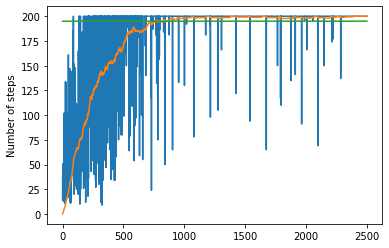

In [104]:
def getState(obs):
    state = ''
    for o in obs:
        state += str(o)[:3] +'_'
    return state

env = gym.make('CartPole-v0')
nbEpisodes = 2500
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()
history_3 = copy.deepcopy(history)

In [105]:
import pandas as pd
from IPython.display import display, HTML
display(pd.DataFrame(history_1))
display(pd.DataFrame(history_2))
display(pd.DataFrame(history_3))

,0000,0-100,000-1,0-101,00-1-2,01-1-2,01-1-3,0-1-10,00-1-1,-10-1-1,...,0-2-1-1,0-2-10,-1-3-10,-1-2-1-2,210-2,200-1,2-100,21-1-3,100-2,2-1-1-1
0,"{'count': 2768, 'value': 87.23013005780363}","{'count': 494, 'value': 111.18825910931172}","{'count': 60171, 'value': 110.13403466786346}","{'count': 27, 'value': 15.25925925925926}","{'count': 60, 'value': 53.483333333333334}","{'count': 626, 'value': 65.56070287539934}","{'count': 3, 'value': 1.3333333333333333}","{'count': 625, 'value': 120.61440000000005}","{'count': 6187, 'value': 136.30079198319072}","{'count': 559, 'value': 130.95885509839}",...,"{'count': 5, 'value': 22.6}","{'count': 4, 'value': 24.25}","{'count': 1, 'value': 13.0}","{'count': 3, 'value': 3.3333333333333335}","{'count': 2, 'value': 11.5}","{'count': 15, 'value': 9.266666666666667}","{'count': 2, 'value': 3.0}","{'count': 2, 'value': 1.5}","{'count': 0, 'value': 0}","{'count': 2, 'value': 12.0}"
1,"{'count': 65261, 'value': 102.07900583809607}","{'count': 8808, 'value': 142.83583106267068}","{'count': 2592, 'value': 104.47260802469134}","{'count': 140, 'value': 51.621428571428574}","{'count': 23, 'value': 13.608695652173912}","{'count': 69, 'value': 33.17391304347826}","{'count': 10, 'value': 1.9}","{'count': 10397, 'value': 144.09647013561673}","{'count': 584, 'value': 101.38698630136996}","{'count': 83, 'value': 92.31325301204816}",...,"{'count': 1, 'value': 22.0}","{'count': 4, 'value': 22.75}","{'count': 1, 'value': 11.0}","{'count': 0, 'value': 0}","{'count': 98, 'value': 18.979591836734688}","{'count': 727, 'value': 11.473177441540583}","{'count': 40, 'value': 13.225}","{'count': 0, 'value': 0}","{'count': 1, 'value': 9.0}","{'count': 7, 'value': 7.857142857142857}"


,-1_0_0_0_,-1_0_0_-1_,-1_0_-1_-1_,0_0_-1_-2_,0_0_-1_-1_,0_-1_-1_0_,0_-1_-1_-1_,0_-1_0_-1_,0_0_0_-1_,0_-1_0_0_,...,-3_-1_0_-1_,2_-1_-1_1_,2_-2_0_1_,2_1_0_-2_,2_-2_-1_1_,2_0_0_-2_,-3_-3_0_2_,2_0_-1_1_,2_0_-1_-2_,-3_-2_-1_1_
0,"{'count': 335, 'value': 121.38507462686563}","{'count': 17283, 'value': 155.67864375397818}","{'count': 8487, 'value': 142.43301519971743}","{'count': 90, 'value': 57.388888888888886}","{'count': 7090, 'value': 126.22933709449931}","{'count': 4427, 'value': 156.6026654619377}","{'count': 630, 'value': 107.1269841269841}","{'count': 340, 'value': 171.79117647058814}","{'count': 62795, 'value': 125.04263078270554}","{'count': 656, 'value': 112.26524390243905}",...,"{'count': 5, 'value': 9.6}","{'count': 103, 'value': 12.79611650485437}","{'count': 0, 'value': 0}","{'count': 14, 'value': 9.785714285714286}","{'count': 0, 'value': 0}","{'count': 5, 'value': 3.0}","{'count': 5, 'value': 1.6}","{'count': 0, 'value': 0}","{'count': 3, 'value': 1.6666666666666667}","{'count': 2, 'value': 7.5}"
1,"{'count': 6611, 'value': 156.48903342913226}","{'count': 780, 'value': 127.42435897435898}","{'count': 490, 'value': 108.49183673469389}","{'count': 15, 'value': 52.266666666666666}","{'count': 513, 'value': 90.8615984405458}","{'count': 755, 'value': 94.2251655629139}","{'count': 85, 'value': 55.72941176470588}","{'count': 177, 'value': 93.37853107344631}","{'count': 2343, 'value': 114.10328638497657}","{'count': 14019, 'value': 153.0855267850778}",...,"{'count': 0, 'value': 0}","{'count': 0, 'value': 0}","{'count': 6, 'value': 11.666666666666666}","{'count': 3, 'value': 3.0}","{'count': 10, 'value': 11.0}","{'count': 0, 'value': 0}","{'count': 0, 'value': 0}","{'count': 1, 'value': 11.0}","{'count': 0, 'value': 0}","{'count': 0, 'value': 0}"


,0.0_-0._0.0_0.0_,0.0_-0._0.0_0.3_,0.0_-0._0.0_0.6_,0.0_-0._0.0_1.0_,-0._-0._0.0_0.7_,-0._-0._0.1_1.0_,-0._-0._0.1_0.8_,-0._-0._0.1_1.1_,-0._-0._0.1_1.4_,-0._-0._0.2_1.2_,...,1.7_-0._-0._-0._,0.0_2.1_-0._-0._,-0._0.2_7.4_-0._,1.1_-0._-0._0.2_,-0._-0._8.8_0.2_,0.0_9.7_-0._-0._,3.1_-0._-0._-0._,-0._0.1_1.9_-0._,-0._-0._5.1_0.1_,-0._-0._4.8_0.2_
0,"{'count': 81, 'value': 86.44444444444447}","{'count': 24, 'value': 48.958333333333336}","{'count': 33, 'value': 79.72727272727273}","{'count': 3, 'value': 6.666666666666667}","{'count': 20, 'value': 41.95}","{'count': 3, 'value': 3.6666666666666665}","{'count': 9, 'value': 8.88888888888889}","{'count': 6, 'value': 2.1666666666666665}","{'count': 6, 'value': 2.8333333333333335}","{'count': 1, 'value': 1.0}",...,"{'count': 1, 'value': 170.0}","{'count': 1, 'value': 154.0}","{'count': 1, 'value': 169.0}","{'count': 0, 'value': 0}","{'count': 0, 'value': 0}","{'count': 0, 'value': 0}","{'count': 1, 'value': 158.0}","{'count': 1, 'value': 41.0}","{'count': 1, 'value': 157.0}","{'count': 0, 'value': 0}"
1,"{'count': 539, 'value': 150.09276437847853}","{'count': 181, 'value': 99.93922651933705}","{'count': 22, 'value': 34.95454545454546}","{'count': 15, 'value': 39.2}","{'count': 142, 'value': 79.04225352112674}","{'count': 16, 'value': 6.625}","{'count': 22, 'value': 13.045454545454545}","{'count': 9, 'value': 14.11111111111111}","{'count': 3, 'value': 1.6666666666666667}","{'count': 0, 'value': 0}",...,"{'count': 0, 'value': 0}","{'count': 0, 'value': 0}","{'count': 0, 'value': 0}","{'count': 1, 'value': 128.0}","{'count': 1, 'value': 62.0}","{'count': 1, 'value': 180.0}","{'count': 0, 'value': 0}","{'count': 0, 'value': 0}","{'count': 0, 'value': 0}","{'count': 1, 'value': 82.0}"


Podem veure en el primer cas com el fet de fer servir nombres naturals de fins a dos diguits ha reescrit alguna informació i per tant ha oblidat durant el seu aprenentatge perdent estats memoritzats.

En el segon cas es veu com al separar cada valor mitjançant guions s'han guanyat un cert nombre de columnes i la performance ha augmentat; diferents casos no s'eliminen.

La idea en el tercer cas era fomentar l'augment del diccionari deixant de treballar amb nombres naturals sino amb nombres decimals capats a dos xifres( son finits). Mitjançant aquesta estrategia s'han generat moltisims estats i d'aquesta manera  s'aconsegueix distingir moltes mes situacions aconseguint una millora de la performance i una reducció en la quantitat d'episodis.


# Extra. Learn on the other 4 environments (+2pts)

Aquest apartat és opcional, i només servirà per fer pujar la nota 2 punts (fins al 12 i llavors fer promig amb la resta de pràctiques)

L'objectiu dels mètodes de aprenentatge per reforç és que siguin prou robustos com per poder aprendre diferents tasques diferents. Per això, modifiqueu el codi necessari per aconseguir que els 5 environments funcionin:
* CartPole-v1
* Acrobot-v1
* Pendulum-v0
* MountainCar-v0
* MountainCarContinuous-v0

In [20]:
import gym
from random import randint
import math
import tqdm
import numpy as np
import matplotlib.pyplot as plt
decay_ = []
decay_1 = []
decay_2 = []
from collections import defaultdict
a = defaultdict(lambda: "default", key="some_value")
def learn(episodeCount, episodeVerbose=100,negative=False):
    tqdm_episodes = tqdm.tqdm(range(episodeCount))
    for i_episode in tqdm_episodes:  # Start an episode
        obs = env.reset()
        
        # Compute the decay of the exploration
        decayX = 0.02
        decayY = 20
        decay = max(-i_episode*decayX+decayY, 10/(i_episode+1))

        iter_verbose = i_episode % episodeVerbose == 0 if episodeVerbose > -1 else 0
        doEpisodeMC(obs, decay, i_episode, verbose=iter_verbose,negative=negative)
        decay_.append(decay)
        decay_1.append(-i_episode*decayX+decayY)
        decay_2.append(10/(i_episode+1))
        i = max(i_episode-100, 0)
        tqdm_episodes.set_postfix({"last_100_avg_pole_upright": np.mean(rewardHistory[i:i_episode+1]),
                                  "len(history)": len(history)})


def doEpisodeMC(obs, decay, i_episode, verbose=False,negative=False):
    # Reset reward count and states/actions for this episode
    episodeStatesActions = []
    totalRewards = 0

    for t in range(env.spec.max_episode_steps):
        
        if verbose:
            env.render()
            
        state = getState(obs)  # Get the state
        action = policy(state, decay,negative=negative)  # Get the action

        # Save state and action to episodeStatesActions
        episodeStatesActions.append({'state': state, 'action': action})  

        obs, reward, done, _ = env.step(action if type(action)!= float else np.asarray([[action+1e-3]]))  # Apply the action

        totalRewards += reward  # Update total reward for this episode
        
        if done:  # Episode is over
            rewardHistory[i_episode] = totalRewards
            for i, state_action in enumerate(episodeStatesActions):  # Update value for chosen actions
                updatePolicyMC(state_action['state'], 
                               state_action['action'], 
                               totalRewards-i)
            break

    if verbose:
        print({"Episode {}. Iteration with pole upright: {}. History length: {}".format(i_episode, 
                                                                                        totalRewards, 
                                                                                        len(history))})



# @param state <string> the state to update
# @param action <int> the action to update
# @param G <int> the reward
def updatePolicyMC(state, action, G):
    if hasattr(env.action_space,"n") :
        a = history[state][action]
        a['value'] = (a['value'] * a['count'] + G) / (a['count'] + 1)
        a['count'] += 1
    else:
        a = history[state][action[0]]
        a['value'] = (a['value'] * a['count'] + G) / (a['count'] + 1)
        a['count'] += 1


# @param obs <[float]> the observation to convert into a state
# @return the state associated to the observation_space
# If the set of observations where never met, create the state
# The function reduces the number of possible states
def getState(obs):
    state = ''
    for o in obs:
        state += str(math.floor(o)) + '_'
    return state

    
# @param state <string>
# @param decay <int>
# @return an action
# The policy progressivly stops exploration and gets greedy
def policy(state, decay,negative=False):
    # Get the less explored action and the most valued action
    maxValueAction = env.action_space.sample()
    minCountAction = env.action_space.sample()
    if hasattr(env.action_space,"n") :
        if state not in history:  # If state does not exists, create it

                history[state] = []


                for _ in range(env.action_space.n if hasattr(env.action_space,"n") else 1):
                    history[state].append({'count':0, 'value':0})
        stateValues = history[state]
        iterable = range(env.action_space.n) 
        maxValueAction = maxValueAction 
        minCountAction = minCountAction 
        for action in iterable:
            
            cond = (stateValues[maxValueAction]['value'] < stateValues[action if 'key' != action else 0]['value']) if negative==False else stateValues[maxValueAction]['value'] > stateValues[action if 'key' != action else 0]['value']
            #print(cond,negative)
            if cond:
                maxValueAction = action
               # print(minCountAction ,action,minCountAction if type(maxValueAction)==int else minCountAction[0]['count'],type(maxValueAction)==int)
            if stateValues[minCountAction ]['count'] > stateValues[action]['count']:
                minCountAction = action
        if randint(0, 100) < decay:
            return  minCountAction
        else:
            return maxValueAction
    # Computing the decay of the explo
    else:
        if state not in history:  
                history[state] = defaultdict(lambda: {'count':0, 'value':0})

        stateValues = history[state]
        iterable =  [x for x in stateValues.keys()]
        maxValueAction = maxValueAction[0]
        minCountAction = minCountAction[0]
        for action in iterable:
            
            cond = (stateValues[maxValueAction]['value'] < stateValues[action if 'key' != action else 0]['value']) if negative==True else stateValues[maxValueAction]['value'] > stateValues[action if 'key' != action else 0]['value']
            if cond:
                maxValueAction = action
               # print(minCountAction ,action,minCountAction if type(maxValueAction)==int else minCountAction[0]['count'],type(maxValueAction)==int)
            if stateValues[minCountAction ]['count'] > stateValues[action if 'key' != action else 0]['count']:
                minCountAction = action
        # Computing the decay of the exploration
        if randint(0, 100) < decay:
            return np.asarray([minCountAction]) 
        else:
            return np.asarray([maxValueAction]) 







  0%|          | 0/2000 [00:00<?, ?it/s]


  0%|          | 0/2000 [00:00<?, ?it/s, last_100_avg_pole_upright=14, len(history)=7]


  0%|          | 1/2000 [00:00<08:11,  4.07it/s, last_100_avg_pole_upright=14, len(history)=7]


  0%|          | 1/2000 [00:00<08:11,  4.07it/s, last_100_avg_pole_upright=15.5, len(history)=10]


  0%|          | 1/2000 [00:00<08:11,  4.07it/s, last_100_avg_pole_upright=16.3, len(history)=12]


  0%|          | 1/2000 [00:00<08:11,  4.07it/s, last_100_avg_pole_upright=21, len(history)=14]  


  0%|          | 1/2000 [00:00<08:11,  4.07it/s, last_100_avg_pole_upright=21.4, len(history)=19]


  0%|          | 1/2000 [00:00<08:11,  4.07it/s, last_100_avg_pole_upright=26.2, len(history)=21]


  0%|          | 1/2000 [00:00<08:11,  4.07it/s, last_100_avg_pole_upright=24.4, len(history)=21]


  0%|          | 1/2000 [00:00<08:11,  4.07it/s, last_100_avg_pole_upright=25.4, len(history)=21]


  0%|          | 1/2000 [00:00<08:11,  4.07it/s, last_100_avg_pole_u

{'Episode 0. Iteration with pole upright: 14.0. History length: 7'}


  2%|▏         | 40/2000 [00:00<05:38,  5.79it/s, last_100_avg_pole_upright=82.1, len(history)=92]


  2%|▏         | 40/2000 [00:00<05:38,  5.79it/s, last_100_avg_pole_upright=82.3, len(history)=92]


  3%|▎         | 66/2000 [00:00<03:56,  8.19it/s, last_100_avg_pole_upright=82.3, len(history)=92]


  3%|▎         | 66/2000 [00:00<03:56,  8.19it/s, last_100_avg_pole_upright=81.3, len(history)=92]


  3%|▎         | 66/2000 [00:00<03:56,  8.19it/s, last_100_avg_pole_upright=81.5, len(history)=93]


  3%|▎         | 66/2000 [00:00<03:56,  8.19it/s, last_100_avg_pole_upright=82, len(history)=94]  


  3%|▎         | 66/2000 [00:00<03:56,  8.19it/s, last_100_avg_pole_upright=81.2, len(history)=94]


  3%|▎         | 66/2000 [00:00<03:56,  8.19it/s, last_100_avg_pole_upright=82.4, len(history)=95]


  3%|▎         | 66/2000 [00:00<03:56,  8.19it/s, last_100_avg_pole_upright=83.3, len(history)=96]


  3%|▎         | 66/2000 [00:00<03:56,  8.19it/s, last_100_avg_pole_upright=83.1, len(histo

  6%|▌         | 117/2000 [00:00<01:56, 16.15it/s, last_100_avg_pole_upright=119, len(history)=112]


  6%|▌         | 117/2000 [00:00<01:56, 16.15it/s, last_100_avg_pole_upright=119, len(history)=115]


  6%|▌         | 117/2000 [00:00<01:56, 16.15it/s, last_100_avg_pole_upright=119, len(history)=115]


  6%|▌         | 117/2000 [00:00<01:56, 16.15it/s, last_100_avg_pole_upright=118, len(history)=115]


  7%|▋         | 138/2000 [00:00<01:23, 22.32it/s, last_100_avg_pole_upright=118, len(history)=115]


  7%|▋         | 138/2000 [00:00<01:23, 22.32it/s, last_100_avg_pole_upright=119, len(history)=115]


  7%|▋         | 138/2000 [00:00<01:23, 22.32it/s, last_100_avg_pole_upright=121, len(history)=116]


  7%|▋         | 138/2000 [00:00<01:23, 22.32it/s, last_100_avg_pole_upright=121, len(history)=116]


  7%|▋         | 138/2000 [00:00<01:23, 22.32it/s, last_100_avg_pole_upright=120, len(history)=116]


  7%|▋         | 138/2000 [00:00<01:23, 22.32it/s, last_100_avg_pole_upright=119, 

 10%|█         | 201/2000 [00:01<00:34, 52.66it/s, last_100_avg_pole_upright=146, len(history)=131]


 10%|█         | 201/2000 [00:01<00:34, 52.66it/s, last_100_avg_pole_upright=147, len(history)=131]


 10%|█         | 201/2000 [00:01<00:34, 52.66it/s, last_100_avg_pole_upright=147, len(history)=131]


 10%|█         | 201/2000 [00:01<00:34, 52.66it/s, last_100_avg_pole_upright=147, len(history)=131]


 10%|█         | 201/2000 [00:01<00:34, 52.66it/s, last_100_avg_pole_upright=148, len(history)=131]


 10%|█         | 201/2000 [00:01<00:34, 52.66it/s, last_100_avg_pole_upright=146, len(history)=131]


 10%|█         | 201/2000 [00:01<00:34, 52.66it/s, last_100_avg_pole_upright=146, len(history)=131]


 10%|█         | 201/2000 [00:01<00:34, 52.66it/s, last_100_avg_pole_upright=146, len(history)=131]


 10%|█         | 201/2000 [00:01<00:34, 52.66it/s, last_100_avg_pole_upright=146, len(history)=131]


 10%|█         | 201/2000 [00:01<00:34, 52.66it/s, last_100_avg_pole_upright=148, 

 13%|█▎        | 264/2000 [00:01<00:18, 94.11it/s, last_100_avg_pole_upright=186, len(history)=142]


 13%|█▎        | 264/2000 [00:01<00:18, 94.11it/s, last_100_avg_pole_upright=188, len(history)=142]


 13%|█▎        | 264/2000 [00:01<00:18, 94.11it/s, last_100_avg_pole_upright=189, len(history)=142]


 13%|█▎        | 264/2000 [00:01<00:18, 94.11it/s, last_100_avg_pole_upright=188, len(history)=142]


 13%|█▎        | 264/2000 [00:01<00:18, 94.11it/s, last_100_avg_pole_upright=187, len(history)=142]


 13%|█▎        | 264/2000 [00:01<00:18, 94.11it/s, last_100_avg_pole_upright=190, len(history)=142]


 13%|█▎        | 264/2000 [00:01<00:18, 94.11it/s, last_100_avg_pole_upright=191, len(history)=142]


 13%|█▎        | 264/2000 [00:01<00:18, 94.11it/s, last_100_avg_pole_upright=192, len(history)=142]


 13%|█▎        | 264/2000 [00:01<00:18, 94.11it/s, last_100_avg_pole_upright=196, len(history)=142]


 14%|█▍        | 282/2000 [00:01<00:16, 103.22it/s, last_100_avg_pole_upright=196,

 17%|█▋        | 337/2000 [00:01<00:12, 134.45it/s, last_100_avg_pole_upright=204, len(history)=145]


 17%|█▋        | 337/2000 [00:01<00:12, 134.45it/s, last_100_avg_pole_upright=204, len(history)=145]


 17%|█▋        | 337/2000 [00:01<00:12, 134.45it/s, last_100_avg_pole_upright=203, len(history)=145]


 17%|█▋        | 337/2000 [00:01<00:12, 134.45it/s, last_100_avg_pole_upright=203, len(history)=145]


 17%|█▋        | 337/2000 [00:01<00:12, 134.45it/s, last_100_avg_pole_upright=202, len(history)=145]


 17%|█▋        | 337/2000 [00:02<00:12, 134.45it/s, last_100_avg_pole_upright=204, len(history)=145]


 17%|█▋        | 337/2000 [00:02<00:12, 134.45it/s, last_100_avg_pole_upright=203, len(history)=145]


 17%|█▋        | 337/2000 [00:02<00:12, 134.45it/s, last_100_avg_pole_upright=203, len(history)=145]


 17%|█▋        | 337/2000 [00:02<00:12, 134.45it/s, last_100_avg_pole_upright=208, len(history)=145]


 17%|█▋        | 337/2000 [00:02<00:12, 134.45it/s, last_100_avg_pole_upr

 20%|██        | 400/2000 [00:05<00:13, 120.93it/s, last_100_avg_pole_upright=269, len(history)=146]


 20%|██        | 400/2000 [00:05<00:13, 120.93it/s, last_100_avg_pole_upright=267, len(history)=146]


 21%|██        | 413/2000 [00:05<01:52, 14.16it/s, last_100_avg_pole_upright=267, len(history)=146] 


 21%|██        | 413/2000 [00:05<01:52, 14.16it/s, last_100_avg_pole_upright=270, len(history)=146]


 21%|██        | 413/2000 [00:05<01:52, 14.16it/s, last_100_avg_pole_upright=275, len(history)=146]


 21%|██        | 413/2000 [00:05<01:52, 14.16it/s, last_100_avg_pole_upright=278, len(history)=146]

{'Episode 400. Iteration with pole upright: 202.0. History length: 146'}





 21%|██        | 413/2000 [00:05<01:52, 14.16it/s, last_100_avg_pole_upright=281, len(history)=146]


 21%|██        | 413/2000 [00:05<01:52, 14.16it/s, last_100_avg_pole_upright=286, len(history)=146]


 21%|██        | 413/2000 [00:05<01:52, 14.16it/s, last_100_avg_pole_upright=290, len(history)=146]


 21%|██        | 413/2000 [00:05<01:52, 14.16it/s, last_100_avg_pole_upright=292, len(history)=146]


 21%|██        | 413/2000 [00:05<01:52, 14.16it/s, last_100_avg_pole_upright=293, len(history)=146]


 21%|██        | 413/2000 [00:05<01:52, 14.16it/s, last_100_avg_pole_upright=296, len(history)=146]


 21%|██        | 413/2000 [00:05<01:52, 14.16it/s, last_100_avg_pole_upright=297, len(history)=146]


 21%|██        | 423/2000 [00:05<01:23, 18.81it/s, last_100_avg_pole_upright=297, len(history)=146]


 21%|██        | 423/2000 [00:05<01:23, 18.81it/s, last_100_avg_pole_upright=297, len(history)=146]


 21%|██        | 423/2000 [00:05<01:23, 18.81it/s, last_100_avg_pole_upright=29

 24%|██▍       | 482/2000 [00:06<00:24, 61.63it/s, last_100_avg_pole_upright=356, len(history)=151]


 24%|██▍       | 482/2000 [00:06<00:24, 61.63it/s, last_100_avg_pole_upright=357, len(history)=151]


 24%|██▍       | 482/2000 [00:06<00:24, 61.63it/s, last_100_avg_pole_upright=359, len(history)=151]


 24%|██▍       | 482/2000 [00:06<00:24, 61.63it/s, last_100_avg_pole_upright=362, len(history)=151]


 24%|██▍       | 482/2000 [00:06<00:24, 61.63it/s, last_100_avg_pole_upright=362, len(history)=151]


 24%|██▍       | 482/2000 [00:06<00:24, 61.63it/s, last_100_avg_pole_upright=362, len(history)=151]


 24%|██▍       | 482/2000 [00:06<00:24, 61.63it/s, last_100_avg_pole_upright=358, len(history)=151]


 24%|██▍       | 482/2000 [00:06<00:24, 61.63it/s, last_100_avg_pole_upright=356, len(history)=151]


 24%|██▍       | 482/2000 [00:06<00:24, 61.63it/s, last_100_avg_pole_upright=354, len(history)=151]


 24%|██▍       | 482/2000 [00:06<00:24, 61.63it/s, last_100_avg_pole_upright=354, 

 27%|██▋       | 545/2000 [00:06<00:16, 89.87it/s, last_100_avg_pole_upright=365, len(history)=154]


 27%|██▋       | 545/2000 [00:06<00:16, 89.87it/s, last_100_avg_pole_upright=364, len(history)=154]


 27%|██▋       | 545/2000 [00:06<00:16, 89.87it/s, last_100_avg_pole_upright=368, len(history)=154]


 27%|██▋       | 545/2000 [00:06<00:16, 89.87it/s, last_100_avg_pole_upright=368, len(history)=154]


 27%|██▋       | 545/2000 [00:06<00:16, 89.87it/s, last_100_avg_pole_upright=369, len(history)=154]


 27%|██▋       | 545/2000 [00:06<00:16, 89.87it/s, last_100_avg_pole_upright=371, len(history)=154]


 28%|██▊       | 555/2000 [00:06<00:16, 88.11it/s, last_100_avg_pole_upright=371, len(history)=154]


 28%|██▊       | 555/2000 [00:06<00:16, 88.11it/s, last_100_avg_pole_upright=370, len(history)=154]


 28%|██▊       | 555/2000 [00:06<00:16, 88.11it/s, last_100_avg_pole_upright=367, len(history)=154]


 28%|██▊       | 555/2000 [00:06<00:16, 88.11it/s, last_100_avg_pole_upright=367, 

 31%|███       | 613/2000 [00:07<00:18, 76.93it/s, last_100_avg_pole_upright=392, len(history)=162]


 31%|███       | 613/2000 [00:07<00:18, 76.93it/s, last_100_avg_pole_upright=392, len(history)=162]


 31%|███       | 613/2000 [00:07<00:18, 76.93it/s, last_100_avg_pole_upright=392, len(history)=162]


 31%|███       | 613/2000 [00:07<00:18, 76.93it/s, last_100_avg_pole_upright=396, len(history)=162]


 31%|███       | 613/2000 [00:07<00:18, 76.93it/s, last_100_avg_pole_upright=396, len(history)=162]


 31%|███       | 613/2000 [00:07<00:18, 76.93it/s, last_100_avg_pole_upright=397, len(history)=162]


 31%|███       | 621/2000 [00:07<00:18, 75.63it/s, last_100_avg_pole_upright=397, len(history)=162]


 31%|███       | 621/2000 [00:07<00:18, 75.63it/s, last_100_avg_pole_upright=395, len(history)=162]


 31%|███       | 621/2000 [00:07<00:18, 75.63it/s, last_100_avg_pole_upright=396, len(history)=162]


 31%|███       | 621/2000 [00:07<00:18, 75.63it/s, last_100_avg_pole_upright=397, 

 34%|███▍      | 679/2000 [00:08<00:15, 86.22it/s, last_100_avg_pole_upright=415, len(history)=162]


 34%|███▍      | 679/2000 [00:08<00:15, 86.22it/s, last_100_avg_pole_upright=411, len(history)=162]


 34%|███▍      | 679/2000 [00:08<00:15, 86.22it/s, last_100_avg_pole_upright=411, len(history)=162]


 34%|███▍      | 679/2000 [00:08<00:15, 86.22it/s, last_100_avg_pole_upright=411, len(history)=162]


 34%|███▍      | 679/2000 [00:08<00:15, 86.22it/s, last_100_avg_pole_upright=410, len(history)=162]


 34%|███▍      | 679/2000 [00:08<00:15, 86.22it/s, last_100_avg_pole_upright=413, len(history)=162]


 34%|███▍      | 679/2000 [00:08<00:15, 86.22it/s, last_100_avg_pole_upright=417, len(history)=162]


 34%|███▍      | 688/2000 [00:08<00:15, 82.03it/s, last_100_avg_pole_upright=417, len(history)=162]


 34%|███▍      | 688/2000 [00:08<00:15, 82.03it/s, last_100_avg_pole_upright=417, len(history)=162]


 34%|███▍      | 688/2000 [00:08<00:15, 82.03it/s, last_100_avg_pole_upright=418, 

 37%|███▋      | 747/2000 [00:09<00:16, 74.69it/s, last_100_avg_pole_upright=442, len(history)=163]


 37%|███▋      | 747/2000 [00:09<00:16, 74.69it/s, last_100_avg_pole_upright=441, len(history)=163]


 37%|███▋      | 747/2000 [00:09<00:16, 74.69it/s, last_100_avg_pole_upright=441, len(history)=163]


 37%|███▋      | 747/2000 [00:09<00:16, 74.69it/s, last_100_avg_pole_upright=440, len(history)=163]


 37%|███▋      | 747/2000 [00:09<00:16, 74.69it/s, last_100_avg_pole_upright=441, len(history)=163]


 37%|███▋      | 747/2000 [00:09<00:16, 74.69it/s, last_100_avg_pole_upright=443, len(history)=163]


 37%|███▋      | 747/2000 [00:09<00:16, 74.69it/s, last_100_avg_pole_upright=443, len(history)=163]


 37%|███▋      | 747/2000 [00:09<00:16, 74.69it/s, last_100_avg_pole_upright=444, len(history)=163]


 37%|███▋      | 747/2000 [00:09<00:16, 74.69it/s, last_100_avg_pole_upright=444, len(history)=163]


 38%|███▊      | 755/2000 [00:09<00:17, 72.61it/s, last_100_avg_pole_upright=444, 

 41%|████      | 812/2000 [00:16<03:43,  5.32it/s, last_100_avg_pole_upright=475, len(history)=163]


 41%|████      | 812/2000 [00:16<03:43,  5.32it/s, last_100_avg_pole_upright=475, len(history)=163]


 41%|████      | 812/2000 [00:16<03:43,  5.32it/s, last_100_avg_pole_upright=475, len(history)=163]


 41%|████      | 812/2000 [00:16<03:43,  5.32it/s, last_100_avg_pole_upright=475, len(history)=163]




{'Episode 800. Iteration with pole upright: 500.0. History length: 163'}


 41%|████      | 812/2000 [00:16<03:43,  5.32it/s, last_100_avg_pole_upright=476, len(history)=163]


 41%|████      | 812/2000 [00:16<03:43,  5.32it/s, last_100_avg_pole_upright=476, len(history)=163]


 41%|████      | 812/2000 [00:16<03:43,  5.32it/s, last_100_avg_pole_upright=473, len(history)=165]


 41%|████      | 812/2000 [00:16<03:43,  5.32it/s, last_100_avg_pole_upright=473, len(history)=165]


 41%|████      | 812/2000 [00:16<03:43,  5.32it/s, last_100_avg_pole_upright=473, len(history)=165]


 41%|████      | 820/2000 [00:16<02:39,  7.39it/s, last_100_avg_pole_upright=473, len(history)=165]


 41%|████      | 820/2000 [00:16<02:39,  7.39it/s, last_100_avg_pole_upright=475, len(history)=165]


 41%|████      | 820/2000 [00:16<02:39,  7.39it/s, last_100_avg_pole_upright=475, len(history)=165]


 41%|████      | 820/2000 [00:16<02:39,  7.39it/s, last_100_avg_pole_upright=471, len(history)=165]


 41%|████      | 820/2000 [00:16<02:39,  7.39it/s, last_100_avg_pole_upright=475, 

 44%|████▍     | 876/2000 [00:17<00:26, 42.76it/s, last_100_avg_pole_upright=484, len(history)=165]


 44%|████▍     | 876/2000 [00:17<00:26, 42.76it/s, last_100_avg_pole_upright=484, len(history)=165]


 44%|████▍     | 876/2000 [00:17<00:26, 42.76it/s, last_100_avg_pole_upright=484, len(history)=165]


 44%|████▍     | 876/2000 [00:17<00:26, 42.76it/s, last_100_avg_pole_upright=485, len(history)=165]


 44%|████▍     | 884/2000 [00:17<00:23, 47.79it/s, last_100_avg_pole_upright=485, len(history)=165]


 44%|████▍     | 884/2000 [00:17<00:23, 47.79it/s, last_100_avg_pole_upright=482, len(history)=165]


 44%|████▍     | 884/2000 [00:17<00:23, 47.79it/s, last_100_avg_pole_upright=482, len(history)=165]


 44%|████▍     | 884/2000 [00:17<00:23, 47.79it/s, last_100_avg_pole_upright=482, len(history)=165]


 44%|████▍     | 884/2000 [00:17<00:23, 47.79it/s, last_100_avg_pole_upright=482, len(history)=165]


 44%|████▍     | 884/2000 [00:17<00:23, 47.79it/s, last_100_avg_pole_upright=482, 

 47%|████▋     | 940/2000 [00:18<00:15, 69.99it/s, last_100_avg_pole_upright=492, len(history)=165]


 47%|████▋     | 940/2000 [00:18<00:15, 69.99it/s, last_100_avg_pole_upright=492, len(history)=165]


 47%|████▋     | 940/2000 [00:18<00:15, 69.99it/s, last_100_avg_pole_upright=492, len(history)=165]


 47%|████▋     | 948/2000 [00:18<00:14, 70.89it/s, last_100_avg_pole_upright=492, len(history)=165]


 47%|████▋     | 948/2000 [00:18<00:14, 70.89it/s, last_100_avg_pole_upright=492, len(history)=165]


 47%|████▋     | 948/2000 [00:18<00:14, 70.89it/s, last_100_avg_pole_upright=492, len(history)=165]


 47%|████▋     | 948/2000 [00:18<00:14, 70.89it/s, last_100_avg_pole_upright=492, len(history)=165]


 47%|████▋     | 948/2000 [00:18<00:14, 70.89it/s, last_100_avg_pole_upright=492, len(history)=165]


 47%|████▋     | 948/2000 [00:18<00:14, 70.89it/s, last_100_avg_pole_upright=492, len(history)=165]


 47%|████▋     | 948/2000 [00:18<00:14, 70.89it/s, last_100_avg_pole_upright=492, 

 50%|█████     | 1004/2000 [00:19<00:14, 70.34it/s, last_100_avg_pole_upright=500, len(history)=165]


 50%|█████     | 1004/2000 [00:19<00:14, 70.34it/s, last_100_avg_pole_upright=500, len(history)=165]


 51%|█████     | 1012/2000 [00:19<00:13, 70.78it/s, last_100_avg_pole_upright=500, len(history)=165]


 51%|█████     | 1012/2000 [00:19<00:13, 70.78it/s, last_100_avg_pole_upright=500, len(history)=165]


 51%|█████     | 1012/2000 [00:19<00:13, 70.78it/s, last_100_avg_pole_upright=500, len(history)=165]


 51%|█████     | 1012/2000 [00:19<00:13, 70.78it/s, last_100_avg_pole_upright=500, len(history)=165]


 51%|█████     | 1012/2000 [00:19<00:13, 70.78it/s, last_100_avg_pole_upright=500, len(history)=165]


 51%|█████     | 1012/2000 [00:19<00:13, 70.78it/s, last_100_avg_pole_upright=500, len(history)=165]


 51%|█████     | 1012/2000 [00:19<00:13, 70.78it/s, last_100_avg_pole_upright=500, len(history)=165]


 51%|█████     | 1012/2000 [00:19<00:13, 70.78it/s, last_100_avg_pole_upr

 53%|█████▎    | 1068/2000 [00:20<00:12, 73.66it/s, last_100_avg_pole_upright=500, len(history)=165]


 54%|█████▍    | 1076/2000 [00:20<00:12, 73.11it/s, last_100_avg_pole_upright=500, len(history)=165]


 54%|█████▍    | 1076/2000 [00:20<00:12, 73.11it/s, last_100_avg_pole_upright=500, len(history)=165]


 54%|█████▍    | 1076/2000 [00:20<00:12, 73.11it/s, last_100_avg_pole_upright=500, len(history)=165]


 54%|█████▍    | 1076/2000 [00:20<00:12, 73.11it/s, last_100_avg_pole_upright=500, len(history)=165]


 54%|█████▍    | 1076/2000 [00:20<00:12, 73.11it/s, last_100_avg_pole_upright=500, len(history)=165]


 54%|█████▍    | 1076/2000 [00:20<00:12, 73.11it/s, last_100_avg_pole_upright=500, len(history)=165]


 54%|█████▍    | 1076/2000 [00:20<00:12, 73.11it/s, last_100_avg_pole_upright=500, len(history)=165]


 54%|█████▍    | 1076/2000 [00:20<00:12, 73.11it/s, last_100_avg_pole_upright=500, len(history)=165]


 54%|█████▍    | 1076/2000 [00:20<00:12, 73.11it/s, last_100_avg_pole_upr

 57%|█████▋    | 1140/2000 [00:21<00:11, 71.73it/s, last_100_avg_pole_upright=500, len(history)=165]


 57%|█████▋    | 1140/2000 [00:21<00:11, 71.73it/s, last_100_avg_pole_upright=500, len(history)=165]


 57%|█████▋    | 1140/2000 [00:21<00:11, 71.73it/s, last_100_avg_pole_upright=500, len(history)=165]


 57%|█████▋    | 1140/2000 [00:21<00:11, 71.73it/s, last_100_avg_pole_upright=500, len(history)=165]


 57%|█████▋    | 1140/2000 [00:21<00:11, 71.73it/s, last_100_avg_pole_upright=500, len(history)=165]


 57%|█████▋    | 1140/2000 [00:21<00:11, 71.73it/s, last_100_avg_pole_upright=500, len(history)=165]


 57%|█████▋    | 1140/2000 [00:21<00:11, 71.73it/s, last_100_avg_pole_upright=500, len(history)=165]


 57%|█████▋    | 1140/2000 [00:21<00:11, 71.73it/s, last_100_avg_pole_upright=500, len(history)=165]


 57%|█████▋    | 1140/2000 [00:21<00:11, 71.73it/s, last_100_avg_pole_upright=500, len(history)=165]


 57%|█████▋    | 1148/2000 [00:21<00:11, 72.24it/s, last_100_avg_pole_upr

 60%|██████    | 1204/2000 [00:28<03:29,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 60%|██████    | 1204/2000 [00:28<03:29,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 60%|██████    | 1204/2000 [00:28<03:29,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 60%|██████    | 1204/2000 [00:28<03:29,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 60%|██████    | 1204/2000 [00:28<03:29,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 60%|██████    | 1204/2000 [00:28<03:29,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 60%|██████    | 1204/2000 [00:28<03:29,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 60%|██████    | 1204/2000 [00:28<03:29,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 61%|██████    | 1212/2000 [00:28<02:28,  5.32it/s, last_100_avg_pole_upright=500, len(history)=165]


 61%|██████    | 1212/2000 [00:28<02:28,  5.32it/s, last_100_avg_pole_upr

{'Episode 1200. Iteration with pole upright: 500.0. History length: 165'}


 61%|██████    | 1212/2000 [00:28<02:28,  5.32it/s, last_100_avg_pole_upright=500, len(history)=165]


 61%|██████    | 1212/2000 [00:28<02:28,  5.32it/s, last_100_avg_pole_upright=500, len(history)=165]


 61%|██████    | 1212/2000 [00:28<02:28,  5.32it/s, last_100_avg_pole_upright=500, len(history)=165]


 61%|██████    | 1212/2000 [00:28<02:28,  5.32it/s, last_100_avg_pole_upright=500, len(history)=165]


 61%|██████    | 1212/2000 [00:28<02:28,  5.32it/s, last_100_avg_pole_upright=500, len(history)=165]


 61%|██████    | 1220/2000 [00:28<01:45,  7.36it/s, last_100_avg_pole_upright=500, len(history)=165]


 61%|██████    | 1220/2000 [00:28<01:45,  7.36it/s, last_100_avg_pole_upright=500, len(history)=165]


 61%|██████    | 1220/2000 [00:29<01:45,  7.36it/s, last_100_avg_pole_upright=500, len(history)=165]


 61%|██████    | 1220/2000 [00:29<01:45,  7.36it/s, last_100_avg_pole_upright=500, len(history)=165]


 61%|██████    | 1220/2000 [00:29<01:45,  7.36it/s, last_100_avg_pole_upr

 64%|██████▍   | 1275/2000 [00:29<00:17, 41.64it/s, last_100_avg_pole_upright=500, len(history)=165]


 64%|██████▍   | 1275/2000 [00:29<00:17, 41.64it/s, last_100_avg_pole_upright=500, len(history)=165]


 64%|██████▍   | 1275/2000 [00:29<00:17, 41.64it/s, last_100_avg_pole_upright=500, len(history)=165]


 64%|██████▍   | 1283/2000 [00:29<00:15, 47.40it/s, last_100_avg_pole_upright=500, len(history)=165]


 64%|██████▍   | 1283/2000 [00:29<00:15, 47.40it/s, last_100_avg_pole_upright=500, len(history)=165]


 64%|██████▍   | 1283/2000 [00:29<00:15, 47.40it/s, last_100_avg_pole_upright=500, len(history)=165]


 64%|██████▍   | 1283/2000 [00:29<00:15, 47.40it/s, last_100_avg_pole_upright=500, len(history)=165]


 64%|██████▍   | 1283/2000 [00:29<00:15, 47.40it/s, last_100_avg_pole_upright=500, len(history)=165]


 64%|██████▍   | 1283/2000 [00:29<00:15, 47.40it/s, last_100_avg_pole_upright=500, len(history)=165]


 64%|██████▍   | 1283/2000 [00:29<00:15, 47.40it/s, last_100_avg_pole_upr

 67%|██████▋   | 1339/2000 [00:30<00:09, 70.43it/s, last_100_avg_pole_upright=500, len(history)=165]


 67%|██████▋   | 1339/2000 [00:30<00:09, 70.43it/s, last_100_avg_pole_upright=500, len(history)=165]


 67%|██████▋   | 1347/2000 [00:30<00:09, 71.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 67%|██████▋   | 1347/2000 [00:30<00:09, 71.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 67%|██████▋   | 1347/2000 [00:30<00:09, 71.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 67%|██████▋   | 1347/2000 [00:30<00:09, 71.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 67%|██████▋   | 1347/2000 [00:30<00:09, 71.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 67%|██████▋   | 1347/2000 [00:30<00:09, 71.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 67%|██████▋   | 1347/2000 [00:30<00:09, 71.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 67%|██████▋   | 1347/2000 [00:30<00:09, 71.46it/s, last_100_avg_pole_upr

 70%|███████   | 1403/2000 [00:31<00:08, 72.41it/s, last_100_avg_pole_upright=500, len(history)=165]


 71%|███████   | 1411/2000 [00:31<00:08, 73.24it/s, last_100_avg_pole_upright=500, len(history)=165]


 71%|███████   | 1411/2000 [00:31<00:08, 73.24it/s, last_100_avg_pole_upright=500, len(history)=165]


 71%|███████   | 1411/2000 [00:31<00:08, 73.24it/s, last_100_avg_pole_upright=500, len(history)=165]


 71%|███████   | 1411/2000 [00:31<00:08, 73.24it/s, last_100_avg_pole_upright=500, len(history)=165]


 71%|███████   | 1411/2000 [00:31<00:08, 73.24it/s, last_100_avg_pole_upright=500, len(history)=165]


 71%|███████   | 1411/2000 [00:31<00:08, 73.24it/s, last_100_avg_pole_upright=500, len(history)=165]


 71%|███████   | 1411/2000 [00:31<00:08, 73.24it/s, last_100_avg_pole_upright=500, len(history)=165]


 71%|███████   | 1411/2000 [00:31<00:08, 73.24it/s, last_100_avg_pole_upright=500, len(history)=165]


 71%|███████   | 1411/2000 [00:31<00:08, 73.24it/s, last_100_avg_pole_upr

 74%|███████▍  | 1475/2000 [00:32<00:07, 74.10it/s, last_100_avg_pole_upright=500, len(history)=165]


 74%|███████▍  | 1475/2000 [00:32<00:07, 74.10it/s, last_100_avg_pole_upright=500, len(history)=165]


 74%|███████▍  | 1475/2000 [00:32<00:07, 74.10it/s, last_100_avg_pole_upright=500, len(history)=165]


 74%|███████▍  | 1475/2000 [00:32<00:07, 74.10it/s, last_100_avg_pole_upright=500, len(history)=165]


 74%|███████▍  | 1475/2000 [00:32<00:07, 74.10it/s, last_100_avg_pole_upright=500, len(history)=165]


 74%|███████▍  | 1475/2000 [00:32<00:07, 74.10it/s, last_100_avg_pole_upright=500, len(history)=165]


 74%|███████▍  | 1475/2000 [00:32<00:07, 74.10it/s, last_100_avg_pole_upright=500, len(history)=165]


 74%|███████▍  | 1475/2000 [00:32<00:07, 74.10it/s, last_100_avg_pole_upright=500, len(history)=165]


 74%|███████▍  | 1475/2000 [00:32<00:07, 74.10it/s, last_100_avg_pole_upright=500, len(history)=165]


 74%|███████▍  | 1483/2000 [00:32<00:07, 73.13it/s, last_100_avg_pole_upr

 77%|███████▋  | 1539/2000 [00:33<00:06, 74.65it/s, last_100_avg_pole_upright=500, len(history)=165]


 77%|███████▋  | 1539/2000 [00:33<00:06, 74.65it/s, last_100_avg_pole_upright=500, len(history)=165]


 77%|███████▋  | 1539/2000 [00:33<00:06, 74.65it/s, last_100_avg_pole_upright=500, len(history)=165]


 77%|███████▋  | 1539/2000 [00:33<00:06, 74.65it/s, last_100_avg_pole_upright=500, len(history)=165]


 77%|███████▋  | 1539/2000 [00:33<00:06, 74.65it/s, last_100_avg_pole_upright=500, len(history)=165]


 77%|███████▋  | 1539/2000 [00:33<00:06, 74.65it/s, last_100_avg_pole_upright=500, len(history)=165]


 77%|███████▋  | 1539/2000 [00:33<00:06, 74.65it/s, last_100_avg_pole_upright=500, len(history)=165]


 77%|███████▋  | 1539/2000 [00:33<00:06, 74.65it/s, last_100_avg_pole_upright=500, len(history)=165]


 77%|███████▋  | 1547/2000 [00:33<00:06, 75.12it/s, last_100_avg_pole_upright=500, len(history)=165]


 77%|███████▋  | 1547/2000 [00:33<00:06, 75.12it/s, last_100_avg_pole_upr

 80%|████████  | 1603/2000 [00:40<01:44,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 80%|████████  | 1603/2000 [00:40<01:44,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 80%|████████  | 1603/2000 [00:40<01:44,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 80%|████████  | 1603/2000 [00:40<01:44,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 80%|████████  | 1603/2000 [00:40<01:44,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 80%|████████  | 1603/2000 [00:40<01:44,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 80%|████████  | 1603/2000 [00:40<01:44,  3.80it/s, last_100_avg_pole_upright=500, len(history)=165]


 81%|████████  | 1611/2000 [00:40<01:13,  5.32it/s, last_100_avg_pole_upright=500, len(history)=165]


 81%|████████  | 1611/2000 [00:40<01:13,  5.32it/s, last_100_avg_pole_upright=500, len(history)=165]


 81%|████████  | 1611/2000 [00:40<01:13,  5.32it/s, last_100_avg_pole_upr

{'Episode 1600. Iteration with pole upright: 500.0. History length: 165'}





 81%|████████  | 1611/2000 [00:41<01:13,  5.32it/s, last_100_avg_pole_upright=500, len(history)=165]


 81%|████████  | 1611/2000 [00:41<01:13,  5.32it/s, last_100_avg_pole_upright=500, len(history)=165]


 81%|████████  | 1611/2000 [00:41<01:13,  5.32it/s, last_100_avg_pole_upright=500, len(history)=165]


 81%|████████  | 1619/2000 [00:41<00:51,  7.38it/s, last_100_avg_pole_upright=500, len(history)=165]


 81%|████████  | 1619/2000 [00:41<00:51,  7.38it/s, last_100_avg_pole_upright=500, len(history)=165]


 81%|████████  | 1619/2000 [00:41<00:51,  7.38it/s, last_100_avg_pole_upright=500, len(history)=165]


 81%|████████  | 1619/2000 [00:41<00:51,  7.38it/s, last_100_avg_pole_upright=500, len(history)=165]


 81%|████████  | 1619/2000 [00:41<00:51,  7.38it/s, last_100_avg_pole_upright=500, len(history)=165]


 81%|████████  | 1619/2000 [00:41<00:51,  7.38it/s, last_100_avg_pole_upright=500, len(history)=165]


 81%|████████  | 1619/2000 [00:41<00:51,  7.38it/s, last_100_avg_pole_

 84%|████████▍ | 1677/2000 [00:41<00:07, 45.88it/s, last_100_avg_pole_upright=500, len(history)=165]


 84%|████████▍ | 1677/2000 [00:42<00:07, 45.88it/s, last_100_avg_pole_upright=500, len(history)=165]


 84%|████████▍ | 1677/2000 [00:42<00:07, 45.88it/s, last_100_avg_pole_upright=500, len(history)=165]


 84%|████████▍ | 1677/2000 [00:42<00:07, 45.88it/s, last_100_avg_pole_upright=500, len(history)=165]


 84%|████████▍ | 1684/2000 [00:42<00:06, 49.44it/s, last_100_avg_pole_upright=500, len(history)=165]


 84%|████████▍ | 1684/2000 [00:42<00:06, 49.44it/s, last_100_avg_pole_upright=500, len(history)=165]


 84%|████████▍ | 1684/2000 [00:42<00:06, 49.44it/s, last_100_avg_pole_upright=500, len(history)=165]


 84%|████████▍ | 1684/2000 [00:42<00:06, 49.44it/s, last_100_avg_pole_upright=500, len(history)=165]


 84%|████████▍ | 1684/2000 [00:42<00:06, 49.44it/s, last_100_avg_pole_upright=500, len(history)=165]


 84%|████████▍ | 1684/2000 [00:42<00:06, 49.44it/s, last_100_avg_pole_upr

 87%|████████▋ | 1738/2000 [00:42<00:03, 71.29it/s, last_100_avg_pole_upright=500, len(history)=165]


 87%|████████▋ | 1746/2000 [00:42<00:03, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 87%|████████▋ | 1746/2000 [00:42<00:03, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 87%|████████▋ | 1746/2000 [00:42<00:03, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 87%|████████▋ | 1746/2000 [00:42<00:03, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 87%|████████▋ | 1746/2000 [00:42<00:03, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 87%|████████▋ | 1746/2000 [00:42<00:03, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 87%|████████▋ | 1746/2000 [00:42<00:03, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 87%|████████▋ | 1746/2000 [00:42<00:03, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 87%|████████▋ | 1746/2000 [00:42<00:03, 72.46it/s, last_100_avg_pole_upr

 90%|█████████ | 1810/2000 [00:43<00:02, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 90%|█████████ | 1810/2000 [00:43<00:02, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 90%|█████████ | 1810/2000 [00:43<00:02, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 90%|█████████ | 1810/2000 [00:43<00:02, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 90%|█████████ | 1810/2000 [00:43<00:02, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 90%|█████████ | 1810/2000 [00:43<00:02, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 90%|█████████ | 1810/2000 [00:43<00:02, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 90%|█████████ | 1810/2000 [00:43<00:02, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 90%|█████████ | 1810/2000 [00:43<00:02, 72.46it/s, last_100_avg_pole_upright=500, len(history)=165]


 91%|█████████ | 1818/2000 [00:43<00:02, 72.72it/s, last_100_avg_pole_upr

 94%|█████████▎| 1874/2000 [00:44<00:01, 72.74it/s, last_100_avg_pole_upright=500, len(history)=165]


 94%|█████████▎| 1874/2000 [00:44<00:01, 72.74it/s, last_100_avg_pole_upright=500, len(history)=165]


 94%|█████████▎| 1874/2000 [00:44<00:01, 72.74it/s, last_100_avg_pole_upright=500, len(history)=165]


 94%|█████████▎| 1874/2000 [00:44<00:01, 72.74it/s, last_100_avg_pole_upright=500, len(history)=165]


 94%|█████████▎| 1874/2000 [00:44<00:01, 72.74it/s, last_100_avg_pole_upright=500, len(history)=165]


 94%|█████████▎| 1874/2000 [00:44<00:01, 72.74it/s, last_100_avg_pole_upright=500, len(history)=165]


 94%|█████████▎| 1874/2000 [00:44<00:01, 72.74it/s, last_100_avg_pole_upright=500, len(history)=165]


 94%|█████████▎| 1874/2000 [00:44<00:01, 72.74it/s, last_100_avg_pole_upright=500, len(history)=165]


 94%|█████████▍| 1882/2000 [00:44<00:01, 72.93it/s, last_100_avg_pole_upright=500, len(history)=165]


 94%|█████████▍| 1882/2000 [00:44<00:01, 72.93it/s, last_100_avg_pole_upr

 97%|█████████▋| 1938/2000 [00:45<00:00, 70.89it/s, last_100_avg_pole_upright=500, len(history)=165]


 97%|█████████▋| 1938/2000 [00:45<00:00, 70.89it/s, last_100_avg_pole_upright=500, len(history)=165]


 97%|█████████▋| 1938/2000 [00:45<00:00, 70.89it/s, last_100_avg_pole_upright=500, len(history)=165]


 97%|█████████▋| 1938/2000 [00:45<00:00, 70.89it/s, last_100_avg_pole_upright=500, len(history)=165]


 97%|█████████▋| 1938/2000 [00:45<00:00, 70.89it/s, last_100_avg_pole_upright=500, len(history)=165]


 97%|█████████▋| 1938/2000 [00:45<00:00, 70.89it/s, last_100_avg_pole_upright=500, len(history)=165]


 97%|█████████▋| 1938/2000 [00:45<00:00, 70.89it/s, last_100_avg_pole_upright=500, len(history)=165]


 97%|█████████▋| 1946/2000 [00:45<00:00, 71.49it/s, last_100_avg_pole_upright=500, len(history)=165]


 97%|█████████▋| 1946/2000 [00:45<00:00, 71.49it/s, last_100_avg_pole_upright=500, len(history)=165]


 97%|█████████▋| 1946/2000 [00:45<00:00, 71.49it/s, last_100_avg_pole_upr

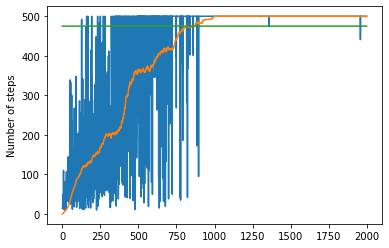

In [21]:

env = gym.make('CartPole-v1')
nbEpisodes = 2000
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = defaultdict(lambda : {'count':0, 'value':0}, key="some_value")# 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes,negative=False)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()






  0%|          | 0/2000 [00:00<?, ?it/s]




  0%|          | 0/2000 [00:06<?, ?it/s, last_100_avg_pole_upright=-500, len(history)=212]




  0%|          | 1/2000 [00:06<3:43:59,  6.72s/it, last_100_avg_pole_upright=-500, len(history)=212]




  0%|          | 1/2000 [00:06<3:43:59,  6.72s/it, last_100_avg_pole_upright=-500, len(history)=233]




  0%|          | 1/2000 [00:06<3:43:59,  6.72s/it, last_100_avg_pole_upright=-500, len(history)=234]




  0%|          | 3/2000 [00:06<2:37:21,  4.73s/it, last_100_avg_pole_upright=-500, len(history)=234]






{'Episode 0. Iteration with pole upright: -500.0. History length: 212'}


  0%|          | 3/2000 [00:06<2:37:21,  4.73s/it, last_100_avg_pole_upright=-500, len(history)=238]




  0%|          | 3/2000 [00:07<2:37:21,  4.73s/it, last_100_avg_pole_upright=-500, len(history)=238]




  0%|          | 5/2000 [00:07<1:50:43,  3.33s/it, last_100_avg_pole_upright=-500, len(history)=238]




  0%|          | 5/2000 [00:07<1:50:43,  3.33s/it, last_100_avg_pole_upright=-500, len(history)=243]




  0%|          | 5/2000 [00:07<1:50:43,  3.33s/it, last_100_avg_pole_upright=-500, len(history)=317]




  0%|          | 7/2000 [00:07<1:18:07,  2.35s/it, last_100_avg_pole_upright=-500, len(history)=317]




  0%|          | 7/2000 [00:07<1:18:07,  2.35s/it, last_100_avg_pole_upright=-500, len(history)=317]




  0%|          | 7/2000 [00:07<1:18:07,  2.35s/it, last_100_avg_pole_upright=-500, len(history)=318]




  0%|          | 9/2000 [00:07<55:19,  1.67s/it, last_100_avg_pole_upright=-500, len(history)=318]  




  0%|          | 9/2000 [00:07<55:19,  1.67s/it, last_1

  2%|▏         | 49/2000 [00:10<02:18, 14.07it/s, last_100_avg_pole_upright=-500, len(history)=530]




  2%|▏         | 49/2000 [00:10<02:18, 14.07it/s, last_100_avg_pole_upright=-500, len(history)=530]




  2%|▏         | 49/2000 [00:10<02:18, 14.07it/s, last_100_avg_pole_upright=-500, len(history)=535]




  3%|▎         | 51/2000 [00:10<02:16, 14.25it/s, last_100_avg_pole_upright=-500, len(history)=535]




  3%|▎         | 51/2000 [00:10<02:16, 14.25it/s, last_100_avg_pole_upright=-500, len(history)=535]




  3%|▎         | 51/2000 [00:10<02:16, 14.25it/s, last_100_avg_pole_upright=-500, len(history)=535]




  3%|▎         | 53/2000 [00:10<02:15, 14.34it/s, last_100_avg_pole_upright=-500, len(history)=535]




  3%|▎         | 53/2000 [00:10<02:15, 14.34it/s, last_100_avg_pole_upright=-500, len(history)=535]




  3%|▎         | 53/2000 [00:10<02:15, 14.34it/s, last_100_avg_pole_upright=-500, len(history)=537]




  3%|▎         | 55/2000 [00:10<02:14, 14.45it/s, last_100_avg_p

  5%|▍         | 93/2000 [00:13<02:14, 14.14it/s, last_100_avg_pole_upright=-500, len(history)=551]




  5%|▍         | 95/2000 [00:13<02:13, 14.29it/s, last_100_avg_pole_upright=-500, len(history)=551]




  5%|▍         | 95/2000 [00:13<02:13, 14.29it/s, last_100_avg_pole_upright=-500, len(history)=551]




  5%|▍         | 95/2000 [00:13<02:13, 14.29it/s, last_100_avg_pole_upright=-500, len(history)=551]




  5%|▍         | 97/2000 [00:13<02:12, 14.33it/s, last_100_avg_pole_upright=-500, len(history)=551]




  5%|▍         | 97/2000 [00:13<02:12, 14.33it/s, last_100_avg_pole_upright=-499, len(history)=563]




  5%|▍         | 97/2000 [00:13<02:12, 14.33it/s, last_100_avg_pole_upright=-499, len(history)=583]




  5%|▍         | 99/2000 [00:13<02:09, 14.67it/s, last_100_avg_pole_upright=-499, len(history)=583]




  5%|▍         | 99/2000 [00:13<02:09, 14.67it/s, last_100_avg_pole_upright=-499, len(history)=583]




  5%|▍         | 99/2000 [00:13<02:09, 14.67it/s, last_100_avg_p

  7%|▋         | 139/2000 [00:16<02:07, 14.62it/s, last_100_avg_pole_upright=-499, len(history)=696]




  7%|▋         | 139/2000 [00:16<02:07, 14.62it/s, last_100_avg_pole_upright=-499, len(history)=702]




  7%|▋         | 141/2000 [00:16<02:07, 14.63it/s, last_100_avg_pole_upright=-499, len(history)=702]




  7%|▋         | 141/2000 [00:16<02:07, 14.63it/s, last_100_avg_pole_upright=-499, len(history)=702]




  7%|▋         | 141/2000 [00:16<02:07, 14.63it/s, last_100_avg_pole_upright=-499, len(history)=702]




  7%|▋         | 143/2000 [00:16<02:07, 14.61it/s, last_100_avg_pole_upright=-499, len(history)=702]




  7%|▋         | 143/2000 [00:16<02:07, 14.61it/s, last_100_avg_pole_upright=-499, len(history)=702]




  7%|▋         | 143/2000 [00:16<02:07, 14.61it/s, last_100_avg_pole_upright=-499, len(history)=702]




  7%|▋         | 145/2000 [00:16<02:06, 14.70it/s, last_100_avg_pole_upright=-499, len(history)=702]




  7%|▋         | 145/2000 [00:16<02:06, 14.70it/s, last

  9%|▉         | 185/2000 [00:19<02:05, 14.48it/s, last_100_avg_pole_upright=-498, len(history)=868]




  9%|▉         | 185/2000 [00:19<02:05, 14.48it/s, last_100_avg_pole_upright=-498, len(history)=868]




  9%|▉         | 185/2000 [00:19<02:05, 14.48it/s, last_100_avg_pole_upright=-498, len(history)=879]




  9%|▉         | 187/2000 [00:19<02:05, 14.49it/s, last_100_avg_pole_upright=-498, len(history)=879]




  9%|▉         | 187/2000 [00:19<02:05, 14.49it/s, last_100_avg_pole_upright=-498, len(history)=936]




  9%|▉         | 187/2000 [00:19<02:05, 14.49it/s, last_100_avg_pole_upright=-498, len(history)=936]




  9%|▉         | 189/2000 [00:19<02:07, 14.25it/s, last_100_avg_pole_upright=-498, len(history)=936]




  9%|▉         | 189/2000 [00:19<02:07, 14.25it/s, last_100_avg_pole_upright=-498, len(history)=936]




  9%|▉         | 189/2000 [00:19<02:07, 14.25it/s, last_100_avg_pole_upright=-498, len(history)=936]




 10%|▉         | 191/2000 [00:19<02:07, 14.23it/s, last

 11%|█▏        | 229/2000 [00:22<01:59, 14.80it/s, last_100_avg_pole_upright=-498, len(history)=1018]




 11%|█▏        | 229/2000 [00:22<01:59, 14.80it/s, last_100_avg_pole_upright=-498, len(history)=1018]




 12%|█▏        | 231/2000 [00:22<02:00, 14.72it/s, last_100_avg_pole_upright=-498, len(history)=1018]




 12%|█▏        | 231/2000 [00:22<02:00, 14.72it/s, last_100_avg_pole_upright=-498, len(history)=1025]




 12%|█▏        | 231/2000 [00:22<02:00, 14.72it/s, last_100_avg_pole_upright=-498, len(history)=1025]




 12%|█▏        | 233/2000 [00:22<02:00, 14.67it/s, last_100_avg_pole_upright=-498, len(history)=1025]




 12%|█▏        | 233/2000 [00:22<02:00, 14.67it/s, last_100_avg_pole_upright=-498, len(history)=1025]




 12%|█▏        | 233/2000 [00:22<02:00, 14.67it/s, last_100_avg_pole_upright=-498, len(history)=1025]




 12%|█▏        | 235/2000 [00:22<02:00, 14.67it/s, last_100_avg_pole_upright=-498, len(history)=1025]




 12%|█▏        | 235/2000 [00:23<02:00, 14.67i

 14%|█▎        | 273/2000 [00:25<01:58, 14.63it/s, last_100_avg_pole_upright=-495, len(history)=1151]




 14%|█▍        | 275/2000 [00:25<01:57, 14.74it/s, last_100_avg_pole_upright=-495, len(history)=1151]




 14%|█▍        | 275/2000 [00:25<01:57, 14.74it/s, last_100_avg_pole_upright=-495, len(history)=1151]




 14%|█▍        | 275/2000 [00:25<01:57, 14.74it/s, last_100_avg_pole_upright=-495, len(history)=1151]




 14%|█▍        | 277/2000 [00:25<01:57, 14.69it/s, last_100_avg_pole_upright=-495, len(history)=1151]




 14%|█▍        | 277/2000 [00:25<01:57, 14.69it/s, last_100_avg_pole_upright=-495, len(history)=1151]




 14%|█▍        | 277/2000 [00:26<01:57, 14.69it/s, last_100_avg_pole_upright=-495, len(history)=1151]




 14%|█▍        | 279/2000 [00:26<01:58, 14.49it/s, last_100_avg_pole_upright=-495, len(history)=1151]




 14%|█▍        | 279/2000 [00:26<01:58, 14.49it/s, last_100_avg_pole_upright=-495, len(history)=1155]




 14%|█▍        | 279/2000 [00:26<01:58, 14.49i

 16%|█▌        | 318/2000 [00:28<01:56, 14.47it/s, last_100_avg_pole_upright=-490, len(history)=1216]




 16%|█▌        | 320/2000 [00:28<01:56, 14.47it/s, last_100_avg_pole_upright=-490, len(history)=1216]




 16%|█▌        | 320/2000 [00:28<01:56, 14.47it/s, last_100_avg_pole_upright=-490, len(history)=1217]




 16%|█▌        | 320/2000 [00:28<01:56, 14.47it/s, last_100_avg_pole_upright=-490, len(history)=1217]




 16%|█▌        | 322/2000 [00:28<01:55, 14.49it/s, last_100_avg_pole_upright=-490, len(history)=1217]




 16%|█▌        | 322/2000 [00:29<01:55, 14.49it/s, last_100_avg_pole_upright=-490, len(history)=1217]




 16%|█▌        | 322/2000 [00:29<01:55, 14.49it/s, last_100_avg_pole_upright=-490, len(history)=1217]




 16%|█▌        | 324/2000 [00:29<01:55, 14.45it/s, last_100_avg_pole_upright=-490, len(history)=1217]




 16%|█▌        | 324/2000 [00:29<01:55, 14.45it/s, last_100_avg_pole_upright=-490, len(history)=1217]




 16%|█▌        | 324/2000 [00:29<01:55, 14.45i

 18%|█▊        | 364/2000 [00:31<01:51, 14.63it/s, last_100_avg_pole_upright=-490, len(history)=1255]




 18%|█▊        | 364/2000 [00:31<01:51, 14.63it/s, last_100_avg_pole_upright=-490, len(history)=1255]




 18%|█▊        | 364/2000 [00:31<01:51, 14.63it/s, last_100_avg_pole_upright=-490, len(history)=1255]




 18%|█▊        | 366/2000 [00:31<01:51, 14.60it/s, last_100_avg_pole_upright=-490, len(history)=1255]




 18%|█▊        | 366/2000 [00:32<01:51, 14.60it/s, last_100_avg_pole_upright=-490, len(history)=1255]




 18%|█▊        | 366/2000 [00:32<01:51, 14.60it/s, last_100_avg_pole_upright=-488, len(history)=1255]




 18%|█▊        | 368/2000 [00:32<01:45, 15.50it/s, last_100_avg_pole_upright=-488, len(history)=1255]




 18%|█▊        | 368/2000 [00:32<01:45, 15.50it/s, last_100_avg_pole_upright=-489, len(history)=1258]




 18%|█▊        | 368/2000 [00:32<01:45, 15.50it/s, last_100_avg_pole_upright=-489, len(history)=1274]




 18%|█▊        | 370/2000 [00:32<01:48, 15.09i

{'Episode 400. Iteration with pole upright: -500.0. History length: 1287'}


 20%|██        | 403/2000 [00:41<20:13,  1.32it/s, last_100_avg_pole_upright=-489, len(history)=1287]




 20%|██        | 403/2000 [00:41<20:13,  1.32it/s, last_100_avg_pole_upright=-489, len(history)=1287]




 20%|██        | 405/2000 [00:41<14:40,  1.81it/s, last_100_avg_pole_upright=-489, len(history)=1287]




 20%|██        | 405/2000 [00:41<14:40,  1.81it/s, last_100_avg_pole_upright=-489, len(history)=1287]




 20%|██        | 405/2000 [00:41<14:40,  1.81it/s, last_100_avg_pole_upright=-489, len(history)=1287]




 20%|██        | 407/2000 [00:41<10:48,  2.46it/s, last_100_avg_pole_upright=-489, len(history)=1287]




 20%|██        | 407/2000 [00:41<10:48,  2.46it/s, last_100_avg_pole_upright=-489, len(history)=1287]




 20%|██        | 407/2000 [00:41<10:48,  2.46it/s, last_100_avg_pole_upright=-489, len(history)=1287]




 20%|██        | 409/2000 [00:41<08:08,  3.26it/s, last_100_avg_pole_upright=-489, len(history)=1287]




 20%|██        | 409/2000 [00:41<08:08,  3.26i

 22%|██▏       | 447/2000 [00:43<01:41, 15.35it/s, last_100_avg_pole_upright=-478, len(history)=1352]




 22%|██▏       | 449/2000 [00:43<01:44, 14.89it/s, last_100_avg_pole_upright=-478, len(history)=1352]




 22%|██▏       | 449/2000 [00:44<01:44, 14.89it/s, last_100_avg_pole_upright=-477, len(history)=1352]




 22%|██▏       | 449/2000 [00:44<01:44, 14.89it/s, last_100_avg_pole_upright=-477, len(history)=1352]




 23%|██▎       | 451/2000 [00:44<01:42, 15.09it/s, last_100_avg_pole_upright=-477, len(history)=1352]




 23%|██▎       | 451/2000 [00:44<01:42, 15.09it/s, last_100_avg_pole_upright=-477, len(history)=1352]




 23%|██▎       | 451/2000 [00:44<01:42, 15.09it/s, last_100_avg_pole_upright=-476, len(history)=1352]




 23%|██▎       | 453/2000 [00:44<01:39, 15.61it/s, last_100_avg_pole_upright=-476, len(history)=1352]




 23%|██▎       | 453/2000 [00:44<01:39, 15.61it/s, last_100_avg_pole_upright=-476, len(history)=1352]




 23%|██▎       | 453/2000 [00:44<01:39, 15.61i

 25%|██▍       | 493/2000 [00:46<01:30, 16.58it/s, last_100_avg_pole_upright=-467, len(history)=1387]




 25%|██▍       | 493/2000 [00:46<01:30, 16.58it/s, last_100_avg_pole_upright=-466, len(history)=1395]




 25%|██▍       | 493/2000 [00:46<01:30, 16.58it/s, last_100_avg_pole_upright=-466, len(history)=1396]




 25%|██▍       | 495/2000 [00:46<01:30, 16.57it/s, last_100_avg_pole_upright=-466, len(history)=1396]




 25%|██▍       | 495/2000 [00:46<01:30, 16.57it/s, last_100_avg_pole_upright=-466, len(history)=1396]




 25%|██▍       | 495/2000 [00:46<01:30, 16.57it/s, last_100_avg_pole_upright=-466, len(history)=1396]




 25%|██▍       | 497/2000 [00:46<01:33, 16.05it/s, last_100_avg_pole_upright=-466, len(history)=1396]




 25%|██▍       | 497/2000 [00:46<01:33, 16.05it/s, last_100_avg_pole_upright=-466, len(history)=1396]




 25%|██▍       | 497/2000 [00:47<01:33, 16.05it/s, last_100_avg_pole_upright=-466, len(history)=1396]




 25%|██▍       | 499/2000 [00:47<01:35, 15.78i

 27%|██▋       | 538/2000 [00:49<01:27, 16.64it/s, last_100_avg_pole_upright=-458, len(history)=1438]




 27%|██▋       | 538/2000 [00:49<01:27, 16.64it/s, last_100_avg_pole_upright=-458, len(history)=1438]




 27%|██▋       | 540/2000 [00:49<01:30, 16.09it/s, last_100_avg_pole_upright=-458, len(history)=1438]




 27%|██▋       | 540/2000 [00:49<01:30, 16.09it/s, last_100_avg_pole_upright=-458, len(history)=1439]




 27%|██▋       | 540/2000 [00:49<01:30, 16.09it/s, last_100_avg_pole_upright=-457, len(history)=1439]




 27%|██▋       | 542/2000 [00:49<01:26, 16.88it/s, last_100_avg_pole_upright=-457, len(history)=1439]




 27%|██▋       | 542/2000 [00:49<01:26, 16.88it/s, last_100_avg_pole_upright=-457, len(history)=1439]




 27%|██▋       | 542/2000 [00:49<01:26, 16.88it/s, last_100_avg_pole_upright=-457, len(history)=1440]




 27%|██▋       | 544/2000 [00:49<01:26, 16.77it/s, last_100_avg_pole_upright=-457, len(history)=1440]




 27%|██▋       | 544/2000 [00:49<01:26, 16.77i

 29%|██▉       | 582/2000 [00:52<01:30, 15.69it/s, last_100_avg_pole_upright=-454, len(history)=1457]




 29%|██▉       | 584/2000 [00:52<01:32, 15.35it/s, last_100_avg_pole_upright=-454, len(history)=1457]




 29%|██▉       | 584/2000 [00:52<01:32, 15.35it/s, last_100_avg_pole_upright=-456, len(history)=1457]




 29%|██▉       | 584/2000 [00:52<01:32, 15.35it/s, last_100_avg_pole_upright=-456, len(history)=1457]




 29%|██▉       | 586/2000 [00:52<01:33, 15.07it/s, last_100_avg_pole_upright=-456, len(history)=1457]




 29%|██▉       | 586/2000 [00:52<01:33, 15.07it/s, last_100_avg_pole_upright=-457, len(history)=1457]




 29%|██▉       | 586/2000 [00:52<01:33, 15.07it/s, last_100_avg_pole_upright=-457, len(history)=1457]




 29%|██▉       | 588/2000 [00:52<01:34, 14.92it/s, last_100_avg_pole_upright=-457, len(history)=1457]




 29%|██▉       | 588/2000 [00:52<01:34, 14.92it/s, last_100_avg_pole_upright=-458, len(history)=1457]




 29%|██▉       | 588/2000 [00:52<01:34, 14.92i

 31%|███▏      | 627/2000 [00:55<01:23, 16.53it/s, last_100_avg_pole_upright=-452, len(history)=1467]




 31%|███▏      | 627/2000 [00:55<01:23, 16.53it/s, last_100_avg_pole_upright=-451, len(history)=1467]




 32%|███▏      | 630/2000 [00:55<01:16, 17.85it/s, last_100_avg_pole_upright=-451, len(history)=1467]




 32%|███▏      | 630/2000 [00:55<01:16, 17.85it/s, last_100_avg_pole_upright=-452, len(history)=1467]




 32%|███▏      | 630/2000 [00:55<01:16, 17.85it/s, last_100_avg_pole_upright=-453, len(history)=1468]




 32%|███▏      | 632/2000 [00:55<01:19, 17.30it/s, last_100_avg_pole_upright=-453, len(history)=1468]




 32%|███▏      | 632/2000 [00:55<01:19, 17.30it/s, last_100_avg_pole_upright=-450, len(history)=1468]




 32%|███▏      | 632/2000 [00:55<01:19, 17.30it/s, last_100_avg_pole_upright=-449, len(history)=1468]




 32%|███▏      | 632/2000 [00:55<01:19, 17.30it/s, last_100_avg_pole_upright=-447, len(history)=1468]




 32%|███▏      | 635/2000 [00:55<01:12, 18.91i

 34%|███▎      | 674/2000 [00:57<01:17, 17.15it/s, last_100_avg_pole_upright=-447, len(history)=1508]




 34%|███▎      | 674/2000 [00:57<01:17, 17.15it/s, last_100_avg_pole_upright=-447, len(history)=1508]




 34%|███▎      | 674/2000 [00:57<01:17, 17.15it/s, last_100_avg_pole_upright=-447, len(history)=1508]




 34%|███▍      | 676/2000 [00:57<01:20, 16.50it/s, last_100_avg_pole_upright=-447, len(history)=1508]




 34%|███▍      | 676/2000 [00:57<01:20, 16.50it/s, last_100_avg_pole_upright=-445, len(history)=1508]




 34%|███▍      | 676/2000 [00:58<01:20, 16.50it/s, last_100_avg_pole_upright=-446, len(history)=1508]




 34%|███▍      | 678/2000 [00:58<01:16, 17.34it/s, last_100_avg_pole_upright=-446, len(history)=1508]




 34%|███▍      | 678/2000 [00:58<01:16, 17.34it/s, last_100_avg_pole_upright=-446, len(history)=1508]




 34%|███▍      | 678/2000 [00:58<01:16, 17.34it/s, last_100_avg_pole_upright=-446, len(history)=1508]




 34%|███▍      | 680/2000 [00:58<01:17, 16.98i

 36%|███▌      | 719/2000 [01:00<01:16, 16.74it/s, last_100_avg_pole_upright=-438, len(history)=1535]




 36%|███▌      | 719/2000 [01:00<01:16, 16.74it/s, last_100_avg_pole_upright=-437, len(history)=1535]




 36%|███▌      | 719/2000 [01:00<01:16, 16.74it/s, last_100_avg_pole_upright=-438, len(history)=1535]




 36%|███▌      | 721/2000 [01:00<01:20, 15.93it/s, last_100_avg_pole_upright=-438, len(history)=1535]




 36%|███▌      | 721/2000 [01:00<01:20, 15.93it/s, last_100_avg_pole_upright=-437, len(history)=1535]




 36%|███▌      | 721/2000 [01:00<01:20, 15.93it/s, last_100_avg_pole_upright=-436, len(history)=1535]




 36%|███▌      | 723/2000 [01:00<01:17, 16.47it/s, last_100_avg_pole_upright=-436, len(history)=1535]




 36%|███▌      | 723/2000 [01:00<01:17, 16.47it/s, last_100_avg_pole_upright=-435, len(history)=1546]




 36%|███▌      | 723/2000 [01:00<01:17, 16.47it/s, last_100_avg_pole_upright=-435, len(history)=1548]




 36%|███▋      | 725/2000 [01:00<01:18, 16.25i

 38%|███▊      | 763/2000 [01:03<01:13, 16.88it/s, last_100_avg_pole_upright=-441, len(history)=1555]




 38%|███▊      | 763/2000 [01:03<01:13, 16.88it/s, last_100_avg_pole_upright=-440, len(history)=1555]




 38%|███▊      | 765/2000 [01:03<01:13, 16.72it/s, last_100_avg_pole_upright=-440, len(history)=1555]




 38%|███▊      | 765/2000 [01:03<01:13, 16.72it/s, last_100_avg_pole_upright=-440, len(history)=1555]




 38%|███▊      | 765/2000 [01:03<01:13, 16.72it/s, last_100_avg_pole_upright=-439, len(history)=1555]




 38%|███▊      | 767/2000 [01:03<01:14, 16.64it/s, last_100_avg_pole_upright=-439, len(history)=1555]




 38%|███▊      | 767/2000 [01:03<01:14, 16.64it/s, last_100_avg_pole_upright=-440, len(history)=1555]




 38%|███▊      | 767/2000 [01:03<01:14, 16.64it/s, last_100_avg_pole_upright=-440, len(history)=1555]




 38%|███▊      | 769/2000 [01:03<01:16, 16.03it/s, last_100_avg_pole_upright=-440, len(history)=1555]




 38%|███▊      | 769/2000 [01:03<01:16, 16.03i

{'Episode 800. Iteration with pole upright: -343.0. History length: 1559'}







 40%|████      | 803/2000 [01:10<10:40,  1.87it/s, last_100_avg_pole_upright=-439, len(history)=1560]




 40%|████      | 805/2000 [01:10<07:48,  2.55it/s, last_100_avg_pole_upright=-439, len(history)=1560]




 40%|████      | 805/2000 [01:10<07:48,  2.55it/s, last_100_avg_pole_upright=-439, len(history)=1560]




 40%|████      | 805/2000 [01:10<07:48,  2.55it/s, last_100_avg_pole_upright=-440, len(history)=1560]




 40%|████      | 807/2000 [01:10<05:52,  3.38it/s, last_100_avg_pole_upright=-440, len(history)=1560]




 40%|████      | 807/2000 [01:10<05:52,  3.38it/s, last_100_avg_pole_upright=-440, len(history)=1560]




 40%|████      | 807/2000 [01:10<05:52,  3.38it/s, last_100_avg_pole_upright=-438, len(history)=1560]




 40%|████      | 809/2000 [01:10<04:25,  4.48it/s, last_100_avg_pole_upright=-438, len(history)=1560]




 40%|████      | 809/2000 [01:10<04:25,  4.48it/s, last_100_avg_pole_upright=-438, len(history)=1560]




 40%|████      | 809/2000 [01:10<04:25,  

 42%|████▏     | 848/2000 [01:12<01:05, 17.70it/s, last_100_avg_pole_upright=-443, len(history)=1572]




 42%|████▏     | 848/2000 [01:13<01:05, 17.70it/s, last_100_avg_pole_upright=-441, len(history)=1572]




 43%|████▎     | 851/2000 [01:13<00:59, 19.17it/s, last_100_avg_pole_upright=-441, len(history)=1572]




 43%|████▎     | 851/2000 [01:13<00:59, 19.17it/s, last_100_avg_pole_upright=-441, len(history)=1572]




 43%|████▎     | 851/2000 [01:13<00:59, 19.17it/s, last_100_avg_pole_upright=-440, len(history)=1575]




 43%|████▎     | 851/2000 [01:13<00:59, 19.17it/s, last_100_avg_pole_upright=-440, len(history)=1575]




 43%|████▎     | 854/2000 [01:13<00:58, 19.53it/s, last_100_avg_pole_upright=-440, len(history)=1575]




 43%|████▎     | 854/2000 [01:13<00:58, 19.53it/s, last_100_avg_pole_upright=-440, len(history)=1575]




 43%|████▎     | 854/2000 [01:13<00:58, 19.53it/s, last_100_avg_pole_upright=-440, len(history)=1575]




 43%|████▎     | 856/2000 [01:13<01:03, 17.98i

 45%|████▍     | 894/2000 [01:15<01:03, 17.45it/s, last_100_avg_pole_upright=-436, len(history)=1606]




 45%|████▍     | 896/2000 [01:15<01:03, 17.33it/s, last_100_avg_pole_upright=-436, len(history)=1606]




 45%|████▍     | 896/2000 [01:15<01:03, 17.33it/s, last_100_avg_pole_upright=-436, len(history)=1606]




 45%|████▍     | 896/2000 [01:15<01:03, 17.33it/s, last_100_avg_pole_upright=-436, len(history)=1606]




 45%|████▍     | 898/2000 [01:15<01:07, 16.45it/s, last_100_avg_pole_upright=-436, len(history)=1606]




 45%|████▍     | 898/2000 [01:15<01:07, 16.45it/s, last_100_avg_pole_upright=-435, len(history)=1606]




 45%|████▍     | 898/2000 [01:15<01:07, 16.45it/s, last_100_avg_pole_upright=-433, len(history)=1606]




 45%|████▍     | 898/2000 [01:15<01:07, 16.45it/s, last_100_avg_pole_upright=-433, len(history)=1606]




 45%|████▌     | 901/2000 [01:15<01:02, 17.48it/s, last_100_avg_pole_upright=-433, len(history)=1606]




 45%|████▌     | 901/2000 [01:16<01:02, 17.48i

 47%|████▋     | 940/2000 [01:18<01:01, 17.12it/s, last_100_avg_pole_upright=-425, len(history)=1617]




 47%|████▋     | 940/2000 [01:18<01:01, 17.12it/s, last_100_avg_pole_upright=-423, len(history)=1617]




 47%|████▋     | 942/2000 [01:18<01:01, 17.26it/s, last_100_avg_pole_upright=-423, len(history)=1617]




 47%|████▋     | 942/2000 [01:18<01:01, 17.26it/s, last_100_avg_pole_upright=-424, len(history)=1617]




 47%|████▋     | 942/2000 [01:18<01:01, 17.26it/s, last_100_avg_pole_upright=-423, len(history)=1618]




 47%|████▋     | 944/2000 [01:18<00:59, 17.75it/s, last_100_avg_pole_upright=-423, len(history)=1618]




 47%|████▋     | 944/2000 [01:18<00:59, 17.75it/s, last_100_avg_pole_upright=-425, len(history)=1618]




 47%|████▋     | 944/2000 [01:18<00:59, 17.75it/s, last_100_avg_pole_upright=-425, len(history)=1618]




 47%|████▋     | 946/2000 [01:18<01:03, 16.70it/s, last_100_avg_pole_upright=-425, len(history)=1618]




 47%|████▋     | 946/2000 [01:18<01:03, 16.70i

 49%|████▉     | 986/2000 [01:21<01:00, 16.66it/s, last_100_avg_pole_upright=-428, len(history)=1630]




 49%|████▉     | 986/2000 [01:21<01:00, 16.66it/s, last_100_avg_pole_upright=-429, len(history)=1630]




 49%|████▉     | 986/2000 [01:21<01:00, 16.66it/s, last_100_avg_pole_upright=-427, len(history)=1630]




 49%|████▉     | 988/2000 [01:21<00:59, 16.93it/s, last_100_avg_pole_upright=-427, len(history)=1630]




 49%|████▉     | 988/2000 [01:21<00:59, 16.93it/s, last_100_avg_pole_upright=-427, len(history)=1630]




 49%|████▉     | 988/2000 [01:21<00:59, 16.93it/s, last_100_avg_pole_upright=-429, len(history)=1630]




 50%|████▉     | 990/2000 [01:21<01:01, 16.40it/s, last_100_avg_pole_upright=-429, len(history)=1630]




 50%|████▉     | 990/2000 [01:21<01:01, 16.40it/s, last_100_avg_pole_upright=-430, len(history)=1631]




 50%|████▉     | 990/2000 [01:21<01:01, 16.40it/s, last_100_avg_pole_upright=-430, len(history)=1632]




 50%|████▉     | 992/2000 [01:21<01:00, 16.73i

 52%|█████▏    | 1030/2000 [01:23<01:00, 16.08it/s, last_100_avg_pole_upright=-433, len(history)=1642]




 52%|█████▏    | 1032/2000 [01:23<01:00, 15.92it/s, last_100_avg_pole_upright=-433, len(history)=1642]




 52%|█████▏    | 1032/2000 [01:23<01:00, 15.92it/s, last_100_avg_pole_upright=-433, len(history)=1645]




 52%|█████▏    | 1032/2000 [01:23<01:00, 15.92it/s, last_100_avg_pole_upright=-434, len(history)=1645]




 52%|█████▏    | 1034/2000 [01:23<01:02, 15.54it/s, last_100_avg_pole_upright=-434, len(history)=1645]




 52%|█████▏    | 1034/2000 [01:24<01:02, 15.54it/s, last_100_avg_pole_upright=-436, len(history)=1645]




 52%|█████▏    | 1034/2000 [01:24<01:02, 15.54it/s, last_100_avg_pole_upright=-437, len(history)=1645]




 52%|█████▏    | 1036/2000 [01:24<01:02, 15.47it/s, last_100_avg_pole_upright=-437, len(history)=1645]




 52%|█████▏    | 1036/2000 [01:24<01:02, 15.47it/s, last_100_avg_pole_upright=-436, len(history)=1645]




 52%|█████▏    | 1036/2000 [01:24<01:

 54%|█████▍    | 1075/2000 [01:26<00:55, 16.64it/s, last_100_avg_pole_upright=-437, len(history)=1660]




 54%|█████▍    | 1077/2000 [01:26<00:54, 16.91it/s, last_100_avg_pole_upright=-437, len(history)=1660]




 54%|█████▍    | 1077/2000 [01:26<00:54, 16.91it/s, last_100_avg_pole_upright=-437, len(history)=1661]




 54%|█████▍    | 1077/2000 [01:26<00:54, 16.91it/s, last_100_avg_pole_upright=-437, len(history)=1661]




 54%|█████▍    | 1079/2000 [01:26<00:56, 16.23it/s, last_100_avg_pole_upright=-437, len(history)=1661]




 54%|█████▍    | 1079/2000 [01:26<00:56, 16.23it/s, last_100_avg_pole_upright=-437, len(history)=1663]




 54%|█████▍    | 1079/2000 [01:26<00:56, 16.23it/s, last_100_avg_pole_upright=-437, len(history)=1663]




 54%|█████▍    | 1081/2000 [01:26<00:56, 16.18it/s, last_100_avg_pole_upright=-437, len(history)=1663]




 54%|█████▍    | 1081/2000 [01:26<00:56, 16.18it/s, last_100_avg_pole_upright=-437, len(history)=1663]




 54%|█████▍    | 1081/2000 [01:26<00:

 56%|█████▌    | 1121/2000 [01:29<00:55, 15.92it/s, last_100_avg_pole_upright=-438, len(history)=1663]




 56%|█████▌    | 1121/2000 [01:29<00:55, 15.92it/s, last_100_avg_pole_upright=-439, len(history)=1663]




 56%|█████▌    | 1123/2000 [01:29<00:56, 15.56it/s, last_100_avg_pole_upright=-439, len(history)=1663]




 56%|█████▌    | 1123/2000 [01:29<00:56, 15.56it/s, last_100_avg_pole_upright=-436, len(history)=1663]




 56%|█████▌    | 1123/2000 [01:29<00:56, 15.56it/s, last_100_avg_pole_upright=-438, len(history)=1663]




 56%|█████▋    | 1125/2000 [01:29<00:52, 16.56it/s, last_100_avg_pole_upright=-438, len(history)=1663]




 56%|█████▋    | 1125/2000 [01:29<00:52, 16.56it/s, last_100_avg_pole_upright=-436, len(history)=1663]




 56%|█████▋    | 1125/2000 [01:29<00:52, 16.56it/s, last_100_avg_pole_upright=-435, len(history)=1663]




 56%|█████▋    | 1125/2000 [01:29<00:52, 16.56it/s, last_100_avg_pole_upright=-436, len(history)=1663]




 56%|█████▋    | 1128/2000 [01:29<00:

 58%|█████▊    | 1167/2000 [01:31<00:45, 18.41it/s, last_100_avg_pole_upright=-425, len(history)=1670]




 58%|█████▊    | 1169/2000 [01:31<00:46, 17.83it/s, last_100_avg_pole_upright=-425, len(history)=1670]




 58%|█████▊    | 1169/2000 [01:32<00:46, 17.83it/s, last_100_avg_pole_upright=-425, len(history)=1670]




 58%|█████▊    | 1169/2000 [01:32<00:46, 17.83it/s, last_100_avg_pole_upright=-426, len(history)=1670]




 59%|█████▊    | 1171/2000 [01:32<00:49, 16.69it/s, last_100_avg_pole_upright=-426, len(history)=1670]




 59%|█████▊    | 1171/2000 [01:32<00:49, 16.69it/s, last_100_avg_pole_upright=-425, len(history)=1670]




 59%|█████▊    | 1171/2000 [01:32<00:49, 16.69it/s, last_100_avg_pole_upright=-426, len(history)=1670]




 59%|█████▊    | 1173/2000 [01:32<00:49, 16.83it/s, last_100_avg_pole_upright=-426, len(history)=1670]




 59%|█████▊    | 1173/2000 [01:32<00:49, 16.83it/s, last_100_avg_pole_upright=-426, len(history)=1670]




 59%|█████▊    | 1173/2000 [01:32<00:

{'Episode 1200. Iteration with pole upright: -500.0. History length: 1675'}


 60%|██████    | 1204/2000 [01:40<09:55,  1.34it/s, last_100_avg_pole_upright=-414, len(history)=1677]




 60%|██████    | 1204/2000 [01:40<09:55,  1.34it/s, last_100_avg_pole_upright=-412, len(history)=1677]




 60%|██████    | 1206/2000 [01:40<07:09,  1.85it/s, last_100_avg_pole_upright=-412, len(history)=1677]




 60%|██████    | 1206/2000 [01:40<07:09,  1.85it/s, last_100_avg_pole_upright=-412, len(history)=1678]




 60%|██████    | 1206/2000 [01:40<07:09,  1.85it/s, last_100_avg_pole_upright=-414, len(history)=1678]




 60%|██████    | 1208/2000 [01:40<05:15,  2.51it/s, last_100_avg_pole_upright=-414, len(history)=1678]




 60%|██████    | 1208/2000 [01:40<05:15,  2.51it/s, last_100_avg_pole_upright=-414, len(history)=1678]




 60%|██████    | 1208/2000 [01:40<05:15,  2.51it/s, last_100_avg_pole_upright=-414, len(history)=1678]




 60%|██████    | 1210/2000 [01:40<03:53,  3.39it/s, last_100_avg_pole_upright=-414, len(history)=1678]




 60%|██████    | 1210/2000 [01:40<03:

 62%|██████▏   | 1249/2000 [01:43<00:44, 16.72it/s, last_100_avg_pole_upright=-408, len(history)=1685]




 63%|██████▎   | 1251/2000 [01:43<00:45, 16.54it/s, last_100_avg_pole_upright=-408, len(history)=1685]




 63%|██████▎   | 1251/2000 [01:43<00:45, 16.54it/s, last_100_avg_pole_upright=-410, len(history)=1685]




 63%|██████▎   | 1251/2000 [01:43<00:45, 16.54it/s, last_100_avg_pole_upright=-408, len(history)=1686]




 63%|██████▎   | 1253/2000 [01:43<00:43, 16.99it/s, last_100_avg_pole_upright=-408, len(history)=1686]




 63%|██████▎   | 1253/2000 [01:43<00:43, 16.99it/s, last_100_avg_pole_upright=-408, len(history)=1686]




 63%|██████▎   | 1253/2000 [01:43<00:43, 16.99it/s, last_100_avg_pole_upright=-407, len(history)=1686]




 63%|██████▎   | 1255/2000 [01:43<00:43, 17.31it/s, last_100_avg_pole_upright=-407, len(history)=1686]




 63%|██████▎   | 1255/2000 [01:43<00:43, 17.31it/s, last_100_avg_pole_upright=-407, len(history)=1686]




 63%|██████▎   | 1255/2000 [01:43<00:

 65%|██████▍   | 1294/2000 [01:45<00:39, 17.91it/s, last_100_avg_pole_upright=-418, len(history)=1695]




 65%|██████▍   | 1296/2000 [01:45<00:38, 18.41it/s, last_100_avg_pole_upright=-418, len(history)=1695]




 65%|██████▍   | 1296/2000 [01:45<00:38, 18.41it/s, last_100_avg_pole_upright=-418, len(history)=1695]




 65%|██████▍   | 1296/2000 [01:45<00:38, 18.41it/s, last_100_avg_pole_upright=-417, len(history)=1695]




 65%|██████▍   | 1298/2000 [01:45<00:39, 17.75it/s, last_100_avg_pole_upright=-417, len(history)=1695]




 65%|██████▍   | 1298/2000 [01:46<00:39, 17.75it/s, last_100_avg_pole_upright=-417, len(history)=1695]




 65%|██████▍   | 1298/2000 [01:46<00:39, 17.75it/s, last_100_avg_pole_upright=-417, len(history)=1695]




 65%|██████▌   | 1300/2000 [01:46<00:39, 17.91it/s, last_100_avg_pole_upright=-417, len(history)=1695]




 65%|██████▌   | 1300/2000 [01:46<00:39, 17.91it/s, last_100_avg_pole_upright=-418, len(history)=1695]




 65%|██████▌   | 1300/2000 [01:46<00:

 67%|██████▋   | 1340/2000 [01:48<00:35, 18.77it/s, last_100_avg_pole_upright=-411, len(history)=1702]




 67%|██████▋   | 1342/2000 [01:48<00:35, 18.77it/s, last_100_avg_pole_upright=-411, len(history)=1702]




 67%|██████▋   | 1342/2000 [01:48<00:35, 18.77it/s, last_100_avg_pole_upright=-411, len(history)=1703]




 67%|██████▋   | 1342/2000 [01:48<00:35, 18.77it/s, last_100_avg_pole_upright=-409, len(history)=1703]




 67%|██████▋   | 1344/2000 [01:48<00:34, 18.88it/s, last_100_avg_pole_upright=-409, len(history)=1703]




 67%|██████▋   | 1344/2000 [01:48<00:34, 18.88it/s, last_100_avg_pole_upright=-409, len(history)=1703]




 67%|██████▋   | 1344/2000 [01:48<00:34, 18.88it/s, last_100_avg_pole_upright=-410, len(history)=1703]




 67%|██████▋   | 1346/2000 [01:48<00:35, 18.50it/s, last_100_avg_pole_upright=-410, len(history)=1703]




 67%|██████▋   | 1346/2000 [01:48<00:35, 18.50it/s, last_100_avg_pole_upright=-410, len(history)=1703]




 67%|██████▋   | 1346/2000 [01:48<00:

 69%|██████▉   | 1387/2000 [01:50<00:34, 17.84it/s, last_100_avg_pole_upright=-404, len(history)=1708]




 69%|██████▉   | 1387/2000 [01:51<00:34, 17.84it/s, last_100_avg_pole_upright=-403, len(history)=1708]




 69%|██████▉   | 1387/2000 [01:51<00:34, 17.84it/s, last_100_avg_pole_upright=-404, len(history)=1708]




 69%|██████▉   | 1389/2000 [01:51<00:33, 18.10it/s, last_100_avg_pole_upright=-404, len(history)=1708]




 69%|██████▉   | 1389/2000 [01:51<00:33, 18.10it/s, last_100_avg_pole_upright=-402, len(history)=1708]




 69%|██████▉   | 1389/2000 [01:51<00:33, 18.10it/s, last_100_avg_pole_upright=-403, len(history)=1708]




 69%|██████▉   | 1389/2000 [01:51<00:33, 18.10it/s, last_100_avg_pole_upright=-403, len(history)=1709]




 70%|██████▉   | 1392/2000 [01:51<00:33, 18.22it/s, last_100_avg_pole_upright=-403, len(history)=1709]




 70%|██████▉   | 1392/2000 [01:51<00:33, 18.22it/s, last_100_avg_pole_upright=-402, len(history)=1709]




 70%|██████▉   | 1392/2000 [01:51<00:

 72%|███████▏  | 1433/2000 [01:53<00:33, 17.00it/s, last_100_avg_pole_upright=-403, len(history)=1726]




 72%|███████▏  | 1433/2000 [01:53<00:33, 17.00it/s, last_100_avg_pole_upright=-402, len(history)=1726]




 72%|███████▏  | 1435/2000 [01:53<00:33, 16.96it/s, last_100_avg_pole_upright=-402, len(history)=1726]




 72%|███████▏  | 1435/2000 [01:53<00:33, 16.96it/s, last_100_avg_pole_upright=-403, len(history)=1726]




 72%|███████▏  | 1435/2000 [01:53<00:33, 16.96it/s, last_100_avg_pole_upright=-402, len(history)=1726]




 72%|███████▏  | 1435/2000 [01:53<00:33, 16.96it/s, last_100_avg_pole_upright=-402, len(history)=1726]




 72%|███████▏  | 1438/2000 [01:53<00:31, 17.76it/s, last_100_avg_pole_upright=-402, len(history)=1726]




 72%|███████▏  | 1438/2000 [01:53<00:31, 17.76it/s, last_100_avg_pole_upright=-403, len(history)=1726]




 72%|███████▏  | 1438/2000 [01:53<00:31, 17.76it/s, last_100_avg_pole_upright=-405, len(history)=1726]




 72%|███████▏  | 1440/2000 [01:53<00:

 74%|███████▍  | 1478/2000 [01:56<00:31, 16.43it/s, last_100_avg_pole_upright=-416, len(history)=1735]




 74%|███████▍  | 1480/2000 [01:56<00:30, 17.01it/s, last_100_avg_pole_upright=-416, len(history)=1735]




 74%|███████▍  | 1480/2000 [01:56<00:30, 17.01it/s, last_100_avg_pole_upright=-414, len(history)=1735]




 74%|███████▍  | 1480/2000 [01:56<00:30, 17.01it/s, last_100_avg_pole_upright=-414, len(history)=1735]




 74%|███████▍  | 1480/2000 [01:56<00:30, 17.01it/s, last_100_avg_pole_upright=-415, len(history)=1736]




 74%|███████▍  | 1483/2000 [01:56<00:29, 17.30it/s, last_100_avg_pole_upright=-415, len(history)=1736]




 74%|███████▍  | 1483/2000 [01:56<00:29, 17.30it/s, last_100_avg_pole_upright=-417, len(history)=1736]




 74%|███████▍  | 1483/2000 [01:56<00:29, 17.30it/s, last_100_avg_pole_upright=-416, len(history)=1736]




 74%|███████▍  | 1485/2000 [01:56<00:30, 16.93it/s, last_100_avg_pole_upright=-416, len(history)=1736]




 74%|███████▍  | 1485/2000 [01:56<00:

 76%|███████▋  | 1525/2000 [01:58<00:28, 16.85it/s, last_100_avg_pole_upright=-430, len(history)=1738]




 76%|███████▋  | 1525/2000 [01:59<00:28, 16.85it/s, last_100_avg_pole_upright=-433, len(history)=1738]




 76%|███████▋  | 1525/2000 [01:59<00:28, 16.85it/s, last_100_avg_pole_upright=-432, len(history)=1738]




 76%|███████▋  | 1527/2000 [01:59<00:28, 16.88it/s, last_100_avg_pole_upright=-432, len(history)=1738]




 76%|███████▋  | 1527/2000 [01:59<00:28, 16.88it/s, last_100_avg_pole_upright=-431, len(history)=1738]




 76%|███████▋  | 1527/2000 [01:59<00:28, 16.88it/s, last_100_avg_pole_upright=-429, len(history)=1738]




 76%|███████▋  | 1527/2000 [01:59<00:28, 16.88it/s, last_100_avg_pole_upright=-431, len(history)=1738]




 76%|███████▋  | 1530/2000 [01:59<00:26, 17.51it/s, last_100_avg_pole_upright=-431, len(history)=1738]




 76%|███████▋  | 1530/2000 [01:59<00:26, 17.51it/s, last_100_avg_pole_upright=-432, len(history)=1738]




 76%|███████▋  | 1530/2000 [01:59<00:

 78%|███████▊  | 1568/2000 [02:01<00:25, 17.05it/s, last_100_avg_pole_upright=-426, len(history)=1748]




 79%|███████▊  | 1571/2000 [02:01<00:23, 17.95it/s, last_100_avg_pole_upright=-426, len(history)=1748]




 79%|███████▊  | 1571/2000 [02:01<00:23, 17.95it/s, last_100_avg_pole_upright=-425, len(history)=1748]




 79%|███████▊  | 1571/2000 [02:01<00:23, 17.95it/s, last_100_avg_pole_upright=-425, len(history)=1748]




 79%|███████▊  | 1573/2000 [02:01<00:23, 18.22it/s, last_100_avg_pole_upright=-425, len(history)=1748]




 79%|███████▊  | 1573/2000 [02:01<00:23, 18.22it/s, last_100_avg_pole_upright=-427, len(history)=1748]




 79%|███████▊  | 1573/2000 [02:01<00:23, 18.22it/s, last_100_avg_pole_upright=-425, len(history)=1748]




 79%|███████▉  | 1575/2000 [02:01<00:23, 18.17it/s, last_100_avg_pole_upright=-425, len(history)=1748]




 79%|███████▉  | 1575/2000 [02:01<00:23, 18.17it/s, last_100_avg_pole_upright=-427, len(history)=1748]




 79%|███████▉  | 1575/2000 [02:01<00:

{'Episode 1600. Iteration with pole upright: -329.0. History length: 1749'}







 80%|████████  | 1604/2000 [02:07<03:23,  1.94it/s, last_100_avg_pole_upright=-425, len(history)=1749]




 80%|████████  | 1604/2000 [02:07<03:23,  1.94it/s, last_100_avg_pole_upright=-427, len(history)=1749]




 80%|████████  | 1606/2000 [02:07<02:29,  2.64it/s, last_100_avg_pole_upright=-427, len(history)=1749]




 80%|████████  | 1606/2000 [02:08<02:29,  2.64it/s, last_100_avg_pole_upright=-425, len(history)=1749]




 80%|████████  | 1606/2000 [02:08<02:29,  2.64it/s, last_100_avg_pole_upright=-425, len(history)=1749]




 80%|████████  | 1608/2000 [02:08<01:50,  3.54it/s, last_100_avg_pole_upright=-425, len(history)=1749]




 80%|████████  | 1608/2000 [02:08<01:50,  3.54it/s, last_100_avg_pole_upright=-425, len(history)=1749]




 80%|████████  | 1608/2000 [02:08<01:50,  3.54it/s, last_100_avg_pole_upright=-424, len(history)=1749]




 80%|████████  | 1610/2000 [02:08<01:24,  4.61it/s, last_100_avg_pole_upright=-424, len(history)=1749]




 80%|████████  | 1610/2000 [02:0

 82%|████████▎ | 1650/2000 [02:10<00:18, 19.09it/s, last_100_avg_pole_upright=-406, len(history)=1752]




 83%|████████▎ | 1653/2000 [02:10<00:17, 19.39it/s, last_100_avg_pole_upright=-406, len(history)=1752]




 83%|████████▎ | 1653/2000 [02:10<00:17, 19.39it/s, last_100_avg_pole_upright=-405, len(history)=1752]




 83%|████████▎ | 1653/2000 [02:10<00:17, 19.39it/s, last_100_avg_pole_upright=-405, len(history)=1752]




 83%|████████▎ | 1655/2000 [02:10<00:18, 18.80it/s, last_100_avg_pole_upright=-405, len(history)=1752]




 83%|████████▎ | 1655/2000 [02:10<00:18, 18.80it/s, last_100_avg_pole_upright=-402, len(history)=1752]




 83%|████████▎ | 1655/2000 [02:10<00:18, 18.80it/s, last_100_avg_pole_upright=-400, len(history)=1752]




 83%|████████▎ | 1655/2000 [02:10<00:18, 18.80it/s, last_100_avg_pole_upright=-402, len(history)=1752]




 83%|████████▎ | 1658/2000 [02:10<00:17, 19.04it/s, last_100_avg_pole_upright=-402, len(history)=1752]




 83%|████████▎ | 1658/2000 [02:10<00:

 85%|████████▍ | 1698/2000 [02:13<00:18, 15.90it/s, last_100_avg_pole_upright=-403, len(history)=1757]




 85%|████████▍ | 1698/2000 [02:13<00:18, 15.90it/s, last_100_avg_pole_upright=-404, len(history)=1757]




 85%|████████▍ | 1698/2000 [02:13<00:18, 15.90it/s, last_100_avg_pole_upright=-404, len(history)=1757]




 85%|████████▌ | 1700/2000 [02:13<00:19, 15.67it/s, last_100_avg_pole_upright=-404, len(history)=1757]




 85%|████████▌ | 1700/2000 [02:13<00:19, 15.67it/s, last_100_avg_pole_upright=-405, len(history)=1757]




 85%|████████▌ | 1700/2000 [02:13<00:19, 15.67it/s, last_100_avg_pole_upright=-406, len(history)=1757]




 85%|████████▌ | 1702/2000 [02:13<00:18, 15.79it/s, last_100_avg_pole_upright=-406, len(history)=1757]




 85%|████████▌ | 1702/2000 [02:13<00:18, 15.79it/s, last_100_avg_pole_upright=-406, len(history)=1757]




 85%|████████▌ | 1702/2000 [02:13<00:18, 15.79it/s, last_100_avg_pole_upright=-405, len(history)=1757]




 85%|████████▌ | 1704/2000 [02:13<00:

 87%|████████▋ | 1744/2000 [02:15<00:13, 18.40it/s, last_100_avg_pole_upright=-412, len(history)=1782]




 87%|████████▋ | 1744/2000 [02:15<00:13, 18.40it/s, last_100_avg_pole_upright=-411, len(history)=1782]




 87%|████████▋ | 1744/2000 [02:15<00:13, 18.40it/s, last_100_avg_pole_upright=-411, len(history)=1782]




 87%|████████▋ | 1746/2000 [02:15<00:13, 18.82it/s, last_100_avg_pole_upright=-411, len(history)=1782]




 87%|████████▋ | 1746/2000 [02:15<00:13, 18.82it/s, last_100_avg_pole_upright=-410, len(history)=1782]




 87%|████████▋ | 1746/2000 [02:15<00:13, 18.82it/s, last_100_avg_pole_upright=-411, len(history)=1782]




 87%|████████▋ | 1748/2000 [02:15<00:13, 18.61it/s, last_100_avg_pole_upright=-411, len(history)=1782]




 87%|████████▋ | 1748/2000 [02:15<00:13, 18.61it/s, last_100_avg_pole_upright=-411, len(history)=1782]




 87%|████████▋ | 1748/2000 [02:16<00:13, 18.61it/s, last_100_avg_pole_upright=-413, len(history)=1782]




 88%|████████▊ | 1750/2000 [02:16<00:

 89%|████████▉ | 1788/2000 [02:18<00:12, 17.27it/s, last_100_avg_pole_upright=-423, len(history)=1784]




 90%|████████▉ | 1790/2000 [02:18<00:12, 16.96it/s, last_100_avg_pole_upright=-423, len(history)=1784]




 90%|████████▉ | 1790/2000 [02:18<00:12, 16.96it/s, last_100_avg_pole_upright=-423, len(history)=1784]




 90%|████████▉ | 1790/2000 [02:18<00:12, 16.96it/s, last_100_avg_pole_upright=-424, len(history)=1784]




 90%|████████▉ | 1792/2000 [02:18<00:12, 16.62it/s, last_100_avg_pole_upright=-424, len(history)=1784]




 90%|████████▉ | 1792/2000 [02:18<00:12, 16.62it/s, last_100_avg_pole_upright=-423, len(history)=1784]




 90%|████████▉ | 1792/2000 [02:18<00:12, 16.62it/s, last_100_avg_pole_upright=-423, len(history)=1784]




 90%|████████▉ | 1794/2000 [02:18<00:12, 17.01it/s, last_100_avg_pole_upright=-423, len(history)=1784]




 90%|████████▉ | 1794/2000 [02:18<00:12, 17.01it/s, last_100_avg_pole_upright=-425, len(history)=1784]




 90%|████████▉ | 1794/2000 [02:18<00:

 92%|█████████▏| 1836/2000 [02:20<00:08, 18.49it/s, last_100_avg_pole_upright=-408, len(history)=1785]




 92%|█████████▏| 1836/2000 [02:20<00:08, 18.49it/s, last_100_avg_pole_upright=-409, len(history)=1785]




 92%|█████████▏| 1836/2000 [02:20<00:08, 18.49it/s, last_100_avg_pole_upright=-408, len(history)=1785]




 92%|█████████▏| 1838/2000 [02:20<00:08, 18.16it/s, last_100_avg_pole_upright=-408, len(history)=1785]




 92%|█████████▏| 1838/2000 [02:21<00:08, 18.16it/s, last_100_avg_pole_upright=-408, len(history)=1785]




 92%|█████████▏| 1838/2000 [02:21<00:08, 18.16it/s, last_100_avg_pole_upright=-408, len(history)=1785]




 92%|█████████▏| 1840/2000 [02:21<00:09, 17.70it/s, last_100_avg_pole_upright=-408, len(history)=1785]




 92%|█████████▏| 1840/2000 [02:21<00:09, 17.70it/s, last_100_avg_pole_upright=-408, len(history)=1785]




 92%|█████████▏| 1840/2000 [02:21<00:09, 17.70it/s, last_100_avg_pole_upright=-407, len(history)=1785]




 92%|█████████▏| 1842/2000 [02:21<00:

 94%|█████████▍| 1880/2000 [02:23<00:06, 19.18it/s, last_100_avg_pole_upright=-399, len(history)=1788]




 94%|█████████▍| 1883/2000 [02:23<00:06, 19.16it/s, last_100_avg_pole_upright=-399, len(history)=1788]




 94%|█████████▍| 1883/2000 [02:23<00:06, 19.16it/s, last_100_avg_pole_upright=-400, len(history)=1788]




 94%|█████████▍| 1883/2000 [02:23<00:06, 19.16it/s, last_100_avg_pole_upright=-400, len(history)=1788]




 94%|█████████▍| 1883/2000 [02:23<00:06, 19.16it/s, last_100_avg_pole_upright=-399, len(history)=1788]




 94%|█████████▍| 1886/2000 [02:23<00:05, 19.47it/s, last_100_avg_pole_upright=-399, len(history)=1788]




 94%|█████████▍| 1886/2000 [02:23<00:05, 19.47it/s, last_100_avg_pole_upright=-399, len(history)=1788]




 94%|█████████▍| 1886/2000 [02:23<00:05, 19.47it/s, last_100_avg_pole_upright=-400, len(history)=1788]




 94%|█████████▍| 1888/2000 [02:23<00:06, 17.89it/s, last_100_avg_pole_upright=-400, len(history)=1788]




 94%|█████████▍| 1888/2000 [02:23<00:

 96%|█████████▋| 1926/2000 [02:26<00:04, 17.30it/s, last_100_avg_pole_upright=-408, len(history)=1790]




 96%|█████████▋| 1929/2000 [02:26<00:03, 18.31it/s, last_100_avg_pole_upright=-408, len(history)=1790]




 96%|█████████▋| 1929/2000 [02:26<00:03, 18.31it/s, last_100_avg_pole_upright=-410, len(history)=1790]




 96%|█████████▋| 1929/2000 [02:26<00:03, 18.31it/s, last_100_avg_pole_upright=-410, len(history)=1790]




 97%|█████████▋| 1931/2000 [02:26<00:03, 18.51it/s, last_100_avg_pole_upright=-410, len(history)=1790]




 97%|█████████▋| 1931/2000 [02:26<00:03, 18.51it/s, last_100_avg_pole_upright=-411, len(history)=1790]




 97%|█████████▋| 1931/2000 [02:26<00:03, 18.51it/s, last_100_avg_pole_upright=-411, len(history)=1790]




 97%|█████████▋| 1931/2000 [02:26<00:03, 18.51it/s, last_100_avg_pole_upright=-411, len(history)=1790]




 97%|█████████▋| 1934/2000 [02:26<00:03, 19.03it/s, last_100_avg_pole_upright=-411, len(history)=1790]




 97%|█████████▋| 1934/2000 [02:26<00:

 99%|█████████▊| 1974/2000 [02:28<00:01, 17.30it/s, last_100_avg_pole_upright=-414, len(history)=1793]




 99%|█████████▊| 1974/2000 [02:28<00:01, 17.30it/s, last_100_avg_pole_upright=-414, len(history)=1793]




 99%|█████████▊| 1974/2000 [02:28<00:01, 17.30it/s, last_100_avg_pole_upright=-416, len(history)=1793]




 99%|█████████▉| 1976/2000 [02:28<00:01, 16.66it/s, last_100_avg_pole_upright=-416, len(history)=1793]




 99%|█████████▉| 1976/2000 [02:28<00:01, 16.66it/s, last_100_avg_pole_upright=-415, len(history)=1793]




 99%|█████████▉| 1976/2000 [02:28<00:01, 16.66it/s, last_100_avg_pole_upright=-417, len(history)=1793]




 99%|█████████▉| 1978/2000 [02:28<00:01, 17.48it/s, last_100_avg_pole_upright=-417, len(history)=1793]




 99%|█████████▉| 1978/2000 [02:28<00:01, 17.48it/s, last_100_avg_pole_upright=-417, len(history)=1793]




 99%|█████████▉| 1978/2000 [02:28<00:01, 17.48it/s, last_100_avg_pole_upright=-416, len(history)=1793]




 99%|█████████▉| 1978/2000 [02:28<00:

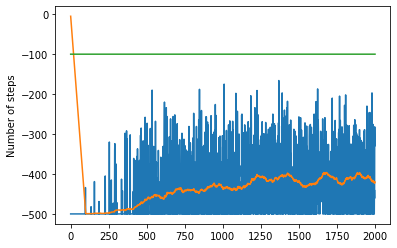

In [26]:
env = gym.make('Acrobot-v1')
nbEpisodes = 2000
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = defaultdict(lambda : {'count':0, 'value':0}, key="some_value")# 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes,negative=False)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()






  0%|          | 0/200 [00:00<?, ?it/s]




  0%|          | 0/200 [00:02<?, ?it/s, last_100_avg_pole_upright=-1.2e+3, len(history)=35]




  0%|          | 1/200 [00:02<09:02,  2.73s/it, last_100_avg_pole_upright=-1.2e+3, len(history)=35]




  0%|          | 1/200 [00:02<09:02,  2.73s/it, last_100_avg_pole_upright=-1.4e+3, len(history)=35]




  0%|          | 1/200 [00:02<09:02,  2.73s/it, last_100_avg_pole_upright=-1.32e+3, len(history)=41]




  2%|▏         | 3/200 [00:02<06:18,  1.92s/it, last_100_avg_pole_upright=-1.32e+3, len(history)=41]

{'Episode 0. Iteration with pole upright: -1202.1260057086477. History length: 35'}







  2%|▏         | 3/200 [00:03<06:18,  1.92s/it, last_100_avg_pole_upright=-1.45e+3, len(history)=41]




  2%|▏         | 4/200 [00:03<04:34,  1.40s/it, last_100_avg_pole_upright=-1.45e+3, len(history)=41]




  2%|▏         | 4/200 [00:03<04:34,  1.40s/it, last_100_avg_pole_upright=-1.39e+3, len(history)=48]




  2%|▏         | 4/200 [00:03<04:34,  1.40s/it, last_100_avg_pole_upright=-1.46e+3, len(history)=48]




  3%|▎         | 6/200 [00:03<03:21,  1.04s/it, last_100_avg_pole_upright=-1.46e+3, len(history)=48]




  3%|▎         | 6/200 [00:03<03:21,  1.04s/it, last_100_avg_pole_upright=-1.43e+3, len(history)=51]




  4%|▎         | 7/200 [00:03<02:26,  1.31it/s, last_100_avg_pole_upright=-1.43e+3, len(history)=51]




  4%|▎         | 7/200 [00:03<02:26,  1.31it/s, last_100_avg_pole_upright=-1.47e+3, len(history)=51]




  4%|▍         | 8/200 [00:03<02:04,  1.54it/s, last_100_avg_pole_upright=-1.47e+3, len(history)=51]




  4%|▍         | 8/200 [00:04<02:04,  1.54it/s, la

 20%|█▉        | 39/200 [00:17<01:21,  1.96it/s, last_100_avg_pole_upright=-1.35e+3, len(history)=59]




 20%|█▉        | 39/200 [00:18<01:21,  1.96it/s, last_100_avg_pole_upright=-1.35e+3, len(history)=59]




 20%|██        | 40/200 [00:18<01:35,  1.67it/s, last_100_avg_pole_upright=-1.35e+3, len(history)=59]




 20%|██        | 40/200 [00:20<01:35,  1.67it/s, last_100_avg_pole_upright=-1.35e+3, len(history)=59]




 20%|██        | 41/200 [00:20<03:13,  1.22s/it, last_100_avg_pole_upright=-1.35e+3, len(history)=59]

{'Episode 40. Iteration with pole upright: -1149.6690346226994. History length: 59'}







 20%|██        | 41/200 [00:21<03:13,  1.22s/it, last_100_avg_pole_upright=-1.34e+3, len(history)=59]




 21%|██        | 42/200 [00:21<02:46,  1.06s/it, last_100_avg_pole_upright=-1.34e+3, len(history)=59]




 21%|██        | 42/200 [00:22<02:46,  1.06s/it, last_100_avg_pole_upright=-1.34e+3, len(history)=59]




 22%|██▏       | 43/200 [00:22<02:34,  1.02it/s, last_100_avg_pole_upright=-1.34e+3, len(history)=59]




 22%|██▏       | 43/200 [00:22<02:34,  1.02it/s, last_100_avg_pole_upright=-1.34e+3, len(history)=59]




 22%|██▏       | 44/200 [00:22<02:07,  1.22it/s, last_100_avg_pole_upright=-1.34e+3, len(history)=59]




 22%|██▏       | 44/200 [00:23<02:07,  1.22it/s, last_100_avg_pole_upright=-1.34e+3, len(history)=59]




 22%|██▎       | 45/200 [00:23<01:59,  1.30it/s, last_100_avg_pole_upright=-1.34e+3, len(history)=59]




 22%|██▎       | 45/200 [00:24<01:59,  1.30it/s, last_100_avg_pole_upright=-1.35e+3, len(history)=59]




 23%|██▎       | 46/200 [00:24<02:28,  1.

 38%|███▊      | 75/200 [01:02<02:52,  1.38s/it, last_100_avg_pole_upright=-1.38e+3, len(history)=61]




 38%|███▊      | 75/200 [01:02<02:52,  1.38s/it, last_100_avg_pole_upright=-1.37e+3, len(history)=61]




 38%|███▊      | 76/200 [01:02<02:10,  1.06s/it, last_100_avg_pole_upright=-1.37e+3, len(history)=61]




 38%|███▊      | 76/200 [01:05<02:10,  1.06s/it, last_100_avg_pole_upright=-1.38e+3, len(history)=61]




 38%|███▊      | 77/200 [01:05<03:20,  1.63s/it, last_100_avg_pole_upright=-1.38e+3, len(history)=61]




 38%|███▊      | 77/200 [01:07<03:20,  1.63s/it, last_100_avg_pole_upright=-1.38e+3, len(history)=61]




 39%|███▉      | 78/200 [01:07<03:08,  1.54s/it, last_100_avg_pole_upright=-1.38e+3, len(history)=61]




 39%|███▉      | 78/200 [01:08<03:08,  1.54s/it, last_100_avg_pole_upright=-1.38e+3, len(history)=61]




 40%|███▉      | 79/200 [01:08<03:01,  1.50s/it, last_100_avg_pole_upright=-1.38e+3, len(history)=61]




 40%|███▉      | 79/200 [01:08<03:01,  1.50s/i

{'Episode 80. Iteration with pole upright: -963.622771839118. History length: 62'}







 40%|████      | 81/200 [01:14<03:14,  1.63s/it, last_100_avg_pole_upright=-1.37e+3, len(history)=62]




 41%|████      | 82/200 [01:14<03:52,  1.97s/it, last_100_avg_pole_upright=-1.37e+3, len(history)=62]




 41%|████      | 82/200 [01:15<03:52,  1.97s/it, last_100_avg_pole_upright=-1.37e+3, len(history)=62]




 42%|████▏     | 83/200 [01:15<03:33,  1.82s/it, last_100_avg_pole_upright=-1.37e+3, len(history)=62]




 42%|████▏     | 83/200 [01:16<03:33,  1.82s/it, last_100_avg_pole_upright=-1.37e+3, len(history)=63]




 42%|████▏     | 84/200 [01:16<02:36,  1.35s/it, last_100_avg_pole_upright=-1.37e+3, len(history)=63]




 42%|████▏     | 84/200 [01:16<02:36,  1.35s/it, last_100_avg_pole_upright=-1.37e+3, len(history)=63]




 42%|████▎     | 85/200 [01:16<02:00,  1.05s/it, last_100_avg_pole_upright=-1.37e+3, len(history)=63]




 42%|████▎     | 85/200 [01:17<02:00,  1.05s/it, last_100_avg_pole_upright=-1.36e+3, len(history)=63]




 43%|████▎     | 86/200 [01:17<01:52,  1.

 57%|█████▊    | 115/200 [02:25<03:49,  2.70s/it, last_100_avg_pole_upright=-1.39e+3, len(history)=63]




 57%|█████▊    | 115/200 [02:30<03:49,  2.70s/it, last_100_avg_pole_upright=-1.39e+3, len(history)=63]




 58%|█████▊    | 116/200 [02:30<04:43,  3.37s/it, last_100_avg_pole_upright=-1.39e+3, len(history)=63]




 58%|█████▊    | 116/200 [02:33<04:43,  3.37s/it, last_100_avg_pole_upright=-1.4e+3, len(history)=63] 




 58%|█████▊    | 117/200 [02:33<04:15,  3.08s/it, last_100_avg_pole_upright=-1.4e+3, len(history)=63]




 58%|█████▊    | 117/200 [02:33<04:15,  3.08s/it, last_100_avg_pole_upright=-1.4e+3, len(history)=63]




 59%|█████▉    | 118/200 [02:33<03:07,  2.29s/it, last_100_avg_pole_upright=-1.4e+3, len(history)=63]




 59%|█████▉    | 118/200 [02:36<03:07,  2.29s/it, last_100_avg_pole_upright=-1.4e+3, len(history)=63]




 60%|█████▉    | 119/200 [02:36<03:06,  2.31s/it, last_100_avg_pole_upright=-1.4e+3, len(history)=63]




 60%|█████▉    | 119/200 [02:40<03:06,  2.

{'Episode 120. Iteration with pole upright: -1280.1067533805997. History length: 63'}







 60%|██████    | 121/200 [02:44<03:54,  2.97s/it, last_100_avg_pole_upright=-1.39e+3, len(history)=63]




 61%|██████    | 122/200 [02:44<03:01,  2.33s/it, last_100_avg_pole_upright=-1.39e+3, len(history)=63]




 61%|██████    | 122/200 [02:44<03:01,  2.33s/it, last_100_avg_pole_upright=-1.39e+3, len(history)=63]




 62%|██████▏   | 123/200 [02:44<02:16,  1.78s/it, last_100_avg_pole_upright=-1.39e+3, len(history)=63]




 62%|██████▏   | 123/200 [02:49<02:16,  1.78s/it, last_100_avg_pole_upright=-1.4e+3, len(history)=63] 




 62%|██████▏   | 124/200 [02:49<03:20,  2.63s/it, last_100_avg_pole_upright=-1.4e+3, len(history)=63]




 62%|██████▏   | 124/200 [02:50<03:20,  2.63s/it, last_100_avg_pole_upright=-1.4e+3, len(history)=63]




 62%|██████▎   | 125/200 [02:50<02:35,  2.07s/it, last_100_avg_pole_upright=-1.4e+3, len(history)=63]




 62%|██████▎   | 125/200 [02:55<02:35,  2.07s/it, last_100_avg_pole_upright=-1.4e+3, len(history)=63]




 63%|██████▎   | 126/200 [02:55<03:4

 78%|███████▊  | 155/200 [04:29<01:54,  2.53s/it, last_100_avg_pole_upright=-1.42e+3, len(history)=63]




 78%|███████▊  | 155/200 [04:32<01:54,  2.53s/it, last_100_avg_pole_upright=-1.42e+3, len(history)=63]




 78%|███████▊  | 156/200 [04:32<01:57,  2.67s/it, last_100_avg_pole_upright=-1.42e+3, len(history)=63]




 78%|███████▊  | 156/200 [04:36<01:57,  2.67s/it, last_100_avg_pole_upright=-1.42e+3, len(history)=63]




 78%|███████▊  | 157/200 [04:36<02:19,  3.25s/it, last_100_avg_pole_upright=-1.42e+3, len(history)=63]




 78%|███████▊  | 157/200 [04:39<02:19,  3.25s/it, last_100_avg_pole_upright=-1.42e+3, len(history)=63]




 79%|███████▉  | 158/200 [04:39<02:16,  3.25s/it, last_100_avg_pole_upright=-1.42e+3, len(history)=63]




 79%|███████▉  | 158/200 [04:44<02:16,  3.25s/it, last_100_avg_pole_upright=-1.43e+3, len(history)=63]




 80%|███████▉  | 159/200 [04:44<02:34,  3.77s/it, last_100_avg_pole_upright=-1.43e+3, len(history)=63]




 80%|███████▉  | 159/200 [04:50<02:34

{'Episode 160. Iteration with pole upright: -1468.1010607348674. History length: 63'}







 80%|████████  | 161/200 [04:58<02:43,  4.18s/it, last_100_avg_pole_upright=-1.43e+3, len(history)=63]




 81%|████████  | 162/200 [04:58<02:42,  4.28s/it, last_100_avg_pole_upright=-1.43e+3, len(history)=63]




 81%|████████  | 162/200 [05:03<02:42,  4.28s/it, last_100_avg_pole_upright=-1.43e+3, len(history)=63]




 82%|████████▏ | 163/200 [05:03<02:39,  4.31s/it, last_100_avg_pole_upright=-1.43e+3, len(history)=63]




 82%|████████▏ | 163/200 [05:10<02:39,  4.31s/it, last_100_avg_pole_upright=-1.43e+3, len(history)=63]




 82%|████████▏ | 164/200 [05:10<03:04,  5.13s/it, last_100_avg_pole_upright=-1.43e+3, len(history)=63]




 82%|████████▏ | 164/200 [05:13<03:04,  5.13s/it, last_100_avg_pole_upright=-1.43e+3, len(history)=63]




 82%|████████▎ | 165/200 [05:13<02:39,  4.56s/it, last_100_avg_pole_upright=-1.43e+3, len(history)=63]




 82%|████████▎ | 165/200 [05:18<02:39,  4.56s/it, last_100_avg_pole_upright=-1.44e+3, len(history)=63]




 83%|████████▎ | 166/200 [05:18<

 98%|█████████▊| 195/200 [07:33<00:18,  3.66s/it, last_100_avg_pole_upright=-1.48e+3, len(history)=63]




 98%|█████████▊| 195/200 [07:38<00:18,  3.66s/it, last_100_avg_pole_upright=-1.49e+3, len(history)=63]




 98%|█████████▊| 196/200 [07:38<00:15,  3.91s/it, last_100_avg_pole_upright=-1.49e+3, len(history)=63]




 98%|█████████▊| 196/200 [07:46<00:15,  3.91s/it, last_100_avg_pole_upright=-1.49e+3, len(history)=63]




 98%|█████████▊| 197/200 [07:46<00:15,  5.25s/it, last_100_avg_pole_upright=-1.49e+3, len(history)=63]




 98%|█████████▊| 197/200 [07:50<00:15,  5.25s/it, last_100_avg_pole_upright=-1.49e+3, len(history)=63]




 99%|█████████▉| 198/200 [07:50<00:09,  4.90s/it, last_100_avg_pole_upright=-1.49e+3, len(history)=63]




 99%|█████████▉| 198/200 [07:52<00:09,  4.90s/it, last_100_avg_pole_upright=-1.48e+3, len(history)=63]




100%|█████████▉| 199/200 [07:52<00:03,  3.80s/it, last_100_avg_pole_upright=-1.48e+3, len(history)=63]




100%|█████████▉| 199/200 [07:56<00:03

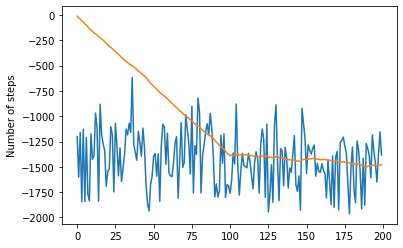

In [25]:
env = gym.make('Pendulum-v0')
nbEpisodes = 200
nVerboseEpisodes = 40
rewardHistory = [0]*nbEpisodes

history = defaultdict(lambda : {'count':0, 'value':0}, key="some_value")# 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes,negative=False)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()






  0%|          | 0/2000 [00:00<?, ?it/s]




  0%|          | 0/2000 [00:02<?, ?it/s, last_100_avg_pole_upright=-200, len(history)=3]




  0%|          | 1/2000 [00:02<1:30:48,  2.73s/it, last_100_avg_pole_upright=-200, len(history)=3]




  0%|          | 1/2000 [00:02<1:30:48,  2.73s/it, last_100_avg_pole_upright=-200, len(history)=3]




  0%|          | 1/2000 [00:02<1:30:48,  2.73s/it, last_100_avg_pole_upright=-200, len(history)=5]




  0%|          | 1/2000 [00:02<1:30:48,  2.73s/it, last_100_avg_pole_upright=-200, len(history)=7]




  0%|          | 1/2000 [00:02<1:30:48,  2.73s/it, last_100_avg_pole_upright=-200, len(history)=7]




  0%|          | 1/2000 [00:02<1:30:48,  2.73s/it, last_100_avg_pole_upright=-200, len(history)=7]




  0%|          | 1/2000 [00:02<1:30:48,  2.73s/it, last_100_avg_pole_upright=-200, len(history)=7]




  0%|          | 1/2000 [00:02<1:30:48,  2.73s/it, last_100_avg_pole_upright=-200, len(history)=7]




  0%|          | 1/2000 [00:02<1:

{'Episode 0. Iteration with pole upright: -200.0. History length: 3'}


  0%|          | 9/2000 [00:02<1:03:26,  1.91s/it, last_100_avg_pole_upright=-200, len(history)=7]




  1%|          | 17/2000 [00:02<44:20,  1.34s/it, last_100_avg_pole_upright=-200, len(history)=7] 




  1%|          | 17/2000 [00:02<44:20,  1.34s/it, last_100_avg_pole_upright=-200, len(history)=7]




  1%|          | 17/2000 [00:02<44:20,  1.34s/it, last_100_avg_pole_upright=-200, len(history)=7]




  1%|          | 17/2000 [00:02<44:20,  1.34s/it, last_100_avg_pole_upright=-200, len(history)=7]




  1%|          | 17/2000 [00:02<44:20,  1.34s/it, last_100_avg_pole_upright=-200, len(history)=7]




  1%|          | 17/2000 [00:02<44:20,  1.34s/it, last_100_avg_pole_upright=-200, len(history)=7]




  1%|          | 17/2000 [00:02<44:20,  1.34s/it, last_100_avg_pole_upright=-200, len(history)=7]




  1%|          | 17/2000 [00:03<44:20,  1.34s/it, last_100_avg_pole_upright=-200, len(history)=7]




  1%|          | 17/2000 [00:03<44:20,  1.34s/it, last_100_avg_pole_upright=-200

  3%|▎         | 69/2000 [00:03<07:31,  4.27it/s, last_100_avg_pole_upright=-181, len(history)=7]




  4%|▍         | 81/2000 [00:03<05:19,  6.01it/s, last_100_avg_pole_upright=-181, len(history)=7]




  4%|▍         | 81/2000 [00:03<05:19,  6.01it/s, last_100_avg_pole_upright=-181, len(history)=7]




  4%|▍         | 81/2000 [00:03<05:19,  6.01it/s, last_100_avg_pole_upright=-181, len(history)=7]




  4%|▍         | 81/2000 [00:03<05:19,  6.01it/s, last_100_avg_pole_upright=-180, len(history)=7]




  4%|▍         | 81/2000 [00:03<05:19,  6.01it/s, last_100_avg_pole_upright=-180, len(history)=7]




  4%|▍         | 81/2000 [00:03<05:19,  6.01it/s, last_100_avg_pole_upright=-179, len(history)=7]




  4%|▍         | 81/2000 [00:03<05:19,  6.01it/s, last_100_avg_pole_upright=-179, len(history)=7]




  4%|▍         | 81/2000 [00:03<05:19,  6.01it/s, last_100_avg_pole_upright=-178, len(history)=7]




  4%|▍         | 81/2000 [00:03<05:19,  6.01it/s, last_100_avg_pole_upright=-178, 

  7%|▋         | 137/2000 [00:04<01:06, 27.91it/s, last_100_avg_pole_upright=-170, len(history)=7]




  7%|▋         | 137/2000 [00:04<01:06, 27.91it/s, last_100_avg_pole_upright=-170, len(history)=7]




  7%|▋         | 137/2000 [00:04<01:06, 27.91it/s, last_100_avg_pole_upright=-170, len(history)=7]




  7%|▋         | 137/2000 [00:04<01:06, 27.91it/s, last_100_avg_pole_upright=-171, len(history)=7]




  7%|▋         | 137/2000 [00:04<01:06, 27.91it/s, last_100_avg_pole_upright=-171, len(history)=7]




  7%|▋         | 148/2000 [00:04<00:52, 35.44it/s, last_100_avg_pole_upright=-171, len(history)=7]




  7%|▋         | 148/2000 [00:04<00:52, 35.44it/s, last_100_avg_pole_upright=-171, len(history)=7]




  7%|▋         | 148/2000 [00:04<00:52, 35.44it/s, last_100_avg_pole_upright=-171, len(history)=7]




  7%|▋         | 148/2000 [00:04<00:52, 35.44it/s, last_100_avg_pole_upright=-171, len(history)=7]




  7%|▋         | 148/2000 [00:04<00:52, 35.44it/s, last_100_avg_pole_upri

 10%|█         | 205/2000 [00:04<00:22, 78.55it/s, last_100_avg_pole_upright=-171, len(history)=7]




 10%|█         | 205/2000 [00:04<00:22, 78.55it/s, last_100_avg_pole_upright=-171, len(history)=7]




 10%|█         | 205/2000 [00:04<00:22, 78.55it/s, last_100_avg_pole_upright=-170, len(history)=7]




 10%|█         | 205/2000 [00:04<00:22, 78.55it/s, last_100_avg_pole_upright=-169, len(history)=7]




 10%|█         | 205/2000 [00:04<00:22, 78.55it/s, last_100_avg_pole_upright=-169, len(history)=7]




 10%|█         | 205/2000 [00:04<00:22, 78.55it/s, last_100_avg_pole_upright=-170, len(history)=7]




 10%|█         | 205/2000 [00:04<00:22, 78.55it/s, last_100_avg_pole_upright=-169, len(history)=7]




 10%|█         | 205/2000 [00:04<00:22, 78.55it/s, last_100_avg_pole_upright=-169, len(history)=7]




 10%|█         | 205/2000 [00:04<00:22, 78.55it/s, last_100_avg_pole_upright=-169, len(history)=7]




 10%|█         | 205/2000 [00:04<00:22, 78.55it/s, last_100_avg_pole_upri

 13%|█▎        | 262/2000 [00:05<00:17, 101.92it/s, last_100_avg_pole_upright=-166, len(history)=7]




 13%|█▎        | 262/2000 [00:05<00:17, 101.92it/s, last_100_avg_pole_upright=-165, len(history)=7]




 13%|█▎        | 262/2000 [00:05<00:17, 101.92it/s, last_100_avg_pole_upright=-165, len(history)=7]




 13%|█▎        | 262/2000 [00:05<00:17, 101.92it/s, last_100_avg_pole_upright=-165, len(history)=7]




 13%|█▎        | 262/2000 [00:05<00:17, 101.92it/s, last_100_avg_pole_upright=-165, len(history)=7]




 14%|█▍        | 275/2000 [00:05<00:16, 106.41it/s, last_100_avg_pole_upright=-165, len(history)=7]




 14%|█▍        | 275/2000 [00:05<00:16, 106.41it/s, last_100_avg_pole_upright=-165, len(history)=7]




 14%|█▍        | 275/2000 [00:05<00:16, 106.41it/s, last_100_avg_pole_upright=-165, len(history)=7]




 14%|█▍        | 275/2000 [00:05<00:16, 106.41it/s, last_100_avg_pole_upright=-165, len(history)=7]




 14%|█▍        | 275/2000 [00:05<00:16, 106.41it/s, last_100_avg

 17%|█▋        | 333/2000 [00:05<00:16, 101.81it/s, last_100_avg_pole_upright=-157, len(history)=7]




 17%|█▋        | 333/2000 [00:05<00:16, 101.81it/s, last_100_avg_pole_upright=-157, len(history)=7]




 17%|█▋        | 333/2000 [00:05<00:16, 101.81it/s, last_100_avg_pole_upright=-157, len(history)=7]




 17%|█▋        | 333/2000 [00:05<00:16, 101.81it/s, last_100_avg_pole_upright=-157, len(history)=7]




 17%|█▋        | 333/2000 [00:05<00:16, 101.81it/s, last_100_avg_pole_upright=-157, len(history)=7]




 17%|█▋        | 333/2000 [00:06<00:16, 101.81it/s, last_100_avg_pole_upright=-156, len(history)=7]




 17%|█▋        | 333/2000 [00:06<00:16, 101.81it/s, last_100_avg_pole_upright=-156, len(history)=7]




 17%|█▋        | 333/2000 [00:06<00:16, 101.81it/s, last_100_avg_pole_upright=-157, len(history)=7]




 17%|█▋        | 333/2000 [00:06<00:16, 101.81it/s, last_100_avg_pole_upright=-157, len(history)=7]




 17%|█▋        | 333/2000 [00:06<00:16, 101.81it/s, last_100_avg

 20%|█▉        | 391/2000 [00:06<00:14, 109.74it/s, last_100_avg_pole_upright=-148, len(history)=7]




 20%|█▉        | 391/2000 [00:06<00:14, 109.74it/s, last_100_avg_pole_upright=-148, len(history)=7]




 20%|█▉        | 391/2000 [00:06<00:14, 109.74it/s, last_100_avg_pole_upright=-148, len(history)=7]




 20%|█▉        | 391/2000 [00:06<00:14, 109.74it/s, last_100_avg_pole_upright=-148, len(history)=7]




 20%|█▉        | 391/2000 [00:06<00:14, 109.74it/s, last_100_avg_pole_upright=-149, len(history)=7]




 20%|█▉        | 391/2000 [00:08<00:14, 109.74it/s, last_100_avg_pole_upright=-149, len(history)=7]




 20%|█▉        | 391/2000 [00:08<00:14, 109.74it/s, last_100_avg_pole_upright=-148, len(history)=7]




 20%|█▉        | 391/2000 [00:08<00:14, 109.74it/s, last_100_avg_pole_upright=-148, len(history)=7]




 20%|██        | 403/2000 [00:08<01:21, 19.59it/s, last_100_avg_pole_upright=-148, len(history)=7] 




 20%|██        | 403/2000 [00:08<01:21, 19.59it/s, last_100_avg_

{'Episode 400. Iteration with pole upright: -128.0. History length: 7'}


 21%|██        | 415/2000 [00:08<01:00, 26.09it/s, last_100_avg_pole_upright=-147, len(history)=7]




 21%|██        | 415/2000 [00:08<01:00, 26.09it/s, last_100_avg_pole_upright=-147, len(history)=7]




 21%|██        | 415/2000 [00:08<01:00, 26.09it/s, last_100_avg_pole_upright=-147, len(history)=7]




 21%|██▏       | 425/2000 [00:08<00:47, 33.37it/s, last_100_avg_pole_upright=-147, len(history)=7]




 21%|██▏       | 425/2000 [00:08<00:47, 33.37it/s, last_100_avg_pole_upright=-147, len(history)=7]




 21%|██▏       | 425/2000 [00:08<00:47, 33.37it/s, last_100_avg_pole_upright=-146, len(history)=7]




 21%|██▏       | 425/2000 [00:08<00:47, 33.37it/s, last_100_avg_pole_upright=-146, len(history)=7]




 21%|██▏       | 425/2000 [00:08<00:47, 33.37it/s, last_100_avg_pole_upright=-146, len(history)=7]




 21%|██▏       | 425/2000 [00:08<00:47, 33.37it/s, last_100_avg_pole_upright=-146, len(history)=7]




 21%|██▏       | 425/2000 [00:08<00:47, 33.37it/s, last_100_avg_pole_upri

 24%|██▍       | 485/2000 [00:09<00:18, 81.70it/s, last_100_avg_pole_upright=-142, len(history)=7]




 24%|██▍       | 485/2000 [00:09<00:18, 81.70it/s, last_100_avg_pole_upright=-143, len(history)=7]




 24%|██▍       | 485/2000 [00:09<00:18, 81.70it/s, last_100_avg_pole_upright=-143, len(history)=7]




 24%|██▍       | 485/2000 [00:09<00:18, 81.70it/s, last_100_avg_pole_upright=-143, len(history)=7]




 24%|██▍       | 485/2000 [00:09<00:18, 81.70it/s, last_100_avg_pole_upright=-143, len(history)=7]




 24%|██▍       | 485/2000 [00:09<00:18, 81.70it/s, last_100_avg_pole_upright=-143, len(history)=7]




 24%|██▍       | 485/2000 [00:09<00:18, 81.70it/s, last_100_avg_pole_upright=-142, len(history)=7]




 24%|██▍       | 485/2000 [00:09<00:18, 81.70it/s, last_100_avg_pole_upright=-142, len(history)=7]




 24%|██▍       | 485/2000 [00:09<00:18, 81.70it/s, last_100_avg_pole_upright=-143, len(history)=7]




 24%|██▍       | 485/2000 [00:09<00:18, 81.70it/s, last_100_avg_pole_upri

 27%|██▋       | 546/2000 [00:09<00:13, 106.71it/s, last_100_avg_pole_upright=-139, len(history)=7]




 27%|██▋       | 546/2000 [00:09<00:13, 106.71it/s, last_100_avg_pole_upright=-139, len(history)=7]




 27%|██▋       | 546/2000 [00:09<00:13, 106.71it/s, last_100_avg_pole_upright=-139, len(history)=7]




 27%|██▋       | 546/2000 [00:09<00:13, 106.71it/s, last_100_avg_pole_upright=-139, len(history)=7]




 27%|██▋       | 546/2000 [00:09<00:13, 106.71it/s, last_100_avg_pole_upright=-138, len(history)=7]




 27%|██▋       | 546/2000 [00:09<00:13, 106.71it/s, last_100_avg_pole_upright=-139, len(history)=7]




 27%|██▋       | 546/2000 [00:09<00:13, 106.71it/s, last_100_avg_pole_upright=-139, len(history)=7]




 27%|██▋       | 546/2000 [00:09<00:13, 106.71it/s, last_100_avg_pole_upright=-138, len(history)=7]




 27%|██▋       | 546/2000 [00:09<00:13, 106.71it/s, last_100_avg_pole_upright=-138, len(history)=7]




 27%|██▋       | 546/2000 [00:09<00:13, 106.71it/s, last_100_avg

 30%|███       | 609/2000 [00:10<00:12, 115.65it/s, last_100_avg_pole_upright=-135, len(history)=7]




 30%|███       | 609/2000 [00:10<00:12, 115.65it/s, last_100_avg_pole_upright=-136, len(history)=7]




 30%|███       | 609/2000 [00:10<00:12, 115.65it/s, last_100_avg_pole_upright=-136, len(history)=7]




 30%|███       | 609/2000 [00:10<00:12, 115.65it/s, last_100_avg_pole_upright=-136, len(history)=7]




 30%|███       | 609/2000 [00:10<00:12, 115.65it/s, last_100_avg_pole_upright=-136, len(history)=7]




 30%|███       | 609/2000 [00:10<00:12, 115.65it/s, last_100_avg_pole_upright=-136, len(history)=7]




 30%|███       | 609/2000 [00:10<00:12, 115.65it/s, last_100_avg_pole_upright=-135, len(history)=7]




 30%|███       | 609/2000 [00:10<00:12, 115.65it/s, last_100_avg_pole_upright=-135, len(history)=7]




 30%|███       | 609/2000 [00:10<00:12, 115.65it/s, last_100_avg_pole_upright=-135, len(history)=7]




 31%|███       | 621/2000 [00:10<00:11, 116.80it/s, last_100_avg

 34%|███▎      | 673/2000 [00:10<00:10, 120.78it/s, last_100_avg_pole_upright=-130, len(history)=7]




 34%|███▎      | 673/2000 [00:10<00:10, 120.78it/s, last_100_avg_pole_upright=-130, len(history)=7]




 34%|███▎      | 673/2000 [00:10<00:10, 120.78it/s, last_100_avg_pole_upright=-130, len(history)=7]




 34%|███▎      | 673/2000 [00:10<00:10, 120.78it/s, last_100_avg_pole_upright=-130, len(history)=7]




 34%|███▎      | 673/2000 [00:10<00:10, 120.78it/s, last_100_avg_pole_upright=-129, len(history)=7]




 34%|███▎      | 673/2000 [00:10<00:10, 120.78it/s, last_100_avg_pole_upright=-129, len(history)=7]




 34%|███▎      | 673/2000 [00:10<00:10, 120.78it/s, last_100_avg_pole_upright=-129, len(history)=7]




 34%|███▎      | 673/2000 [00:10<00:10, 120.78it/s, last_100_avg_pole_upright=-129, len(history)=7]




 34%|███▎      | 673/2000 [00:10<00:10, 120.78it/s, last_100_avg_pole_upright=-129, len(history)=7]




 34%|███▎      | 673/2000 [00:10<00:10, 120.78it/s, last_100_avg

 37%|███▋      | 738/2000 [00:11<00:10, 121.20it/s, last_100_avg_pole_upright=-129, len(history)=7]




 37%|███▋      | 738/2000 [00:11<00:10, 121.20it/s, last_100_avg_pole_upright=-129, len(history)=7]




 37%|███▋      | 738/2000 [00:11<00:10, 121.20it/s, last_100_avg_pole_upright=-129, len(history)=7]




 37%|███▋      | 738/2000 [00:11<00:10, 121.20it/s, last_100_avg_pole_upright=-129, len(history)=7]




 37%|███▋      | 738/2000 [00:11<00:10, 121.20it/s, last_100_avg_pole_upright=-129, len(history)=7]




 37%|███▋      | 738/2000 [00:11<00:10, 121.20it/s, last_100_avg_pole_upright=-129, len(history)=7]




 37%|███▋      | 738/2000 [00:11<00:10, 121.20it/s, last_100_avg_pole_upright=-130, len(history)=7]




 37%|███▋      | 738/2000 [00:11<00:10, 121.20it/s, last_100_avg_pole_upright=-129, len(history)=7]




 37%|███▋      | 738/2000 [00:11<00:10, 121.20it/s, last_100_avg_pole_upright=-129, len(history)=7]




 37%|███▋      | 738/2000 [00:11<00:10, 121.20it/s, last_100_avg

 40%|███▉      | 790/2000 [00:13<00:09, 121.99it/s, last_100_avg_pole_upright=-129, len(history)=7]




 40%|████      | 803/2000 [00:13<00:56, 21.07it/s, last_100_avg_pole_upright=-129, len(history)=7] 




 40%|████      | 803/2000 [00:13<00:56, 21.07it/s, last_100_avg_pole_upright=-129, len(history)=7]




 40%|████      | 803/2000 [00:13<00:56, 21.07it/s, last_100_avg_pole_upright=-128, len(history)=7]




 40%|████      | 803/2000 [00:13<00:56, 21.07it/s, last_100_avg_pole_upright=-128, len(history)=7]




 40%|████      | 803/2000 [00:13<00:56, 21.07it/s, last_100_avg_pole_upright=-129, len(history)=7]




 40%|████      | 803/2000 [00:13<00:56, 21.07it/s, last_100_avg_pole_upright=-128, len(history)=7]




 40%|████      | 803/2000 [00:13<00:56, 21.07it/s, last_100_avg_pole_upright=-129, len(history)=7]




 40%|████      | 803/2000 [00:13<00:56, 21.07it/s, last_100_avg_pole_upright=-128, len(history)=7]




 40%|████      | 803/2000 [00:13<00:56, 21.07it/s, last_100_avg_pole_up

{'Episode 800. Iteration with pole upright: -129.0. History length: 7'}


 41%|████      | 815/2000 [00:13<00:42, 27.81it/s, last_100_avg_pole_upright=-127, len(history)=7]




 41%|████      | 815/2000 [00:13<00:42, 27.81it/s, last_100_avg_pole_upright=-127, len(history)=7]




 41%|████      | 815/2000 [00:13<00:42, 27.81it/s, last_100_avg_pole_upright=-127, len(history)=7]




 41%|████      | 815/2000 [00:13<00:42, 27.81it/s, last_100_avg_pole_upright=-126, len(history)=7]




 41%|████      | 815/2000 [00:13<00:42, 27.81it/s, last_100_avg_pole_upright=-126, len(history)=7]




 41%|████▏     | 829/2000 [00:13<00:32, 36.45it/s, last_100_avg_pole_upright=-126, len(history)=7]




 41%|████▏     | 829/2000 [00:13<00:32, 36.45it/s, last_100_avg_pole_upright=-126, len(history)=7]




 41%|████▏     | 829/2000 [00:13<00:32, 36.45it/s, last_100_avg_pole_upright=-126, len(history)=7]




 41%|████▏     | 829/2000 [00:13<00:32, 36.45it/s, last_100_avg_pole_upright=-126, len(history)=7]




 41%|████▏     | 829/2000 [00:13<00:32, 36.45it/s, last_100_avg_pole_upri

 44%|████▍     | 878/2000 [00:14<00:14, 76.16it/s, last_100_avg_pole_upright=-125, len(history)=7]




 44%|████▍     | 878/2000 [00:14<00:14, 76.16it/s, last_100_avg_pole_upright=-125, len(history)=7]




 44%|████▍     | 890/2000 [00:14<00:13, 84.44it/s, last_100_avg_pole_upright=-125, len(history)=7]




 44%|████▍     | 890/2000 [00:14<00:13, 84.44it/s, last_100_avg_pole_upright=-125, len(history)=7]




 44%|████▍     | 890/2000 [00:14<00:13, 84.44it/s, last_100_avg_pole_upright=-125, len(history)=7]




 44%|████▍     | 890/2000 [00:14<00:13, 84.44it/s, last_100_avg_pole_upright=-125, len(history)=7]




 44%|████▍     | 890/2000 [00:14<00:13, 84.44it/s, last_100_avg_pole_upright=-125, len(history)=7]




 44%|████▍     | 890/2000 [00:14<00:13, 84.44it/s, last_100_avg_pole_upright=-124, len(history)=7]




 44%|████▍     | 890/2000 [00:14<00:13, 84.44it/s, last_100_avg_pole_upright=-125, len(history)=7]




 44%|████▍     | 890/2000 [00:14<00:13, 84.44it/s, last_100_avg_pole_upri

 47%|████▋     | 943/2000 [00:14<00:09, 115.08it/s, last_100_avg_pole_upright=-125, len(history)=7]




 47%|████▋     | 943/2000 [00:14<00:09, 115.08it/s, last_100_avg_pole_upright=-125, len(history)=7]




 47%|████▋     | 943/2000 [00:14<00:09, 115.08it/s, last_100_avg_pole_upright=-125, len(history)=7]




 47%|████▋     | 943/2000 [00:14<00:09, 115.08it/s, last_100_avg_pole_upright=-125, len(history)=7]




 48%|████▊     | 956/2000 [00:14<00:09, 112.29it/s, last_100_avg_pole_upright=-125, len(history)=7]




 48%|████▊     | 956/2000 [00:14<00:09, 112.29it/s, last_100_avg_pole_upright=-125, len(history)=7]




 48%|████▊     | 956/2000 [00:14<00:09, 112.29it/s, last_100_avg_pole_upright=-125, len(history)=7]




 48%|████▊     | 956/2000 [00:14<00:09, 112.29it/s, last_100_avg_pole_upright=-125, len(history)=7]




 48%|████▊     | 956/2000 [00:14<00:09, 112.29it/s, last_100_avg_pole_upright=-125, len(history)=7]




 48%|████▊     | 956/2000 [00:14<00:09, 112.29it/s, last_100_avg

 50%|█████     | 1010/2000 [00:15<00:08, 116.42it/s, last_100_avg_pole_upright=-124, len(history)=7]




 50%|█████     | 1010/2000 [00:15<00:08, 116.42it/s, last_100_avg_pole_upright=-124, len(history)=7]




 50%|█████     | 1010/2000 [00:15<00:08, 116.42it/s, last_100_avg_pole_upright=-124, len(history)=7]




 50%|█████     | 1010/2000 [00:15<00:08, 116.42it/s, last_100_avg_pole_upright=-124, len(history)=7]




 50%|█████     | 1010/2000 [00:15<00:08, 116.42it/s, last_100_avg_pole_upright=-124, len(history)=7]




 50%|█████     | 1010/2000 [00:15<00:08, 116.42it/s, last_100_avg_pole_upright=-124, len(history)=7]




 50%|█████     | 1010/2000 [00:15<00:08, 116.42it/s, last_100_avg_pole_upright=-124, len(history)=7]




 50%|█████     | 1010/2000 [00:15<00:08, 116.42it/s, last_100_avg_pole_upright=-124, len(history)=7]




 50%|█████     | 1010/2000 [00:15<00:08, 116.42it/s, last_100_avg_pole_upright=-124, len(history)=7]




 51%|█████     | 1024/2000 [00:15<00:07, 122.19it/s, la

 53%|█████▎    | 1067/2000 [00:15<00:07, 130.15it/s, last_100_avg_pole_upright=-125, len(history)=7]




 53%|█████▎    | 1067/2000 [00:15<00:07, 130.15it/s, last_100_avg_pole_upright=-125, len(history)=7]




 54%|█████▍    | 1081/2000 [00:15<00:06, 132.04it/s, last_100_avg_pole_upright=-125, len(history)=7]




 54%|█████▍    | 1081/2000 [00:15<00:06, 132.04it/s, last_100_avg_pole_upright=-125, len(history)=7]




 54%|█████▍    | 1081/2000 [00:15<00:06, 132.04it/s, last_100_avg_pole_upright=-125, len(history)=7]




 54%|█████▍    | 1081/2000 [00:15<00:06, 132.04it/s, last_100_avg_pole_upright=-125, len(history)=7]




 54%|█████▍    | 1081/2000 [00:15<00:06, 132.04it/s, last_100_avg_pole_upright=-125, len(history)=7]




 54%|█████▍    | 1081/2000 [00:15<00:06, 132.04it/s, last_100_avg_pole_upright=-125, len(history)=7]




 54%|█████▍    | 1081/2000 [00:15<00:06, 132.04it/s, last_100_avg_pole_upright=-125, len(history)=7]




 54%|█████▍    | 1081/2000 [00:15<00:06, 132.04it/s, la

 57%|█████▋    | 1137/2000 [00:16<00:06, 126.86it/s, last_100_avg_pole_upright=-125, len(history)=7]




 57%|█████▋    | 1137/2000 [00:16<00:06, 126.86it/s, last_100_avg_pole_upright=-125, len(history)=7]




 57%|█████▋    | 1137/2000 [00:16<00:06, 126.86it/s, last_100_avg_pole_upright=-125, len(history)=7]




 57%|█████▋    | 1137/2000 [00:16<00:06, 126.86it/s, last_100_avg_pole_upright=-126, len(history)=7]




 57%|█████▋    | 1137/2000 [00:16<00:06, 126.86it/s, last_100_avg_pole_upright=-126, len(history)=7]




 57%|█████▋    | 1137/2000 [00:16<00:06, 126.86it/s, last_100_avg_pole_upright=-126, len(history)=7]




 57%|█████▋    | 1137/2000 [00:16<00:06, 126.86it/s, last_100_avg_pole_upright=-126, len(history)=7]




 57%|█████▋    | 1137/2000 [00:16<00:06, 126.86it/s, last_100_avg_pole_upright=-126, len(history)=7]




 57%|█████▊    | 1150/2000 [00:16<00:06, 126.19it/s, last_100_avg_pole_upright=-126, len(history)=7]




 57%|█████▊    | 1150/2000 [00:16<00:06, 126.19it/s, la

 60%|██████    | 1202/2000 [00:18<00:37, 21.55it/s, last_100_avg_pole_upright=-125, len(history)=7]




 60%|██████    | 1202/2000 [00:18<00:37, 21.55it/s, last_100_avg_pole_upright=-125, len(history)=7]




 60%|██████    | 1202/2000 [00:18<00:37, 21.55it/s, last_100_avg_pole_upright=-125, len(history)=7]




 60%|██████    | 1202/2000 [00:18<00:37, 21.55it/s, last_100_avg_pole_upright=-125, len(history)=7]




 60%|██████    | 1202/2000 [00:18<00:37, 21.55it/s, last_100_avg_pole_upright=-125, len(history)=7]




 60%|██████    | 1202/2000 [00:18<00:37, 21.55it/s, last_100_avg_pole_upright=-125, len(history)=7]




 60%|██████    | 1202/2000 [00:18<00:37, 21.55it/s, last_100_avg_pole_upright=-125, len(history)=7]




 60%|██████    | 1202/2000 [00:18<00:37, 21.55it/s, last_100_avg_pole_upright=-125, len(history)=7]




 60%|██████    | 1202/2000 [00:18<00:37, 21.55it/s, last_100_avg_pole_upright=-125, len(history)=7]




 60%|██████    | 1202/2000 [00:18<00:37, 21.55it/s, last_100_avg

{'Episode 1200. Iteration with pole upright: -127.0. History length: 7'}


 61%|██████    | 1216/2000 [00:18<00:27, 28.83it/s, last_100_avg_pole_upright=-126, len(history)=7]




 61%|██████    | 1216/2000 [00:18<00:27, 28.83it/s, last_100_avg_pole_upright=-126, len(history)=7]




 61%|██████    | 1216/2000 [00:18<00:27, 28.83it/s, last_100_avg_pole_upright=-126, len(history)=7]




 61%|██████▏   | 1228/2000 [00:18<00:20, 37.32it/s, last_100_avg_pole_upright=-126, len(history)=7]




 61%|██████▏   | 1228/2000 [00:18<00:20, 37.32it/s, last_100_avg_pole_upright=-126, len(history)=7]




 61%|██████▏   | 1228/2000 [00:18<00:20, 37.32it/s, last_100_avg_pole_upright=-126, len(history)=7]




 61%|██████▏   | 1228/2000 [00:18<00:20, 37.32it/s, last_100_avg_pole_upright=-126, len(history)=7]




 61%|██████▏   | 1228/2000 [00:18<00:20, 37.32it/s, last_100_avg_pole_upright=-126, len(history)=7]




 61%|██████▏   | 1228/2000 [00:18<00:20, 37.32it/s, last_100_avg_pole_upright=-126, len(history)=7]




 61%|██████▏   | 1228/2000 [00:18<00:20, 37.32it/s, last_100_avg

 64%|██████▍   | 1278/2000 [00:18<00:09, 75.95it/s, last_100_avg_pole_upright=-126, len(history)=7]




 64%|██████▍   | 1278/2000 [00:18<00:09, 75.95it/s, last_100_avg_pole_upright=-126, len(history)=7]




 64%|██████▍   | 1290/2000 [00:18<00:08, 83.69it/s, last_100_avg_pole_upright=-126, len(history)=7]




 64%|██████▍   | 1290/2000 [00:18<00:08, 83.69it/s, last_100_avg_pole_upright=-126, len(history)=7]




 64%|██████▍   | 1290/2000 [00:19<00:08, 83.69it/s, last_100_avg_pole_upright=-126, len(history)=7]




 64%|██████▍   | 1290/2000 [00:19<00:08, 83.69it/s, last_100_avg_pole_upright=-126, len(history)=7]




 64%|██████▍   | 1290/2000 [00:19<00:08, 83.69it/s, last_100_avg_pole_upright=-126, len(history)=7]




 64%|██████▍   | 1290/2000 [00:19<00:08, 83.69it/s, last_100_avg_pole_upright=-126, len(history)=7]




 64%|██████▍   | 1290/2000 [00:19<00:08, 83.69it/s, last_100_avg_pole_upright=-126, len(history)=7]




 64%|██████▍   | 1290/2000 [00:19<00:08, 83.69it/s, last_100_avg

 67%|██████▋   | 1344/2000 [00:19<00:05, 113.81it/s, last_100_avg_pole_upright=-125, len(history)=7]




 67%|██████▋   | 1344/2000 [00:19<00:05, 113.81it/s, last_100_avg_pole_upright=-125, len(history)=7]




 67%|██████▋   | 1344/2000 [00:19<00:05, 113.81it/s, last_100_avg_pole_upright=-125, len(history)=7]




 67%|██████▋   | 1344/2000 [00:19<00:05, 113.81it/s, last_100_avg_pole_upright=-125, len(history)=7]




 67%|██████▋   | 1344/2000 [00:19<00:05, 113.81it/s, last_100_avg_pole_upright=-125, len(history)=7]




 67%|██████▋   | 1344/2000 [00:19<00:05, 113.81it/s, last_100_avg_pole_upright=-125, len(history)=7]




 68%|██████▊   | 1357/2000 [00:19<00:05, 117.66it/s, last_100_avg_pole_upright=-125, len(history)=7]




 68%|██████▊   | 1357/2000 [00:19<00:05, 117.66it/s, last_100_avg_pole_upright=-125, len(history)=7]




 68%|██████▊   | 1357/2000 [00:19<00:05, 117.66it/s, last_100_avg_pole_upright=-125, len(history)=7]




 68%|██████▊   | 1357/2000 [00:19<00:05, 117.66it/s, la

 70%|███████   | 1410/2000 [00:19<00:04, 120.95it/s, last_100_avg_pole_upright=-124, len(history)=7]




 70%|███████   | 1410/2000 [00:19<00:04, 120.95it/s, last_100_avg_pole_upright=-124, len(history)=7]




 70%|███████   | 1410/2000 [00:19<00:04, 120.95it/s, last_100_avg_pole_upright=-124, len(history)=7]




 70%|███████   | 1410/2000 [00:20<00:04, 120.95it/s, last_100_avg_pole_upright=-124, len(history)=7]




 70%|███████   | 1410/2000 [00:20<00:04, 120.95it/s, last_100_avg_pole_upright=-124, len(history)=7]




 70%|███████   | 1410/2000 [00:20<00:04, 120.95it/s, last_100_avg_pole_upright=-124, len(history)=7]




 70%|███████   | 1410/2000 [00:20<00:04, 120.95it/s, last_100_avg_pole_upright=-124, len(history)=7]




 70%|███████   | 1410/2000 [00:20<00:04, 120.95it/s, last_100_avg_pole_upright=-124, len(history)=7]




 70%|███████   | 1410/2000 [00:20<00:04, 120.95it/s, last_100_avg_pole_upright=-124, len(history)=7]




 71%|███████   | 1423/2000 [00:20<00:04, 119.80it/s, la

 74%|███████▍  | 1476/2000 [00:20<00:04, 121.03it/s, last_100_avg_pole_upright=-126, len(history)=7]




 74%|███████▍  | 1476/2000 [00:20<00:04, 121.03it/s, last_100_avg_pole_upright=-126, len(history)=7]




 74%|███████▍  | 1476/2000 [00:20<00:04, 121.03it/s, last_100_avg_pole_upright=-126, len(history)=7]




 74%|███████▍  | 1476/2000 [00:20<00:04, 121.03it/s, last_100_avg_pole_upright=-126, len(history)=7]




 74%|███████▍  | 1476/2000 [00:20<00:04, 121.03it/s, last_100_avg_pole_upright=-126, len(history)=7]




 74%|███████▍  | 1476/2000 [00:20<00:04, 121.03it/s, last_100_avg_pole_upright=-126, len(history)=7]




 74%|███████▍  | 1476/2000 [00:20<00:04, 121.03it/s, last_100_avg_pole_upright=-126, len(history)=7]




 74%|███████▍  | 1476/2000 [00:20<00:04, 121.03it/s, last_100_avg_pole_upright=-126, len(history)=7]




 74%|███████▍  | 1476/2000 [00:20<00:04, 121.03it/s, last_100_avg_pole_upright=-126, len(history)=7]




 74%|███████▍  | 1476/2000 [00:20<00:04, 121.03it/s, la

 76%|███████▋  | 1529/2000 [00:21<00:03, 124.77it/s, last_100_avg_pole_upright=-125, len(history)=7]




 76%|███████▋  | 1529/2000 [00:21<00:03, 124.77it/s, last_100_avg_pole_upright=-125, len(history)=7]




 77%|███████▋  | 1543/2000 [00:21<00:03, 127.01it/s, last_100_avg_pole_upright=-125, len(history)=7]




 77%|███████▋  | 1543/2000 [00:21<00:03, 127.01it/s, last_100_avg_pole_upright=-125, len(history)=7]




 77%|███████▋  | 1543/2000 [00:21<00:03, 127.01it/s, last_100_avg_pole_upright=-125, len(history)=7]




 77%|███████▋  | 1543/2000 [00:21<00:03, 127.01it/s, last_100_avg_pole_upright=-125, len(history)=7]




 77%|███████▋  | 1543/2000 [00:21<00:03, 127.01it/s, last_100_avg_pole_upright=-125, len(history)=7]




 77%|███████▋  | 1543/2000 [00:21<00:03, 127.01it/s, last_100_avg_pole_upright=-125, len(history)=7]




 77%|███████▋  | 1543/2000 [00:21<00:03, 127.01it/s, last_100_avg_pole_upright=-125, len(history)=7]




 77%|███████▋  | 1543/2000 [00:21<00:03, 127.01it/s, la

 80%|███████▉  | 1596/2000 [00:23<00:03, 122.62it/s, last_100_avg_pole_upright=-124, len(history)=7]




 80%|███████▉  | 1596/2000 [00:23<00:03, 122.62it/s, last_100_avg_pole_upright=-124, len(history)=7]




 80%|███████▉  | 1596/2000 [00:23<00:03, 122.62it/s, last_100_avg_pole_upright=-124, len(history)=7]




 80%|███████▉  | 1596/2000 [00:23<00:03, 122.62it/s, last_100_avg_pole_upright=-124, len(history)=7]




 80%|███████▉  | 1596/2000 [00:23<00:03, 122.62it/s, last_100_avg_pole_upright=-124, len(history)=7]




 80%|████████  | 1609/2000 [00:23<00:18, 21.25it/s, last_100_avg_pole_upright=-124, len(history)=7] 




 80%|████████  | 1609/2000 [00:23<00:18, 21.25it/s, last_100_avg_pole_upright=-124, len(history)=7]




 80%|████████  | 1609/2000 [00:23<00:18, 21.25it/s, last_100_avg_pole_upright=-125, len(history)=7]




 80%|████████  | 1609/2000 [00:23<00:18, 21.25it/s, last_100_avg_pole_upright=-125, len(history)=7]




 80%|████████  | 1609/2000 [00:23<00:18, 21.25it/s, last_1

{'Episode 1600. Iteration with pole upright: -129.0. History length: 7'}


 81%|████████  | 1623/2000 [00:23<00:13, 28.49it/s, last_100_avg_pole_upright=-124, len(history)=7]




 81%|████████  | 1623/2000 [00:23<00:13, 28.49it/s, last_100_avg_pole_upright=-124, len(history)=7]




 81%|████████  | 1623/2000 [00:23<00:13, 28.49it/s, last_100_avg_pole_upright=-124, len(history)=7]




 81%|████████  | 1623/2000 [00:23<00:13, 28.49it/s, last_100_avg_pole_upright=-124, len(history)=7]




 81%|████████  | 1623/2000 [00:23<00:13, 28.49it/s, last_100_avg_pole_upright=-124, len(history)=7]




 81%|████████  | 1623/2000 [00:23<00:13, 28.49it/s, last_100_avg_pole_upright=-124, len(history)=7]




 81%|████████  | 1623/2000 [00:23<00:13, 28.49it/s, last_100_avg_pole_upright=-124, len(history)=7]




 81%|████████  | 1623/2000 [00:23<00:13, 28.49it/s, last_100_avg_pole_upright=-124, len(history)=7]




 81%|████████  | 1623/2000 [00:23<00:13, 28.49it/s, last_100_avg_pole_upright=-124, len(history)=7]




 81%|████████  | 1623/2000 [00:23<00:13, 28.49it/s, last_100_avg

 84%|████████▍ | 1679/2000 [00:23<00:04, 70.81it/s, last_100_avg_pole_upright=-125, len(history)=7]




 85%|████████▍ | 1693/2000 [00:23<00:03, 83.05it/s, last_100_avg_pole_upright=-125, len(history)=7]




 85%|████████▍ | 1693/2000 [00:23<00:03, 83.05it/s, last_100_avg_pole_upright=-125, len(history)=7]




 85%|████████▍ | 1693/2000 [00:23<00:03, 83.05it/s, last_100_avg_pole_upright=-124, len(history)=7]




 85%|████████▍ | 1693/2000 [00:23<00:03, 83.05it/s, last_100_avg_pole_upright=-125, len(history)=7]




 85%|████████▍ | 1693/2000 [00:23<00:03, 83.05it/s, last_100_avg_pole_upright=-125, len(history)=7]




 85%|████████▍ | 1693/2000 [00:23<00:03, 83.05it/s, last_100_avg_pole_upright=-125, len(history)=7]




 85%|████████▍ | 1693/2000 [00:23<00:03, 83.05it/s, last_100_avg_pole_upright=-125, len(history)=7]




 85%|████████▍ | 1693/2000 [00:23<00:03, 83.05it/s, last_100_avg_pole_upright=-125, len(history)=7]




 85%|████████▍ | 1693/2000 [00:23<00:03, 83.05it/s, last_100_avg

 88%|████████▊ | 1753/2000 [00:24<00:02, 121.41it/s, last_100_avg_pole_upright=-124, len(history)=7]




 88%|████████▊ | 1753/2000 [00:24<00:02, 121.41it/s, last_100_avg_pole_upright=-124, len(history)=7]




 88%|████████▊ | 1753/2000 [00:24<00:02, 121.41it/s, last_100_avg_pole_upright=-124, len(history)=7]




 88%|████████▊ | 1753/2000 [00:24<00:02, 121.41it/s, last_100_avg_pole_upright=-124, len(history)=7]




 88%|████████▊ | 1753/2000 [00:24<00:02, 121.41it/s, last_100_avg_pole_upright=-124, len(history)=7]




 88%|████████▊ | 1753/2000 [00:24<00:02, 121.41it/s, last_100_avg_pole_upright=-124, len(history)=7]




 88%|████████▊ | 1753/2000 [00:24<00:02, 121.41it/s, last_100_avg_pole_upright=-124, len(history)=7]




 88%|████████▊ | 1753/2000 [00:24<00:02, 121.41it/s, last_100_avg_pole_upright=-124, len(history)=7]




 88%|████████▊ | 1753/2000 [00:24<00:02, 121.41it/s, last_100_avg_pole_upright=-124, len(history)=7]




 88%|████████▊ | 1753/2000 [00:24<00:02, 121.41it/s, la

 90%|█████████ | 1810/2000 [00:24<00:01, 128.67it/s, last_100_avg_pole_upright=-124, len(history)=7]




 90%|█████████ | 1810/2000 [00:24<00:01, 128.67it/s, last_100_avg_pole_upright=-124, len(history)=7]




 90%|█████████ | 1810/2000 [00:24<00:01, 128.67it/s, last_100_avg_pole_upright=-124, len(history)=7]




 90%|█████████ | 1810/2000 [00:24<00:01, 128.67it/s, last_100_avg_pole_upright=-124, len(history)=7]




 90%|█████████ | 1810/2000 [00:24<00:01, 128.67it/s, last_100_avg_pole_upright=-124, len(history)=7]




 91%|█████████ | 1824/2000 [00:24<00:01, 128.22it/s, last_100_avg_pole_upright=-124, len(history)=7]




 91%|█████████ | 1824/2000 [00:24<00:01, 128.22it/s, last_100_avg_pole_upright=-124, len(history)=7]




 91%|█████████ | 1824/2000 [00:24<00:01, 128.22it/s, last_100_avg_pole_upright=-124, len(history)=7]




 91%|█████████ | 1824/2000 [00:24<00:01, 128.22it/s, last_100_avg_pole_upright=-124, len(history)=7]




 91%|█████████ | 1824/2000 [00:24<00:01, 128.22it/s, la

 94%|█████████▍| 1881/2000 [00:25<00:00, 129.52it/s, last_100_avg_pole_upright=-124, len(history)=7]




 94%|█████████▍| 1881/2000 [00:25<00:00, 129.52it/s, last_100_avg_pole_upright=-124, len(history)=7]




 94%|█████████▍| 1881/2000 [00:25<00:00, 129.52it/s, last_100_avg_pole_upright=-124, len(history)=7]




 94%|█████████▍| 1881/2000 [00:25<00:00, 129.52it/s, last_100_avg_pole_upright=-125, len(history)=7]




 94%|█████████▍| 1881/2000 [00:25<00:00, 129.52it/s, last_100_avg_pole_upright=-125, len(history)=7]




 94%|█████████▍| 1881/2000 [00:25<00:00, 129.52it/s, last_100_avg_pole_upright=-125, len(history)=7]




 94%|█████████▍| 1881/2000 [00:25<00:00, 129.52it/s, last_100_avg_pole_upright=-125, len(history)=7]




 94%|█████████▍| 1881/2000 [00:25<00:00, 129.52it/s, last_100_avg_pole_upright=-124, len(history)=7]




 94%|█████████▍| 1881/2000 [00:25<00:00, 129.52it/s, last_100_avg_pole_upright=-124, len(history)=7]




 94%|█████████▍| 1881/2000 [00:25<00:00, 129.52it/s, la

 97%|█████████▋| 1937/2000 [00:25<00:00, 131.09it/s, last_100_avg_pole_upright=-124, len(history)=7]




 97%|█████████▋| 1937/2000 [00:25<00:00, 131.09it/s, last_100_avg_pole_upright=-125, len(history)=7]




 97%|█████████▋| 1937/2000 [00:25<00:00, 131.09it/s, last_100_avg_pole_upright=-125, len(history)=7]




 97%|█████████▋| 1937/2000 [00:25<00:00, 131.09it/s, last_100_avg_pole_upright=-125, len(history)=7]




 97%|█████████▋| 1937/2000 [00:25<00:00, 131.09it/s, last_100_avg_pole_upright=-125, len(history)=7]




 98%|█████████▊| 1951/2000 [00:25<00:00, 131.38it/s, last_100_avg_pole_upright=-125, len(history)=7]




 98%|█████████▊| 1951/2000 [00:25<00:00, 131.38it/s, last_100_avg_pole_upright=-125, len(history)=7]




 98%|█████████▊| 1951/2000 [00:25<00:00, 131.38it/s, last_100_avg_pole_upright=-125, len(history)=7]




 98%|█████████▊| 1951/2000 [00:25<00:00, 131.38it/s, last_100_avg_pole_upright=-125, len(history)=7]




 98%|█████████▊| 1951/2000 [00:25<00:00, 131.38it/s, la

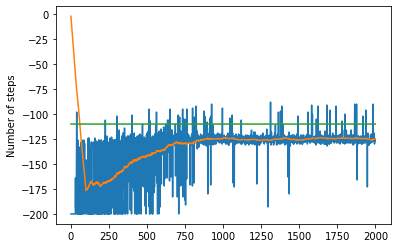

In [27]:

env = gym.make('MountainCar-v0')
nbEpisodes = 2000
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = defaultdict(lambda : {'count':0, 'value':0}, key="some_value")# 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes,negative=False)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()

In [ ]:
env = gym.make('MountainCarContinuous-v0')
nbEpisodes = 200
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = defaultdict(lambda : {'count':0, 'value':0}, key="some_value")# 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes,negative=False)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()






  0%|          | 0/200 [00:00<?, ?it/s]




  0%|          | 0/200 [00:13<?, ?it/s, last_100_avg_pole_upright=-31.7, len(history)=3]




  0%|          | 1/200 [00:13<44:28, 13.41s/it, last_100_avg_pole_upright=-31.7, len(history)=3]

{'Episode 0. Iteration with pole upright: -31.668752022500048. History length: 3'}







  0%|          | 1/200 [00:19<44:28, 13.41s/it, last_100_avg_pole_upright=-40.8, len(history)=3]




  1%|          | 2/200 [00:19<37:08, 11.25s/it, last_100_avg_pole_upright=-40.8, len(history)=3]




  1%|          | 2/200 [00:32<37:08, 11.25s/it, last_100_avg_pole_upright=-38.9, len(history)=3]




  2%|▏         | 3/200 [00:32<38:13, 11.64s/it, last_100_avg_pole_upright=-38.9, len(history)=3]




  2%|▏         | 3/200 [00:33<38:13, 11.64s/it, last_100_avg_pole_upright=-5.74, len(history)=4]




  2%|▏         | 4/200 [00:33<28:13,  8.64s/it, last_100_avg_pole_upright=-5.74, len(history)=4]




  2%|▏         | 4/200 [00:48<28:13,  8.64s/it, last_100_avg_pole_upright=-13.8, len(history)=6]




  2%|▎         | 5/200 [00:48<33:37, 10.35s/it, last_100_avg_pole_upright=-13.8, len(history)=6]




  2%|▎         | 5/200 [01:12<33:37, 10.35s/it, last_100_avg_pole_upright=-14.5, len(history)=6]




  3%|▎         | 6/200 [01:12<47:03, 14.55s/it, last_100_avg_pole_upright=-14.5, len(h

 18%|█▊        | 36/200 [40:38<4:52:18, 106.94s/it, last_100_avg_pole_upright=-6.68, len(history)=7]




 18%|█▊        | 36/200 [43:20<4:52:18, 106.94s/it, last_100_avg_pole_upright=-7.66, len(history)=7]




 18%|█▊        | 37/200 [43:20<5:35:36, 123.54s/it, last_100_avg_pole_upright=-7.66, len(history)=7]




 18%|█▊        | 37/200 [46:23<5:35:36, 123.54s/it, last_100_avg_pole_upright=-8.39, len(history)=7]




 19%|█▉        | 38/200 [46:23<6:21:33, 141.32s/it, last_100_avg_pole_upright=-8.39, len(history)=7]




 19%|█▉        | 38/200 [49:33<6:21:33, 141.32s/it, last_100_avg_pole_upright=-8.84, len(history)=7]




 20%|█▉        | 39/200 [49:33<6:58:09, 155.83s/it, last_100_avg_pole_upright=-8.84, len(history)=7]




 20%|█▉        | 39/200 [52:49<6:58:09, 155.83s/it, last_100_avg_pole_upright=-8.99, len(history)=7]




 20%|██        | 40/200 [52:49<7:27:25, 167.78s/it, last_100_avg_pole_upright=-8.99, len(history)=7]




 20%|██        | 40/200 [56:11<7:27:25, 167.78s/it, las